In [1]:
pwd

'/home/dcor/niskhizov/Rar'

In [4]:
cd object-detection-nn

/home/dcor/niskhizov/Rar/object-detection-nn


In [5]:
remote_mode = True

import sys
import os

from nn.YOLO_VGG16 import training_loop
from nn.YOLO_VGG16.utils.constants import ANCHORS
from nn.YOLO_VGG16.prepare_data.coco_dataset import CocoDataset
from nn.YOLO_VGG16.prepare_data.transforms import train_transform, test_transform
from nn.YOLO_VGG16.utils.helpers import convert_cells_to_bboxes, load_checkpoint, nms, plot_image, save_checkpoint
from nn.YOLO_VGG16.utils.constants import device, s, leanring_rate, save_model, checkpoint_file
from nn.YOLO_VGG16.model.YOLO_VGG16 import YOLO_VGG16
import torch
import torch.optim as optim
from nn.YOLO_VGG16.model.loss import YOLOLoss
from pycocotools.coco import COCO
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T

if remote_mode:
    model_path_base = f"/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/vgg_r_model"
    coco_path = lambda type: f'/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/temp/instances_{type}2017.json'
else:
    model_path_base = f"nn/YOLO_VGG16/degug_notebooks/"
    coco_path = lambda type: f'nn/cocodataset/annotations/instances_{type}2017.json'


/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [6]:
coco = COCO(coco_path('train'))
categories = ["dog"]


loading annotations into memory...
Done (t=20.11s)
creating index...
index created!


In [7]:
# Creating the model from YOLOv3 class 
load_model = False
model = YOLO_VGG16(num_classes=len(categories)).to(device) 

# Defining the optimizer 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 

# Defining the loss function 
loss_fn = YOLOLoss() 

# Defining the scaler for mixed precision training 
scaler = torch.amp.GradScaler(device=device) 
# Loading the checkpoint 
if load_model: 
    load_checkpoint(model_path_base + f"e11_vgg16_{checkpoint_file}", model, optimizer, leanring_rate, device) 

# Initialize TensorBoard writer
writer = SummaryWriter(log_dir='runs/YOLO_VGG16_R')



In [8]:
dataset = CocoDataset( 
	coco_obj=coco, 
	categories=categories,
	grid_sizes=[13, 26, 52], 
	anchors=ANCHORS, 
	transform=train_transform 
) 

# Defining the train data loader 
train_loader = torch.utils.data.DataLoader( 
	dataset=dataset, 
	batch_size=8, 
	shuffle=True, 
) 


In [9]:
# Load the validation dataset
val_coco = COCO(coco_path('val'))
val_categories = ["dog"]

val_dataset = CocoDataset(
    coco_obj=val_coco,
    categories=val_categories,
    grid_sizes=[13, 26, 52],
    anchors=ANCHORS,
    transform=test_transform  # Use the same transform for validation
)

# Create the validation data loader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=1,
    shuffle=False,
)

val_loader_iter = iter(val_loader)

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!


In [10]:
# Scaling the anchors 
scaled_anchors = ( 
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
).to(device) 

Epoch: 0


  0%|                                                                                                                                          | 0/549 [00:00<?, ?it/s]

batch_idx: 0


  0%|                                                                                                                               | 0/549 [00:08<?, ?it/s, loss=11.1]

==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:21<1:32:11, 10.11s/it, loss=11.1]

batch_idx: 1


  1%|▋                                                                                                                      | 3/549 [00:28<1:17:51,  8.56s/it, loss=11]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:35<1:12:01,  7.93s/it, loss=11.2]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:41<1:07:33,  7.45s/it, loss=11.1]

batch_idx: 4


  1%|█▎                                                                                                                     | 6/549 [00:49<1:07:47,  7.49s/it, loss=11]

batch_idx: 5


  1%|█▌                                                                                                                     | 7/549 [00:56<1:07:44,  7.50s/it, loss=11]

batch_idx: 6


  1%|█▋                                                                                                                     | 8/549 [01:03<1:05:28,  7.26s/it, loss=11]

batch_idx: 7


  2%|█▉                                                                                                                     | 9/549 [01:11<1:06:28,  7.39s/it, loss=11]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:18<1:05:17,  7.27s/it, loss=10.9]

batch_idx: 9


  2%|██▎                                                                                                                   | 11/549 [01:25<1:04:31,  7.20s/it, loss=11]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:32<1:05:12,  7.29s/it, loss=10.9]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:39<1:03:58,  7.16s/it, loss=10.9]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:46<1:03:00,  7.07s/it, loss=10.9]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [01:54<1:05:02,  7.31s/it, loss=10.8]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:00<1:03:12,  7.12s/it, loss=10.8]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:08<1:03:20,  7.14s/it, loss=10.8]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:16<1:05:12,  7.37s/it, loss=10.8]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:23<1:05:00,  7.36s/it, loss=10.8]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:30<1:03:13,  7.17s/it, loss=10.7]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:36<1:01:37,  7.00s/it, loss=10.8]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:44<1:02:54,  7.16s/it, loss=10.7]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:52<1:04:28,  7.35s/it, loss=10.7]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [02:59<1:04:46,  7.40s/it, loss=10.7]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:06<1:04:12,  7.35s/it, loss=10.7]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:14<1:04:20,  7.38s/it, loss=10.6]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:20<1:02:15,  7.16s/it, loss=10.6]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:28<1:03:03,  7.26s/it, loss=10.6]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:35<1:02:19,  7.19s/it, loss=10.5]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:42<1:03:17,  7.32s/it, loss=10.5]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:49<1:01:02,  7.07s/it, loss=10.5]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [03:56<1:01:07,  7.09s/it, loss=10.5]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:03<1:01:14,  7.12s/it, loss=10.5]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:10<1:00:24,  7.04s/it, loss=10.5]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:18<1:01:24,  7.17s/it, loss=10.5]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:25<1:00:30,  7.08s/it, loss=10.5]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:31<1:00:04,  7.04s/it, loss=10.5]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:39<59:59,  7.04s/it, loss=10.5]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:46<1:00:13,  7.09s/it, loss=10.4]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:52<58:30,  6.90s/it, loss=10.4]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [04:59<59:13,  6.99s/it, loss=10.4]

batch_idx: 40


  8%|█████████                                                                                                             | 42/549 [05:06<58:00,  6.86s/it, loss=10.4]

batch_idx: 41


  8%|█████████▏                                                                                                            | 43/549 [05:13<59:09,  7.02s/it, loss=10.4]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:21<1:01:05,  7.26s/it, loss=10.4]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:29<1:02:18,  7.42s/it, loss=10.4]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:36<1:00:46,  7.25s/it, loss=10.4]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:43<1:00:10,  7.19s/it, loss=10.3]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:50<59:41,  7.15s/it, loss=10.4]

batch_idx: 47


  9%|██████████▎                                                                                                         | 49/549 [06:07<1:25:16, 10.23s/it, loss=10.3]

batch_idx: 48


  9%|██████████▌                                                                                                         | 50/549 [06:15<1:18:47,  9.47s/it, loss=10.3]

batch_idx: 49


  9%|██████████▌                                                                                                         | 50/549 [06:22<1:18:47,  9.47s/it, loss=10.3]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:37<1:21:19,  9.82s/it, loss=10.3]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:44<1:15:04,  9.08s/it, loss=10.3]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:51<1:09:39,  8.44s/it, loss=10.3]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:58<1:06:19,  8.06s/it, loss=10.3]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:05<1:03:54,  7.78s/it, loss=10.2]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:12<1:01:49,  7.54s/it, loss=10.2]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:20<1:01:19,  7.49s/it, loss=10.2]

batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:28<1:02:13,  7.62s/it, loss=10.2]

batch_idx: 58


 11%|████████████▋                                                                                                       | 60/549 [07:35<1:00:25,  7.41s/it, loss=10.2]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:41<58:51,  7.24s/it, loss=10.2]

batch_idx: 60


 11%|█████████████                                                                                                       | 62/549 [07:49<1:00:07,  7.41s/it, loss=10.2]

batch_idx: 61


 11%|█████████████▎                                                                                                      | 63/549 [07:57<1:00:33,  7.48s/it, loss=10.1]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:04<59:09,  7.32s/it, loss=10.1]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:11<58:01,  7.19s/it, loss=10.1]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:18<57:55,  7.20s/it, loss=10.1]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:25<57:12,  7.12s/it, loss=10.1]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:32<57:34,  7.18s/it, loss=10.1]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:39<56:38,  7.08s/it, loss=10.1]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:46<56:18,  7.05s/it, loss=10.1]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:53<56:11,  7.05s/it, loss=10.1]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [09:01<57:37,  7.25s/it, loss=10.1]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:08<58:10,  7.33s/it, loss=10.1]

batch_idx: 72


 13%|████████████████▏                                                                                                       | 74/549 [09:15<57:35,  7.28s/it, loss=10]

batch_idx: 73


 14%|████████████████▍                                                                                                       | 75/549 [09:22<56:54,  7.20s/it, loss=10]

batch_idx: 74


 14%|████████████████▌                                                                                                       | 76/549 [09:30<57:16,  7.27s/it, loss=10]

batch_idx: 75


 14%|████████████████▊                                                                                                       | 77/549 [09:37<57:54,  7.36s/it, loss=10]

batch_idx: 76


 14%|█████████████████                                                                                                       | 78/549 [09:45<57:54,  7.38s/it, loss=10]

batch_idx: 77


 14%|█████████████████▎                                                                                                      | 79/549 [09:52<57:09,  7.30s/it, loss=10]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:59<57:02,  7.30s/it, loss=9.99]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:06<55:45,  7.15s/it, loss=9.97]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:13<55:45,  7.16s/it, loss=9.95]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:20<54:13,  6.98s/it, loss=9.95]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:26<53:27,  6.90s/it, loss=9.95]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:34<54:12,  7.01s/it, loss=9.94]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:41<53:39,  6.95s/it, loss=9.94]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:48<53:57,  7.01s/it, loss=9.92]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:55<54:30,  7.10s/it, loss=9.91]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [11:02<53:48,  7.02s/it, loss=9.91]

batch_idx: 88


 16%|███████████████████▌                                                                                                   | 90/549 [11:09<54:32,  7.13s/it, loss=9.9]

batch_idx: 89


 17%|███████████████████▋                                                                                                   | 91/549 [11:16<54:25,  7.13s/it, loss=9.9]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:24<54:42,  7.18s/it, loss=9.89]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:31<53:49,  7.08s/it, loss=9.88]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:37<53:19,  7.03s/it, loss=9.87]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:45<53:25,  7.06s/it, loss=9.85]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:52<53:27,  7.08s/it, loss=9.85]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:59<53:50,  7.15s/it, loss=9.84]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:06<52:50,  7.03s/it, loss=9.83]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:13<52:04,  6.94s/it, loss=9.82]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:19<51:38,  6.90s/it, loss=9.81]

batch_idx: 99


 18%|█████████████████████▍                                                                                                | 100/549 [12:26<51:38,  6.90s/it, loss=9.8]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:42<1:05:47,  8.83s/it, loss=9.79]

batch_idx: 101


 19%|█████████████████████▌                                                                                             | 103/549 [12:49<1:01:31,  8.28s/it, loss=9.78]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:56<58:30,  7.89s/it, loss=9.77]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [13:04<57:12,  7.73s/it, loss=9.76]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:11<55:39,  7.54s/it, loss=9.75]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:18<54:09,  7.35s/it, loss=9.75]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:23<50:42,  6.90s/it, loss=9.74]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:30<50:46,  6.92s/it, loss=9.74]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:38<51:49,  7.08s/it, loss=9.73]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:45<51:18,  7.03s/it, loss=9.72]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:52<51:03,  7.01s/it, loss=9.71]

batch_idx: 111


 21%|████████████████████████▎                                                                                             | 113/549 [13:59<50:52,  7.00s/it, loss=9.7]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:06<50:28,  6.96s/it, loss=9.69]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:12<50:04,  6.92s/it, loss=9.68]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:19<50:04,  6.94s/it, loss=9.66]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:27<50:31,  7.02s/it, loss=9.65]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:33<49:44,  6.92s/it, loss=9.65]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:40<50:10,  7.00s/it, loss=9.64]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:48<51:12,  7.16s/it, loss=9.63]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:55<50:02,  7.02s/it, loss=9.62]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:02<49:33,  6.96s/it, loss=9.61]

batch_idx: 121


 22%|██████████████████████████▍                                                                                           | 123/549 [15:09<49:36,  6.99s/it, loss=9.6]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:15<48:59,  6.92s/it, loss=9.59]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:23<49:50,  7.05s/it, loss=9.58]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:29<48:52,  6.93s/it, loss=9.57]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:37<49:35,  7.05s/it, loss=9.56]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:44<49:04,  6.99s/it, loss=9.56]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:51<48:55,  6.99s/it, loss=9.55]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [15:58<49:06,  7.03s/it, loss=9.54]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:04<48:34,  6.97s/it, loss=9.53]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:12<48:40,  7.00s/it, loss=9.53]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:19<49:25,  7.13s/it, loss=9.52]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:26<49:12,  7.11s/it, loss=9.51]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:33<48:24,  7.02s/it, loss=9.51]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:40<47:44,  6.94s/it, loss=9.51]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:47<48:22,  7.05s/it, loss=9.51]

batch_idx: 136


 25%|█████████████████████████████▋                                                                                        | 138/549 [16:54<48:26,  7.07s/it, loss=9.5]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:01<47:25,  6.94s/it, loss=9.49]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:08<47:38,  6.99s/it, loss=9.49]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:15<48:33,  7.14s/it, loss=9.48]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:22<47:46,  7.04s/it, loss=9.47]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:29<47:45,  7.06s/it, loss=9.46]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:37<48:11,  7.14s/it, loss=9.45]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:44<48:39,  7.23s/it, loss=9.44]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:51<47:59,  7.14s/it, loss=9.43]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:58<48:33,  7.25s/it, loss=9.43]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:06<48:39,  7.28s/it, loss=9.42]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:13<48:18,  7.25s/it, loss=9.41]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:21<49:24,  7.43s/it, loss=9.41]

batch_idx: 149


 27%|████████████████████████████████▏                                                                                     | 150/549 [18:28<49:24,  7.43s/it, loss=9.4]

batch_idx: 150
==> Saving checkpoint


 28%|████████████████████████████████▍                                                                                    | 152/549 [18:43<59:20,  8.97s/it, loss=9.39]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [18:50<55:47,  8.45s/it, loss=9.38]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [18:57<52:22,  7.96s/it, loss=9.37]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:04<50:41,  7.72s/it, loss=9.36]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:11<49:15,  7.52s/it, loss=9.36]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:18<47:56,  7.34s/it, loss=9.35]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:25<46:59,  7.21s/it, loss=9.34]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:33<47:34,  7.32s/it, loss=9.34]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:40<46:51,  7.23s/it, loss=9.33]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:46<45:30,  7.04s/it, loss=9.32]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:54<46:02,  7.14s/it, loss=9.31]

batch_idx: 161


 30%|███████████████████████████████████                                                                                   | 163/549 [20:01<45:50,  7.12s/it, loss=9.3]

batch_idx: 162


 30%|███████████████████████████████████▏                                                                                  | 164/549 [20:08<45:45,  7.13s/it, loss=9.3]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:15<45:52,  7.17s/it, loss=9.29]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:23<46:57,  7.36s/it, loss=9.28]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:30<46:50,  7.36s/it, loss=9.28]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:37<45:38,  7.19s/it, loss=9.27]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:45<46:30,  7.34s/it, loss=9.26]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:52<46:05,  7.30s/it, loss=9.25]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [20:59<45:31,  7.23s/it, loss=9.24]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:05<43:27,  6.92s/it, loss=9.23]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:13<43:52,  7.00s/it, loss=9.22]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:20<44:07,  7.06s/it, loss=9.22]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:27<45:15,  7.26s/it, loss=9.21]

batch_idx: 174


 32%|█████████████████████████████████████▊                                                                                | 176/549 [21:34<44:06,  7.10s/it, loss=9.2]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:41<43:49,  7.07s/it, loss=9.19]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:48<43:16,  7.00s/it, loss=9.19]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [21:55<42:31,  6.90s/it, loss=9.18]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [22:02<43:28,  7.07s/it, loss=9.18]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:09<42:38,  6.95s/it, loss=9.17]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:16<42:28,  6.94s/it, loss=9.16]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:23<42:10,  6.92s/it, loss=9.15]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:30<42:29,  6.98s/it, loss=9.14]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:37<43:33,  7.18s/it, loss=9.14]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:44<43:11,  7.14s/it, loss=9.13]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:52<44:05,  7.31s/it, loss=9.12]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [22:59<43:03,  7.16s/it, loss=9.11]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:06<43:05,  7.18s/it, loss=9.11]

batch_idx: 188


 35%|████████████████████████████████████████▊                                                                             | 190/549 [23:13<43:09,  7.21s/it, loss=9.1]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:20<42:16,  7.08s/it, loss=9.09]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:26<40:22,  6.79s/it, loss=9.09]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:33<40:40,  6.86s/it, loss=9.08]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:40<41:08,  6.95s/it, loss=9.07]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:48<41:28,  7.03s/it, loss=9.07]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [23:55<41:10,  7.00s/it, loss=9.07]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:02<41:09,  7.02s/it, loss=9.06]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:08<40:11,  6.87s/it, loss=9.06]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:15<39:53,  6.84s/it, loss=9.05]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:22<40:52,  7.03s/it, loss=9.04]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:30<40:52,  7.03s/it, loss=9.03]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:50<56:58,  9.85s/it, loss=9.02]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [24:57<51:42,  8.97s/it, loss=9.01]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:04<48:36,  8.45s/it, loss=9.01]

batch_idx: 203


 37%|████████████████████████████████████████████▊                                                                           | 205/549 [25:12<46:27,  8.10s/it, loss=9]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:19<45:40,  7.99s/it, loss=8.99]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:27<44:17,  7.77s/it, loss=8.99]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:33<42:38,  7.50s/it, loss=8.99]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:41<43:13,  7.63s/it, loss=8.98]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:48<41:23,  7.33s/it, loss=8.97]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:55<40:05,  7.12s/it, loss=8.96]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:02<39:36,  7.05s/it, loss=8.96]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:09<39:50,  7.12s/it, loss=8.95]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:15<39:01,  6.99s/it, loss=8.94]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:22<38:39,  6.94s/it, loss=8.93]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:29<37:41,  6.79s/it, loss=8.93]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:36<38:45,  7.00s/it, loss=8.92]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:43<38:22,  6.96s/it, loss=8.91]

batch_idx: 217


 40%|███████████████████████████████████████████████                                                                       | 219/549 [26:50<38:44,  7.05s/it, loss=8.9]

batch_idx: 218


 40%|███████████████████████████████████████████████▎                                                                      | 220/549 [26:58<39:24,  7.19s/it, loss=8.9]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:05<39:10,  7.17s/it, loss=8.89]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:12<38:52,  7.13s/it, loss=8.88]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:19<39:16,  7.23s/it, loss=8.87]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:26<38:39,  7.14s/it, loss=8.87]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:34<38:50,  7.19s/it, loss=8.86]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:41<38:54,  7.23s/it, loss=8.85]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:48<39:01,  7.27s/it, loss=8.84]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:55<38:13,  7.15s/it, loss=8.83]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:03<38:19,  7.19s/it, loss=8.83]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:09<37:48,  7.11s/it, loss=8.82]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:17<38:34,  7.28s/it, loss=8.82]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:25<38:37,  7.31s/it, loss=8.81]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:31<37:49,  7.18s/it, loss=8.81]

batch_idx: 232


 43%|██████████████████████████████████████████████████▎                                                                   | 234/549 [28:39<38:11,  7.27s/it, loss=8.8]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:46<37:53,  7.24s/it, loss=8.79]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:53<37:08,  7.12s/it, loss=8.79]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:00<36:32,  7.03s/it, loss=8.78]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:07<36:47,  7.10s/it, loss=8.78]

batch_idx: 237
batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:21<36:24,  7.07s/it, loss=8.76]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:28<36:18,  7.07s/it, loss=8.76]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:35<36:19,  7.10s/it, loss=8.75]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:42<35:34,  6.98s/it, loss=8.74]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:49<35:24,  6.97s/it, loss=8.74]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [29:56<34:54,  6.89s/it, loss=8.73]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:02<34:43,  6.88s/it, loss=8.72]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:10<35:17,  7.01s/it, loss=8.71]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:17<35:45,  7.13s/it, loss=8.71]

batch_idx: 247


 45%|█████████████████████████████████████████████████████▌                                                                | 249/549 [30:24<34:41,  6.94s/it, loss=8.7]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:30<33:56,  6.81s/it, loss=8.69]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:37<33:56,  6.81s/it, loss=8.69]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:58<48:45,  9.85s/it, loss=8.68]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:05<44:22,  8.99s/it, loss=8.68]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:12<41:29,  8.44s/it, loss=8.67]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:19<38:48,  7.92s/it, loss=8.66]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:26<36:49,  7.54s/it, loss=8.65]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:33<35:56,  7.38s/it, loss=8.65]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:40<35:12,  7.26s/it, loss=8.64]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:46<34:08,  7.06s/it, loss=8.63]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:53<33:46,  7.01s/it, loss=8.63]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:00<32:57,  6.87s/it, loss=8.62]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:06<32:38,  6.82s/it, loss=8.61]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:14<33:11,  6.96s/it, loss=8.61]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▋                                                             | 264/549 [32:20<32:20,  6.81s/it, loss=8.6]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▉                                                             | 265/549 [32:27<32:37,  6.89s/it, loss=8.6]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:35<33:16,  7.06s/it, loss=8.59]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:42<33:09,  7.06s/it, loss=8.58]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:49<33:17,  7.11s/it, loss=8.58]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:56<32:56,  7.06s/it, loss=8.57]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:03<33:20,  7.17s/it, loss=8.56]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:11<33:12,  7.17s/it, loss=8.56]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:18<32:50,  7.11s/it, loss=8.55]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:25<32:53,  7.15s/it, loss=8.54]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:32<32:52,  7.17s/it, loss=8.54]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:39<32:00,  7.01s/it, loss=8.53]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:45<31:38,  6.95s/it, loss=8.52]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:52<31:14,  6.89s/it, loss=8.52]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:59<31:04,  6.88s/it, loss=8.51]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:06<31:06,  6.91s/it, loss=8.51]

batch_idx: 278


 51%|████████████████████████████████████████████████████████████▏                                                         | 280/549 [34:13<31:31,  7.03s/it, loss=8.5]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:20<31:12,  6.99s/it, loss=8.49]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:28<32:09,  7.23s/it, loss=8.49]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:35<31:37,  7.13s/it, loss=8.48]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:42<31:12,  7.06s/it, loss=8.48]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:49<30:43,  6.98s/it, loss=8.47]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:56<30:52,  7.05s/it, loss=8.46]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:03<30:32,  6.99s/it, loss=8.46]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:10<30:20,  6.98s/it, loss=8.45]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:16<30:05,  6.94s/it, loss=8.45]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:23<29:07,  6.75s/it, loss=8.44]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:29<28:40,  6.67s/it, loss=8.43]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:37<29:47,  6.96s/it, loss=8.43]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:44<29:43,  6.97s/it, loss=8.42]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:51<30:13,  7.11s/it, loss=8.42]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:58<30:06,  7.11s/it, loss=8.41]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████▌                                                      | 296/549 [36:06<30:07,  7.14s/it, loss=8.4]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▊                                                      | 297/549 [36:12<28:39,  6.82s/it, loss=8.4]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:19<29:17,  7.00s/it, loss=8.39]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:27<29:49,  7.16s/it, loss=8.39]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:34<29:19,  7.06s/it, loss=8.38]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:41<29:19,  7.06s/it, loss=8.38]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:03<42:07, 10.23s/it, loss=8.37]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:10<37:53,  9.24s/it, loss=8.37]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:16<34:37,  8.48s/it, loss=8.36]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:23<32:33,  8.00s/it, loss=8.35]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:31<31:39,  7.82s/it, loss=8.35]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:38<30:37,  7.59s/it, loss=8.34]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:45<29:40,  7.39s/it, loss=8.34]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:52<28:58,  7.24s/it, loss=8.33]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:58<28:23,  7.13s/it, loss=8.32]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:06<28:24,  7.16s/it, loss=8.32]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:13<28:06,  7.12s/it, loss=8.31]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:20<27:48,  7.07s/it, loss=8.31]

batch_idx: 312


 57%|███████████████████████████████████████████████████████████████████▍                                                  | 314/549 [38:27<28:29,  7.28s/it, loss=8.3]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:35<28:17,  7.25s/it, loss=8.29]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:41<27:34,  7.10s/it, loss=8.29]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:49<27:32,  7.12s/it, loss=8.28]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:55<27:12,  7.07s/it, loss=8.28]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:03<27:28,  7.17s/it, loss=8.27]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:10<27:15,  7.14s/it, loss=8.27]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:17<27:20,  7.20s/it, loss=8.26]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:25<27:25,  7.25s/it, loss=8.25]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:32<27:11,  7.22s/it, loss=8.25]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:38<26:23,  7.04s/it, loss=8.24]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:45<25:40,  6.88s/it, loss=8.24]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [39:52<25:36,  6.89s/it, loss=8.23]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:59<26:18,  7.11s/it, loss=8.22]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:06<25:50,  7.02s/it, loss=8.22]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:13<25:35,  6.98s/it, loss=8.21]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:21<26:23,  7.23s/it, loss=8.21]

batch_idx: 329


 60%|███████████████████████████████████████████████████████████████████████▏                                              | 331/549 [40:28<25:54,  7.13s/it, loss=8.2]

batch_idx: 330


 60%|███████████████████████████████████████████████████████████████████████▎                                              | 332/549 [40:35<25:14,  6.98s/it, loss=8.2]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:42<25:09,  6.99s/it, loss=8.19]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:49<25:08,  7.02s/it, loss=8.19]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:55<24:40,  6.92s/it, loss=8.18]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:02<24:36,  6.93s/it, loss=8.17]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:10<24:56,  7.06s/it, loss=8.17]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:17<24:43,  7.03s/it, loss=8.16]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:24<24:55,  7.12s/it, loss=8.16]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:30<24:05,  6.91s/it, loss=8.15]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:38<24:19,  7.02s/it, loss=8.15]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:44<24:01,  6.96s/it, loss=8.15]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:51<23:49,  6.94s/it, loss=8.14]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:59<24:13,  7.09s/it, loss=8.13]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:06<23:54,  7.03s/it, loss=8.13]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:12<23:34,  6.97s/it, loss=8.12]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:20<23:37,  7.02s/it, loss=8.12]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:27<23:48,  7.11s/it, loss=8.11]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:34<23:36,  7.08s/it, loss=8.11]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:41<23:02,  6.95s/it, loss=8.11]

batch_idx: 349


 64%|███████████████████████████████████████████████████████████████████████████▏                                          | 350/549 [42:48<23:02,  6.95s/it, loss=8.1]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:09<33:08, 10.09s/it, loss=8.09]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:17<30:39,  9.38s/it, loss=8.09]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:24<28:23,  8.74s/it, loss=8.08]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:32<26:45,  8.28s/it, loss=8.08]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:39<25:50,  8.03s/it, loss=8.07]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:47<25:09,  7.86s/it, loss=8.07]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:54<24:32,  7.71s/it, loss=8.06]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:01<23:34,  7.44s/it, loss=8.06]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:08<23:01,  7.31s/it, loss=8.05]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:15<22:36,  7.21s/it, loss=8.05]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:22<22:15,  7.14s/it, loss=8.04]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:29<22:20,  7.20s/it, loss=8.04]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:35<21:23,  6.94s/it, loss=8.03]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:42<21:19,  6.96s/it, loss=8.03]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:49<20:44,  6.80s/it, loss=8.02]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:56<21:02,  6.94s/it, loss=8.01]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:03<21:16,  7.05s/it, loss=8.01]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:10<21:08,  7.04s/it, loss=8.01]

batch_idx: 368


 67%|████████████████████████████████████████████████████████████████████████████████▊                                       | 370/549 [45:17<20:52,  7.00s/it, loss=8]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:25<21:20,  7.19s/it, loss=7.99]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:32<20:47,  7.05s/it, loss=7.99]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:39<21:24,  7.30s/it, loss=7.99]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:47<21:09,  7.25s/it, loss=7.98]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:53<20:31,  7.08s/it, loss=7.98]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:01<20:50,  7.23s/it, loss=7.97]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:10<22:42,  7.92s/it, loss=7.97]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:17<21:45,  7.63s/it, loss=7.96]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:25<21:45,  7.68s/it, loss=7.95]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:33<21:35,  7.67s/it, loss=7.95]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:41<21:31,  7.69s/it, loss=7.94]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:48<21:02,  7.56s/it, loss=7.94]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:55<20:21,  7.36s/it, loss=7.93]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:02<20:01,  7.28s/it, loss=7.93]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:09<19:59,  7.31s/it, loss=7.92]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:16<19:48,  7.29s/it, loss=7.92]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:24<20:06,  7.45s/it, loss=7.91]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:32<19:55,  7.42s/it, loss=7.91]

batch_idx: 387


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                  | 389/549 [47:39<19:32,  7.33s/it, loss=7.9]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████▊                                  | 390/549 [47:46<19:12,  7.25s/it, loss=7.9]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:53<18:54,  7.18s/it, loss=7.89]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:00<18:50,  7.20s/it, loss=7.89]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:07<18:52,  7.26s/it, loss=7.88]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:14<18:33,  7.18s/it, loss=7.88]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:21<18:04,  7.04s/it, loss=7.87]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:28<17:55,  7.03s/it, loss=7.87]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:35<17:29,  6.90s/it, loss=7.87]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:42<17:32,  6.97s/it, loss=7.86]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:50<18:01,  7.21s/it, loss=7.86]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:57<18:09,  7.31s/it, loss=7.85]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:05<18:09,  7.31s/it, loss=7.85]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:26<25:15, 10.31s/it, loss=7.84]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:33<22:48,  9.37s/it, loss=7.84]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:41<21:03,  8.72s/it, loss=7.83]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:47<19:35,  8.16s/it, loss=7.83]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:54<18:28,  7.75s/it, loss=7.82]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [50:02<18:10,  7.68s/it, loss=7.82]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:09<17:42,  7.54s/it, loss=7.81]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:17<17:47,  7.63s/it, loss=7.81]

batch_idx: 408


 75%|████████████████████████████████████████████████████████████████████████████████████████                              | 410/549 [50:24<17:26,  7.53s/it, loss=7.8]

batch_idx: 409


 75%|████████████████████████████████████████████████████████████████████████████████████████▎                             | 411/549 [50:31<16:59,  7.39s/it, loss=7.8]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:38<16:50,  7.38s/it, loss=7.79]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:45<16:24,  7.24s/it, loss=7.79]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:53<16:16,  7.24s/it, loss=7.78]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:59<15:40,  7.02s/it, loss=7.78]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [51:06<15:27,  6.98s/it, loss=7.78]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:13<15:21,  6.98s/it, loss=7.77]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:20<14:57,  6.85s/it, loss=7.77]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:27<15:22,  7.10s/it, loss=7.76]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:34<15:20,  7.14s/it, loss=7.76]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:41<15:10,  7.11s/it, loss=7.75]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:49<15:03,  7.11s/it, loss=7.75]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:55<14:29,  6.90s/it, loss=7.74]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [52:02<14:35,  7.00s/it, loss=7.74]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:09<14:20,  6.94s/it, loss=7.73]

batch_idx: 424
batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:24<14:35,  7.18s/it, loss=7.72]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:31<14:23,  7.14s/it, loss=7.72]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:38<14:17,  7.14s/it, loss=7.72]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:45<14:03,  7.09s/it, loss=7.71]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:52<13:53,  7.06s/it, loss=7.71]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████▊                         | 432/549 [52:59<13:34,  6.96s/it, loss=7.7]

batch_idx: 431


 79%|█████████████████████████████████████████████████████████████████████████████████████████████                         | 433/549 [53:06<13:29,  6.98s/it, loss=7.7]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:14<13:54,  7.26s/it, loss=7.69]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:20<13:18,  7.01s/it, loss=7.69]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:27<13:01,  6.92s/it, loss=7.68]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:34<13:03,  7.00s/it, loss=7.68]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:41<12:52,  6.96s/it, loss=7.67]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:49<13:13,  7.21s/it, loss=7.67]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:56<13:10,  7.25s/it, loss=7.67]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:03<12:59,  7.22s/it, loss=7.66]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:10<12:40,  7.10s/it, loss=7.66]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:17<12:21,  6.99s/it, loss=7.65]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:24<12:16,  7.01s/it, loss=7.65]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:31<12:12,  7.04s/it, loss=7.64]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:38<11:57,  6.97s/it, loss=7.64]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:45<11:49,  6.95s/it, loss=7.63]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:52<11:54,  7.07s/it, loss=7.63]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [55:00<12:01,  7.21s/it, loss=7.62]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:06<11:44,  7.12s/it, loss=7.62]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:14<11:44,  7.12s/it, loss=7.62]

batch_idx: 450
==> Saving checkpoint


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [55:36<16:39, 10.30s/it, loss=7.61]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [55:43<15:11,  9.49s/it, loss=7.61]

batch_idx: 452


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 454/549 [55:51<14:02,  8.87s/it, loss=7.6]

batch_idx: 453


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 455/549 [55:58<12:57,  8.27s/it, loss=7.6]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [56:05<12:21,  7.97s/it, loss=7.59]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [56:12<11:49,  7.71s/it, loss=7.59]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [56:19<11:30,  7.58s/it, loss=7.59]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [56:26<10:59,  7.33s/it, loss=7.58]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [56:33<10:40,  7.20s/it, loss=7.58]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [56:40<10:40,  7.28s/it, loss=7.57]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [56:48<10:36,  7.32s/it, loss=7.57]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [56:55<10:18,  7.20s/it, loss=7.56]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [57:02<10:05,  7.13s/it, loss=7.56]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [57:09<10:00,  7.15s/it, loss=7.55]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [57:16<09:51,  7.12s/it, loss=7.55]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [57:23<09:38,  7.05s/it, loss=7.55]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [57:30<09:41,  7.18s/it, loss=7.54]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [57:38<09:36,  7.20s/it, loss=7.54]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [57:45<09:27,  7.19s/it, loss=7.53]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [57:52<09:25,  7.25s/it, loss=7.53]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [57:59<09:14,  7.20s/it, loss=7.53]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [58:07<09:14,  7.30s/it, loss=7.52]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [58:14<09:04,  7.26s/it, loss=7.52]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:21<08:55,  7.23s/it, loss=7.51]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:28<08:37,  7.09s/it, loss=7.51]

batch_idx: 475


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 477/549 [58:35<08:23,  6.99s/it, loss=7.5]

batch_idx: 476


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 478/549 [58:42<08:18,  7.02s/it, loss=7.5]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:49<08:08,  6.97s/it, loss=7.49]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [58:56<08:10,  7.11s/it, loss=7.49]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [59:03<08:07,  7.16s/it, loss=7.49]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [59:11<08:02,  7.20s/it, loss=7.48]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [59:18<07:56,  7.22s/it, loss=7.48]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [59:25<07:39,  7.07s/it, loss=7.47]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [59:32<07:34,  7.11s/it, loss=7.47]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [59:39<07:33,  7.19s/it, loss=7.46]

batch_idx: 485


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 487/549 [59:46<07:15,  7.02s/it, loss=7.46]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:53<07:11,  7.08s/it, loss=7.46]

batch_idx: 487


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 489/549 [1:00:00<07:04,  7.07s/it, loss=7.45]

batch_idx: 488


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:07<07:00,  7.12s/it, loss=7.45]

batch_idx: 489


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 491/549 [1:00:14<06:49,  7.05s/it, loss=7.44]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 492/549 [1:00:21<06:40,  7.02s/it, loss=7.44]

batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:28<06:32,  7.01s/it, loss=7.44]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:36<06:35,  7.19s/it, loss=7.43]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:00:43<06:22,  7.09s/it, loss=7.43]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:49<06:06,  6.92s/it, loss=7.42]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:56<06:01,  6.96s/it, loss=7.42]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:01:03<05:57,  7.02s/it, loss=7.41]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:01:11<05:54,  7.09s/it, loss=7.41]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:18<05:48,  7.11s/it, loss=7.41]

batch_idx: 499


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:25<05:48,  7.11s/it, loss=7.4]

batch_idx: 500
==> Saving checkpoint


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 502/549 [1:01:45<07:37,  9.74s/it, loss=7.4]

batch_idx: 501


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:52<06:57,  9.08s/it, loss=7.4]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:59<06:26,  8.58s/it, loss=7.39]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:02:07<05:58,  8.15s/it, loss=7.39]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:02:14<05:39,  7.90s/it, loss=7.39]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:21<05:22,  7.68s/it, loss=7.38]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:28<05:07,  7.50s/it, loss=7.38]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:36<04:58,  7.46s/it, loss=7.37]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:43<04:48,  7.40s/it, loss=7.37]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:49<04:32,  7.18s/it, loss=7.36]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:56<04:20,  7.05s/it, loss=7.36]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:03<04:08,  6.91s/it, loss=7.36]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:10<04:04,  6.99s/it, loss=7.35]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:17<03:57,  6.99s/it, loss=7.35]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:25<03:56,  7.17s/it, loss=7.35]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:32<03:51,  7.23s/it, loss=7.34]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:39<03:39,  7.07s/it, loss=7.34]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:46<03:31,  7.05s/it, loss=7.33]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:53<03:22,  7.00s/it, loss=7.33]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:01<03:26,  7.37s/it, loss=7.32]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:04:08<03:17,  7.31s/it, loss=7.32]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:15<03:07,  7.21s/it, loss=7.32]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:22<02:59,  7.17s/it, loss=7.31]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:29<02:51,  7.14s/it, loss=7.31]

batch_idx: 524


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:36<02:40,  6.98s/it, loss=7.3]

batch_idx: 525


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 527/549 [1:04:43<02:33,  6.96s/it, loss=7.3]

batch_idx: 526


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:50<02:27,  7.03s/it, loss=7.3]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:57<02:22,  7.12s/it, loss=7.29]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:04<02:11,  6.90s/it, loss=7.29]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:05:10<02:03,  6.85s/it, loss=7.28]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:17<01:57,  6.90s/it, loss=7.28]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:25<01:55,  7.19s/it, loss=7.28]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:32<01:47,  7.17s/it, loss=7.27]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:39<01:39,  7.10s/it, loss=7.27]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:46<01:32,  7.09s/it, loss=7.26]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:53<01:24,  7.04s/it, loss=7.26]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:00<01:17,  7.03s/it, loss=7.26]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:07<01:09,  6.95s/it, loss=7.25]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:06:14<01:02,  6.94s/it, loss=7.25]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:20<00:54,  6.82s/it, loss=7.24]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:27<00:48,  6.87s/it, loss=7.24]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:34<00:41,  6.90s/it, loss=7.24]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:42<00:35,  7.00s/it, loss=7.23]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:48<00:27,  6.98s/it, loss=7.23]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:55<00:20,  6.91s/it, loss=7.22]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:02<00:14,  7.01s/it, loss=7.22]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:10<00:07,  7.09s/it, loss=7.22]

batch_idx: 547
batch_idx: 548


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:11<00:00,  7.34s/it, loss=7.21]


==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


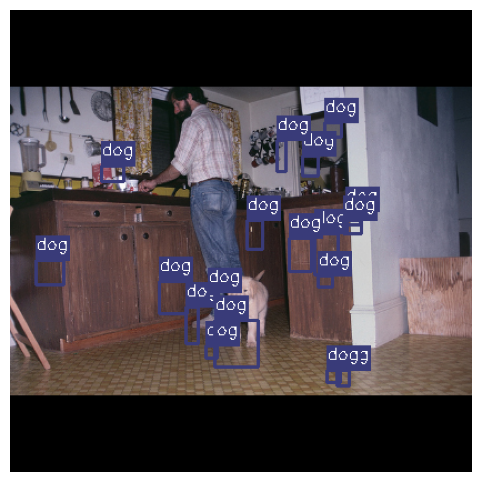

Epoch: 1


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=4.97]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:56:42, 12.80s/it, loss=5.07]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:35<1:31:46, 10.08s/it, loss=5.04]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:20:52,  8.90s/it, loss=5.08]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:49<1:15:41,  8.35s/it, loss=5.06]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:56<1:10:43,  7.81s/it, loss=5.06]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:03<1:08:17,  7.56s/it, loss=5.07]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:10<1:06:04,  7.33s/it, loss=5.09]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:16<1:03:55,  7.10s/it, loss=5.07]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:24<1:04:42,  7.20s/it, loss=5.08]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:31<1:03:54,  7.13s/it, loss=5.09]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:38<1:03:47,  7.13s/it, loss=5.09]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:45<1:03:28,  7.11s/it, loss=5.08]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:52<1:03:57,  7.17s/it, loss=5.07]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:00<1:05:40,  7.38s/it, loss=5.06]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:08<1:06:09,  7.45s/it, loss=5.05]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:15<1:04:45,  7.30s/it, loss=5.05]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:22<1:05:18,  7.38s/it, loss=5.04]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:29<1:04:27,  7.30s/it, loss=5.04]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:37<1:05:03,  7.38s/it, loss=5.03]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:44<1:04:16,  7.30s/it, loss=5.02]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:51<1:03:03,  7.18s/it, loss=5.01]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:57<1:01:11,  6.98s/it, loss=5.01]

batch_idx: 22


  4%|█████▏                                                                                                                 | 24/549 [03:04<1:01:25,  7.02s/it, loss=5]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:12<1:02:22,  7.14s/it, loss=4.99]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:19<1:02:11,  7.13s/it, loss=5.01]

batch_idx: 25


  5%|█████▊                                                                                                                 | 27/549 [03:26<1:02:40,  7.20s/it, loss=5]

batch_idx: 26


  5%|██████                                                                                                                 | 28/549 [03:33<1:02:14,  7.17s/it, loss=5]

batch_idx: 27


  5%|██████▎                                                                                                                | 29/549 [03:40<1:01:26,  7.09s/it, loss=5]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:48<1:02:00,  7.17s/it, loss=5.01]

batch_idx: 29


  6%|██████▋                                                                                                                | 31/549 [03:55<1:01:39,  7.14s/it, loss=5]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:02<1:02:46,  7.29s/it, loss=4.99]

batch_idx: 31


  6%|███████▏                                                                                                               | 33/549 [04:09<1:02:08,  7.23s/it, loss=5]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:17<1:02:17,  7.26s/it, loss=4.99]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:23<1:00:29,  7.06s/it, loss=4.98]

batch_idx: 34


  7%|███████▋                                                                                                              | 36/549 [04:30<59:07,  6.92s/it, loss=4.98]

batch_idx: 35


  7%|███████▉                                                                                                              | 37/549 [04:37<59:22,  6.96s/it, loss=4.98]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:44<59:34,  7.00s/it, loss=4.97]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:52<1:01:30,  7.24s/it, loss=4.97]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [04:59<1:00:28,  7.13s/it, loss=4.97]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [05:06<59:26,  7.02s/it, loss=4.97]

batch_idx: 40


  8%|█████████                                                                                                             | 42/549 [05:12<58:10,  6.88s/it, loss=4.99]

batch_idx: 41


  8%|█████████▏                                                                                                            | 43/549 [05:19<58:21,  6.92s/it, loss=4.99]

batch_idx: 42


  8%|█████████▍                                                                                                            | 44/549 [05:26<59:14,  7.04s/it, loss=4.99]

batch_idx: 43


  8%|█████████▋                                                                                                            | 45/549 [05:34<59:14,  7.05s/it, loss=4.99]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:41<58:59,  7.04s/it, loss=4.99]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:48<1:00:12,  7.20s/it, loss=4.98]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:55<59:10,  7.09s/it, loss=4.98]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:02<58:03,  6.97s/it, loss=4.97]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:09<57:44,  6.94s/it, loss=4.97]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:15<57:44,  6.94s/it, loss=4.97]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:36<1:21:47,  9.87s/it, loss=4.96]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:43<1:14:50,  9.05s/it, loss=4.96]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:51<1:10:24,  8.53s/it, loss=4.96]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:57<1:05:55,  8.01s/it, loss=4.95]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:04<1:02:27,  7.60s/it, loss=4.95]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:11<1:01:14,  7.47s/it, loss=4.95]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:19<1:00:38,  7.41s/it, loss=4.94]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:25<59:00,  7.23s/it, loss=4.94]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:32<58:35,  7.19s/it, loss=4.94]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:40<58:48,  7.23s/it, loss=4.94]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:46<56:59,  7.02s/it, loss=4.93]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:53<56:56,  7.03s/it, loss=4.93]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:01<57:40,  7.14s/it, loss=4.93]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:08<57:23,  7.11s/it, loss=4.92]

batch_idx: 64
batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:22<57:17,  7.13s/it, loss=4.92]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:29<56:12,  7.01s/it, loss=4.91]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:36<56:13,  7.03s/it, loss=4.91]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:43<56:52,  7.12s/it, loss=4.91]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:50<56:35,  7.10s/it, loss=4.92]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:57<56:31,  7.11s/it, loss=4.91]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:05<57:01,  7.19s/it, loss=4.91]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:12<56:37,  7.15s/it, loss=4.91]

batch_idx: 73


 14%|████████████████▎                                                                                                      | 75/549 [09:19<56:34,  7.16s/it, loss=4.9]

batch_idx: 74


 14%|████████████████▍                                                                                                      | 76/549 [09:26<55:50,  7.08s/it, loss=4.9]

batch_idx: 75


 14%|████████████████▋                                                                                                      | 77/549 [09:34<57:14,  7.28s/it, loss=4.9]

batch_idx: 76


 14%|████████████████▉                                                                                                      | 78/549 [09:40<55:07,  7.02s/it, loss=4.9]

batch_idx: 77


 14%|█████████████████                                                                                                      | 79/549 [09:47<55:38,  7.10s/it, loss=4.9]

batch_idx: 78


 15%|█████████████████▎                                                                                                     | 80/549 [09:54<54:16,  6.94s/it, loss=4.9]

batch_idx: 79


 15%|█████████████████▌                                                                                                     | 81/549 [10:01<54:01,  6.93s/it, loss=4.9]

batch_idx: 80


 15%|█████████████████▊                                                                                                     | 82/549 [10:08<54:00,  6.94s/it, loss=4.9]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:15<54:11,  6.98s/it, loss=4.89]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:22<54:08,  6.99s/it, loss=4.89]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:29<55:07,  7.13s/it, loss=4.89]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:36<54:54,  7.12s/it, loss=4.89]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:43<54:45,  7.11s/it, loss=4.88]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:50<54:05,  7.04s/it, loss=4.88]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:58<54:58,  7.17s/it, loss=4.88]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:05<54:48,  7.16s/it, loss=4.87]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:12<54:47,  7.18s/it, loss=4.87]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:19<54:26,  7.15s/it, loss=4.87]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:26<54:24,  7.16s/it, loss=4.87]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:34<55:14,  7.28s/it, loss=4.86]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:41<54:11,  7.16s/it, loss=4.86]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:48<53:48,  7.13s/it, loss=4.86]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:55<53:33,  7.11s/it, loss=4.86]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:02<53:23,  7.10s/it, loss=4.86]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:08<51:39,  6.89s/it, loss=4.86]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:15<51:39,  6.90s/it, loss=4.85]

batch_idx: 99


 18%|█████████████████████▎                                                                                               | 100/549 [12:23<51:39,  6.90s/it, loss=4.85]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:44<1:14:38, 10.02s/it, loss=4.85]

batch_idx: 101


 19%|█████████████████████▌                                                                                             | 103/549 [12:51<1:06:45,  8.98s/it, loss=4.85]

batch_idx: 102


 19%|█████████████████████▊                                                                                             | 104/549 [12:58<1:02:50,  8.47s/it, loss=4.84]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [13:05<59:16,  8.01s/it, loss=4.84]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:12<56:56,  7.71s/it, loss=4.84]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:19<54:37,  7.42s/it, loss=4.83]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:26<53:59,  7.35s/it, loss=4.83]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:33<52:42,  7.19s/it, loss=4.83]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:39<51:30,  7.04s/it, loss=4.83]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:46<51:29,  7.05s/it, loss=4.83]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:54<52:00,  7.14s/it, loss=4.82]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [14:01<51:34,  7.10s/it, loss=4.82]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:08<51:17,  7.08s/it, loss=4.82]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:15<51:19,  7.10s/it, loss=4.82]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:22<51:08,  7.09s/it, loss=4.82]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:29<51:20,  7.13s/it, loss=4.82]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:36<50:38,  7.05s/it, loss=4.81]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:43<50:40,  7.07s/it, loss=4.81]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:51<52:02,  7.28s/it, loss=4.81]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:58<50:38,  7.10s/it, loss=4.81]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:04<48:54,  6.87s/it, loss=4.81]

batch_idx: 121


 22%|██████████████████████████▍                                                                                           | 123/549 [15:12<50:29,  7.11s/it, loss=4.8]

batch_idx: 122


 23%|██████████████████████████▋                                                                                           | 124/549 [15:19<50:24,  7.12s/it, loss=4.8]

batch_idx: 123


 23%|██████████████████████████▊                                                                                           | 125/549 [15:26<50:17,  7.12s/it, loss=4.8]

batch_idx: 124


 23%|███████████████████████████                                                                                           | 126/549 [15:33<49:53,  7.08s/it, loss=4.8]

batch_idx: 125


 23%|███████████████████████████▎                                                                                          | 127/549 [15:41<51:19,  7.30s/it, loss=4.8]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:47<49:21,  7.03s/it, loss=4.79]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:54<49:35,  7.08s/it, loss=4.79]

batch_idx: 128


 24%|███████████████████████████▉                                                                                          | 130/549 [16:02<49:59,  7.16s/it, loss=4.8]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:08<48:54,  7.02s/it, loss=4.79]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:15<48:27,  6.97s/it, loss=4.79]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:22<48:25,  6.98s/it, loss=4.79]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:29<47:29,  6.87s/it, loss=4.79]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:37<49:12,  7.13s/it, loss=4.79]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:43<48:36,  7.06s/it, loss=4.78]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:50<47:47,  6.96s/it, loss=4.78]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:58<48:58,  7.15s/it, loss=4.78]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:05<48:14,  7.06s/it, loss=4.78]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:11<47:15,  6.93s/it, loss=4.78]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:18<46:21,  6.82s/it, loss=4.77]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:24<45:51,  6.76s/it, loss=4.77]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:31<45:56,  6.79s/it, loss=4.77]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:38<46:19,  6.86s/it, loss=4.77]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:45<45:49,  6.81s/it, loss=4.76]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:51<44:43,  6.66s/it, loss=4.76]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:58<44:47,  6.69s/it, loss=4.76]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:06<46:51,  7.01s/it, loss=4.76]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:13<46:39,  7.00s/it, loss=4.75]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:19<45:49,  6.89s/it, loss=4.75]

batch_idx: 149


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:26<45:49,  6.89s/it, loss=4.76]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [18:48<1:06:35, 10.06s/it, loss=4.76]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [18:55<1:00:50,  9.22s/it, loss=4.75]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:03<56:44,  8.62s/it, loss=4.75]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:10<53:32,  8.15s/it, loss=4.75]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:17<50:41,  7.74s/it, loss=4.75]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:23<49:00,  7.50s/it, loss=4.74]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:30<46:59,  7.21s/it, loss=4.74]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:37<46:48,  7.20s/it, loss=4.74]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:44<46:24,  7.16s/it, loss=4.74]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:51<45:31,  7.04s/it, loss=4.73]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [19:58<44:53,  6.96s/it, loss=4.73]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:05<44:27,  6.91s/it, loss=4.73]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:12<44:47,  6.98s/it, loss=4.73]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:19<45:34,  7.12s/it, loss=4.73]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:26<45:23,  7.11s/it, loss=4.72]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:33<45:22,  7.13s/it, loss=4.72]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:40<44:46,  7.05s/it, loss=4.72]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:47<44:52,  7.08s/it, loss=4.72]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [20:55<45:34,  7.22s/it, loss=4.72]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [21:02<44:33,  7.07s/it, loss=4.71]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:09<44:18,  7.05s/it, loss=4.71]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:16<45:05,  7.20s/it, loss=4.71]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:24<45:09,  7.22s/it, loss=4.71]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:31<44:56,  7.21s/it, loss=4.71]

batch_idx: 174


 32%|█████████████████████████████████████▊                                                                                | 176/549 [21:38<45:04,  7.25s/it, loss=4.7]

batch_idx: 175


 32%|██████████████████████████████████████                                                                                | 177/549 [21:45<44:50,  7.23s/it, loss=4.7]

batch_idx: 176


 32%|██████████████████████████████████████▎                                                                               | 178/549 [21:52<43:18,  7.00s/it, loss=4.7]

batch_idx: 177


 33%|██████████████████████████████████████▍                                                                               | 179/549 [21:59<42:57,  6.96s/it, loss=4.7]

batch_idx: 178


 33%|██████████████████████████████████████▋                                                                               | 180/549 [22:06<43:00,  6.99s/it, loss=4.7]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:13<42:53,  6.99s/it, loss=4.69]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:20<43:24,  7.10s/it, loss=4.69]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:27<42:34,  6.98s/it, loss=4.69]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:34<42:49,  7.04s/it, loss=4.69]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:41<43:25,  7.16s/it, loss=4.69]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:49<43:29,  7.19s/it, loss=4.69]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:56<42:58,  7.12s/it, loss=4.68]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [23:03<43:41,  7.26s/it, loss=4.68]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:10<43:10,  7.20s/it, loss=4.68]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:17<42:59,  7.19s/it, loss=4.68]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:25<43:19,  7.26s/it, loss=4.67]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:32<43:32,  7.32s/it, loss=4.67]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:39<42:54,  7.23s/it, loss=4.67]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:46<42:27,  7.18s/it, loss=4.67]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:53<41:41,  7.07s/it, loss=4.67]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [24:00<41:34,  7.07s/it, loss=4.67]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:07<41:41,  7.11s/it, loss=4.66]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:15<41:39,  7.12s/it, loss=4.66]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:22<41:24,  7.10s/it, loss=4.66]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:28<40:33,  6.97s/it, loss=4.66]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:35<40:33,  6.97s/it, loss=4.66]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:57<58:15, 10.07s/it, loss=4.66]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [25:04<53:23,  9.26s/it, loss=4.65]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:12<50:01,  8.70s/it, loss=4.65]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:19<46:55,  8.18s/it, loss=4.65]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:26<44:31,  7.79s/it, loss=4.65]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:33<43:52,  7.70s/it, loss=4.64]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:40<42:11,  7.42s/it, loss=4.64]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:47<41:34,  7.34s/it, loss=4.64]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:54<41:38,  7.37s/it, loss=4.64]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [26:02<41:08,  7.30s/it, loss=4.64]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:09<41:04,  7.31s/it, loss=4.63]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:16<40:47,  7.28s/it, loss=4.63]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:23<40:13,  7.20s/it, loss=4.63]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:30<39:28,  7.09s/it, loss=4.63]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:37<39:02,  7.04s/it, loss=4.63]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:44<38:26,  6.95s/it, loss=4.63]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:50<37:58,  6.88s/it, loss=4.62]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:58<38:33,  7.01s/it, loss=4.62]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:05<38:10,  6.96s/it, loss=4.62]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:12<39:24,  7.21s/it, loss=4.62]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:19<38:50,  7.13s/it, loss=4.62]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:26<38:39,  7.12s/it, loss=4.62]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:34<38:41,  7.14s/it, loss=4.62]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:41<38:25,  7.12s/it, loss=4.61]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:47<37:41,  7.00s/it, loss=4.61]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:54<37:08,  6.92s/it, loss=4.61]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [28:01<37:41,  7.04s/it, loss=4.61]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:09<38:40,  7.25s/it, loss=4.61]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:16<37:33,  7.07s/it, loss=4.61]

batch_idx: 229


 42%|█████████████████████████████████████████████████▋                                                                    | 231/549 [28:22<36:47,  6.94s/it, loss=4.6]

batch_idx: 230


 42%|█████████████████████████████████████████████████▊                                                                    | 232/549 [28:29<36:42,  6.95s/it, loss=4.6]

batch_idx: 231


 42%|██████████████████████████████████████████████████                                                                    | 233/549 [28:36<36:18,  6.89s/it, loss=4.6]

batch_idx: 232


 43%|██████████████████████████████████████████████████▎                                                                   | 234/549 [28:43<36:31,  6.96s/it, loss=4.6]

batch_idx: 233


 43%|██████████████████████████████████████████████████▌                                                                   | 235/549 [28:50<36:17,  6.93s/it, loss=4.6]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:57<36:38,  7.02s/it, loss=4.59]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:04<35:57,  6.92s/it, loss=4.59]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:12<37:00,  7.14s/it, loss=4.59]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:19<37:12,  7.20s/it, loss=4.59]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:26<37:17,  7.24s/it, loss=4.59]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:33<36:09,  7.04s/it, loss=4.58]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:40<36:01,  7.04s/it, loss=4.58]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:47<35:31,  6.96s/it, loss=4.58]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:54<35:30,  6.99s/it, loss=4.58]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:01<35:12,  6.95s/it, loss=4.58]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:08<35:36,  7.05s/it, loss=4.57]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:15<34:43,  6.90s/it, loss=4.57]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:22<35:01,  6.98s/it, loss=4.57]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:29<35:14,  7.05s/it, loss=4.57]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:36<35:01,  7.03s/it, loss=4.57]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:43<35:01,  7.03s/it, loss=4.57]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [31:04<49:33, 10.01s/it, loss=4.57]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:11<45:11,  9.16s/it, loss=4.56]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:19<42:17,  8.60s/it, loss=4.56]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:25<38:49,  7.92s/it, loss=4.56]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:32<36:29,  7.47s/it, loss=4.56]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:39<36:29,  7.50s/it, loss=4.56]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:47<36:43,  7.57s/it, loss=4.55]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:54<35:50,  7.42s/it, loss=4.55]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [32:01<35:42,  7.41s/it, loss=4.55]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:08<34:23,  7.17s/it, loss=4.55]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:15<33:45,  7.06s/it, loss=4.55]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:22<34:10,  7.17s/it, loss=4.55]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:29<33:22,  7.03s/it, loss=4.55]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:36<32:59,  6.97s/it, loss=4.54]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:43<33:25,  7.09s/it, loss=4.54]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:50<33:25,  7.11s/it, loss=4.54]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:58<33:37,  7.18s/it, loss=4.54]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [33:05<34:22,  7.37s/it, loss=4.54]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:13<34:31,  7.42s/it, loss=4.54]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:19<32:36,  7.04s/it, loss=4.53]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:26<32:02,  6.94s/it, loss=4.53]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:33<32:33,  7.08s/it, loss=4.53]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:41<33:03,  7.21s/it, loss=4.53]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:48<33:46,  7.39s/it, loss=4.53]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:56<34:04,  7.49s/it, loss=4.53]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [34:03<33:35,  7.41s/it, loss=4.52]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:11<33:14,  7.36s/it, loss=4.52]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:18<32:40,  7.26s/it, loss=4.52]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:25<32:30,  7.25s/it, loss=4.52]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:32<31:57,  7.15s/it, loss=4.52]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:39<31:59,  7.19s/it, loss=4.52]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:46<30:58,  6.99s/it, loss=4.52]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:53<31:26,  7.12s/it, loss=4.52]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [35:00<31:41,  7.20s/it, loss=4.51]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:07<30:46,  7.02s/it, loss=4.51]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:14<30:28,  6.98s/it, loss=4.51]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:22<31:09,  7.16s/it, loss=4.51]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:29<30:58,  7.15s/it, loss=4.51]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:36<31:02,  7.19s/it, loss=4.51]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████▌                                                       | 291/549 [35:44<31:50,  7.40s/it, loss=4.5]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▊                                                       | 292/549 [35:51<31:12,  7.28s/it, loss=4.5]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▉                                                       | 293/549 [35:58<31:00,  7.27s/it, loss=4.5]

batch_idx: 292


 54%|███████████████████████████████████████████████████████████████▏                                                      | 294/549 [36:05<30:57,  7.29s/it, loss=4.5]

batch_idx: 293


 54%|███████████████████████████████████████████████████████████████▍                                                      | 295/549 [36:12<30:21,  7.17s/it, loss=4.5]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:20<30:32,  7.24s/it, loss=4.49]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:27<30:29,  7.26s/it, loss=4.49]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:34<30:28,  7.28s/it, loss=4.49]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:41<30:08,  7.24s/it, loss=4.49]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:49<29:49,  7.19s/it, loss=4.49]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:56<29:49,  7.19s/it, loss=4.49]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:18<42:15, 10.27s/it, loss=4.48]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:25<38:23,  9.36s/it, loss=4.48]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:32<35:18,  8.65s/it, loss=4.48]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:39<33:54,  8.34s/it, loss=4.48]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:47<32:42,  8.08s/it, loss=4.48]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:54<30:58,  7.68s/it, loss=4.48]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [38:01<30:04,  7.49s/it, loss=4.48]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [38:08<29:55,  7.48s/it, loss=4.47]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:16<29:36,  7.43s/it, loss=4.47]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:23<29:26,  7.42s/it, loss=4.47]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:30<29:10,  7.39s/it, loss=4.47]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:38<29:08,  7.41s/it, loss=4.47]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:45<28:29,  7.27s/it, loss=4.47]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:52<28:22,  7.27s/it, loss=4.46]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:59<27:52,  7.18s/it, loss=4.46]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [39:06<28:14,  7.31s/it, loss=4.46]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [39:14<28:22,  7.37s/it, loss=4.46]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:20<27:10,  7.09s/it, loss=4.46]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:27<27:00,  7.08s/it, loss=4.46]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:34<26:24,  6.95s/it, loss=4.45]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:41<26:43,  7.06s/it, loss=4.45]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:49<26:59,  7.16s/it, loss=4.45]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:56<26:48,  7.15s/it, loss=4.45]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [40:03<26:36,  7.13s/it, loss=4.45]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [40:11<27:10,  7.31s/it, loss=4.45]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:18<26:57,  7.29s/it, loss=4.44]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:25<26:36,  7.22s/it, loss=4.44]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:32<26:29,  7.23s/it, loss=4.44]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:40<26:34,  7.28s/it, loss=4.44]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:47<26:11,  7.21s/it, loss=4.44]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:54<26:33,  7.34s/it, loss=4.44]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [41:02<26:21,  7.32s/it, loss=4.43]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [41:09<25:54,  7.23s/it, loss=4.43]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:16<25:51,  7.25s/it, loss=4.43]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:23<25:43,  7.25s/it, loss=4.43]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:31<25:55,  7.34s/it, loss=4.43]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:37<24:53,  7.08s/it, loss=4.43]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:45<25:12,  7.20s/it, loss=4.42]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:52<25:28,  7.31s/it, loss=4.42]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:59<24:47,  7.15s/it, loss=4.42]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [42:06<24:00,  6.96s/it, loss=4.42]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:12<23:31,  6.85s/it, loss=4.42]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:19<23:44,  6.95s/it, loss=4.42]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:27<23:56,  7.04s/it, loss=4.41]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:34<24:01,  7.10s/it, loss=4.41]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:41<23:58,  7.12s/it, loss=4.41]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:48<23:46,  7.10s/it, loss=4.41]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:55<23:52,  7.16s/it, loss=4.41]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:03<23:52,  7.20s/it, loss=4.41]

batch_idx: 349


 64%|███████████████████████████████████████████████████████████████████████████▏                                          | 350/549 [43:10<23:52,  7.20s/it, loss=4.4]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████▋                                          | 352/549 [43:30<32:21,  9.86s/it, loss=4.4]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▊                                          | 353/549 [43:36<29:13,  8.95s/it, loss=4.4]

batch_idx: 352


 64%|████████████████████████████████████████████████████████████████████████████                                          | 354/549 [43:43<27:18,  8.40s/it, loss=4.4]

batch_idx: 353


 65%|████████████████████████████████████████████████████████████████████████████▎                                         | 355/549 [43:50<25:47,  7.98s/it, loss=4.4]

batch_idx: 354


 65%|████████████████████████████████████████████████████████████████████████████▌                                         | 356/549 [43:57<24:39,  7.67s/it, loss=4.4]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [44:05<24:26,  7.64s/it, loss=4.39]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [44:12<23:48,  7.48s/it, loss=4.39]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:19<23:16,  7.35s/it, loss=4.39]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:26<22:34,  7.17s/it, loss=4.39]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:33<22:50,  7.29s/it, loss=4.39]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:41<22:52,  7.34s/it, loss=4.39]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:49<23:11,  7.48s/it, loss=4.38]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:56<22:40,  7.35s/it, loss=4.38]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [45:03<22:14,  7.25s/it, loss=4.38]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [45:10<22:28,  7.37s/it, loss=4.38]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [45:17<21:44,  7.17s/it, loss=4.38]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:24<21:37,  7.17s/it, loss=4.38]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:32<22:02,  7.35s/it, loss=4.38]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:39<21:40,  7.26s/it, loss=4.37]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:47<21:42,  7.32s/it, loss=4.37]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:54<22:02,  7.47s/it, loss=4.37]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [46:02<22:00,  7.50s/it, loss=4.37]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [46:09<21:33,  7.39s/it, loss=4.37]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [46:16<21:05,  7.27s/it, loss=4.37]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:24<21:08,  7.33s/it, loss=4.36]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:31<21:10,  7.38s/it, loss=4.36]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:38<20:16,  7.12s/it, loss=4.36]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:45<20:11,  7.13s/it, loss=4.36]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:52<19:49,  7.04s/it, loss=4.36]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:58<19:25,  6.94s/it, loss=4.36]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [47:06<19:32,  7.02s/it, loss=4.35]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [47:12<19:07,  6.91s/it, loss=4.35]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:20<19:27,  7.08s/it, loss=4.35]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:27<19:24,  7.10s/it, loss=4.35]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:34<19:01,  7.00s/it, loss=4.35]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:41<18:55,  7.01s/it, loss=4.35]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:48<18:55,  7.05s/it, loss=4.35]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:55<18:37,  6.98s/it, loss=4.34]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [48:02<18:39,  7.04s/it, loss=4.34]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [48:09<18:30,  7.03s/it, loss=4.34]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:16<18:27,  7.05s/it, loss=4.34]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:24<18:59,  7.31s/it, loss=4.34]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:31<18:48,  7.28s/it, loss=4.34]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:39<19:05,  7.44s/it, loss=4.33]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:46<18:54,  7.41s/it, loss=4.33]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:54<19:00,  7.50s/it, loss=4.33]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [49:01<18:35,  7.39s/it, loss=4.33]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [49:09<18:41,  7.47s/it, loss=4.33]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:16<18:13,  7.34s/it, loss=4.33]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:23<18:13,  7.34s/it, loss=4.32]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:45<25:15, 10.31s/it, loss=4.32]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:52<22:49,  9.38s/it, loss=4.32]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:59<21:02,  8.71s/it, loss=4.32]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [50:07<20:09,  8.40s/it, loss=4.32]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [50:14<18:58,  7.96s/it, loss=4.32]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [50:21<18:15,  7.71s/it, loss=4.32]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:27<17:29,  7.45s/it, loss=4.31]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:34<16:58,  7.27s/it, loss=4.31]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:42<17:01,  7.35s/it, loss=4.31]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:49<16:30,  7.18s/it, loss=4.31]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:56<16:30,  7.23s/it, loss=4.31]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [51:03<16:07,  7.12s/it, loss=4.31]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▉                             | 414/549 [51:10<16:10,  7.19s/it, loss=4.3]

batch_idx: 413


 76%|█████████████████████████████████████████████████████████████████████████████████████████▏                            | 415/549 [51:17<15:46,  7.07s/it, loss=4.3]

batch_idx: 414


 76%|█████████████████████████████████████████████████████████████████████████████████████████▍                            | 416/549 [51:24<15:41,  7.08s/it, loss=4.3]

batch_idx: 415


 76%|█████████████████████████████████████████████████████████████████████████████████████████▋                            | 417/549 [51:32<15:56,  7.24s/it, loss=4.3]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████▊                            | 418/549 [51:39<16:09,  7.40s/it, loss=4.3]

batch_idx: 417


 76%|██████████████████████████████████████████████████████████████████████████████████████████                            | 419/549 [51:47<16:14,  7.50s/it, loss=4.3]

batch_idx: 418


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                           | 420/549 [51:55<16:00,  7.45s/it, loss=4.3]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [52:02<15:45,  7.38s/it, loss=4.29]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [52:09<15:40,  7.41s/it, loss=4.29]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [52:16<15:20,  7.31s/it, loss=4.29]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [52:23<14:53,  7.15s/it, loss=4.29]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:30<14:52,  7.20s/it, loss=4.29]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:37<14:37,  7.13s/it, loss=4.29]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:45<14:46,  7.26s/it, loss=4.28]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:51<14:08,  7.01s/it, loss=4.28]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:58<14:04,  7.04s/it, loss=4.28]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [53:06<14:05,  7.11s/it, loss=4.28]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [53:13<14:02,  7.14s/it, loss=4.28]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [53:20<13:59,  7.18s/it, loss=4.28]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [53:27<13:51,  7.17s/it, loss=4.28]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:34<13:38,  7.12s/it, loss=4.27]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:42<13:42,  7.22s/it, loss=4.27]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:49<13:18,  7.07s/it, loss=4.27]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:55<12:56,  6.93s/it, loss=4.27]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [54:02<12:57,  7.00s/it, loss=4.27]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [54:09<12:35,  6.87s/it, loss=4.27]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [54:16<12:28,  6.87s/it, loss=4.26]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:23<12:18,  6.84s/it, loss=4.26]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:30<12:46,  7.17s/it, loss=4.26]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:38<12:52,  7.29s/it, loss=4.26]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:46<13:06,  7.49s/it, loss=4.26]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:53<12:41,  7.33s/it, loss=4.26]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [55:00<12:34,  7.32s/it, loss=4.26]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [55:07<12:17,  7.23s/it, loss=4.25]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [55:15<12:19,  7.32s/it, loss=4.25]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [55:22<12:11,  7.31s/it, loss=4.25]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:29<11:44,  7.12s/it, loss=4.25]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:36<11:44,  7.12s/it, loss=4.25]

batch_idx: 450
==> Saving checkpoint


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [55:57<16:21, 10.12s/it, loss=4.25]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [56:05<14:52,  9.30s/it, loss=4.24]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [56:12<13:42,  8.66s/it, loss=4.24]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [56:19<12:54,  8.24s/it, loss=4.24]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [56:26<12:04,  7.79s/it, loss=4.24]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [56:33<11:29,  7.49s/it, loss=4.24]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [56:39<11:05,  7.32s/it, loss=4.24]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [56:46<10:48,  7.20s/it, loss=4.23]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [56:53<10:21,  6.98s/it, loss=4.23]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [57:00<10:07,  6.91s/it, loss=4.23]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [57:07<10:04,  6.95s/it, loss=4.23]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [57:14<10:11,  7.11s/it, loss=4.23]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [57:21<10:11,  7.19s/it, loss=4.23]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [57:28<09:50,  7.03s/it, loss=4.23]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [57:35<09:44,  7.05s/it, loss=4.22]

batch_idx: 465
batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [57:49<09:33,  7.08s/it, loss=4.22]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [57:56<09:10,  6.88s/it, loss=4.22]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [58:03<09:08,  6.95s/it, loss=4.22]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [58:10<09:01,  6.94s/it, loss=4.22]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [58:17<08:46,  6.84s/it, loss=4.22]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [58:24<08:48,  6.95s/it, loss=4.21]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [58:31<08:46,  7.02s/it, loss=4.21]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:38<08:35,  6.96s/it, loss=4.21]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:45<08:39,  7.12s/it, loss=4.21]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [58:52<08:35,  7.16s/it, loss=4.21]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [58:59<08:23,  7.10s/it, loss=4.21]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 479/549 [59:06<08:09,  7.00s/it, loss=4.2]

batch_idx: 478


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 480/549 [59:14<08:13,  7.15s/it, loss=4.2]

batch_idx: 479


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 481/549 [59:21<08:10,  7.22s/it, loss=4.2]

batch_idx: 480


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 482/549 [59:28<07:49,  7.01s/it, loss=4.2]

batch_idx: 481


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 483/549 [59:35<07:40,  6.98s/it, loss=4.2]

batch_idx: 482


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████              | 484/549 [59:42<07:38,  7.05s/it, loss=4.2]

batch_idx: 483


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 485/549 [59:49<07:32,  7.07s/it, loss=4.2]

batch_idx: 484


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 486/549 [59:56<07:31,  7.16s/it, loss=4.19]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 487/549 [1:00:03<07:15,  7.03s/it, loss=4.19]

batch_idx: 486


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 488/549 [1:00:10<07:01,  6.92s/it, loss=4.19]

batch_idx: 487


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 489/549 [1:00:17<07:08,  7.13s/it, loss=4.19]

batch_idx: 488


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:24<06:51,  6.97s/it, loss=4.19]

batch_idx: 489


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 491/549 [1:00:31<06:54,  7.14s/it, loss=4.19]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 492/549 [1:00:38<06:43,  7.07s/it, loss=4.18]

batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:45<06:35,  7.06s/it, loss=4.18]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:52<06:25,  7.01s/it, loss=4.18]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:00:59<06:18,  7.00s/it, loss=4.18]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:01:06<06:15,  7.09s/it, loss=4.18]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:01:14<06:12,  7.16s/it, loss=4.18]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:01:21<06:09,  7.25s/it, loss=4.18]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:01:29<06:02,  7.25s/it, loss=4.17]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:36<05:51,  7.18s/it, loss=4.17]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:43<05:51,  7.18s/it, loss=4.17]

batch_idx: 500
==> Saving checkpoint


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:02:03<07:46,  9.94s/it, loss=4.17]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:02:10<06:51,  8.94s/it, loss=4.17]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:02:18<06:29,  8.65s/it, loss=4.17]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:02:26<06:16,  8.55s/it, loss=4.17]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:02:34<05:51,  8.17s/it, loss=4.16]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:40<05:26,  7.76s/it, loss=4.16]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:48<05:19,  7.78s/it, loss=4.16]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:55<05:04,  7.60s/it, loss=4.16]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:03:03<04:53,  7.52s/it, loss=4.16]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:03:10<04:40,  7.38s/it, loss=4.16]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:03:17<04:28,  7.26s/it, loss=4.16]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:24<04:23,  7.32s/it, loss=4.15]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:31<04:11,  7.20s/it, loss=4.15]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:39<04:08,  7.32s/it, loss=4.15]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:46<03:58,  7.23s/it, loss=4.15]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:53<03:52,  7.27s/it, loss=4.15]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:04:00<03:43,  7.20s/it, loss=4.15]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:04:07<03:33,  7.10s/it, loss=4.15]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:04:14<03:25,  7.10s/it, loss=4.14]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:22<03:25,  7.35s/it, loss=4.14]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:04:29<03:15,  7.26s/it, loss=4.14]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:36<03:09,  7.30s/it, loss=4.14]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:43<02:57,  7.10s/it, loss=4.14]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:50<02:51,  7.13s/it, loss=4.14]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:57<02:42,  7.09s/it, loss=4.13]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:05:04<02:35,  7.06s/it, loss=4.13]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:05:12<02:29,  7.14s/it, loss=4.13]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:05:19<02:21,  7.08s/it, loss=4.13]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:26<02:14,  7.07s/it, loss=4.13]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:05:33<02:07,  7.10s/it, loss=4.13]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:40<02:03,  7.25s/it, loss=4.13]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:48<01:58,  7.41s/it, loss=4.12]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:56<01:51,  7.43s/it, loss=4.12]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:06:02<01:40,  7.19s/it, loss=4.12]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:06:10<01:34,  7.28s/it, loss=4.12]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:06:17<01:28,  7.36s/it, loss=4.12]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:25<01:20,  7.35s/it, loss=4.12]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:32<01:13,  7.35s/it, loss=4.12]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:06:39<01:05,  7.29s/it, loss=4.11]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:46<00:58,  7.27s/it, loss=4.11]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:54<00:51,  7.39s/it, loss=4.11]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:07:01<00:44,  7.35s/it, loss=4.11]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:07:09<00:36,  7.36s/it, loss=4.11]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:07:15<00:28,  7.21s/it, loss=4.11]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:07:23<00:21,  7.21s/it, loss=4.11]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:30<00:14,  7.14s/it, loss=4.11]

batch_idx: 546


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:37<00:07,  7.22s/it, loss=4.1]

batch_idx: 547


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:38<00:00,  7.39s/it, loss=4.1]

batch_idx: 548
==> Saving checkpoint


display and report image


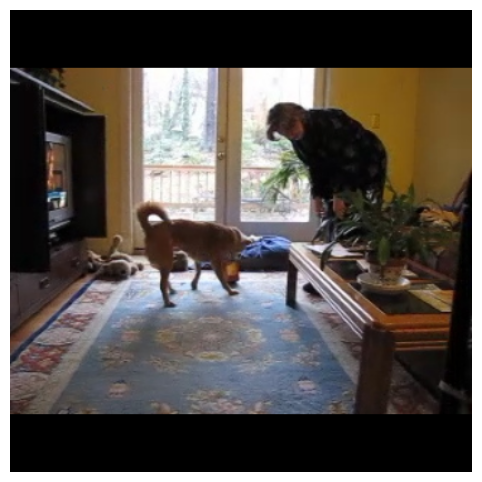

Epoch: 2


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=3.31]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:58:35, 13.01s/it, loss=3.32]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:35<1:32:12, 10.13s/it, loss=3.25]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:22:17,  9.06s/it, loss=3.27]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:49<1:15:57,  8.38s/it, loss=3.29]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:56<1:10:48,  7.82s/it, loss=3.29]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:03<1:09:13,  7.66s/it, loss=3.29]

batch_idx: 6


  1%|█▋                                                                                                                    | 8/549 [01:11<1:07:36,  7.50s/it, loss=3.3]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:18<1:06:45,  7.42s/it, loss=3.32]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:25<1:06:34,  7.41s/it, loss=3.31]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:32<1:05:18,  7.28s/it, loss=3.34]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:39<1:04:18,  7.19s/it, loss=3.35]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:46<1:03:00,  7.05s/it, loss=3.34]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:53<1:03:11,  7.09s/it, loss=3.34]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:01<1:04:17,  7.22s/it, loss=3.34]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:08<1:04:03,  7.21s/it, loss=3.33]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:15<1:04:20,  7.26s/it, loss=3.32]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:23<1:05:30,  7.40s/it, loss=3.32]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:30<1:04:50,  7.34s/it, loss=3.31]

batch_idx: 18


  4%|████▎                                                                                                                | 20/549 [02:37<1:03:37,  7.22s/it, loss=3.3]

batch_idx: 19


  4%|████▍                                                                                                                | 21/549 [02:44<1:03:22,  7.20s/it, loss=3.3]

batch_idx: 20


  4%|████▋                                                                                                                | 22/549 [02:51<1:03:13,  7.20s/it, loss=3.3]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:59<1:03:52,  7.29s/it, loss=3.31]

batch_idx: 22


  4%|█████                                                                                                                | 24/549 [03:06<1:03:34,  7.26s/it, loss=3.3]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:13<1:03:38,  7.29s/it, loss=3.29]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:20<1:02:12,  7.14s/it, loss=3.29]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:27<1:01:51,  7.11s/it, loss=3.29]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:34<1:01:17,  7.06s/it, loss=3.29]

batch_idx: 27


  5%|██████▏                                                                                                               | 29/549 [03:41<59:35,  6.88s/it, loss=3.29]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:48<1:01:25,  7.10s/it, loss=3.28]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:55<1:01:19,  7.10s/it, loss=3.28]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:02<1:01:02,  7.08s/it, loss=3.28]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:09<1:00:13,  7.00s/it, loss=3.28]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:16<1:00:10,  7.01s/it, loss=3.27]

batch_idx: 33


  6%|███████▌                                                                                                              | 35/549 [04:23<58:42,  6.85s/it, loss=3.27]

batch_idx: 34


  7%|███████▋                                                                                                              | 36/549 [04:30<59:23,  6.95s/it, loss=3.27]

batch_idx: 35


  7%|███████▉                                                                                                              | 37/549 [04:36<58:17,  6.83s/it, loss=3.27]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:43<58:07,  6.82s/it, loss=3.27]

batch_idx: 37


  7%|████████▍                                                                                                             | 39/549 [04:50<57:45,  6.79s/it, loss=3.27]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:57<59:05,  6.97s/it, loss=3.27]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:05<1:00:19,  7.13s/it, loss=3.27]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:12<1:00:05,  7.11s/it, loss=3.27]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:19<1:00:16,  7.15s/it, loss=3.27]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:27<1:00:36,  7.20s/it, loss=3.27]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:34<1:00:25,  7.19s/it, loss=3.27]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:41<1:00:54,  7.27s/it, loss=3.28]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:49<1:01:13,  7.32s/it, loss=3.28]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:55<59:10,  7.09s/it, loss=3.28]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:02<58:38,  7.04s/it, loss=3.28]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:09<58:43,  7.06s/it, loss=3.27]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:17<58:43,  7.06s/it, loss=3.27]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:39<1:26:28, 10.44s/it, loss=3.27]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:46<1:17:42,  9.40s/it, loss=3.27]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:54<1:13:05,  8.86s/it, loss=3.27]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [07:01<1:09:43,  8.47s/it, loss=3.27]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:08<1:05:43,  8.00s/it, loss=3.26]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:16<1:04:44,  7.90s/it, loss=3.26]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:23<1:02:45,  7.67s/it, loss=3.26]

batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:30<1:00:10,  7.37s/it, loss=3.26]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:37<59:03,  7.25s/it, loss=3.26]

batch_idx: 59


 11%|████████████▉                                                                                                       | 61/549 [07:44<1:00:03,  7.38s/it, loss=3.25]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:51<57:19,  7.06s/it, loss=3.25]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:58<58:14,  7.19s/it, loss=3.25]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:06<58:38,  7.26s/it, loss=3.25]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:13<58:20,  7.23s/it, loss=3.25]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:20<57:23,  7.13s/it, loss=3.24]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:27<56:46,  7.07s/it, loss=3.25]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:34<56:49,  7.09s/it, loss=3.24]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:41<57:13,  7.15s/it, loss=3.24]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:48<57:03,  7.15s/it, loss=3.24]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:55<57:11,  7.18s/it, loss=3.24]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [09:03<57:08,  7.19s/it, loss=3.24]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:10<56:33,  7.13s/it, loss=3.24]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:17<57:03,  7.21s/it, loss=3.24]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:24<56:33,  7.16s/it, loss=3.24]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:31<55:18,  7.02s/it, loss=3.23]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:37<54:27,  6.92s/it, loss=3.23]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:45<54:51,  6.99s/it, loss=3.23]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:52<55:14,  7.05s/it, loss=3.23]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [10:00<56:56,  7.28s/it, loss=3.23]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:07<56:57,  7.30s/it, loss=3.23]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:14<56:27,  7.25s/it, loss=3.22]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:21<55:53,  7.20s/it, loss=3.22]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:28<54:22,  7.02s/it, loss=3.22]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:35<54:49,  7.09s/it, loss=3.22]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:42<55:20,  7.17s/it, loss=3.22]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:49<53:42,  6.98s/it, loss=3.22]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:56<53:55,  7.02s/it, loss=3.22]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [11:03<54:46,  7.14s/it, loss=3.22]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:11<55:04,  7.20s/it, loss=3.21]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:18<54:20,  7.12s/it, loss=3.21]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:25<54:19,  7.13s/it, loss=3.21]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:32<54:07,  7.12s/it, loss=3.21]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:39<52:52,  6.97s/it, loss=3.21]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:46<53:39,  7.09s/it, loss=3.21]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:53<53:59,  7.15s/it, loss=3.21]

batch_idx: 95


 18%|█████████████████████                                                                                                  | 97/549 [12:00<53:36,  7.12s/it, loss=3.2]

batch_idx: 96


 18%|█████████████████████▏                                                                                                 | 98/549 [12:06<51:15,  6.82s/it, loss=3.2]

batch_idx: 97


 18%|█████████████████████▍                                                                                                 | 99/549 [12:14<52:10,  6.96s/it, loss=3.2]

batch_idx: 98


 18%|█████████████████████▍                                                                                                | 100/549 [12:20<51:42,  6.91s/it, loss=3.2]

batch_idx: 99


 18%|█████████████████████▍                                                                                                | 100/549 [12:27<51:42,  6.91s/it, loss=3.2]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▌                                                                                              | 102/549 [12:49<1:14:06,  9.95s/it, loss=3.2]

batch_idx: 101


 19%|█████████████████████▊                                                                                              | 103/549 [12:56<1:07:57,  9.14s/it, loss=3.2]

batch_idx: 102


 19%|█████████████████████▉                                                                                              | 104/549 [13:03<1:02:47,  8.47s/it, loss=3.2]

batch_idx: 103


 19%|██████████████████████▌                                                                                               | 105/549 [13:10<59:56,  8.10s/it, loss=3.2]

batch_idx: 104


 19%|██████████████████████▊                                                                                               | 106/549 [13:17<57:55,  7.85s/it, loss=3.2]

batch_idx: 105


 19%|██████████████████████▉                                                                                               | 107/549 [13:24<56:20,  7.65s/it, loss=3.2]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:32<56:29,  7.69s/it, loss=3.19]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:39<53:45,  7.33s/it, loss=3.19]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:45<52:15,  7.14s/it, loss=3.19]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:53<52:23,  7.18s/it, loss=3.19]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [14:00<52:55,  7.27s/it, loss=3.19]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [14:07<52:28,  7.22s/it, loss=3.19]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:14<51:51,  7.15s/it, loss=3.19]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:21<50:45,  7.02s/it, loss=3.18]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:28<51:17,  7.11s/it, loss=3.18]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:35<50:15,  6.98s/it, loss=3.18]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:42<50:25,  7.02s/it, loss=3.18]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:49<50:45,  7.08s/it, loss=3.18]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:56<49:50,  6.97s/it, loss=3.18]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [15:03<50:28,  7.08s/it, loss=3.18]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:11<51:25,  7.23s/it, loss=3.18]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:19<52:12,  7.35s/it, loss=3.18]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:25<50:53,  7.19s/it, loss=3.18]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:32<50:17,  7.12s/it, loss=3.18]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:40<50:33,  7.17s/it, loss=3.18]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:47<49:55,  7.10s/it, loss=3.18]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:53<48:54,  6.97s/it, loss=3.18]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [16:00<48:28,  6.93s/it, loss=3.18]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [16:07<48:42,  6.98s/it, loss=3.17]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:14<48:03,  6.90s/it, loss=3.17]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:21<48:08,  6.93s/it, loss=3.17]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:28<48:52,  7.05s/it, loss=3.17]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:35<48:21,  6.99s/it, loss=3.17]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:42<48:00,  6.96s/it, loss=3.17]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:49<48:47,  7.09s/it, loss=3.17]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:56<48:44,  7.10s/it, loss=3.17]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [17:03<47:59,  7.01s/it, loss=3.16]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:11<48:49,  7.14s/it, loss=3.16]

batch_idx: 138
batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:25<48:17,  7.10s/it, loss=3.16]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:32<47:32,  7.01s/it, loss=3.16]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:39<47:32,  7.03s/it, loss=3.16]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:46<47:54,  7.10s/it, loss=3.16]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:53<48:20,  7.18s/it, loss=3.16]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [18:00<47:07,  7.02s/it, loss=3.15]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [18:07<47:57,  7.16s/it, loss=3.15]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:15<48:27,  7.25s/it, loss=3.15]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:22<48:26,  7.27s/it, loss=3.15]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:29<47:47,  7.19s/it, loss=3.15]

batch_idx: 149


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:36<47:47,  7.19s/it, loss=3.15]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [18:58<1:06:47, 10.09s/it, loss=3.15]

batch_idx: 151


 28%|████████████████████████████████▌                                                                                    | 153/549 [19:04<59:43,  9.05s/it, loss=3.15]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:11<55:40,  8.46s/it, loss=3.15]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:18<52:16,  7.96s/it, loss=3.15]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:25<50:40,  7.74s/it, loss=3.14]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:32<48:11,  7.38s/it, loss=3.14]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:38<46:30,  7.14s/it, loss=3.14]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:45<45:51,  7.06s/it, loss=3.14]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:52<45:14,  6.98s/it, loss=3.14]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:59<45:30,  7.04s/it, loss=3.14]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [20:06<44:42,  6.93s/it, loss=3.14]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:13<45:02,  7.00s/it, loss=3.14]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:20<44:08,  6.88s/it, loss=3.14]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:27<45:23,  7.09s/it, loss=3.14]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:35<45:41,  7.16s/it, loss=3.14]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:42<45:17,  7.11s/it, loss=3.14]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:49<45:23,  7.15s/it, loss=3.14]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:56<46:04,  7.27s/it, loss=3.13]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [21:03<45:29,  7.20s/it, loss=3.13]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [21:10<44:15,  7.02s/it, loss=3.13]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:17<44:28,  7.08s/it, loss=3.13]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:24<43:45,  6.98s/it, loss=3.13]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:31<44:11,  7.07s/it, loss=3.13]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:38<43:40,  7.01s/it, loss=3.13]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:45<42:55,  6.90s/it, loss=3.13]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:52<42:32,  6.86s/it, loss=3.13]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:59<43:01,  6.96s/it, loss=3.13]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [22:06<43:10,  7.00s/it, loss=3.13]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [22:13<43:11,  7.02s/it, loss=3.13]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:20<42:55,  7.00s/it, loss=3.13]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:27<43:18,  7.08s/it, loss=3.12]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:34<43:15,  7.09s/it, loss=3.12]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:41<42:31,  6.99s/it, loss=3.12]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:48<43:01,  7.09s/it, loss=3.12]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:55<42:54,  7.09s/it, loss=3.13]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [23:03<43:51,  7.27s/it, loss=3.13]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [23:11<44:04,  7.32s/it, loss=3.12]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:18<43:40,  7.28s/it, loss=3.12]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:25<43:10,  7.22s/it, loss=3.12]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:31<42:08,  7.06s/it, loss=3.12]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:38<41:17,  6.94s/it, loss=3.12]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:46<42:27,  7.16s/it, loss=3.12]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:53<42:19,  7.15s/it, loss=3.12]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [24:00<42:48,  7.25s/it, loss=3.12]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [24:08<43:03,  7.32s/it, loss=3.11]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:15<42:32,  7.25s/it, loss=3.11]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:22<41:44,  7.14s/it, loss=3.11]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:29<41:57,  7.19s/it, loss=3.11]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:36<41:57,  7.21s/it, loss=3.11]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:44<41:57,  7.21s/it, loss=3.11]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [25:05<59:33, 10.30s/it, loss=3.11]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [25:14<55:58,  9.71s/it, loss=3.11]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:21<52:21,  9.11s/it, loss=3.11]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:29<49:19,  8.60s/it, loss=3.11]

batch_idx: 204


 38%|████████████████████████████████████████████▎                                                                         | 206/549 [25:36<47:01,  8.23s/it, loss=3.1]

batch_idx: 205


 38%|████████████████████████████████████████████▍                                                                         | 207/549 [25:43<45:07,  7.92s/it, loss=3.1]

batch_idx: 206


 38%|████████████████████████████████████████████▋                                                                         | 208/549 [25:50<43:12,  7.60s/it, loss=3.1]

batch_idx: 207


 38%|████████████████████████████████████████████▉                                                                         | 209/549 [25:57<42:06,  7.43s/it, loss=3.1]

batch_idx: 208


 38%|█████████████████████████████████████████████▏                                                                        | 210/549 [26:05<42:08,  7.46s/it, loss=3.1]

batch_idx: 209


 38%|█████████████████████████████████████████████▎                                                                        | 211/549 [26:12<42:01,  7.46s/it, loss=3.1]

batch_idx: 210


 39%|█████████████████████████████████████████████▌                                                                        | 212/549 [26:19<41:21,  7.36s/it, loss=3.1]

batch_idx: 211


 39%|█████████████████████████████████████████████▊                                                                        | 213/549 [26:26<40:44,  7.28s/it, loss=3.1]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:34<40:21,  7.23s/it, loss=3.09]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:41<40:10,  7.22s/it, loss=3.09]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:48<39:57,  7.20s/it, loss=3.09]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:55<40:30,  7.32s/it, loss=3.09]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [27:02<39:43,  7.20s/it, loss=3.09]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [27:10<39:46,  7.23s/it, loss=3.09]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:17<39:39,  7.23s/it, loss=3.09]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:24<39:41,  7.26s/it, loss=3.09]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:32<40:03,  7.35s/it, loss=3.09]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:39<39:15,  7.23s/it, loss=3.08]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:46<38:59,  7.20s/it, loss=3.08]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:53<38:52,  7.20s/it, loss=3.08]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [28:00<39:02,  7.25s/it, loss=3.08]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [28:08<39:05,  7.28s/it, loss=3.08]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [28:15<39:22,  7.36s/it, loss=3.08]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:23<40:08,  7.53s/it, loss=3.08]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:30<38:54,  7.32s/it, loss=3.08]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:37<38:39,  7.29s/it, loss=3.08]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:44<37:57,  7.18s/it, loss=3.08]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:52<37:56,  7.20s/it, loss=3.08]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:59<38:01,  7.24s/it, loss=3.07]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [29:06<37:46,  7.22s/it, loss=3.07]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [29:13<37:56,  7.27s/it, loss=3.07]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:21<38:08,  7.34s/it, loss=3.07]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:28<37:45,  7.29s/it, loss=3.07]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:36<38:03,  7.36s/it, loss=3.07]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:43<38:12,  7.42s/it, loss=3.07]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:50<37:18,  7.27s/it, loss=3.07]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:58<37:48,  7.39s/it, loss=3.07]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [30:04<36:30,  7.16s/it, loss=3.07]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [30:12<36:23,  7.16s/it, loss=3.07]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:19<36:43,  7.25s/it, loss=3.06]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:26<36:19,  7.19s/it, loss=3.06]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:33<35:26,  7.04s/it, loss=3.06]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:40<34:59,  6.98s/it, loss=3.06]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:47<35:03,  7.01s/it, loss=3.06]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:54<35:01,  7.03s/it, loss=3.06]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [31:01<35:01,  7.03s/it, loss=3.06]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [31:21<48:11,  9.73s/it, loss=3.06]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:27<43:07,  8.74s/it, loss=3.06]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:34<41:10,  8.37s/it, loss=3.06]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:42<39:51,  8.13s/it, loss=3.05]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:49<37:49,  7.75s/it, loss=3.05]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:56<37:09,  7.63s/it, loss=3.05]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [32:03<36:08,  7.45s/it, loss=3.05]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [32:10<34:58,  7.24s/it, loss=3.05]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [32:17<34:07,  7.09s/it, loss=3.05]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:24<34:08,  7.11s/it, loss=3.05]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:31<34:30,  7.22s/it, loss=3.05]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:38<34:07,  7.16s/it, loss=3.05]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:46<34:31,  7.27s/it, loss=3.05]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:54<35:10,  7.43s/it, loss=3.05]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [33:01<34:56,  7.41s/it, loss=3.04]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [33:08<34:34,  7.36s/it, loss=3.04]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [33:16<34:21,  7.34s/it, loss=3.04]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [33:23<33:50,  7.25s/it, loss=3.04]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:30<34:03,  7.32s/it, loss=3.04]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:38<34:06,  7.36s/it, loss=3.04]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:45<34:22,  7.45s/it, loss=3.04]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:52<33:03,  7.19s/it, loss=3.04]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:59<32:59,  7.20s/it, loss=3.04]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [34:06<32:20,  7.08s/it, loss=3.04]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [34:13<32:26,  7.13s/it, loss=3.03]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [34:20<31:28,  6.94s/it, loss=3.03]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:27<31:39,  7.01s/it, loss=3.03]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:34<31:42,  7.05s/it, loss=3.03]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:41<31:53,  7.11s/it, loss=3.03]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:48<31:55,  7.15s/it, loss=3.03]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:56<32:19,  7.26s/it, loss=3.03]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [35:04<32:48,  7.40s/it, loss=3.03]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [35:12<33:33,  7.60s/it, loss=3.03]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [35:19<33:20,  7.58s/it, loss=3.03]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:26<32:39,  7.45s/it, loss=3.03]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:34<32:20,  7.41s/it, loss=3.03]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:41<31:25,  7.22s/it, loss=3.03]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:48<31:47,  7.34s/it, loss=3.02]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:55<30:28,  7.06s/it, loss=3.02]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [36:02<30:43,  7.14s/it, loss=3.02]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [36:09<30:50,  7.20s/it, loss=3.02]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [36:17<30:50,  7.23s/it, loss=3.02]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [36:24<30:32,  7.19s/it, loss=3.02]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:31<30:32,  7.22s/it, loss=3.02]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:38<30:45,  7.29s/it, loss=3.02]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:45<30:18,  7.22s/it, loss=3.02]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:53<30:40,  7.33s/it, loss=3.02]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [37:00<29:47,  7.15s/it, loss=3.02]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [37:07<29:43,  7.16s/it, loss=3.01]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [37:14<29:43,  7.16s/it, loss=3.01]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:34<40:37,  9.87s/it, loss=3.01]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:42<37:29,  9.14s/it, loss=3.01]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:49<35:04,  8.59s/it, loss=3.01]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:56<33:14,  8.18s/it, loss=3.01]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [38:04<32:41,  8.07s/it, loss=3.01]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [38:12<32:05,  7.96s/it, loss=3.01]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [38:19<31:09,  7.76s/it, loss=3.01]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [38:26<30:15,  7.56s/it, loss=3.01]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:33<29:14,  7.34s/it, loss=3.01]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:40<28:59,  7.31s/it, loss=3.01]

batch_idx: 310


 57%|████████████████████████████████████████████████████████████████████▏                                                   | 312/549 [38:47<28:51,  7.30s/it, loss=3]

batch_idx: 311


 57%|████████████████████████████████████████████████████████████████████▍                                                   | 313/549 [38:54<28:16,  7.19s/it, loss=3]

batch_idx: 312


 57%|████████████████████████████████████████████████████████████████████▋                                                   | 314/549 [39:02<28:26,  7.26s/it, loss=3]

batch_idx: 313


 57%|████████████████████████████████████████████████████████████████████▊                                                   | 315/549 [39:09<28:32,  7.32s/it, loss=3]

batch_idx: 314


 58%|█████████████████████████████████████████████████████████████████████                                                   | 316/549 [39:16<28:00,  7.21s/it, loss=3]

batch_idx: 315


 58%|█████████████████████████████████████████████████████████████████████▎                                                  | 317/549 [39:23<27:49,  7.20s/it, loss=3]

batch_idx: 316


 58%|█████████████████████████████████████████████████████████████████████▌                                                  | 318/549 [39:31<28:06,  7.30s/it, loss=3]

batch_idx: 317


 58%|█████████████████████████████████████████████████████████████████████▋                                                  | 319/549 [39:38<27:22,  7.14s/it, loss=3]

batch_idx: 318


 58%|█████████████████████████████████████████████████████████████████████▉                                                  | 320/549 [39:45<27:19,  7.16s/it, loss=3]

batch_idx: 319


 58%|██████████████████████████████████████████████████████████████████████▏                                                 | 321/549 [39:53<28:13,  7.43s/it, loss=3]

batch_idx: 320


 59%|██████████████████████████████████████████████████████████████████████▍                                                 | 322/549 [40:00<27:33,  7.28s/it, loss=3]

batch_idx: 321


 59%|██████████████████████████████████████████████████████████████████████▌                                                 | 323/549 [40:07<27:32,  7.31s/it, loss=3]

batch_idx: 322


 59%|██████████████████████████████████████████████████████████████████████▊                                                 | 324/549 [40:14<27:12,  7.26s/it, loss=3]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [40:21<26:52,  7.20s/it, loss=2.99]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [40:28<26:21,  7.09s/it, loss=2.99]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:36<27:08,  7.34s/it, loss=2.99]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:43<26:31,  7.20s/it, loss=2.99]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:50<25:55,  7.07s/it, loss=2.99]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:57<25:53,  7.09s/it, loss=2.99]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [41:04<26:12,  7.21s/it, loss=2.99]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [41:12<26:08,  7.23s/it, loss=2.99]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [41:19<25:44,  7.15s/it, loss=2.99]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [41:26<25:58,  7.25s/it, loss=2.99]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:33<25:06,  7.04s/it, loss=2.99]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:40<24:46,  6.98s/it, loss=2.98]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:47<24:38,  6.98s/it, loss=2.98]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:54<24:55,  7.09s/it, loss=2.98]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [42:00<24:07,  6.89s/it, loss=2.98]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [42:08<24:55,  7.15s/it, loss=2.98]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [42:16<25:15,  7.29s/it, loss=2.98]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [42:23<25:18,  7.34s/it, loss=2.98]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:30<25:05,  7.31s/it, loss=2.98]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:37<24:21,  7.13s/it, loss=2.98]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:44<24:18,  7.15s/it, loss=2.98]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:52<24:23,  7.21s/it, loss=2.97]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:59<24:04,  7.15s/it, loss=2.97]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [43:05<23:35,  7.04s/it, loss=2.97]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [43:12<23:07,  6.94s/it, loss=2.97]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:19<23:02,  6.95s/it, loss=2.97]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:26<23:02,  6.95s/it, loss=2.97]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:49<33:50, 10.31s/it, loss=2.97]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:56<30:28,  9.33s/it, loss=2.97]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [44:03<28:03,  8.63s/it, loss=2.97]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [44:11<27:08,  8.40s/it, loss=2.97]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [44:18<26:10,  8.14s/it, loss=2.97]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [44:25<24:46,  7.74s/it, loss=2.96]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [44:32<24:00,  7.54s/it, loss=2.96]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:39<23:18,  7.36s/it, loss=2.96]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:46<22:28,  7.13s/it, loss=2.96]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:53<22:10,  7.08s/it, loss=2.96]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [45:00<22:05,  7.09s/it, loss=2.96]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [45:07<21:55,  7.07s/it, loss=2.96]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [45:14<22:06,  7.17s/it, loss=2.96]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [45:22<22:13,  7.25s/it, loss=2.96]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [45:28<21:45,  7.13s/it, loss=2.96]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [45:35<21:06,  6.96s/it, loss=2.96]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:42<21:08,  7.01s/it, loss=2.96]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:49<20:53,  6.96s/it, loss=2.95]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:56<21:10,  7.10s/it, loss=2.95]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [46:04<21:22,  7.21s/it, loss=2.95]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [46:11<21:20,  7.24s/it, loss=2.95]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [46:18<21:06,  7.19s/it, loss=2.95]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [46:26<21:17,  7.30s/it, loss=2.95]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [46:34<21:33,  7.43s/it, loss=2.95]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:41<21:43,  7.54s/it, loss=2.95]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:49<21:21,  7.45s/it, loss=2.95]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:56<20:55,  7.34s/it, loss=2.95]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [47:03<20:29,  7.23s/it, loss=2.95]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [47:10<20:03,  7.12s/it, loss=2.94]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [47:17<19:52,  7.10s/it, loss=2.94]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [47:23<19:32,  7.02s/it, loss=2.94]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [47:31<19:43,  7.13s/it, loss=2.94]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:38<20:04,  7.30s/it, loss=2.94]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:46<19:47,  7.24s/it, loss=2.94]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:53<19:55,  7.34s/it, loss=2.94]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [48:00<19:09,  7.10s/it, loss=2.94]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [48:07<19:12,  7.16s/it, loss=2.94]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [48:15<19:24,  7.28s/it, loss=2.94]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [48:22<19:13,  7.25s/it, loss=2.94]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [48:29<19:03,  7.24s/it, loss=2.94]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:35<18:19,  7.00s/it, loss=2.93]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:42<18:03,  6.95s/it, loss=2.93]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:50<18:23,  7.12s/it, loss=2.93]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:56<17:46,  6.92s/it, loss=2.93]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [49:04<18:07,  7.11s/it, loss=2.93]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [49:11<18:10,  7.18s/it, loss=2.93]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [49:18<17:59,  7.15s/it, loss=2.93]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [49:25<17:34,  7.03s/it, loss=2.93]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:32<17:40,  7.12s/it, loss=2.93]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:39<17:40,  7.12s/it, loss=2.93]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [50:01<25:10, 10.28s/it, loss=2.93]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [50:09<22:59,  9.45s/it, loss=2.93]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [50:17<21:53,  9.06s/it, loss=2.93]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [50:24<20:16,  8.45s/it, loss=2.92]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [50:31<19:04,  8.00s/it, loss=2.92]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [50:39<18:31,  7.83s/it, loss=2.92]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:45<17:23,  7.40s/it, loss=2.92]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:51<16:32,  7.09s/it, loss=2.92]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:59<16:32,  7.14s/it, loss=2.92]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [51:05<16:13,  7.05s/it, loss=2.92]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [51:12<15:54,  6.97s/it, loss=2.92]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [51:19<15:54,  7.02s/it, loss=2.92]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [51:27<16:06,  7.16s/it, loss=2.92]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [51:34<16:09,  7.23s/it, loss=2.92]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [51:42<16:05,  7.26s/it, loss=2.92]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:49<15:48,  7.18s/it, loss=2.92]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:56<15:52,  7.27s/it, loss=2.91]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [52:04<15:57,  7.37s/it, loss=2.91]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [52:11<15:36,  7.26s/it, loss=2.91]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [52:18<15:50,  7.42s/it, loss=2.91]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [52:26<15:31,  7.34s/it, loss=2.91]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [52:32<14:52,  7.09s/it, loss=2.91]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [52:39<14:35,  7.00s/it, loss=2.91]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:46<14:26,  6.99s/it, loss=2.91]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:53<14:32,  7.10s/it, loss=2.91]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [53:00<14:17,  7.03s/it, loss=2.91]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [53:07<14:09,  7.02s/it, loss=2.91]

batch_idx: 427


 78%|████████████████████████████████████████████████████████████████████████████████████████████▏                         | 429/549 [53:14<14:03,  7.03s/it, loss=2.9]

batch_idx: 428


 78%|████████████████████████████████████████████████████████████████████████████████████████████▍                         | 430/549 [53:21<13:52,  7.00s/it, loss=2.9]

batch_idx: 429


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                         | 431/549 [53:28<13:53,  7.06s/it, loss=2.9]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████▊                         | 432/549 [53:35<13:31,  6.94s/it, loss=2.9]

batch_idx: 431


 79%|█████████████████████████████████████████████████████████████████████████████████████████████                         | 433/549 [53:42<13:25,  6.95s/it, loss=2.9]

batch_idx: 432


 79%|█████████████████████████████████████████████████████████████████████████████████████████████▎                        | 434/549 [53:48<12:59,  6.78s/it, loss=2.9]

batch_idx: 433


 79%|█████████████████████████████████████████████████████████████████████████████████████████████▍                        | 435/549 [53:56<13:09,  6.92s/it, loss=2.9]

batch_idx: 434


 79%|█████████████████████████████████████████████████████████████████████████████████████████████▋                        | 436/549 [54:03<13:10,  6.99s/it, loss=2.9]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                        | 437/549 [54:10<12:58,  6.95s/it, loss=2.9]

batch_idx: 436


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                       | 438/549 [54:16<12:49,  6.93s/it, loss=2.9]

batch_idx: 437


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▎                       | 439/549 [54:23<12:36,  6.88s/it, loss=2.9]

batch_idx: 438


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▌                       | 440/549 [54:30<12:40,  6.98s/it, loss=2.9]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:38<12:51,  7.15s/it, loss=2.89]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:45<12:43,  7.13s/it, loss=2.89]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:52<12:24,  7.02s/it, loss=2.89]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:59<12:10,  6.96s/it, loss=2.89]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [55:05<12:01,  6.93s/it, loss=2.89]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [55:13<12:04,  7.03s/it, loss=2.89]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [55:20<12:06,  7.13s/it, loss=2.89]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [55:27<11:59,  7.12s/it, loss=2.89]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [55:34<11:44,  7.04s/it, loss=2.89]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:42<11:58,  7.25s/it, loss=2.89]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:49<11:58,  7.25s/it, loss=2.89]

batch_idx: 450
==> Saving checkpoint


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [56:10<16:23, 10.14s/it, loss=2.89]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [56:16<14:16,  8.92s/it, loss=2.89]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [56:23<13:01,  8.23s/it, loss=2.89]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [56:30<12:28,  7.97s/it, loss=2.88]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [56:38<12:23,  7.99s/it, loss=2.88]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [56:46<11:59,  7.83s/it, loss=2.88]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [56:53<11:23,  7.51s/it, loss=2.88]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [57:00<11:19,  7.55s/it, loss=2.88]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [57:08<11:09,  7.52s/it, loss=2.88]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [57:15<10:56,  7.46s/it, loss=2.88]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [57:22<10:41,  7.37s/it, loss=2.88]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [57:29<10:10,  7.10s/it, loss=2.88]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [57:36<10:15,  7.24s/it, loss=2.88]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [57:44<10:14,  7.32s/it, loss=2.87]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [57:51<10:04,  7.28s/it, loss=2.87]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [57:58<10:05,  7.39s/it, loss=2.87]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [58:06<09:50,  7.29s/it, loss=2.87]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [58:12<09:30,  7.13s/it, loss=2.87]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [58:19<09:23,  7.14s/it, loss=2.87]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [58:27<09:21,  7.20s/it, loss=2.87]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [58:34<09:04,  7.07s/it, loss=2.87]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [58:41<09:00,  7.12s/it, loss=2.87]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [58:48<08:45,  7.01s/it, loss=2.87]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:55<08:50,  7.16s/it, loss=2.87]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [59:02<08:39,  7.11s/it, loss=2.87]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [59:09<08:27,  7.05s/it, loss=2.86]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [59:16<08:24,  7.10s/it, loss=2.86]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [59:24<08:29,  7.28s/it, loss=2.86]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [59:31<08:23,  7.30s/it, loss=2.86]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [59:38<08:13,  7.26s/it, loss=2.86]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [59:46<08:19,  7.46s/it, loss=2.86]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [59:54<08:07,  7.38s/it, loss=2.86]

batch_idx: 482


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 484/549 [1:00:01<07:58,  7.36s/it, loss=2.86]

batch_idx: 483


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 485/549 [1:00:08<07:55,  7.43s/it, loss=2.86]

batch_idx: 484


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 486/549 [1:00:15<07:38,  7.28s/it, loss=2.86]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 487/549 [1:00:22<07:18,  7.07s/it, loss=2.85]

batch_idx: 486


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 488/549 [1:00:29<07:16,  7.16s/it, loss=2.85]

batch_idx: 487


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 489/549 [1:00:36<07:08,  7.14s/it, loss=2.85]

batch_idx: 488


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:43<06:52,  6.99s/it, loss=2.85]

batch_idx: 489


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 491/549 [1:00:50<06:52,  7.12s/it, loss=2.85]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 492/549 [1:00:57<06:40,  7.03s/it, loss=2.85]

batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:01:04<06:35,  7.06s/it, loss=2.85]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:01:12<06:28,  7.07s/it, loss=2.85]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:01:19<06:23,  7.10s/it, loss=2.85]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:01:26<06:15,  7.09s/it, loss=2.85]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:01:33<06:10,  7.12s/it, loss=2.85]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:01:40<06:02,  7.12s/it, loss=2.84]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:01:47<05:55,  7.10s/it, loss=2.84]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:54<05:49,  7.13s/it, loss=2.84]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:02:01<05:49,  7.13s/it, loss=2.84]

batch_idx: 500
==> Saving checkpoint


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:02:24<08:06, 10.35s/it, loss=2.84]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:02:31<07:08,  9.32s/it, loss=2.84]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:02:38<06:27,  8.62s/it, loss=2.84]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:02:45<06:02,  8.25s/it, loss=2.84]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:02:52<05:37,  7.84s/it, loss=2.84]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:59<05:21,  7.64s/it, loss=2.84]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:03:06<05:06,  7.48s/it, loss=2.84]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:03:14<05:01,  7.53s/it, loss=2.84]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:03:21<04:51,  7.48s/it, loss=2.84]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:03:28<04:41,  7.40s/it, loss=2.83]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:03:36<04:31,  7.34s/it, loss=2.83]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:42<04:20,  7.23s/it, loss=2.83]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:49<04:08,  7.11s/it, loss=2.83]

batch_idx: 513
batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:04:05<04:05,  7.44s/it, loss=2.83]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:04:12<03:54,  7.32s/it, loss=2.83]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:04:19<03:43,  7.20s/it, loss=2.83]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:04:26<03:38,  7.28s/it, loss=2.83]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:04:33<03:26,  7.13s/it, loss=2.83]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:40<03:15,  7.00s/it, loss=2.83]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:04:47<03:10,  7.06s/it, loss=2.83]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:55<03:08,  7.24s/it, loss=2.83]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:05:02<03:01,  7.25s/it, loss=2.82]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:05:09<02:53,  7.21s/it, loss=2.82]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:05:16<02:44,  7.15s/it, loss=2.82]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:05:23<02:37,  7.16s/it, loss=2.82]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:05:30<02:29,  7.12s/it, loss=2.82]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:05:37<02:19,  6.99s/it, loss=2.82]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:44<02:14,  7.09s/it, loss=2.82]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:05:52<02:09,  7.21s/it, loss=2.82]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:59<02:01,  7.15s/it, loss=2.82]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:06:06<01:54,  7.16s/it, loss=2.82]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:06:14<01:48,  7.25s/it, loss=2.82]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:06:21<01:44,  7.44s/it, loss=2.82]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:06:28<01:35,  7.32s/it, loss=2.82]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:06:35<01:25,  7.17s/it, loss=2.81]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:43<01:19,  7.27s/it, loss=2.81]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:50<01:11,  7.17s/it, loss=2.81]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:06:57<01:04,  7.14s/it, loss=2.81]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:07:04<00:57,  7.14s/it, loss=2.81]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:07:11<00:50,  7.22s/it, loss=2.81]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:07:19<00:43,  7.27s/it, loss=2.81]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:07:26<00:36,  7.30s/it, loss=2.81]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:07:33<00:28,  7.21s/it, loss=2.81]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:07:41<00:22,  7.34s/it, loss=2.81]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:48<00:14,  7.39s/it, loss=2.81]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:55<00:07,  7.34s/it, loss=2.81]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:56<00:00,  7.43s/it, loss=2.81]

batch_idx: 548
==> Saving checkpoint


display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


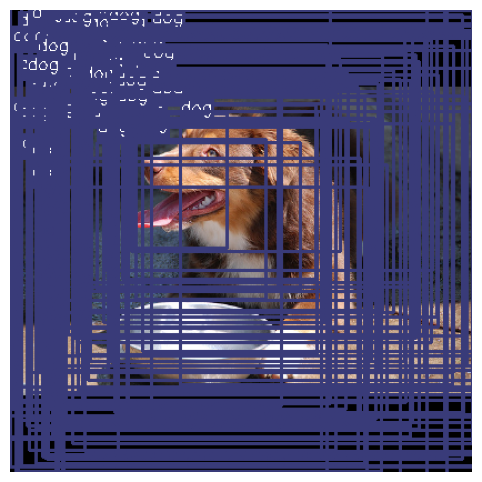

Epoch: 3


  0%|                                                                                                                               | 0/549 [00:06<?, ?it/s, loss=2.39]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:58:11, 12.97s/it, loss=2.38]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:35<1:32:14, 10.14s/it, loss=2.37]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:21:57,  9.02s/it, loss=2.36]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:49<1:14:45,  8.25s/it, loss=2.34]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:56<1:11:05,  7.86s/it, loss=2.33]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:03<1:09:43,  7.72s/it, loss=2.32]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:11<1:08:07,  7.56s/it, loss=2.34]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:17<1:05:29,  7.28s/it, loss=2.33]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:25<1:07:09,  7.48s/it, loss=2.32]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:32<1:05:11,  7.27s/it, loss=2.33]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:39<1:05:35,  7.33s/it, loss=2.33]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:46<1:03:58,  7.16s/it, loss=2.32]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:53<1:03:28,  7.12s/it, loss=2.33]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:00<1:03:47,  7.17s/it, loss=2.34]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:08<1:04:13,  7.23s/it, loss=2.34]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:15<1:04:17,  7.25s/it, loss=2.35]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:22<1:04:11,  7.25s/it, loss=2.35]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:29<1:03:39,  7.21s/it, loss=2.36]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:37<1:03:16,  7.18s/it, loss=2.36]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:44<1:04:24,  7.32s/it, loss=2.36]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:52<1:04:54,  7.39s/it, loss=2.36]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:59<1:03:06,  7.20s/it, loss=2.36]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:05<1:01:59,  7.09s/it, loss=2.36]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:12<1:00:38,  6.94s/it, loss=2.35]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:19<1:01:01,  7.00s/it, loss=2.35]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:26<1:01:46,  7.10s/it, loss=2.35]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:34<1:01:43,  7.11s/it, loss=2.35]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:41<1:01:56,  7.15s/it, loss=2.35]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:48<1:02:19,  7.21s/it, loss=2.35]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:55<1:02:24,  7.23s/it, loss=2.35]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:02<1:01:38,  7.15s/it, loss=2.35]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:10<1:01:55,  7.20s/it, loss=2.35]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:17<1:02:07,  7.24s/it, loss=2.35]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:24<1:00:56,  7.11s/it, loss=2.35]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:31<1:00:39,  7.09s/it, loss=2.35]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:38<1:00:17,  7.07s/it, loss=2.35]

batch_idx: 36


  7%|████████                                                                                                            | 38/549 [04:45<1:00:01,  7.05s/it, loss=2.35]

batch_idx: 37


  7%|████████▍                                                                                                             | 39/549 [04:52<58:58,  6.94s/it, loss=2.35]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:59<59:32,  7.02s/it, loss=2.34]

batch_idx: 39


  7%|████████▋                                                                                                           | 41/549 [05:06<1:00:21,  7.13s/it, loss=2.34]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:14<1:01:18,  7.26s/it, loss=2.34]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:21<1:01:19,  7.27s/it, loss=2.34]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:28<1:00:21,  7.17s/it, loss=2.34]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:36<1:01:23,  7.31s/it, loss=2.34]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:43<1:01:02,  7.28s/it, loss=2.34]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:50<1:00:20,  7.21s/it, loss=2.34]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:57<59:35,  7.14s/it, loss=2.34]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:03<57:43,  6.93s/it, loss=2.34]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:10<57:20,  6.90s/it, loss=2.33]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:18<57:20,  6.90s/it, loss=2.33]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:38<1:22:08,  9.92s/it, loss=2.33]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:45<1:15:12,  9.10s/it, loss=2.33]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:52<1:09:19,  8.40s/it, loss=2.33]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [07:00<1:07:25,  8.19s/it, loss=2.33]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:07<1:05:00,  7.91s/it, loss=2.33]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:14<1:01:35,  7.51s/it, loss=2.33]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:21<1:00:17,  7.37s/it, loss=2.32]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:28<59:20,  7.27s/it, loss=2.32]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:35<59:47,  7.34s/it, loss=2.32]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:43<59:10,  7.28s/it, loss=2.32]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:49<57:55,  7.14s/it, loss=2.32]

batch_idx: 61
batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:03<57:38,  7.13s/it, loss=2.32]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:10<56:17,  6.98s/it, loss=2.32]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:18<58:36,  7.28s/it, loss=2.32]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:25<58:24,  7.27s/it, loss=2.32]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:33<58:39,  7.32s/it, loss=2.32]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:40<58:08,  7.27s/it, loss=2.32]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:47<57:17,  7.18s/it, loss=2.32]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:54<56:13,  7.06s/it, loss=2.31]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [09:01<56:33,  7.12s/it, loss=2.31]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:08<57:32,  7.25s/it, loss=2.31]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:16<57:30,  7.26s/it, loss=2.31]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:22<55:18,  7.00s/it, loss=2.31]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:30<56:03,  7.11s/it, loss=2.31]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:36<54:32,  6.93s/it, loss=2.32]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:43<55:34,  7.08s/it, loss=2.32]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:50<55:10,  7.04s/it, loss=2.32]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:58<56:56,  7.29s/it, loss=2.32]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:05<56:15,  7.21s/it, loss=2.32]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:12<55:30,  7.13s/it, loss=2.32]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:19<53:45,  6.92s/it, loss=2.32]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:26<53:41,  6.93s/it, loss=2.32]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:32<53:22,  6.90s/it, loss=2.32]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:40<55:02,  7.13s/it, loss=2.32]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:48<55:35,  7.22s/it, loss=2.31]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:55<55:53,  7.27s/it, loss=2.32]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [11:02<55:48,  7.28s/it, loss=2.32]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:09<54:59,  7.19s/it, loss=2.31]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:17<56:01,  7.34s/it, loss=2.31]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:24<54:53,  7.21s/it, loss=2.32]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:31<53:45,  7.07s/it, loss=2.31]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:38<53:50,  7.10s/it, loss=2.31]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:45<53:30,  7.07s/it, loss=2.31]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:52<54:28,  7.21s/it, loss=2.31]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:59<54:08,  7.19s/it, loss=2.31]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:07<53:47,  7.16s/it, loss=2.31]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:13<52:13,  6.96s/it, loss=2.31]

batch_idx: 98


 18%|█████████████████████▍                                                                                                | 100/549 [12:21<53:50,  7.20s/it, loss=2.3]

batch_idx: 99


 18%|█████████████████████▍                                                                                                | 100/549 [12:28<53:50,  7.20s/it, loss=2.3]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:50<1:16:29, 10.27s/it, loss=2.31]

batch_idx: 101


 19%|█████████████████████▊                                                                                              | 103/549 [12:57<1:09:00,  9.28s/it, loss=2.3]

batch_idx: 102


 19%|█████████████████████▉                                                                                              | 104/549 [13:04<1:04:05,  8.64s/it, loss=2.3]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [13:11<1:01:13,  8.27s/it, loss=2.3]

batch_idx: 104


 19%|██████████████████████▊                                                                                               | 106/549 [13:18<57:59,  7.85s/it, loss=2.3]

batch_idx: 105


 19%|██████████████████████▉                                                                                               | 107/549 [13:25<55:54,  7.59s/it, loss=2.3]

batch_idx: 106


 20%|███████████████████████▏                                                                                              | 108/549 [13:32<54:21,  7.40s/it, loss=2.3]

batch_idx: 107


 20%|███████████████████████▍                                                                                              | 109/549 [13:39<53:36,  7.31s/it, loss=2.3]

batch_idx: 108


 20%|███████████████████████▋                                                                                              | 110/549 [13:46<52:26,  7.17s/it, loss=2.3]

batch_idx: 109


 20%|███████████████████████▊                                                                                              | 111/549 [13:53<52:40,  7.22s/it, loss=2.3]

batch_idx: 110


 20%|████████████████████████                                                                                              | 112/549 [14:01<52:44,  7.24s/it, loss=2.3]

batch_idx: 111


 21%|████████████████████████▎                                                                                             | 113/549 [14:07<51:32,  7.09s/it, loss=2.3]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:14<51:04,  7.04s/it, loss=2.29]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:21<51:06,  7.07s/it, loss=2.29]

batch_idx: 114


 21%|████████████████████████▉                                                                                             | 116/549 [14:28<50:18,  6.97s/it, loss=2.3]

batch_idx: 115


 21%|█████████████████████████▏                                                                                            | 117/549 [14:36<51:02,  7.09s/it, loss=2.3]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:43<51:38,  7.19s/it, loss=2.29]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:50<50:43,  7.08s/it, loss=2.29]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:57<50:31,  7.07s/it, loss=2.29]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [15:04<50:13,  7.04s/it, loss=2.29]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:10<48:10,  6.77s/it, loss=2.29]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:17<48:00,  6.76s/it, loss=2.29]

batch_idx: 122


 23%|██████████████████████████▋                                                                                           | 124/549 [15:23<48:04,  6.79s/it, loss=2.3]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:31<48:47,  6.91s/it, loss=2.29]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:38<49:32,  7.03s/it, loss=2.29]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:45<50:06,  7.12s/it, loss=2.29]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:52<48:48,  6.96s/it, loss=2.29]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:59<48:23,  6.91s/it, loss=2.29]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [16:06<48:46,  6.98s/it, loss=2.29]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:13<48:48,  7.01s/it, loss=2.29]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:20<48:18,  6.95s/it, loss=2.29]

batch_idx: 131
batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:34<49:23,  7.14s/it, loss=2.29]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:42<49:19,  7.15s/it, loss=2.28]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:49<49:44,  7.23s/it, loss=2.28]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:56<49:01,  7.14s/it, loss=2.28]

batch_idx: 136
batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:11<49:35,  7.26s/it, loss=2.28]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:18<49:46,  7.30s/it, loss=2.28]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:25<49:45,  7.32s/it, loss=2.28]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:33<49:30,  7.30s/it, loss=2.28]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:39<48:22,  7.15s/it, loss=2.28]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:46<47:59,  7.11s/it, loss=2.28]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:54<48:34,  7.21s/it, loss=2.28]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [18:01<48:38,  7.24s/it, loss=2.27]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [18:09<49:06,  7.33s/it, loss=2.27]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:16<49:34,  7.42s/it, loss=2.27]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:24<49:48,  7.47s/it, loss=2.27]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:31<48:41,  7.32s/it, loss=2.27]

batch_idx: 149


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:38<48:41,  7.32s/it, loss=2.27]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [19:00<1:08:00, 10.28s/it, loss=2.27]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [19:07<1:02:14,  9.43s/it, loss=2.27]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:14<57:10,  8.68s/it, loss=2.27]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:21<54:19,  8.27s/it, loss=2.27]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:28<51:10,  7.81s/it, loss=2.27]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:35<50:00,  7.65s/it, loss=2.27]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:43<49:46,  7.64s/it, loss=2.27]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:50<48:21,  7.44s/it, loss=2.27]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:58<48:44,  7.52s/it, loss=2.27]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [20:05<47:53,  7.40s/it, loss=2.27]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [20:12<47:23,  7.35s/it, loss=2.26]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:19<47:08,  7.33s/it, loss=2.26]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:26<46:28,  7.24s/it, loss=2.26]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:34<46:04,  7.20s/it, loss=2.26]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:41<46:21,  7.26s/it, loss=2.26]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:48<45:42,  7.18s/it, loss=2.26]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:55<45:00,  7.09s/it, loss=2.26]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [21:02<45:33,  7.19s/it, loss=2.26]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [21:09<45:18,  7.17s/it, loss=2.26]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [21:16<45:03,  7.15s/it, loss=2.25]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:24<45:09,  7.19s/it, loss=2.26]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:31<45:59,  7.34s/it, loss=2.26]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:39<46:26,  7.43s/it, loss=2.25]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:46<45:38,  7.32s/it, loss=2.26]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:53<44:26,  7.15s/it, loss=2.26]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [22:00<43:58,  7.09s/it, loss=2.26]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [22:07<44:17,  7.16s/it, loss=2.25]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [22:14<43:43,  7.09s/it, loss=2.25]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [22:21<43:46,  7.12s/it, loss=2.25]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:28<43:12,  7.04s/it, loss=2.25]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:35<43:31,  7.12s/it, loss=2.25]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:43<44:28,  7.29s/it, loss=2.25]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:50<44:09,  7.26s/it, loss=2.25]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:58<44:15,  7.30s/it, loss=2.25]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [23:05<44:24,  7.34s/it, loss=2.25]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [23:13<44:41,  7.41s/it, loss=2.25]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [23:20<44:02,  7.32s/it, loss=2.25]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:27<42:50,  7.14s/it, loss=2.25]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:34<43:01,  7.19s/it, loss=2.25]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:41<42:59,  7.21s/it, loss=2.25]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:48<42:40,  7.17s/it, loss=2.25]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:55<42:39,  7.19s/it, loss=2.25]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [24:03<42:46,  7.23s/it, loss=2.24]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [24:10<42:39,  7.23s/it, loss=2.24]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [24:17<42:50,  7.28s/it, loss=2.24]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:24<41:49,  7.13s/it, loss=2.24]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:31<41:32,  7.10s/it, loss=2.24]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:38<41:14,  7.07s/it, loss=2.24]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:45<41:03,  7.06s/it, loss=2.24]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:53<41:03,  7.06s/it, loss=2.24]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [25:14<58:58, 10.20s/it, loss=2.24]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [25:22<54:07,  9.39s/it, loss=2.24]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:29<50:20,  8.75s/it, loss=2.24]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:36<47:14,  8.24s/it, loss=2.24]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:43<45:28,  7.96s/it, loss=2.24]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:51<44:27,  7.80s/it, loss=2.24]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:58<43:11,  7.60s/it, loss=2.24]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [26:06<43:22,  7.65s/it, loss=2.24]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [26:12<41:40,  7.38s/it, loss=2.24]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [26:20<41:23,  7.35s/it, loss=2.24]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:27<40:47,  7.26s/it, loss=2.24]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:35<41:50,  7.47s/it, loss=2.24]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:42<41:20,  7.41s/it, loss=2.24]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:49<40:36,  7.29s/it, loss=2.24]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:56<39:33,  7.13s/it, loss=2.24]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [27:02<38:37,  6.98s/it, loss=2.23]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [27:10<39:08,  7.10s/it, loss=2.23]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [27:16<38:12,  6.95s/it, loss=2.23]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:24<38:51,  7.09s/it, loss=2.23]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:31<38:37,  7.07s/it, loss=2.23]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:37<37:48,  6.94s/it, loss=2.23]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:44<37:35,  6.92s/it, loss=2.23]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:51<37:39,  6.95s/it, loss=2.23]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:59<38:43,  7.17s/it, loss=2.23]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [28:06<37:37,  6.99s/it, loss=2.23]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [28:13<37:37,  7.01s/it, loss=2.23]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [28:19<37:13,  6.96s/it, loss=2.23]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:27<37:29,  7.03s/it, loss=2.23]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:34<37:11,  6.99s/it, loss=2.23]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:40<36:39,  6.92s/it, loss=2.23]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:47<36:38,  6.94s/it, loss=2.23]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:54<37:00,  7.03s/it, loss=2.22]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [29:02<37:15,  7.10s/it, loss=2.22]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [29:09<37:33,  7.18s/it, loss=2.22]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [29:16<37:22,  7.17s/it, loss=2.22]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:23<36:57,  7.11s/it, loss=2.22]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:31<37:06,  7.16s/it, loss=2.22]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:38<37:15,  7.21s/it, loss=2.22]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:45<37:27,  7.27s/it, loss=2.22]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:52<36:37,  7.13s/it, loss=2.22]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:59<36:31,  7.14s/it, loss=2.22]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [30:06<35:43,  7.01s/it, loss=2.22]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [30:13<36:05,  7.10s/it, loss=2.22]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:21<36:34,  7.22s/it, loss=2.22]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:28<36:04,  7.14s/it, loss=2.22]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:34<35:24,  7.04s/it, loss=2.22]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:42<35:50,  7.14s/it, loss=2.22]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:49<35:51,  7.17s/it, loss=2.22]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:56<35:17,  7.08s/it, loss=2.21]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [31:02<35:17,  7.08s/it, loss=2.21]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [31:23<48:46,  9.85s/it, loss=2.21]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:30<44:31,  9.02s/it, loss=2.21]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:38<42:16,  8.60s/it, loss=2.21]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:45<40:19,  8.23s/it, loss=2.21]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:52<38:33,  7.90s/it, loss=2.21]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [32:00<37:23,  7.68s/it, loss=2.21]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [32:07<37:11,  7.67s/it, loss=2.21]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [32:14<35:35,  7.37s/it, loss=2.21]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [32:21<34:41,  7.20s/it, loss=2.21]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:27<33:53,  7.06s/it, loss=2.21]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:35<34:06,  7.13s/it, loss=2.21]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:42<33:43,  7.08s/it, loss=2.21]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:49<34:32,  7.27s/it, loss=2.21]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:56<33:50,  7.15s/it, loss=2.21]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [33:03<33:12,  7.04s/it, loss=2.21]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [33:10<33:21,  7.10s/it, loss=2.21]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [33:17<32:14,  6.88s/it, loss=2.21]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [33:24<32:50,  7.04s/it, loss=2.21]

batch_idx: 268


 49%|██████████████████████████████████████████████████████████                                                            | 270/549 [33:32<33:32,  7.21s/it, loss=2.2]

batch_idx: 269


 49%|██████████████████████████████████████████████████████████▏                                                           | 271/549 [33:39<33:59,  7.34s/it, loss=2.2]

batch_idx: 270


 50%|██████████████████████████████████████████████████████████▍                                                           | 272/549 [33:47<33:50,  7.33s/it, loss=2.2]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▋                                                           | 273/549 [33:54<33:23,  7.26s/it, loss=2.2]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▉                                                           | 274/549 [34:00<32:31,  7.10s/it, loss=2.2]

batch_idx: 273


 50%|███████████████████████████████████████████████████████████                                                           | 275/549 [34:07<32:01,  7.01s/it, loss=2.2]

batch_idx: 274


 50%|███████████████████████████████████████████████████████████▎                                                          | 276/549 [34:14<32:03,  7.04s/it, loss=2.2]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████▌                                                          | 277/549 [34:21<31:51,  7.03s/it, loss=2.2]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▊                                                          | 278/549 [34:28<31:51,  7.05s/it, loss=2.2]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▉                                                          | 279/549 [34:35<31:24,  6.98s/it, loss=2.2]

batch_idx: 278


 51%|████████████████████████████████████████████████████████████▏                                                         | 280/549 [34:42<31:05,  6.94s/it, loss=2.2]

batch_idx: 279


 51%|████████████████████████████████████████████████████████████▍                                                         | 281/549 [34:49<30:58,  6.94s/it, loss=2.2]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████▌                                                         | 282/549 [34:57<31:38,  7.11s/it, loss=2.2]

batch_idx: 281
batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [35:11<31:40,  7.17s/it, loss=2.19]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [35:19<32:10,  7.31s/it, loss=2.19]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:26<31:32,  7.19s/it, loss=2.19]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:32<30:26,  6.97s/it, loss=2.19]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:39<30:28,  7.01s/it, loss=2.19]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:46<30:15,  6.98s/it, loss=2.19]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:53<29:47,  6.90s/it, loss=2.19]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [36:00<30:17,  7.04s/it, loss=2.19]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [36:08<30:47,  7.19s/it, loss=2.19]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [36:15<30:39,  7.19s/it, loss=2.19]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [36:22<30:34,  7.19s/it, loss=2.19]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:29<29:49,  7.05s/it, loss=2.19]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:37<30:26,  7.22s/it, loss=2.19]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:44<30:04,  7.16s/it, loss=2.19]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:50<29:27,  7.04s/it, loss=2.19]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:58<29:43,  7.13s/it, loss=2.19]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [37:05<30:07,  7.26s/it, loss=2.19]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [37:13<30:07,  7.26s/it, loss=2.19]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:35<42:57, 10.43s/it, loss=2.18]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:42<39:28,  9.63s/it, loss=2.18]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:50<36:58,  9.06s/it, loss=2.18]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:57<34:16,  8.43s/it, loss=2.18]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [38:04<32:17,  7.97s/it, loss=2.18]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [38:11<31:22,  7.78s/it, loss=2.18]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [38:18<30:00,  7.47s/it, loss=2.18]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [38:25<29:31,  7.38s/it, loss=2.18]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:32<28:35,  7.18s/it, loss=2.18]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:39<28:18,  7.13s/it, loss=2.18]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:46<27:35,  6.99s/it, loss=2.18]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:52<27:25,  6.97s/it, loss=2.18]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:59<26:57,  6.88s/it, loss=2.18]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [39:05<26:10,  6.71s/it, loss=2.18]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [39:13<27:00,  6.95s/it, loss=2.18]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [39:20<26:44,  6.91s/it, loss=2.18]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [39:26<26:20,  6.84s/it, loss=2.18]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:34<26:32,  6.92s/it, loss=2.18]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:41<26:26,  6.93s/it, loss=2.18]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:48<26:39,  7.01s/it, loss=2.18]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:55<27:06,  7.16s/it, loss=2.18]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [40:02<26:58,  7.16s/it, loss=2.17]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [40:10<26:52,  7.17s/it, loss=2.17]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [40:17<27:13,  7.29s/it, loss=2.17]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [40:24<26:59,  7.26s/it, loss=2.17]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:31<26:35,  7.19s/it, loss=2.17]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:38<26:19,  7.15s/it, loss=2.17]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:45<26:05,  7.12s/it, loss=2.17]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:53<25:58,  7.12s/it, loss=2.17]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [41:00<26:01,  7.16s/it, loss=2.17]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [41:07<25:52,  7.15s/it, loss=2.17]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [41:14<25:58,  7.22s/it, loss=2.17]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [41:22<25:58,  7.25s/it, loss=2.17]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:29<25:29,  7.15s/it, loss=2.17]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:36<25:11,  7.10s/it, loss=2.17]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:43<25:19,  7.17s/it, loss=2.17]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:50<24:55,  7.09s/it, loss=2.17]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:57<24:46,  7.08s/it, loss=2.16]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [42:04<24:35,  7.06s/it, loss=2.16]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [42:11<24:56,  7.19s/it, loss=2.16]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [42:18<24:17,  7.04s/it, loss=2.16]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:26<24:50,  7.23s/it, loss=2.16]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:33<24:50,  7.27s/it, loss=2.16]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:40<24:40,  7.26s/it, loss=2.16]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:47<24:14,  7.17s/it, loss=2.16]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:56<25:37,  7.61s/it, loss=2.16]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [43:03<25:06,  7.49s/it, loss=2.16]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [43:10<24:24,  7.32s/it, loss=2.16]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:17<24:09,  7.28s/it, loss=2.16]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:24<24:09,  7.28s/it, loss=2.16]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:46<33:19, 10.15s/it, loss=2.16]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:53<30:09,  9.23s/it, loss=2.16]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [44:00<28:15,  8.70s/it, loss=2.16]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [44:07<26:32,  8.21s/it, loss=2.16]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [44:14<25:09,  7.82s/it, loss=2.16]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [44:22<24:42,  7.72s/it, loss=2.16]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [44:29<24:35,  7.72s/it, loss=2.15]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:36<23:44,  7.50s/it, loss=2.15]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:43<23:16,  7.39s/it, loss=2.15]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:50<22:49,  7.28s/it, loss=2.15]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:57<22:20,  7.17s/it, loss=2.15]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [45:04<22:03,  7.12s/it, loss=2.15]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [45:11<21:47,  7.07s/it, loss=2.15]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [45:18<21:27,  7.00s/it, loss=2.15]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [45:25<21:28,  7.04s/it, loss=2.15]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [45:33<21:35,  7.12s/it, loss=2.15]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:39<21:00,  6.96s/it, loss=2.15]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:46<21:01,  7.01s/it, loss=2.15]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:53<21:00,  7.04s/it, loss=2.15]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [46:01<21:12,  7.15s/it, loss=2.15]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [46:08<21:10,  7.18s/it, loss=2.15]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [46:15<20:58,  7.15s/it, loss=2.15]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [46:22<20:47,  7.13s/it, loss=2.15]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [46:29<20:10,  6.96s/it, loss=2.14]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:36<20:17,  7.04s/it, loss=2.14]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:43<20:27,  7.14s/it, loss=2.14]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:51<20:27,  7.18s/it, loss=2.14]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:57<20:04,  7.08s/it, loss=2.14]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [47:05<19:57,  7.09s/it, loss=2.14]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [47:12<19:50,  7.09s/it, loss=2.14]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [47:19<19:53,  7.15s/it, loss=2.14]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [47:26<19:32,  7.06s/it, loss=2.14]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:33<19:17,  7.01s/it, loss=2.14]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:40<19:21,  7.08s/it, loss=2.14]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:47<19:29,  7.18s/it, loss=2.14]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:55<19:42,  7.30s/it, loss=2.14]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [48:02<19:35,  7.30s/it, loss=2.14]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [48:09<18:48,  7.05s/it, loss=2.13]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [48:16<18:40,  7.05s/it, loss=2.13]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [48:23<18:36,  7.06s/it, loss=2.13]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:30<18:31,  7.08s/it, loss=2.13]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:37<18:31,  7.12s/it, loss=2.13]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:44<18:17,  7.08s/it, loss=2.13]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:51<18:09,  7.07s/it, loss=2.13]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:59<18:20,  7.19s/it, loss=2.13]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [49:06<18:11,  7.18s/it, loss=2.13]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [49:12<17:37,  7.00s/it, loss=2.13]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [49:19<17:21,  6.94s/it, loss=2.13]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:26<17:09,  6.91s/it, loss=2.13]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:33<17:09,  6.91s/it, loss=2.13]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:54<24:00,  9.80s/it, loss=2.13]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [50:00<21:30,  8.84s/it, loss=2.13]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [50:07<19:57,  8.26s/it, loss=2.13]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [50:15<19:13,  8.01s/it, loss=2.13]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [50:22<18:47,  7.89s/it, loss=2.13]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [50:29<17:50,  7.54s/it, loss=2.12]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:36<17:28,  7.44s/it, loss=2.12]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:44<17:33,  7.52s/it, loss=2.12]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:51<17:09,  7.41s/it, loss=2.12]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:58<16:59,  7.39s/it, loss=2.12]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [51:06<17:01,  7.46s/it, loss=2.12]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [51:13<16:33,  7.31s/it, loss=2.12]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [51:20<16:12,  7.20s/it, loss=2.12]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [51:27<16:04,  7.20s/it, loss=2.12]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [51:34<15:43,  7.09s/it, loss=2.12]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:41<15:37,  7.10s/it, loss=2.12]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:48<15:35,  7.14s/it, loss=2.12]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:56<15:42,  7.25s/it, loss=2.12]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [52:03<15:25,  7.17s/it, loss=2.12]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [52:10<15:08,  7.10s/it, loss=2.12]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [52:17<15:04,  7.12s/it, loss=2.12]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [52:24<14:45,  7.03s/it, loss=2.11]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [52:31<14:48,  7.11s/it, loss=2.11]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:38<14:42,  7.12s/it, loss=2.11]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:44<14:04,  6.87s/it, loss=2.11]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:52<14:11,  6.98s/it, loss=2.11]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:58<13:54,  6.89s/it, loss=2.11]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [53:05<13:32,  6.77s/it, loss=2.11]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [53:12<13:33,  6.84s/it, loss=2.11]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [53:19<13:41,  6.96s/it, loss=2.11]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [53:26<13:42,  7.03s/it, loss=2.11]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [53:33<13:31,  7.00s/it, loss=2.11]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:40<13:19,  6.95s/it, loss=2.11]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:47<13:05,  6.89s/it, loss=2.11]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:54<13:06,  6.96s/it, loss=2.11]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [54:01<13:10,  7.06s/it, loss=2.11]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [54:08<12:57,  7.00s/it, loss=2.11]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [54:15<13:03,  7.13s/it, loss=2.11]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [54:22<12:46,  7.03s/it, loss=2.11]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:29<12:35,  7.00s/it, loss=2.11]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:36<12:39,  7.10s/it, loss=2.11]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:44<12:51,  7.28s/it, loss=2.11]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:51<12:18,  7.03s/it, loss=2.11]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:58<12:08,  7.00s/it, loss=2.11]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▊                      | 446/549 [55:05<11:59,  6.99s/it, loss=2.1]

batch_idx: 445


 81%|████████████████████████████████████████████████████████████████████████████████████████████████                      | 447/549 [55:12<12:08,  7.14s/it, loss=2.1]

batch_idx: 446


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 448/549 [55:19<11:55,  7.08s/it, loss=2.1]

batch_idx: 447


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 449/549 [55:26<11:52,  7.13s/it, loss=2.1]

batch_idx: 448


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 450/549 [55:33<11:46,  7.14s/it, loss=2.1]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 450/549 [55:41<11:46,  7.14s/it, loss=2.1]

batch_idx: 450
==> Saving checkpoint


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 452/549 [56:01<16:14, 10.05s/it, loss=2.1]

batch_idx: 451


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 453/549 [56:09<14:40,  9.18s/it, loss=2.1]

batch_idx: 452


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 454/549 [56:16<13:44,  8.68s/it, loss=2.1]

batch_idx: 453


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 455/549 [56:23<12:38,  8.07s/it, loss=2.1]

batch_idx: 454


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 456/549 [56:30<11:54,  7.68s/it, loss=2.1]

batch_idx: 455


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 457/549 [56:36<11:11,  7.30s/it, loss=2.1]

batch_idx: 456


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 458/549 [56:43<11:07,  7.33s/it, loss=2.1]

batch_idx: 457


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 459/549 [56:51<10:55,  7.28s/it, loss=2.1]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 460/549 [56:58<10:40,  7.20s/it, loss=2.1]

batch_idx: 459


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████                   | 461/549 [57:05<10:38,  7.25s/it, loss=2.1]

batch_idx: 460


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 462/549 [57:12<10:33,  7.28s/it, loss=2.1]

batch_idx: 461


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 463/549 [57:19<10:18,  7.20s/it, loss=2.1]

batch_idx: 462


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 464/549 [57:27<10:16,  7.25s/it, loss=2.1]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [57:34<10:02,  7.17s/it, loss=2.09]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [57:41<09:55,  7.17s/it, loss=2.09]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [57:48<09:54,  7.25s/it, loss=2.09]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [57:56<09:49,  7.28s/it, loss=2.09]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [58:03<09:48,  7.35s/it, loss=2.09]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [58:10<09:36,  7.30s/it, loss=2.09]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [58:18<09:28,  7.29s/it, loss=2.09]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [58:24<09:05,  7.08s/it, loss=2.09]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [58:31<08:54,  7.03s/it, loss=2.09]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [58:37<08:29,  6.79s/it, loss=2.09]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:45<08:33,  6.94s/it, loss=2.09]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:51<08:23,  6.90s/it, loss=2.09]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [58:59<08:25,  7.02s/it, loss=2.09]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [59:05<08:00,  6.77s/it, loss=2.09]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [59:12<08:07,  6.97s/it, loss=2.09]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [59:20<08:07,  7.07s/it, loss=2.09]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [59:27<08:03,  7.12s/it, loss=2.09]

batch_idx: 480


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 482/549 [59:34<07:51,  7.04s/it, loss=2.09]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 483/549 [59:41<07:49,  7.11s/it, loss=2.09]

batch_idx: 482


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [59:48<07:42,  7.11s/it, loss=2.09]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [59:56<07:47,  7.30s/it, loss=2.09]

batch_idx: 484


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 486/549 [1:00:03<07:41,  7.32s/it, loss=2.08]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 487/549 [1:00:10<07:31,  7.28s/it, loss=2.08]

batch_idx: 486


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 488/549 [1:00:17<07:18,  7.19s/it, loss=2.08]

batch_idx: 487


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 489/549 [1:00:24<07:03,  7.06s/it, loss=2.08]

batch_idx: 488


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:31<06:54,  7.02s/it, loss=2.08]

batch_idx: 489


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 491/549 [1:00:38<06:41,  6.93s/it, loss=2.08]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 492/549 [1:00:46<06:49,  7.18s/it, loss=2.08]

batch_idx: 491


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:52<06:38,  7.11s/it, loss=2.08]

batch_idx: 492


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:01:00<06:33,  7.15s/it, loss=2.08]

batch_idx: 493


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 495/549 [1:01:08<06:37,  7.36s/it, loss=2.08]

batch_idx: 494


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:01:15<06:25,  7.28s/it, loss=2.08]

batch_idx: 495


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:01:22<06:18,  7.27s/it, loss=2.08]

batch_idx: 496


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 498/549 [1:01:29<06:08,  7.23s/it, loss=2.08]

batch_idx: 497


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:01:36<06:01,  7.23s/it, loss=2.08]

batch_idx: 498


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:44<05:55,  7.26s/it, loss=2.08]

batch_idx: 499


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:51<05:55,  7.26s/it, loss=2.08]

batch_idx: 500
==> Saving checkpoint


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:02:16<08:39, 11.05s/it, loss=2.08]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:02:23<07:33,  9.86s/it, loss=2.08]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:02:30<06:47,  9.06s/it, loss=2.08]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:02:38<06:14,  8.51s/it, loss=2.08]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:02:45<05:48,  8.11s/it, loss=2.07]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:52<05:31,  7.90s/it, loss=2.07]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:59<05:10,  7.56s/it, loss=2.07]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:03:06<04:58,  7.45s/it, loss=2.07]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:03:13<04:43,  7.26s/it, loss=2.07]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:03:20<04:33,  7.20s/it, loss=2.07]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:03:27<04:26,  7.22s/it, loss=2.07]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:35<04:21,  7.25s/it, loss=2.07]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:41<04:08,  7.09s/it, loss=2.07]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:48<03:57,  6.98s/it, loss=2.07]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:55<03:50,  6.99s/it, loss=2.07]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:04:02<03:45,  7.04s/it, loss=2.07]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:04:09<03:36,  6.98s/it, loss=2.07]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:04:16<03:26,  6.88s/it, loss=2.07]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:04:23<03:22,  6.98s/it, loss=2.07]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:30<03:17,  7.07s/it, loss=2.07]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:04:37<03:07,  6.96s/it, loss=2.07]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:44<03:03,  7.04s/it, loss=2.07]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:51<02:56,  7.07s/it, loss=2.06]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:58<02:47,  6.96s/it, loss=2.06]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:05:05<02:40,  6.97s/it, loss=2.06]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:05:12<02:35,  7.06s/it, loss=2.06]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:05:19<02:27,  7.02s/it, loss=2.06]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:05:26<02:19,  6.98s/it, loss=2.06]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:33<02:13,  7.05s/it, loss=2.06]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:05:41<02:07,  7.09s/it, loss=2.06]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:48<02:02,  7.21s/it, loss=2.06]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:54<01:50,  6.88s/it, loss=2.06]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:06:01<01:42,  6.81s/it, loss=2.06]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:06:07<01:35,  6.79s/it, loss=2.06]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:06:15<01:29,  6.89s/it, loss=2.06]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:06:21<01:22,  6.86s/it, loss=2.06]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:28<01:15,  6.88s/it, loss=2.06]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:36<01:10,  7.01s/it, loss=2.06]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:06:43<01:03,  7.06s/it, loss=2.06]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:50<00:56,  7.12s/it, loss=2.06]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:57<00:48,  6.97s/it, loss=2.06]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:07:04<00:42,  7.00s/it, loss=2.06]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:07:11<00:34,  6.93s/it, loss=2.06]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:07:18<00:28,  7.17s/it, loss=2.06]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:07:25<00:21,  7.16s/it, loss=2.05]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:32<00:14,  7.09s/it, loss=2.05]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:40<00:07,  7.12s/it, loss=2.05]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:41<00:00,  7.40s/it, loss=2.05]

batch_idx: 548
==> Saving checkpoint


display and report image


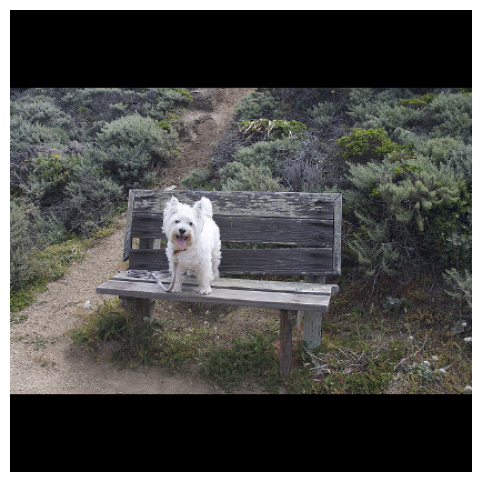

Epoch: 4


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=1.89]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:29<2:02:58, 13.49s/it, loss=1.76]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:36<1:35:22, 10.48s/it, loss=1.77]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:18:25,  8.63s/it, loss=1.79]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:49<1:12:53,  8.04s/it, loss=1.79]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:57<1:12:35,  8.02s/it, loss=1.79]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:04<1:10:24,  7.80s/it, loss=1.79]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:11<1:08:52,  7.64s/it, loss=1.79]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:18<1:06:23,  7.38s/it, loss=1.78]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:25<1:05:44,  7.32s/it, loss=1.76]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:33<1:05:12,  7.27s/it, loss=1.76]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:39<1:03:15,  7.07s/it, loss=1.79]

batch_idx: 11


  2%|██▊                                                                                                                  | 13/549 [01:46<1:02:51,  7.04s/it, loss=1.8]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:53<1:01:36,  6.91s/it, loss=1.79]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:00<1:03:37,  7.15s/it, loss=1.79]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:08<1:03:59,  7.20s/it, loss=1.78]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:15<1:03:13,  7.13s/it, loss=1.78]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:22<1:04:41,  7.31s/it, loss=1.77]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:30<1:04:16,  7.28s/it, loss=1.78]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:37<1:04:02,  7.26s/it, loss=1.78]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:44<1:03:53,  7.26s/it, loss=1.78]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:51<1:03:49,  7.27s/it, loss=1.78]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:59<1:03:31,  7.25s/it, loss=1.77]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:05<1:01:26,  7.02s/it, loss=1.77]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:12<1:02:02,  7.10s/it, loss=1.77]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:20<1:02:28,  7.17s/it, loss=1.77]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:27<1:01:26,  7.06s/it, loss=1.76]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:34<1:02:11,  7.16s/it, loss=1.76]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:41<1:01:21,  7.08s/it, loss=1.76]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:48<1:01:08,  7.07s/it, loss=1.76]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:55<1:02:25,  7.23s/it, loss=1.76]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:02<1:00:56,  7.07s/it, loss=1.76]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:10<1:01:27,  7.15s/it, loss=1.76]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:16<1:00:47,  7.08s/it, loss=1.76]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:23<1:00:01,  7.01s/it, loss=1.76]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:31<1:00:28,  7.07s/it, loss=1.76]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:37<1:00:03,  7.04s/it, loss=1.76]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:44<58:15,  6.84s/it, loss=1.76]

batch_idx: 37


  7%|████████▍                                                                                                             | 39/549 [04:50<57:37,  6.78s/it, loss=1.76]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:57<57:55,  6.83s/it, loss=1.76]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [05:04<57:06,  6.74s/it, loss=1.76]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:12<1:00:14,  7.13s/it, loss=1.76]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:20<1:01:18,  7.27s/it, loss=1.76]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:27<1:01:15,  7.28s/it, loss=1.76]

batch_idx: 43


  8%|█████████▋                                                                                                            | 45/549 [05:34<59:58,  7.14s/it, loss=1.76]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:41<1:00:18,  7.19s/it, loss=1.76]

batch_idx: 45


  9%|██████████                                                                                                            | 47/549 [05:48<59:55,  7.16s/it, loss=1.76]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:55<58:56,  7.06s/it, loss=1.76]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:02<58:28,  7.02s/it, loss=1.76]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:09<59:15,  7.12s/it, loss=1.76]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:16<59:15,  7.12s/it, loss=1.76]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:37<1:23:15, 10.05s/it, loss=1.75]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:44<1:14:51,  9.05s/it, loss=1.75]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:51<1:10:29,  8.54s/it, loss=1.76]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:59<1:07:01,  8.14s/it, loss=1.75]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:05<1:03:24,  7.72s/it, loss=1.75]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:13<1:02:19,  7.60s/it, loss=1.75]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:20<1:01:18,  7.49s/it, loss=1.75]

batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:27<1:00:04,  7.36s/it, loss=1.75]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:34<59:48,  7.34s/it, loss=1.75]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:41<57:39,  7.09s/it, loss=1.75]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:48<58:06,  7.16s/it, loss=1.75]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:55<58:05,  7.17s/it, loss=1.75]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:03<58:56,  7.29s/it, loss=1.75]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:09<57:25,  7.12s/it, loss=1.75]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:17<57:11,  7.10s/it, loss=1.75]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:24<58:20,  7.26s/it, loss=1.75]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:31<56:44,  7.08s/it, loss=1.75]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:38<56:25,  7.05s/it, loss=1.75]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:45<57:35,  7.21s/it, loss=1.75]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:52<57:08,  7.17s/it, loss=1.75]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [09:00<57:19,  7.21s/it, loss=1.75]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:07<56:29,  7.12s/it, loss=1.75]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:14<55:48,  7.05s/it, loss=1.75]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:21<55:24,  7.01s/it, loss=1.75]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:28<55:42,  7.07s/it, loss=1.75]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:35<55:26,  7.05s/it, loss=1.75]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:42<55:38,  7.09s/it, loss=1.75]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:49<55:50,  7.13s/it, loss=1.74]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:57<56:18,  7.20s/it, loss=1.74]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:04<55:53,  7.16s/it, loss=1.74]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:11<56:33,  7.27s/it, loss=1.74]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:18<55:05,  7.09s/it, loss=1.74]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:25<55:48,  7.20s/it, loss=1.74]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:33<56:18,  7.28s/it, loss=1.74]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:39<54:41,  7.09s/it, loss=1.74]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:47<55:04,  7.15s/it, loss=1.74]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:54<55:01,  7.16s/it, loss=1.74]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [11:01<54:07,  7.06s/it, loss=1.74]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:07<52:36,  6.88s/it, loss=1.74]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:14<52:54,  6.93s/it, loss=1.74]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:21<53:20,  7.00s/it, loss=1.74]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:29<53:57,  7.10s/it, loss=1.74]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:36<54:00,  7.12s/it, loss=1.74]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:42<52:49,  6.98s/it, loss=1.74]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:49<51:47,  6.86s/it, loss=1.74]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:56<50:59,  6.77s/it, loss=1.74]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:03<51:40,  6.87s/it, loss=1.73]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:10<51:41,  6.89s/it, loss=1.73]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:17<51:59,  6.95s/it, loss=1.73]

batch_idx: 99


 18%|█████████████████████▎                                                                                               | 100/549 [12:24<51:59,  6.95s/it, loss=1.73]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:44<1:13:05,  9.81s/it, loss=1.73]

batch_idx: 101


 19%|█████████████████████▌                                                                                             | 103/549 [12:51<1:07:21,  9.06s/it, loss=1.73]

batch_idx: 102


 19%|█████████████████████▊                                                                                             | 104/549 [12:59<1:03:46,  8.60s/it, loss=1.73]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [13:06<59:35,  8.05s/it, loss=1.73]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:13<57:14,  7.75s/it, loss=1.73]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:20<54:58,  7.46s/it, loss=1.73]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:27<53:36,  7.29s/it, loss=1.73]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:34<53:50,  7.34s/it, loss=1.73]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:41<52:10,  7.13s/it, loss=1.73]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:48<52:28,  7.19s/it, loss=1.73]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:55<52:32,  7.21s/it, loss=1.73]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [14:02<52:29,  7.22s/it, loss=1.73]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:10<52:16,  7.21s/it, loss=1.73]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:17<51:42,  7.15s/it, loss=1.73]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:24<51:08,  7.09s/it, loss=1.73]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:30<50:24,  7.00s/it, loss=1.73]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:37<49:36,  6.91s/it, loss=1.73]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:45<50:38,  7.07s/it, loss=1.73]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:52<51:30,  7.20s/it, loss=1.73]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:59<51:44,  7.25s/it, loss=1.73]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:06<51:06,  7.18s/it, loss=1.73]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:14<51:37,  7.27s/it, loss=1.73]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:21<50:33,  7.14s/it, loss=1.72]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:28<50:34,  7.16s/it, loss=1.73]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:34<49:00,  6.95s/it, loss=1.72]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:41<49:04,  6.98s/it, loss=1.72]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:48<48:16,  6.88s/it, loss=1.72]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:55<49:09,  7.02s/it, loss=1.72]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [16:03<49:41,  7.12s/it, loss=1.72]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:10<50:22,  7.23s/it, loss=1.72]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:17<49:55,  7.18s/it, loss=1.72]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:25<50:28,  7.28s/it, loss=1.72]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:32<49:39,  7.18s/it, loss=1.72]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:38<47:48,  6.93s/it, loss=1.72]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:46<48:36,  7.06s/it, loss=1.72]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:53<49:02,  7.14s/it, loss=1.72]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [17:00<49:13,  7.19s/it, loss=1.72]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:08<49:42,  7.27s/it, loss=1.71]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:15<49:21,  7.24s/it, loss=1.72]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:22<49:32,  7.28s/it, loss=1.72]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:29<48:45,  7.19s/it, loss=1.72]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:36<48:30,  7.17s/it, loss=1.72]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:43<48:17,  7.15s/it, loss=1.72]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:51<48:30,  7.20s/it, loss=1.72]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:58<47:48,  7.12s/it, loss=1.72]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [18:05<48:09,  7.19s/it, loss=1.72]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:12<47:21,  7.09s/it, loss=1.72]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:19<46:37,  6.99s/it, loss=1.72]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:25<46:08,  6.94s/it, loss=1.72]

batch_idx: 149


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:32<46:08,  6.94s/it, loss=1.72]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [18:54<1:06:48, 10.10s/it, loss=1.71]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [19:02<1:01:41,  9.35s/it, loss=1.71]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:09<57:13,  8.69s/it, loss=1.71]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:16<53:38,  8.17s/it, loss=1.71]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:23<52:12,  7.97s/it, loss=1.71]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:30<49:55,  7.64s/it, loss=1.71]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:37<47:22,  7.27s/it, loss=1.71]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:44<46:39,  7.18s/it, loss=1.71]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:51<46:06,  7.11s/it, loss=1.71]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:58<46:35,  7.21s/it, loss=1.71]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [20:05<45:42,  7.09s/it, loss=1.71]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:11<43:36,  6.78s/it, loss=1.71]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:18<44:39,  6.96s/it, loss=1.71]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:26<46:15,  7.23s/it, loss=1.71]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:33<45:04,  7.06s/it, loss=1.71]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:40<45:17,  7.11s/it, loss=1.71]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:48<46:12,  7.28s/it, loss=1.71]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:55<45:59,  7.26s/it, loss=1.71]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [21:01<44:09,  6.99s/it, loss=1.71]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [21:08<44:07,  7.00s/it, loss=1.71]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:16<44:47,  7.13s/it, loss=1.71]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:22<43:43,  6.98s/it, loss=1.71]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:29<43:20,  6.94s/it, loss=1.71]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:37<44:03,  7.07s/it, loss=1.71]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:44<43:57,  7.07s/it, loss=1.71]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:51<44:52,  7.24s/it, loss=1.71]

batch_idx: 176


 32%|██████████████████████████████████████▎                                                                               | 178/549 [21:59<45:09,  7.30s/it, loss=1.7]

batch_idx: 177


 33%|██████████████████████████████████████▍                                                                               | 179/549 [22:06<44:42,  7.25s/it, loss=1.7]

batch_idx: 178


 33%|██████████████████████████████████████▋                                                                               | 180/549 [22:13<43:48,  7.12s/it, loss=1.7]

batch_idx: 179


 33%|██████████████████████████████████████▉                                                                               | 181/549 [22:20<43:34,  7.11s/it, loss=1.7]

batch_idx: 180


 33%|███████████████████████████████████████                                                                               | 182/549 [22:27<43:48,  7.16s/it, loss=1.7]

batch_idx: 181


 33%|███████████████████████████████████████▎                                                                              | 183/549 [22:34<43:34,  7.14s/it, loss=1.7]

batch_idx: 182


 34%|███████████████████████████████████████▌                                                                              | 184/549 [22:42<44:04,  7.25s/it, loss=1.7]

batch_idx: 183


 34%|███████████████████████████████████████▊                                                                              | 185/549 [22:48<42:58,  7.08s/it, loss=1.7]

batch_idx: 184


 34%|███████████████████████████████████████▉                                                                              | 186/549 [22:56<43:22,  7.17s/it, loss=1.7]

batch_idx: 185


 34%|████████████████████████████████████████▏                                                                             | 187/549 [23:03<43:25,  7.20s/it, loss=1.7]

batch_idx: 186


 34%|████████████████████████████████████████▍                                                                             | 188/549 [23:10<43:42,  7.26s/it, loss=1.7]

batch_idx: 187


 34%|████████████████████████████████████████▌                                                                             | 189/549 [23:17<42:35,  7.10s/it, loss=1.7]

batch_idx: 188


 35%|████████████████████████████████████████▊                                                                             | 190/549 [23:25<43:03,  7.20s/it, loss=1.7]

batch_idx: 189


 35%|█████████████████████████████████████████                                                                             | 191/549 [23:31<42:16,  7.09s/it, loss=1.7]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:39<42:29,  7.14s/it, loss=1.71]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:46<42:31,  7.17s/it, loss=1.71]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:53<42:54,  7.25s/it, loss=1.71]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [24:00<42:16,  7.16s/it, loss=1.71]

batch_idx: 194


 36%|██████████████████████████████████████████▏                                                                           | 196/549 [24:08<43:08,  7.33s/it, loss=1.7]

batch_idx: 195


 36%|██████████████████████████████████████████▎                                                                           | 197/549 [24:15<42:16,  7.21s/it, loss=1.7]

batch_idx: 196


 36%|██████████████████████████████████████████▌                                                                           | 198/549 [24:22<41:58,  7.17s/it, loss=1.7]

batch_idx: 197


 36%|██████████████████████████████████████████▊                                                                           | 199/549 [24:29<40:53,  7.01s/it, loss=1.7]

batch_idx: 198


 36%|██████████████████████████████████████████▉                                                                           | 200/549 [24:35<40:22,  6.94s/it, loss=1.7]

batch_idx: 199


 36%|██████████████████████████████████████████▉                                                                           | 200/549 [24:43<40:22,  6.94s/it, loss=1.7]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████▍                                                                          | 202/549 [25:04<57:45,  9.99s/it, loss=1.7]

batch_idx: 201


 37%|███████████████████████████████████████████▋                                                                          | 203/549 [25:11<51:50,  8.99s/it, loss=1.7]

batch_idx: 202


 37%|███████████████████████████████████████████▊                                                                          | 204/549 [25:18<48:20,  8.41s/it, loss=1.7]

batch_idx: 203


 37%|████████████████████████████████████████████                                                                          | 205/549 [25:24<45:25,  7.92s/it, loss=1.7]

batch_idx: 204
batch_idx: 205


 38%|████████████████████████████████████████████▍                                                                         | 207/549 [25:39<44:10,  7.75s/it, loss=1.7]

batch_idx: 206


 38%|████████████████████████████████████████████▋                                                                         | 208/549 [25:46<42:47,  7.53s/it, loss=1.7]

batch_idx: 207


 38%|████████████████████████████████████████████▉                                                                         | 209/549 [25:54<42:29,  7.50s/it, loss=1.7]

batch_idx: 208
batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [26:09<42:04,  7.47s/it, loss=1.69]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:16<41:09,  7.33s/it, loss=1.69]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:23<41:33,  7.42s/it, loss=1.69]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:30<40:17,  7.22s/it, loss=1.69]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:37<40:33,  7.29s/it, loss=1.69]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:45<40:29,  7.29s/it, loss=1.69]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:51<39:00,  7.05s/it, loss=1.69]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:58<38:27,  6.97s/it, loss=1.69]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [27:06<39:23,  7.16s/it, loss=1.69]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:12<38:39,  7.05s/it, loss=1.69]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:19<38:30,  7.04s/it, loss=1.69]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:26<38:17,  7.03s/it, loss=1.69]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:34<39:40,  7.30s/it, loss=1.69]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:41<38:14,  7.06s/it, loss=1.69]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:47<37:14,  6.90s/it, loss=1.69]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:54<37:16,  6.92s/it, loss=1.69]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [28:02<37:40,  7.02s/it, loss=1.69]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [28:08<37:05,  6.93s/it, loss=1.69]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:15<37:11,  6.97s/it, loss=1.69]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:23<37:44,  7.10s/it, loss=1.69]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:30<37:17,  7.04s/it, loss=1.69]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:36<36:43,  6.95s/it, loss=1.69]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:43<36:10,  6.87s/it, loss=1.69]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:50<36:29,  6.95s/it, loss=1.69]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:58<37:36,  7.19s/it, loss=1.69]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [29:05<37:50,  7.25s/it, loss=1.69]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:12<37:18,  7.17s/it, loss=1.69]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:20<37:12,  7.18s/it, loss=1.69]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:27<37:11,  7.20s/it, loss=1.69]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:34<37:09,  7.22s/it, loss=1.69]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:41<36:48,  7.17s/it, loss=1.69]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:48<36:16,  7.09s/it, loss=1.69]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:55<36:17,  7.12s/it, loss=1.69]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [30:02<35:35,  7.00s/it, loss=1.68]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:09<34:52,  6.88s/it, loss=1.68]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:15<34:36,  6.85s/it, loss=1.68]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:22<34:40,  6.89s/it, loss=1.68]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:29<34:51,  6.95s/it, loss=1.68]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:37<35:18,  7.06s/it, loss=1.68]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:44<35:24,  7.10s/it, loss=1.68]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:51<35:24,  7.10s/it, loss=1.68]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [31:12<49:47, 10.06s/it, loss=1.68]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:19<45:22,  9.20s/it, loss=1.68]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:27<42:16,  8.60s/it, loss=1.68]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:34<40:02,  8.17s/it, loss=1.68]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:41<38:16,  7.84s/it, loss=1.68]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:48<37:57,  7.80s/it, loss=1.68]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:56<36:42,  7.57s/it, loss=1.68]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [32:02<35:43,  7.39s/it, loss=1.68]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [32:09<34:40,  7.20s/it, loss=1.68]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:17<35:06,  7.31s/it, loss=1.68]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:24<34:46,  7.27s/it, loss=1.68]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:31<34:24,  7.22s/it, loss=1.68]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:39<34:38,  7.29s/it, loss=1.68]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:45<33:47,  7.14s/it, loss=1.68]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:52<33:23,  7.08s/it, loss=1.68]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [33:00<34:04,  7.25s/it, loss=1.68]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [33:07<33:49,  7.22s/it, loss=1.67]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [33:14<33:32,  7.19s/it, loss=1.68]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:21<32:38,  7.02s/it, loss=1.68]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:28<32:53,  7.10s/it, loss=1.67]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:35<32:10,  6.97s/it, loss=1.67]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:42<32:33,  7.08s/it, loss=1.67]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:49<31:36,  6.90s/it, loss=1.67]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:56<31:55,  6.99s/it, loss=1.67]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [34:03<32:04,  7.05s/it, loss=1.67]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [34:10<31:51,  7.03s/it, loss=1.67]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:17<31:55,  7.07s/it, loss=1.67]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:25<32:50,  7.30s/it, loss=1.67]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:31<31:33,  7.04s/it, loss=1.67]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:39<31:36,  7.08s/it, loss=1.67]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:45<31:02,  6.98s/it, loss=1.67]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:52<30:05,  6.79s/it, loss=1.67]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:58<29:40,  6.72s/it, loss=1.67]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [35:06<30:32,  6.94s/it, loss=1.67]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:13<30:39,  6.99s/it, loss=1.67]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:20<30:42,  7.03s/it, loss=1.67]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:27<30:34,  7.03s/it, loss=1.67]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:34<30:48,  7.11s/it, loss=1.67]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:41<30:37,  7.09s/it, loss=1.67]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:49<30:51,  7.18s/it, loss=1.67]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:56<31:00,  7.24s/it, loss=1.67]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [36:03<30:54,  7.24s/it, loss=1.67]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [36:10<30:25,  7.16s/it, loss=1.67]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:17<29:50,  7.05s/it, loss=1.67]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:24<29:49,  7.07s/it, loss=1.67]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:32<30:02,  7.15s/it, loss=1.67]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:38<29:42,  7.10s/it, loss=1.67]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:46<29:37,  7.11s/it, loss=1.66]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:53<30:05,  7.25s/it, loss=1.66]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [37:00<30:05,  7.25s/it, loss=1.66]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [37:20<40:40,  9.88s/it, loss=1.66]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:28<37:34,  9.17s/it, loss=1.66]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:35<34:29,  8.45s/it, loss=1.66]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:42<32:41,  8.04s/it, loss=1.66]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:49<31:46,  7.85s/it, loss=1.66]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:56<30:34,  7.58s/it, loss=1.66]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [38:03<29:23,  7.32s/it, loss=1.66]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [38:10<28:57,  7.24s/it, loss=1.66]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:17<28:30,  7.15s/it, loss=1.66]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:24<28:29,  7.18s/it, loss=1.66]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:31<27:53,  7.06s/it, loss=1.66]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:37<27:16,  6.93s/it, loss=1.66]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:45<27:47,  7.10s/it, loss=1.66]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:52<28:06,  7.21s/it, loss=1.66]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:59<27:58,  7.21s/it, loss=1.66]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [39:07<27:45,  7.18s/it, loss=1.66]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [39:14<27:55,  7.25s/it, loss=1.66]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [39:21<27:51,  7.27s/it, loss=1.66]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:28<27:22,  7.17s/it, loss=1.66]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:35<26:45,  7.04s/it, loss=1.66]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:42<26:49,  7.09s/it, loss=1.66]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:50<27:00,  7.17s/it, loss=1.66]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:57<27:03,  7.22s/it, loss=1.66]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [40:04<26:30,  7.10s/it, loss=1.66]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [40:11<26:56,  7.25s/it, loss=1.65]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:18<26:15,  7.10s/it, loss=1.65]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:25<26:03,  7.07s/it, loss=1.65]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:32<25:48,  7.04s/it, loss=1.65]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:39<25:39,  7.03s/it, loss=1.65]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:46<25:37,  7.05s/it, loss=1.65]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:53<25:15,  6.99s/it, loss=1.65]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:59<24:24,  6.78s/it, loss=1.65]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [41:07<24:57,  6.97s/it, loss=1.65]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:14<24:42,  6.93s/it, loss=1.65]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:21<25:11,  7.10s/it, loss=1.65]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:28<25:10,  7.13s/it, loss=1.65]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:35<24:33,  6.98s/it, loss=1.65]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:42<24:49,  7.09s/it, loss=1.65]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:49<24:32,  7.05s/it, loss=1.65]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:56<24:26,  7.05s/it, loss=1.65]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [42:03<24:15,  7.03s/it, loss=1.65]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:10<24:03,  7.01s/it, loss=1.65]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:18<24:20,  7.12s/it, loss=1.65]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:25<24:13,  7.12s/it, loss=1.65]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:31<23:37,  6.98s/it, loss=1.65]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:39<23:57,  7.12s/it, loss=1.65]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:46<23:56,  7.15s/it, loss=1.65]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:53<23:29,  7.05s/it, loss=1.65]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:00<23:32,  7.10s/it, loss=1.65]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:07<23:32,  7.10s/it, loss=1.65]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:36<38:28, 11.72s/it, loss=1.65]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:43<33:39, 10.30s/it, loss=1.65]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:50<30:06,  9.27s/it, loss=1.64]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:57<27:39,  8.55s/it, loss=1.64]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [44:05<26:30,  8.24s/it, loss=1.64]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [44:12<25:31,  7.98s/it, loss=1.64]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [44:19<24:34,  7.72s/it, loss=1.64]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:26<23:50,  7.53s/it, loss=1.64]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [44:33<23:20,  7.41s/it, loss=1.64]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:41<23:07,  7.38s/it, loss=1.64]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:48<23:04,  7.40s/it, loss=1.64]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:55<22:47,  7.35s/it, loss=1.64]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [45:03<23:06,  7.50s/it, loss=1.64]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [45:11<22:51,  7.46s/it, loss=1.64]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [45:17<22:16,  7.31s/it, loss=1.64]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [45:24<21:31,  7.10s/it, loss=1.64]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:30<20:41,  6.86s/it, loss=1.64]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:38<20:49,  6.94s/it, loss=1.64]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:44<20:25,  6.85s/it, loss=1.64]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:51<20:12,  6.81s/it, loss=1.64]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:58<19:59,  6.78s/it, loss=1.64]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [46:04<19:51,  6.77s/it, loss=1.64]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [46:11<19:47,  6.78s/it, loss=1.64]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [46:17<19:10,  6.61s/it, loss=1.64]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:25<19:31,  6.77s/it, loss=1.64]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:31<19:35,  6.83s/it, loss=1.64]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:38<19:26,  6.82s/it, loss=1.64]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:45<19:35,  6.91s/it, loss=1.64]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:52<19:33,  6.94s/it, loss=1.64]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [47:00<19:45,  7.06s/it, loss=1.64]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [47:07<19:27,  6.99s/it, loss=1.64]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [47:14<19:27,  7.04s/it, loss=1.64]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:21<19:25,  7.06s/it, loss=1.64]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:28<19:00,  6.95s/it, loss=1.63]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:34<18:29,  6.81s/it, loss=1.63]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:41<18:35,  6.88s/it, loss=1.63]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:48<18:42,  6.97s/it, loss=1.63]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:55<18:10,  6.82s/it, loss=1.63]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [48:02<18:22,  6.93s/it, loss=1.63]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [48:09<18:16,  6.94s/it, loss=1.63]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:16<18:18,  7.00s/it, loss=1.63]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:23<18:30,  7.12s/it, loss=1.63]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:31<18:43,  7.25s/it, loss=1.63]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:37<18:02,  7.03s/it, loss=1.63]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:45<17:58,  7.05s/it, loss=1.63]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:51<17:23,  6.87s/it, loss=1.63]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:58<17:20,  6.89s/it, loss=1.63]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [49:05<17:21,  6.94s/it, loss=1.63]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:13<17:39,  7.11s/it, loss=1.63]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:19<17:39,  7.11s/it, loss=1.63]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:40<24:04,  9.82s/it, loss=1.63]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:47<21:46,  8.95s/it, loss=1.63]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:54<20:17,  8.40s/it, loss=1.63]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [50:02<19:47,  8.25s/it, loss=1.63]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [50:09<18:41,  7.85s/it, loss=1.63]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [50:16<18:01,  7.62s/it, loss=1.63]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [50:23<17:46,  7.56s/it, loss=1.63]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:30<17:13,  7.38s/it, loss=1.62]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:37<16:44,  7.23s/it, loss=1.62]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:44<16:36,  7.22s/it, loss=1.62]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:50<15:49,  6.93s/it, loss=1.62]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:57<15:26,  6.81s/it, loss=1.62]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [51:04<15:20,  6.82s/it, loss=1.62]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [51:11<15:28,  6.93s/it, loss=1.62]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [51:18<15:43,  7.10s/it, loss=1.62]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:26<15:39,  7.12s/it, loss=1.62]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:32<15:22,  7.04s/it, loss=1.62]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:39<14:47,  6.83s/it, loss=1.62]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:46<15:09,  7.05s/it, loss=1.62]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:54<15:13,  7.14s/it, loss=1.62]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [52:01<14:58,  7.07s/it, loss=1.62]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [52:08<15:01,  7.15s/it, loss=1.62]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [52:15<14:42,  7.06s/it, loss=1.62]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [52:22<14:52,  7.20s/it, loss=1.62]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:29<14:31,  7.09s/it, loss=1.62]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:36<14:31,  7.14s/it, loss=1.62]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:43<14:02,  6.96s/it, loss=1.62]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:50<14:02,  7.02s/it, loss=1.62]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:57<13:58,  7.05s/it, loss=1.62]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [53:05<14:00,  7.12s/it, loss=1.62]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [53:12<13:54,  7.14s/it, loss=1.62]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [53:19<13:44,  7.11s/it, loss=1.62]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:26<13:35,  7.09s/it, loss=1.62]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:33<13:22,  7.04s/it, loss=1.62]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:40<13:21,  7.09s/it, loss=1.62]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:47<13:30,  7.23s/it, loss=1.62]

batch_idx: 436
batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [54:01<12:50,  7.00s/it, loss=1.62]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [54:08<12:50,  7.07s/it, loss=1.62]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [54:16<12:49,  7.13s/it, loss=1.62]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [54:22<12:13,  6.86s/it, loss=1.62]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:29<12:22,  7.00s/it, loss=1.62]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:36<12:23,  7.08s/it, loss=1.62]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:44<12:26,  7.18s/it, loss=1.62]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:51<12:31,  7.30s/it, loss=1.62]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:59<12:22,  7.28s/it, loss=1.61]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [55:06<12:13,  7.26s/it, loss=1.61]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [55:13<12:05,  7.25s/it, loss=1.61]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:21<12:12,  7.39s/it, loss=1.61]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [55:28<12:12,  7.39s/it, loss=1.61]

batch_idx: 450
==> Saving checkpoint


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 452/549 [55:49<16:22, 10.12s/it, loss=1.61]

batch_idx: 451


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 453/549 [55:56<14:40,  9.17s/it, loss=1.61]

batch_idx: 452


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 454/549 [56:03<13:41,  8.65s/it, loss=1.61]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [56:10<12:36,  8.05s/it, loss=1.61]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [56:17<11:55,  7.69s/it, loss=1.61]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [56:23<11:21,  7.40s/it, loss=1.61]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [56:30<11:00,  7.26s/it, loss=1.61]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [56:37<10:47,  7.19s/it, loss=1.61]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [56:45<10:44,  7.24s/it, loss=1.61]

batch_idx: 459


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 461/549 [56:52<10:26,  7.12s/it, loss=1.61]

batch_idx: 460


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 462/549 [56:59<10:28,  7.23s/it, loss=1.61]

batch_idx: 461


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 463/549 [57:06<10:09,  7.09s/it, loss=1.61]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 464/549 [57:12<09:45,  6.88s/it, loss=1.61]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                  | 465/549 [57:20<09:56,  7.10s/it, loss=1.61]

batch_idx: 464


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 466/549 [57:27<09:42,  7.02s/it, loss=1.61]

batch_idx: 465


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 467/549 [57:34<09:33,  6.99s/it, loss=1.61]

batch_idx: 466


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 468/549 [57:40<09:20,  6.92s/it, loss=1.61]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 469/549 [57:47<09:14,  6.93s/it, loss=1.61]

batch_idx: 468


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 470/549 [57:54<09:12,  6.99s/it, loss=1.61]

batch_idx: 469


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 471/549 [58:01<09:06,  7.00s/it, loss=1.61]

batch_idx: 470


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 472/549 [58:08<08:56,  6.96s/it, loss=1.61]

batch_idx: 471


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 473/549 [58:16<08:56,  7.06s/it, loss=1.61]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 474/549 [58:23<08:49,  7.07s/it, loss=1.61]

batch_idx: 473


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 475/549 [58:30<08:47,  7.13s/it, loss=1.61]

batch_idx: 474


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 476/549 [58:37<08:31,  7.00s/it, loss=1.61]

batch_idx: 475


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 477/549 [58:44<08:29,  7.07s/it, loss=1.61]

batch_idx: 476


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 478/549 [58:51<08:24,  7.11s/it, loss=1.61]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████               | 479/549 [58:58<08:22,  7.17s/it, loss=1.61]

batch_idx: 478


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 480/549 [59:05<08:11,  7.13s/it, loss=1.61]

batch_idx: 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 481/549 [59:13<08:04,  7.13s/it, loss=1.61]

batch_idx: 480


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 482/549 [59:19<07:53,  7.07s/it, loss=1.6]

batch_idx: 481


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 483/549 [59:26<07:45,  7.05s/it, loss=1.6]

batch_idx: 482


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████              | 484/549 [59:34<07:46,  7.18s/it, loss=1.6]

batch_idx: 483


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 485/549 [59:41<07:43,  7.23s/it, loss=1.6]

batch_idx: 484


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 486/549 [59:49<07:36,  7.25s/it, loss=1.6]

batch_idx: 485


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 487/549 [59:55<07:18,  7.07s/it, loss=1.6]

batch_idx: 486


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [1:00:02<07:11,  7.08s/it, loss=1.6]

batch_idx: 487


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 489/549 [1:00:09<07:05,  7.09s/it, loss=1.6]

batch_idx: 488


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 490/549 [1:00:17<07:02,  7.17s/it, loss=1.6]

batch_idx: 489


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 491/549 [1:00:24<06:49,  7.06s/it, loss=1.6]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 492/549 [1:00:30<06:35,  6.94s/it, loss=1.6]

batch_idx: 491


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 493/549 [1:00:37<06:24,  6.86s/it, loss=1.6]

batch_idx: 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:44<06:17,  6.87s/it, loss=1.6]

batch_idx: 493


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 495/549 [1:00:51<06:10,  6.86s/it, loss=1.6]

batch_idx: 494


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 496/549 [1:00:58<06:12,  7.03s/it, loss=1.6]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:01:05<06:05,  7.02s/it, loss=1.6]

batch_idx: 496


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 498/549 [1:01:12<05:59,  7.05s/it, loss=1.6]

batch_idx: 497


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 499/549 [1:01:20<05:57,  7.15s/it, loss=1.6]

batch_idx: 498


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:26<05:46,  7.07s/it, loss=1.6]

batch_idx: 499


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:34<05:46,  7.07s/it, loss=1.6]

batch_idx: 500
==> Saving checkpoint


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 502/549 [1:01:59<08:36, 10.99s/it, loss=1.6]

batch_idx: 501


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:02:06<07:27,  9.72s/it, loss=1.6]

batch_idx: 502


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 504/549 [1:02:13<06:39,  8.87s/it, loss=1.6]

batch_idx: 503


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 505/549 [1:02:20<06:07,  8.36s/it, loss=1.6]

batch_idx: 504


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:02:27<05:40,  7.92s/it, loss=1.6]

batch_idx: 505


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:34<05:25,  7.76s/it, loss=1.6]

batch_idx: 506


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 508/549 [1:02:41<05:06,  7.49s/it, loss=1.6]

batch_idx: 507


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:48<04:53,  7.33s/it, loss=1.6]

batch_idx: 508


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:55<04:43,  7.27s/it, loss=1.6]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 511/549 [1:03:02<04:31,  7.13s/it, loss=1.6]

batch_idx: 510


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:03:09<04:22,  7.10s/it, loss=1.6]

batch_idx: 511


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:16<04:15,  7.11s/it, loss=1.6]

batch_idx: 512


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 514/549 [1:03:23<04:06,  7.04s/it, loss=1.6]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:30<03:56,  6.97s/it, loss=1.59]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:37<03:50,  6.98s/it, loss=1.59]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:44<03:48,  7.14s/it, loss=1.59]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:51<03:38,  7.06s/it, loss=1.59]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:58<03:31,  7.05s/it, loss=1.59]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:04:06<03:25,  7.10s/it, loss=1.59]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:12<03:14,  6.94s/it, loss=1.59]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:04:19<03:02,  6.76s/it, loss=1.59]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:26<03:01,  6.97s/it, loss=1.59]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:33<02:56,  7.05s/it, loss=1.59]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:40<02:49,  7.04s/it, loss=1.59]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:48<02:45,  7.18s/it, loss=1.59]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:54<02:35,  7.05s/it, loss=1.59]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:05:02<02:28,  7.08s/it, loss=1.59]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:05:09<02:20,  7.03s/it, loss=1.59]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:15<02:12,  6.99s/it, loss=1.59]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:05:23<02:07,  7.10s/it, loss=1.59]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:30<02:03,  7.27s/it, loss=1.59]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:37<01:54,  7.15s/it, loss=1.59]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:44<01:45,  7.03s/it, loss=1.59]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:51<01:38,  7.06s/it, loss=1.59]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:58<01:31,  7.02s/it, loss=1.59]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:06:05<01:22,  6.87s/it, loss=1.59]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:12<01:16,  6.96s/it, loss=1.59]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:18<01:08,  6.85s/it, loss=1.59]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:06:26<01:02,  6.99s/it, loss=1.59]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:33<00:55,  6.99s/it, loss=1.59]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:40<00:49,  7.04s/it, loss=1.59]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:46<00:40,  6.80s/it, loss=1.59]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:53<00:34,  6.93s/it, loss=1.59]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:07:00<00:27,  6.97s/it, loss=1.59]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:07:07<00:20,  6.90s/it, loss=1.59]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:15<00:14,  7.14s/it, loss=1.58]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:22<00:07,  7.09s/it, loss=1.58]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:23<00:00,  7.36s/it, loss=1.58]

batch_idx: 548
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


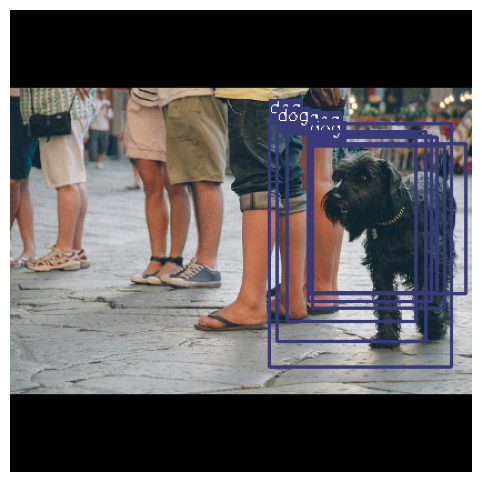

Epoch: 5


  0%|                                                                                                                               | 0/549 [00:06<?, ?it/s, loss=1.36]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:57:24, 12.88s/it, loss=1.38]

batch_idx: 1


  1%|▋                                                                                                                     | 3/549 [00:35<1:33:52, 10.32s/it, loss=1.4]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:21:55,  9.02s/it, loss=1.43]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:48<1:13:17,  8.08s/it, loss=1.45]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:56<1:10:41,  7.81s/it, loss=1.42]

batch_idx: 5


  1%|█▌                                                                                                                    | 7/549 [01:02<1:07:21,  7.46s/it, loss=1.4]

batch_idx: 6


  1%|█▋                                                                                                                    | 8/549 [01:10<1:06:28,  7.37s/it, loss=1.4]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:17<1:05:15,  7.25s/it, loss=1.41]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:24<1:05:49,  7.33s/it, loss=1.41]

batch_idx: 9


  2%|██▎                                                                                                                  | 11/549 [01:32<1:06:00,  7.36s/it, loss=1.4]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:39<1:04:55,  7.25s/it, loss=1.39]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:45<1:03:39,  7.13s/it, loss=1.38]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:53<1:04:02,  7.18s/it, loss=1.39]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [01:59<1:02:40,  7.04s/it, loss=1.39]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:07<1:02:51,  7.08s/it, loss=1.39]

batch_idx: 15


  3%|███▌                                                                                                                 | 17/549 [02:14<1:02:50,  7.09s/it, loss=1.4]

batch_idx: 16


  3%|███▊                                                                                                                 | 18/549 [02:20<1:02:01,  7.01s/it, loss=1.4]

batch_idx: 17


  3%|████                                                                                                                | 19/549 [02:28<1:02:12,  7.04s/it, loss=1.39]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:35<1:02:26,  7.08s/it, loss=1.39]

batch_idx: 19


  4%|████▍                                                                                                                | 21/549 [02:42<1:01:56,  7.04s/it, loss=1.4]

batch_idx: 20


  4%|████▋                                                                                                                | 22/549 [02:49<1:02:16,  7.09s/it, loss=1.4]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:56<1:02:24,  7.12s/it, loss=1.41]

batch_idx: 22


  4%|█████                                                                                                                | 24/549 [03:03<1:00:58,  6.97s/it, loss=1.4]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:10<1:01:48,  7.08s/it, loss=1.41]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:17<1:00:52,  6.98s/it, loss=1.41]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:25<1:02:38,  7.20s/it, loss=1.42]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:31<1:00:50,  7.01s/it, loss=1.41]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:38<1:00:54,  7.03s/it, loss=1.41]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:45<1:00:22,  6.98s/it, loss=1.42]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:53<1:01:29,  7.12s/it, loss=1.42]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [04:00<1:01:54,  7.19s/it, loss=1.42]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:07<1:01:43,  7.18s/it, loss=1.42]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:14<1:00:59,  7.11s/it, loss=1.41]

batch_idx: 33
batch_idx: 34


  7%|███████▋                                                                                                              | 36/549 [04:27<57:23,  6.71s/it, loss=1.41]

batch_idx: 35


  7%|███████▉                                                                                                              | 37/549 [04:34<58:17,  6.83s/it, loss=1.41]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:40<57:17,  6.73s/it, loss=1.41]

batch_idx: 37


  7%|████████▍                                                                                                             | 39/549 [04:48<58:11,  6.85s/it, loss=1.41]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:55<59:29,  7.01s/it, loss=1.41]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [05:02<59:20,  7.01s/it, loss=1.41]

batch_idx: 40


  8%|█████████                                                                                                             | 42/549 [05:09<59:44,  7.07s/it, loss=1.41]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:17<1:01:00,  7.23s/it, loss=1.41]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:24<1:00:06,  7.14s/it, loss=1.41]

batch_idx: 43


  8%|█████████▊                                                                                                             | 45/549 [05:31<59:33,  7.09s/it, loss=1.4]

batch_idx: 44


  8%|█████████▉                                                                                                             | 46/549 [05:38<59:00,  7.04s/it, loss=1.4]

batch_idx: 45


  9%|██████████▏                                                                                                            | 47/549 [05:44<57:03,  6.82s/it, loss=1.4]

batch_idx: 46


  9%|██████████▍                                                                                                            | 48/549 [05:51<57:31,  6.89s/it, loss=1.4]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [05:58<58:35,  7.03s/it, loss=1.39]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:05<57:31,  6.92s/it, loss=1.39]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:12<57:31,  6.92s/it, loss=1.39]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:34<1:23:27, 10.07s/it, loss=1.39]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:41<1:15:53,  9.18s/it, loss=1.39]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:48<1:11:20,  8.65s/it, loss=1.38]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:55<1:07:27,  8.19s/it, loss=1.39]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:03<1:04:49,  7.89s/it, loss=1.39]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:10<1:03:15,  7.71s/it, loss=1.39]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:17<1:01:41,  7.54s/it, loss=1.39]

batch_idx: 57


 11%|████████████▍                                                                                                       | 59/549 [07:24<1:00:55,  7.46s/it, loss=1.39]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:31<59:42,  7.33s/it, loss=1.39]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:39<59:42,  7.34s/it, loss=1.39]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:46<58:53,  7.26s/it, loss=1.39]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:52<57:26,  7.09s/it, loss=1.39]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [07:59<56:15,  6.96s/it, loss=1.39]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:06<56:40,  7.02s/it, loss=1.39]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:13<56:52,  7.07s/it, loss=1.39]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:21<57:30,  7.16s/it, loss=1.39]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:28<58:27,  7.29s/it, loss=1.39]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:36<59:03,  7.38s/it, loss=1.39]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:43<57:50,  7.25s/it, loss=1.39]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:49<55:46,  7.00s/it, loss=1.39]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:57<56:49,  7.15s/it, loss=1.39]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:05<58:02,  7.32s/it, loss=1.39]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:12<58:45,  7.42s/it, loss=1.39]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:19<58:05,  7.35s/it, loss=1.39]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:26<56:17,  7.14s/it, loss=1.39]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:33<55:04,  7.00s/it, loss=1.39]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:40<54:58,  7.00s/it, loss=1.39]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:47<56:04,  7.16s/it, loss=1.39]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:55<56:16,  7.20s/it, loss=1.39]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:02<55:58,  7.18s/it, loss=1.39]

batch_idx: 80


 15%|█████████████████▌                                                                                                    | 82/549 [10:09<56:17,  7.23s/it, loss=1.39]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:17<57:01,  7.34s/it, loss=1.39]

batch_idx: 82


 15%|██████████████████                                                                                                    | 84/549 [10:24<56:13,  7.25s/it, loss=1.38]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:31<55:26,  7.17s/it, loss=1.38]

batch_idx: 84


 16%|██████████████████▉                                                                                                   | 88/549 [10:52<54:11,  7.05s/it, loss=1.38]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:59<54:44,  7.14s/it, loss=1.38]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:06<55:20,  7.23s/it, loss=1.38]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:14<55:46,  7.31s/it, loss=1.38]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:21<55:42,  7.31s/it, loss=1.38]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:28<55:13,  7.27s/it, loss=1.38]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:36<54:56,  7.24s/it, loss=1.38]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:43<54:53,  7.25s/it, loss=1.38]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:50<54:37,  7.24s/it, loss=1.38]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:57<52:57,  7.03s/it, loss=1.38]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:04<53:29,  7.12s/it, loss=1.38]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:11<52:57,  7.06s/it, loss=1.38]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:18<53:41,  7.18s/it, loss=1.38]

batch_idx: 99


 18%|█████████████████████▎                                                                                               | 100/549 [12:26<53:41,  7.18s/it, loss=1.38]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:43<1:08:54,  9.25s/it, loss=1.38]

batch_idx: 101


 19%|█████████████████████▌                                                                                             | 103/549 [12:50<1:04:01,  8.61s/it, loss=1.38]

batch_idx: 102


 19%|██████████████████████▏                                                                                              | 104/549 [12:57<59:43,  8.05s/it, loss=1.38]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [13:04<57:40,  7.79s/it, loss=1.37]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:11<55:38,  7.54s/it, loss=1.38]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:18<54:14,  7.36s/it, loss=1.37]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:25<53:17,  7.25s/it, loss=1.37]

batch_idx: 107


 20%|███████████████████████▏                                                                                             | 109/549 [13:32<52:39,  7.18s/it, loss=1.37]

batch_idx: 108


 20%|███████████████████████▍                                                                                             | 110/549 [13:39<52:35,  7.19s/it, loss=1.37]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:46<52:22,  7.17s/it, loss=1.37]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:53<52:11,  7.17s/it, loss=1.37]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [14:00<51:11,  7.04s/it, loss=1.37]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:07<50:47,  7.01s/it, loss=1.37]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:14<51:05,  7.06s/it, loss=1.37]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:21<50:42,  7.03s/it, loss=1.37]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:27<49:36,  6.89s/it, loss=1.37]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:35<49:44,  6.93s/it, loss=1.37]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:41<48:43,  6.80s/it, loss=1.37]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:49<50:30,  7.06s/it, loss=1.37]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:55<49:47,  6.98s/it, loss=1.37]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:02<49:40,  6.98s/it, loss=1.37]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:09<49:29,  6.97s/it, loss=1.37]

batch_idx: 122


 23%|███████████████████████████▍                                                                                         | 129/549 [15:53<51:07,  7.30s/it, loss=1.37]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [16:00<51:21,  7.35s/it, loss=1.37]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:07<51:22,  7.37s/it, loss=1.37]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:14<50:05,  7.21s/it, loss=1.37]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:22<50:32,  7.29s/it, loss=1.37]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:29<49:57,  7.22s/it, loss=1.37]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:36<49:52,  7.23s/it, loss=1.37]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:43<49:51,  7.24s/it, loss=1.37]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:50<49:13,  7.17s/it, loss=1.37]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:58<49:20,  7.20s/it, loss=1.37]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:05<49:52,  7.30s/it, loss=1.37]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:12<49:09,  7.21s/it, loss=1.37]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:19<48:55,  7.19s/it, loss=1.37]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:26<48:17,  7.12s/it, loss=1.37]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:34<48:49,  7.22s/it, loss=1.37]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:42<50:08,  7.43s/it, loss=1.37]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:49<50:18,  7.47s/it, loss=1.37]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:56<49:55,  7.43s/it, loss=1.37]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [18:04<49:53,  7.45s/it, loss=1.37]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:11<49:34,  7.42s/it, loss=1.37]

batch_idx: 147


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:33<50:07,  7.54s/it, loss=1.37]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [18:55<1:07:40, 10.23s/it, loss=1.37]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [19:01<1:00:14,  9.13s/it, loss=1.37]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:09<56:45,  8.62s/it, loss=1.37]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:16<54:20,  8.28s/it, loss=1.37]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:23<51:58,  7.94s/it, loss=1.37]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:30<49:24,  7.56s/it, loss=1.37]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:37<48:23,  7.42s/it, loss=1.37]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:44<47:29,  7.31s/it, loss=1.37]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:51<46:47,  7.22s/it, loss=1.37]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:58<46:05,  7.13s/it, loss=1.37]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [20:05<46:10,  7.16s/it, loss=1.37]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:12<46:09,  7.18s/it, loss=1.37]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:19<45:52,  7.15s/it, loss=1.37]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:26<45:12,  7.06s/it, loss=1.36]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:34<45:19,  7.10s/it, loss=1.36]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:40<44:36,  7.01s/it, loss=1.36]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:47<43:59,  6.93s/it, loss=1.36]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:55<45:02,  7.11s/it, loss=1.36]

batch_idx: 168


 31%|████████████████████████████████████▏                                                                                | 170/549 [21:01<43:42,  6.92s/it, loss=1.36]

batch_idx: 169


 31%|████████████████████████████████████▍                                                                                | 171/549 [21:09<44:36,  7.08s/it, loss=1.36]

batch_idx: 170


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:16<45:14,  7.20s/it, loss=1.36]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:23<44:28,  7.10s/it, loss=1.36]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:30<44:10,  7.07s/it, loss=1.36]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:37<44:25,  7.13s/it, loss=1.36]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:44<44:36,  7.18s/it, loss=1.36]

batch_idx: 175


 33%|██████████████████████████████████████▏                                                                              | 179/549 [22:06<44:33,  7.23s/it, loss=1.36]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [22:13<44:11,  7.19s/it, loss=1.36]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:20<43:50,  7.15s/it, loss=1.36]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:27<43:54,  7.18s/it, loss=1.36]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:34<42:44,  7.01s/it, loss=1.36]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:42<43:38,  7.17s/it, loss=1.36]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:49<44:01,  7.26s/it, loss=1.36]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:56<43:25,  7.18s/it, loss=1.36]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [23:03<42:59,  7.13s/it, loss=1.36]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [23:11<43:23,  7.21s/it, loss=1.36]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:18<43:38,  7.27s/it, loss=1.36]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:25<43:24,  7.26s/it, loss=1.36]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:33<43:34,  7.30s/it, loss=1.36]

batch_idx: 190


 35%|████████████████████████████████████████▉                                                                            | 192/549 [23:40<43:12,  7.26s/it, loss=1.36]

batch_idx: 191


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:47<42:53,  7.23s/it, loss=1.36]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:54<43:12,  7.30s/it, loss=1.36]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [24:01<41:36,  7.05s/it, loss=1.36]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [24:08<42:24,  7.21s/it, loss=1.36]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:16<42:34,  7.26s/it, loss=1.36]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:23<42:11,  7.21s/it, loss=1.36]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:30<41:16,  7.08s/it, loss=1.36]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:37<41:26,  7.12s/it, loss=1.36]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:44<41:26,  7.12s/it, loss=1.36]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [25:05<57:24,  9.93s/it, loss=1.36]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [25:12<52:07,  9.04s/it, loss=1.36]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:18<48:16,  8.39s/it, loss=1.36]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:26<46:00,  8.02s/it, loss=1.36]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:33<44:03,  7.71s/it, loss=1.36]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:40<42:49,  7.51s/it, loss=1.36]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:46<41:36,  7.32s/it, loss=1.36]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:54<42:00,  7.41s/it, loss=1.36]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [26:01<41:02,  7.26s/it, loss=1.36]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [26:08<40:44,  7.23s/it, loss=1.36]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:15<40:37,  7.23s/it, loss=1.36]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:22<39:42,  7.09s/it, loss=1.36]

batch_idx: 212


 39%|█████████████████████████████████████████████▌                                                                       | 214/549 [26:29<39:31,  7.08s/it, loss=1.36]

batch_idx: 213


 39%|█████████████████████████████████████████████▊                                                                       | 215/549 [26:36<39:32,  7.10s/it, loss=1.36]

batch_idx: 214


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:43<38:33,  6.95s/it, loss=1.36]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:50<38:23,  6.94s/it, loss=1.35]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:57<38:22,  6.96s/it, loss=1.35]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [27:04<38:38,  7.03s/it, loss=1.35]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:11<38:39,  7.05s/it, loss=1.35]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:18<38:48,  7.10s/it, loss=1.35]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:25<38:02,  6.98s/it, loss=1.35]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:32<37:09,  6.84s/it, loss=1.35]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:38<36:46,  6.79s/it, loss=1.35]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:45<36:49,  6.82s/it, loss=1.35]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:52<36:29,  6.78s/it, loss=1.35]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:59<36:35,  6.82s/it, loss=1.35]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [28:06<36:25,  6.81s/it, loss=1.35]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:13<37:27,  7.02s/it, loss=1.35]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:20<37:26,  7.04s/it, loss=1.35]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:27<37:25,  7.06s/it, loss=1.35]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:34<36:53,  6.98s/it, loss=1.35]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:41<36:56,  7.01s/it, loss=1.35]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:48<36:16,  6.91s/it, loss=1.35]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:54<35:26,  6.77s/it, loss=1.35]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [29:01<35:13,  6.75s/it, loss=1.35]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [29:08<35:32,  6.84s/it, loss=1.35]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:15<35:25,  6.83s/it, loss=1.35]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:22<35:39,  6.90s/it, loss=1.35]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:29<35:19,  6.86s/it, loss=1.35]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:36<35:20,  6.88s/it, loss=1.35]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:43<36:01,  7.04s/it, loss=1.35]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:50<35:46,  7.01s/it, loss=1.35]

batch_idx: 242


 44%|████████████████████████████████████████████████████                                                                 | 244/549 [29:57<35:04,  6.90s/it, loss=1.35]

batch_idx: 243


 45%|████████████████████████████████████████████████████▏                                                                | 245/549 [30:04<35:24,  6.99s/it, loss=1.35]

batch_idx: 244


 45%|████████████████████████████████████████████████████▍                                                                | 246/549 [30:11<34:56,  6.92s/it, loss=1.35]

batch_idx: 245


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:18<35:04,  6.97s/it, loss=1.35]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:24<34:32,  6.89s/it, loss=1.35]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:31<34:51,  6.97s/it, loss=1.35]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:39<35:01,  7.03s/it, loss=1.35]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:46<35:01,  7.03s/it, loss=1.35]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [31:06<48:53,  9.88s/it, loss=1.35]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:14<44:47,  9.08s/it, loss=1.35]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:20<41:07,  8.36s/it, loss=1.35]

batch_idx: 253


 46%|██████████████████████████████████████████████████████▎                                                              | 255/549 [31:27<39:00,  7.96s/it, loss=1.35]

batch_idx: 254


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:34<37:35,  7.70s/it, loss=1.35]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:42<36:58,  7.60s/it, loss=1.35]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:49<36:24,  7.51s/it, loss=1.35]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:56<35:51,  7.42s/it, loss=1.35]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [32:03<35:18,  7.33s/it, loss=1.35]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:10<34:28,  7.18s/it, loss=1.35]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:17<33:47,  7.06s/it, loss=1.35]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:24<33:18,  6.99s/it, loss=1.35]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:31<33:08,  6.98s/it, loss=1.35]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:37<32:04,  6.78s/it, loss=1.35]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:45<33:35,  7.12s/it, loss=1.35]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:52<33:16,  7.08s/it, loss=1.35]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [33:00<33:40,  7.19s/it, loss=1.35]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [33:07<33:29,  7.18s/it, loss=1.35]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:20<32:11,  6.95s/it, loss=1.34]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:27<31:44,  6.87s/it, loss=1.34]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:34<32:31,  7.07s/it, loss=1.34]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:41<32:00,  6.98s/it, loss=1.34]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:48<32:05,  7.03s/it, loss=1.34]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:56<32:43,  7.19s/it, loss=1.34]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [34:03<32:42,  7.22s/it, loss=1.34]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [34:10<32:16,  7.14s/it, loss=1.34]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:17<32:08,  7.14s/it, loss=1.34]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:25<32:08,  7.17s/it, loss=1.34]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:31<31:39,  7.09s/it, loss=1.34]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:39<31:26,  7.06s/it, loss=1.34]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:46<31:59,  7.22s/it, loss=1.34]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:53<30:58,  7.01s/it, loss=1.34]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [35:00<30:48,  7.00s/it, loss=1.34]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [35:07<30:43,  7.01s/it, loss=1.34]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:14<30:37,  7.01s/it, loss=1.34]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:21<30:25,  6.99s/it, loss=1.34]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:28<30:32,  7.05s/it, loss=1.34]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:35<30:50,  7.15s/it, loss=1.34]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:42<30:40,  7.14s/it, loss=1.34]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:50<30:42,  7.17s/it, loss=1.34]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:57<30:31,  7.16s/it, loss=1.34]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [36:03<29:45,  7.00s/it, loss=1.34]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [36:10<29:28,  6.96s/it, loss=1.34]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:17<29:03,  6.89s/it, loss=1.34]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:24<29:41,  7.07s/it, loss=1.34]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:32<29:48,  7.13s/it, loss=1.34]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:39<29:42,  7.13s/it, loss=1.34]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:46<29:32,  7.12s/it, loss=1.34]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:53<29:32,  7.12s/it, loss=1.34]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▏                                                    | 301/549 [37:07<47:16, 11.44s/it, loss=1.34]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:22<38:00,  9.27s/it, loss=1.34]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:29<35:26,  8.68s/it, loss=1.34]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:36<33:06,  8.14s/it, loss=1.34]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:43<31:52,  7.87s/it, loss=1.34]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:50<30:55,  7.67s/it, loss=1.33]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:57<29:53,  7.44s/it, loss=1.33]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [38:03<28:04,  7.02s/it, loss=1.33]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [38:10<27:54,  7.01s/it, loss=1.33]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [38:17<28:00,  7.06s/it, loss=1.33]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:25<27:56,  7.08s/it, loss=1.33]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 313/549 [38:32<28:03,  7.13s/it, loss=1.33]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 314/549 [38:39<28:13,  7.20s/it, loss=1.33]

batch_idx: 313


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:47<28:43,  7.37s/it, loss=1.33]

batch_idx: 314


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [39:21<26:30,  6.95s/it, loss=1.33]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:29<26:55,  7.09s/it, loss=1.33]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████▌                                                | 322/549 [39:36<26:41,  7.05s/it, loss=1.33]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▊                                                | 323/549 [39:43<26:24,  7.01s/it, loss=1.33]

batch_idx: 322


 59%|█████████████████████████████████████████████████████████████████████                                                | 324/549 [39:50<26:29,  7.07s/it, loss=1.33]

batch_idx: 323


 59%|█████████████████████████████████████████████████████████████████████▎                                               | 325/549 [39:56<25:50,  6.92s/it, loss=1.33]

batch_idx: 324


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 326/549 [40:03<25:09,  6.77s/it, loss=1.33]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [40:10<25:34,  6.91s/it, loss=1.33]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [40:17<25:39,  6.96s/it, loss=1.33]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:24<25:21,  6.92s/it, loss=1.33]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:31<25:06,  6.88s/it, loss=1.33]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:38<25:19,  6.97s/it, loss=1.33]

batch_idx: 330
batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [41:00<25:48,  7.20s/it, loss=1.33]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [41:07<25:24,  7.13s/it, loss=1.33]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [41:14<25:36,  7.21s/it, loss=1.33]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [41:21<24:53,  7.04s/it, loss=1.33]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:28<25:16,  7.19s/it, loss=1.33]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:35<25:04,  7.16s/it, loss=1.33]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:43<24:51,  7.14s/it, loss=1.33]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:50<24:34,  7.09s/it, loss=1.33]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:57<24:32,  7.12s/it, loss=1.33]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [42:04<24:36,  7.17s/it, loss=1.33]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [42:11<24:36,  7.20s/it, loss=1.33]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [42:19<25:14,  7.42s/it, loss=1.33]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:26<24:25,  7.22s/it, loss=1.33]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:33<24:18,  7.22s/it, loss=1.33]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:41<24:19,  7.26s/it, loss=1.33]

batch_idx: 347


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 349/549 [42:47<23:51,  7.16s/it, loss=1.33]

batch_idx: 348


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:54<23:18,  7.03s/it, loss=1.33]

batch_idx: 349


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [43:01<23:18,  7.03s/it, loss=1.33]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [43:22<32:50, 10.00s/it, loss=1.33]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [43:30<30:25,  9.31s/it, loss=1.33]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:37<28:17,  8.70s/it, loss=1.33]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:44<26:26,  8.18s/it, loss=1.33]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:52<25:53,  8.05s/it, loss=1.33]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:59<25:06,  7.85s/it, loss=1.33]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [44:06<23:55,  7.52s/it, loss=1.33]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [44:13<23:10,  7.32s/it, loss=1.33]

batch_idx: 358


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:34<22:24,  7.19s/it, loss=1.33]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:41<22:20,  7.21s/it, loss=1.33]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:48<22:02,  7.15s/it, loss=1.33]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:55<21:38,  7.06s/it, loss=1.32]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [45:02<21:14,  6.97s/it, loss=1.32]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [45:08<20:40,  6.81s/it, loss=1.32]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [45:15<20:38,  6.84s/it, loss=1.32]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:23<20:52,  6.96s/it, loss=1.32]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:29<20:12,  6.77s/it, loss=1.32]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:36<20:25,  6.88s/it, loss=1.32]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:43<20:15,  6.87s/it, loss=1.32]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:49<19:51,  6.77s/it, loss=1.32]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:57<20:21,  6.98s/it, loss=1.32]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [46:04<20:13,  6.97s/it, loss=1.32]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [46:11<20:10,  7.00s/it, loss=1.32]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [46:18<20:11,  7.05s/it, loss=1.32]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [46:25<19:44,  6.93s/it, loss=1.32]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:32<19:45,  6.97s/it, loss=1.32]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:39<19:45,  7.02s/it, loss=1.32]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:46<19:42,  7.04s/it, loss=1.32]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:54<19:58,  7.18s/it, loss=1.32]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [47:00<19:07,  6.91s/it, loss=1.32]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [47:07<19:18,  7.02s/it, loss=1.32]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [47:14<19:05,  6.98s/it, loss=1.32]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [47:21<19:08,  7.05s/it, loss=1.32]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [47:28<18:50,  6.98s/it, loss=1.32]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:35<18:36,  6.94s/it, loss=1.32]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:41<18:12,  6.83s/it, loss=1.32]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:48<18:14,  6.89s/it, loss=1.32]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:55<18:00,  6.84s/it, loss=1.32]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [48:02<17:47,  6.80s/it, loss=1.32]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [48:09<18:00,  6.92s/it, loss=1.32]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [48:16<17:44,  6.87s/it, loss=1.32]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [48:23<17:33,  6.84s/it, loss=1.32]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▍                                | 396/549 [48:29<17:20,  6.80s/it, loss=1.32]

batch_idx: 395


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:36<17:04,  6.74s/it, loss=1.32]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:43<17:00,  6.76s/it, loss=1.32]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:50<17:13,  6.89s/it, loss=1.32]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:57<16:54,  6.81s/it, loss=1.32]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [49:03<16:54,  6.81s/it, loss=1.32]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [49:17<20:26,  8.34s/it, loss=1.32]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:24<19:13,  7.90s/it, loss=1.32]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:32<18:43,  7.74s/it, loss=1.32]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:38<17:56,  7.48s/it, loss=1.32]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:46<17:38,  7.40s/it, loss=1.32]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:52<17:08,  7.24s/it, loss=1.32]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:59<16:33,  7.05s/it, loss=1.31]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [50:06<16:21,  7.01s/it, loss=1.31]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [50:13<16:26,  7.10s/it, loss=1.31]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [50:21<16:27,  7.16s/it, loss=1.31]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:28<16:14,  7.11s/it, loss=1.31]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:35<16:06,  7.10s/it, loss=1.31]

batch_idx: 412


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 414/549 [50:41<15:37,  6.95s/it, loss=1.31]

batch_idx: 413


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                            | 415/549 [50:49<15:49,  7.09s/it, loss=1.31]

batch_idx: 414


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                            | 416/549 [50:56<15:48,  7.13s/it, loss=1.31]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 417/549 [51:03<15:21,  6.98s/it, loss=1.31]

batch_idx: 416


 76%|█████████████████████████████████████████████████████████████████████████████████████████                            | 418/549 [51:10<15:13,  6.97s/it, loss=1.31]

batch_idx: 417


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [51:17<15:19,  7.07s/it, loss=1.31]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:24<15:29,  7.21s/it, loss=1.31]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:31<15:13,  7.14s/it, loss=1.31]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:38<14:57,  7.07s/it, loss=1.31]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:45<14:43,  7.01s/it, loss=1.31]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:52<14:45,  7.08s/it, loss=1.31]

batch_idx: 423


 77%|██████████████████████████████████████████████████████████████████████████████████████████▌                          | 425/549 [51:59<14:38,  7.09s/it, loss=1.31]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [52:06<14:12,  6.93s/it, loss=1.31]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [52:13<14:10,  6.97s/it, loss=1.31]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:20<13:46,  6.83s/it, loss=1.31]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:26<13:41,  6.84s/it, loss=1.31]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:34<13:56,  7.03s/it, loss=1.31]

batch_idx: 429


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:55<13:32,  7.00s/it, loss=1.31]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [53:02<13:30,  7.04s/it, loss=1.31]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [53:09<13:26,  7.07s/it, loss=1.31]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [53:16<13:21,  7.09s/it, loss=1.31]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:23<12:57,  6.94s/it, loss=1.31]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:30<12:52,  6.96s/it, loss=1.31]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:37<12:37,  6.88s/it, loss=1.31]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:44<12:47,  7.04s/it, loss=1.31]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:51<12:36,  7.01s/it, loss=1.31]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:58<12:32,  7.03s/it, loss=1.31]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [54:05<12:33,  7.11s/it, loss=1.31]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [54:12<12:17,  7.02s/it, loss=1.31]

batch_idx: 443


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▋                      | 445/549 [54:19<12:12,  7.04s/it, loss=1.3]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▊                      | 446/549 [54:26<11:55,  6.94s/it, loss=1.3]

batch_idx: 445


 81%|████████████████████████████████████████████████████████████████████████████████████████████████                      | 447/549 [54:33<11:38,  6.85s/it, loss=1.3]

batch_idx: 446


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 450/549 [54:54<11:34,  7.01s/it, loss=1.3]

batch_idx: 449


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 450/549 [55:01<11:34,  7.01s/it, loss=1.3]

batch_idx: 450
==> Saving checkpoint


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 452/549 [55:21<15:33,  9.62s/it, loss=1.3]

batch_idx: 451


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 453/549 [55:28<14:04,  8.79s/it, loss=1.3]

batch_idx: 452


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 454/549 [55:35<13:14,  8.36s/it, loss=1.3]

batch_idx: 453


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 455/549 [55:42<12:24,  7.92s/it, loss=1.3]

batch_idx: 454


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████                    | 456/549 [55:49<11:47,  7.61s/it, loss=1.3]

batch_idx: 455


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 457/549 [55:56<11:38,  7.59s/it, loss=1.3]

batch_idx: 456


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 458/549 [56:04<11:23,  7.51s/it, loss=1.3]

batch_idx: 457


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 459/549 [56:11<11:01,  7.35s/it, loss=1.3]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 460/549 [56:17<10:37,  7.17s/it, loss=1.3]

batch_idx: 459


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████                   | 461/549 [56:24<10:13,  6.97s/it, loss=1.3]

batch_idx: 460


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 462/549 [56:31<10:10,  7.02s/it, loss=1.3]

batch_idx: 461


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 463/549 [56:38<10:02,  7.00s/it, loss=1.3]

batch_idx: 462


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 464/549 [56:45<10:00,  7.06s/it, loss=1.3]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 465/549 [56:52<09:55,  7.09s/it, loss=1.3]

batch_idx: 464


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 466/549 [56:59<09:39,  6.98s/it, loss=1.3]

batch_idx: 465


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 467/549 [57:06<09:44,  7.13s/it, loss=1.3]

batch_idx: 466


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 468/549 [57:13<09:34,  7.09s/it, loss=1.3]

batch_idx: 467


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 469/549 [57:20<09:25,  7.07s/it, loss=1.3]

batch_idx: 468


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                 | 470/549 [57:27<09:17,  7.05s/it, loss=1.3]

batch_idx: 469


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 471/549 [57:34<09:05,  7.00s/it, loss=1.3]

batch_idx: 470


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 472/549 [57:41<09:00,  7.03s/it, loss=1.3]

batch_idx: 471


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 473/549 [57:49<08:59,  7.11s/it, loss=1.3]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 474/549 [57:55<08:39,  6.92s/it, loss=1.3]

batch_idx: 473


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████                | 475/549 [58:02<08:38,  7.00s/it, loss=1.3]

batch_idx: 474


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 476/549 [58:10<08:43,  7.17s/it, loss=1.3]

batch_idx: 475


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 477/549 [58:17<08:33,  7.14s/it, loss=1.3]

batch_idx: 476


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 478/549 [58:24<08:21,  7.06s/it, loss=1.3]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 479/549 [58:31<08:14,  7.06s/it, loss=1.3]

batch_idx: 478


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 480/549 [58:38<08:11,  7.12s/it, loss=1.3]

batch_idx: 479


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 481/549 [58:46<08:10,  7.21s/it, loss=1.3]

batch_idx: 480


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 482/549 [58:53<08:06,  7.25s/it, loss=1.3]

batch_idx: 481


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 483/549 [59:00<07:52,  7.16s/it, loss=1.3]

batch_idx: 482


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████              | 484/549 [59:07<07:48,  7.21s/it, loss=1.3]

batch_idx: 483


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 485/549 [59:14<07:30,  7.04s/it, loss=1.3]

batch_idx: 484


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 486/549 [59:22<07:37,  7.26s/it, loss=1.3]

batch_idx: 485


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 487/549 [59:28<07:20,  7.10s/it, loss=1.3]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 488/549 [59:35<07:09,  7.05s/it, loss=1.3]

batch_idx: 487


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████             | 489/549 [59:42<06:59,  6.99s/it, loss=1.3]

batch_idx: 488


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 490/549 [59:49<06:48,  6.93s/it, loss=1.3]

batch_idx: 489


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 491/549 [59:56<06:43,  6.96s/it, loss=1.3]

batch_idx: 490


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 492/549 [1:00:02<06:25,  6.77s/it, loss=1.3]

batch_idx: 491


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 493/549 [1:00:09<06:23,  6.84s/it, loss=1.3]

batch_idx: 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:16<06:20,  6.91s/it, loss=1.3]

batch_idx: 493


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 495/549 [1:00:23<06:10,  6.86s/it, loss=1.3]

batch_idx: 494


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 496/549 [1:00:30<06:07,  6.93s/it, loss=1.3]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:37<05:55,  6.83s/it, loss=1.3]

batch_idx: 496


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 498/549 [1:00:44<05:47,  6.81s/it, loss=1.3]

batch_idx: 497


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 499/549 [1:00:51<05:49,  6.99s/it, loss=1.3]

batch_idx: 498


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:58<05:38,  6.92s/it, loss=1.3]

batch_idx: 499


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:01:05<05:38,  6.92s/it, loss=1.3]

batch_idx: 500
==> Saving checkpoint


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:01:26<07:45,  9.91s/it, loss=1.29]

batch_idx: 501


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:33<07:00,  9.14s/it, loss=1.29]

batch_idx: 502


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 504/549 [1:01:41<06:32,  8.72s/it, loss=1.29]

batch_idx: 503


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:01:48<06:05,  8.30s/it, loss=1.29]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:55<05:41,  7.94s/it, loss=1.29]

batch_idx: 505


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:02:02<05:14,  7.48s/it, loss=1.29]

batch_idx: 506


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:09<05:01,  7.35s/it, loss=1.29]

batch_idx: 507


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:16<04:52,  7.30s/it, loss=1.29]

batch_idx: 508


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:23<04:44,  7.31s/it, loss=1.29]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:30<04:34,  7.23s/it, loss=1.29]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:37<04:24,  7.14s/it, loss=1.29]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:44<04:17,  7.16s/it, loss=1.29]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:02:52<04:10,  7.15s/it, loss=1.29]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:02:59<04:02,  7.14s/it, loss=1.29]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:06<03:58,  7.24s/it, loss=1.29]

batch_idx: 515


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:13<03:48,  7.13s/it, loss=1.29]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:21<03:44,  7.24s/it, loss=1.29]

batch_idx: 517


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:27<03:34,  7.16s/it, loss=1.29]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:34<03:25,  7.09s/it, loss=1.29]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:41<03:17,  7.07s/it, loss=1.29]

batch_idx: 520


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:48<03:09,  7.00s/it, loss=1.29]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:56<03:04,  7.09s/it, loss=1.29]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:03<03:01,  7.26s/it, loss=1.29]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:11<02:55,  7.30s/it, loss=1.29]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:18<02:50,  7.39s/it, loss=1.29]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:25<02:41,  7.34s/it, loss=1.29]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:33<02:33,  7.32s/it, loss=1.29]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:40<02:27,  7.40s/it, loss=1.29]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:04:47<02:19,  7.33s/it, loss=1.29]

batch_idx: 529


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:55<02:10,  7.25s/it, loss=1.29]

batch_idx: 530


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:02<02:02,  7.22s/it, loss=1.29]

batch_idx: 531


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:09<01:54,  7.15s/it, loss=1.29]

batch_idx: 532


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:16<01:48,  7.22s/it, loss=1.29]

batch_idx: 533


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:23<01:39,  7.08s/it, loss=1.29]

batch_idx: 534


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:30<01:31,  7.01s/it, loss=1.29]

batch_idx: 535


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 537/549 [1:05:37<01:23,  6.99s/it, loss=1.29]

batch_idx: 536


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:43<01:15,  6.90s/it, loss=1.29]

batch_idx: 537


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:50<01:09,  6.93s/it, loss=1.29]

batch_idx: 538


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:57<01:02,  6.96s/it, loss=1.29]

batch_idx: 539


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:05<00:57,  7.19s/it, loss=1.29]

batch_idx: 540


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:12<00:49,  7.13s/it, loss=1.29]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:19<00:43,  7.17s/it, loss=1.29]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:27<00:35,  7.18s/it, loss=1.29]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:34<00:28,  7.21s/it, loss=1.29]

batch_idx: 544


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:48<00:14,  7.11s/it, loss=1.29]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:55<00:07,  7.07s/it, loss=1.29]

batch_idx: 547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:56<00:00,  7.32s/it, loss=1.29]

batch_idx: 548
==> Saving checkpoint


display and report image


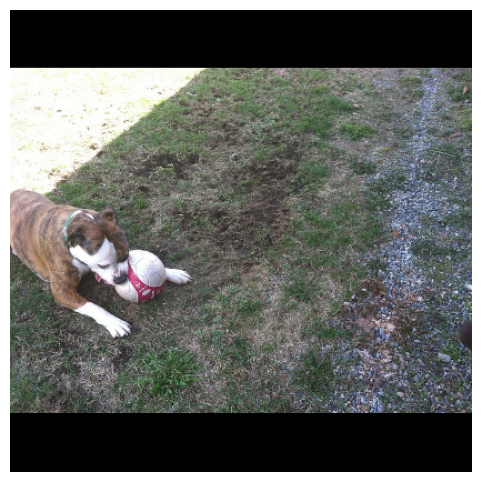

Epoch: 6


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=1.14]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:59:17, 13.09s/it, loss=1.16]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:35<1:35:22, 10.48s/it, loss=1.14]

batch_idx: 2


  1%|▊                                                                                                                    | 4/549 [00:42<1:22:26,  9.08s/it, loss=1.13]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:50<1:17:10,  8.51s/it, loss=1.12]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:57<1:12:36,  8.02s/it, loss=1.17]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:04<1:10:42,  7.83s/it, loss=1.21]

batch_idx: 6


  1%|█▋                                                                                                                    | 8/549 [01:11<1:07:59,  7.54s/it, loss=1.2]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:18<1:05:49,  7.31s/it, loss=1.19]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:25<1:05:15,  7.27s/it, loss=1.19]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:32<1:04:26,  7.19s/it, loss=1.19]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:40<1:04:40,  7.23s/it, loss=1.18]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:47<1:04:05,  7.18s/it, loss=1.18]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:53<1:02:05,  6.96s/it, loss=1.18]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [02:00<1:01:58,  6.96s/it, loss=1.17]

batch_idx: 14


  3%|███▍                                                                                                                | 16/549 [02:07<1:02:40,  7.05s/it, loss=1.16]

batch_idx: 15


  3%|███▌                                                                                                                | 17/549 [02:14<1:02:19,  7.03s/it, loss=1.17]

batch_idx: 16


  3%|███▊                                                                                                                | 18/549 [02:21<1:01:42,  6.97s/it, loss=1.17]

batch_idx: 17


  4%|████▍                                                                                                               | 21/549 [02:42<1:01:37,  7.00s/it, loss=1.16]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:49<1:01:28,  7.00s/it, loss=1.16]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:56<1:00:04,  6.85s/it, loss=1.17]

batch_idx: 22


  4%|█████▏                                                                                                                | 24/549 [03:03<59:50,  6.84s/it, loss=1.17]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:10<1:01:07,  7.00s/it, loss=1.18]

batch_idx: 24


  5%|█████▍                                                                                                              | 26/549 [03:17<1:01:28,  7.05s/it, loss=1.17]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:24<1:01:55,  7.12s/it, loss=1.18]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:32<1:02:02,  7.14s/it, loss=1.18]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:38<1:01:14,  7.07s/it, loss=1.18]

batch_idx: 28


  5%|██████▍                                                                                                               | 30/549 [03:45<59:43,  6.90s/it, loss=1.17]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:52<1:00:34,  7.02s/it, loss=1.17]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [03:59<1:00:58,  7.08s/it, loss=1.16]

batch_idx: 31


  6%|██████▉                                                                                                             | 33/549 [04:06<1:00:03,  6.98s/it, loss=1.17]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:14<1:00:58,  7.10s/it, loss=1.17]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:21<1:02:00,  7.24s/it, loss=1.17]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:28<1:00:33,  7.08s/it, loss=1.17]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:35<1:00:45,  7.12s/it, loss=1.18]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:42<59:24,  6.98s/it, loss=1.18]

batch_idx: 37


  7%|████████▏                                                                                                           | 39/549 [04:49<1:00:44,  7.15s/it, loss=1.18]

batch_idx: 38


  7%|████████▍                                                                                                           | 40/549 [04:56<1:00:24,  7.12s/it, loss=1.18]

batch_idx: 39


  8%|█████████▏                                                                                                            | 43/549 [05:18<59:58,  7.11s/it, loss=1.17]

batch_idx: 42


  8%|█████████▎                                                                                                          | 44/549 [05:25<1:00:35,  7.20s/it, loss=1.17]

batch_idx: 43


  8%|█████████▌                                                                                                          | 45/549 [05:32<1:00:45,  7.23s/it, loss=1.17]

batch_idx: 44


  8%|█████████▋                                                                                                          | 46/549 [05:40<1:02:25,  7.45s/it, loss=1.17]

batch_idx: 45


  9%|█████████▉                                                                                                          | 47/549 [05:47<1:00:05,  7.18s/it, loss=1.17]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:54<59:48,  7.16s/it, loss=1.17]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [06:01<59:03,  7.09s/it, loss=1.17]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:08<58:24,  7.02s/it, loss=1.18]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:15<58:24,  7.02s/it, loss=1.17]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:36<1:21:53,  9.89s/it, loss=1.17]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:43<1:15:42,  9.16s/it, loss=1.17]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:50<1:10:36,  8.56s/it, loss=1.17]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:58<1:07:47,  8.23s/it, loss=1.17]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:05<1:05:15,  7.94s/it, loss=1.17]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:13<1:04:19,  7.84s/it, loss=1.17]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:20<1:02:16,  7.61s/it, loss=1.17]

batch_idx: 57


 11%|████████████▋                                                                                                         | 59/549 [07:26<59:34,  7.29s/it, loss=1.17]

batch_idx: 58


 11%|████████████▉                                                                                                         | 60/549 [07:33<59:08,  7.26s/it, loss=1.17]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:41<59:00,  7.25s/it, loss=1.17]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:48<58:13,  7.17s/it, loss=1.17]

batch_idx: 61


 11%|█████████████▌                                                                                                        | 63/549 [07:54<57:07,  7.05s/it, loss=1.16]

batch_idx: 62


 12%|█████████████▊                                                                                                        | 64/549 [08:01<56:36,  7.00s/it, loss=1.17]

batch_idx: 63


 12%|█████████████▉                                                                                                        | 65/549 [08:09<57:51,  7.17s/it, loss=1.17]

batch_idx: 64


 12%|██████████████▏                                                                                                       | 66/549 [08:15<56:36,  7.03s/it, loss=1.17]

batch_idx: 65


 12%|██████████████▍                                                                                                       | 67/549 [08:22<56:04,  6.98s/it, loss=1.17]

batch_idx: 66


 12%|██████████████▌                                                                                                       | 68/549 [08:30<56:41,  7.07s/it, loss=1.17]

batch_idx: 67


 13%|██████████████▊                                                                                                       | 69/549 [08:37<56:40,  7.08s/it, loss=1.17]

batch_idx: 68


 13%|███████████████                                                                                                       | 70/549 [08:44<56:41,  7.10s/it, loss=1.18]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:51<57:20,  7.20s/it, loss=1.18]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:59<57:17,  7.21s/it, loss=1.18]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:06<56:54,  7.17s/it, loss=1.18]

batch_idx: 72


 13%|███████████████▉                                                                                                      | 74/549 [09:12<55:44,  7.04s/it, loss=1.18]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:19<55:18,  7.00s/it, loss=1.18]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:27<56:10,  7.12s/it, loss=1.18]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:34<56:00,  7.12s/it, loss=1.17]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:41<56:07,  7.15s/it, loss=1.17]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:48<55:42,  7.11s/it, loss=1.17]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:55<54:55,  7.03s/it, loss=1.17]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [10:02<54:22,  6.97s/it, loss=1.17]

batch_idx: 80


 16%|██████████████████▋                                                                                                   | 87/549 [10:44<53:06,  6.90s/it, loss=1.17]

batch_idx: 86


 16%|██████████████████▉                                                                                                   | 88/549 [10:51<54:07,  7.04s/it, loss=1.17]

batch_idx: 87


 16%|███████████████████▏                                                                                                  | 89/549 [10:59<54:43,  7.14s/it, loss=1.17]

batch_idx: 88


 16%|███████████████████▎                                                                                                  | 90/549 [11:06<53:56,  7.05s/it, loss=1.17]

batch_idx: 89


 17%|███████████████████▌                                                                                                  | 91/549 [11:12<52:36,  6.89s/it, loss=1.17]

batch_idx: 90


 17%|███████████████████▊                                                                                                  | 92/549 [11:19<53:40,  7.05s/it, loss=1.17]

batch_idx: 91


 17%|███████████████████▉                                                                                                  | 93/549 [11:26<52:29,  6.91s/it, loss=1.17]

batch_idx: 92


 17%|████████████████████▏                                                                                                 | 94/549 [11:33<53:33,  7.06s/it, loss=1.17]

batch_idx: 93


 17%|████████████████████▍                                                                                                 | 95/549 [11:40<53:09,  7.03s/it, loss=1.17]

batch_idx: 94


 17%|████████████████████▋                                                                                                 | 96/549 [11:48<53:23,  7.07s/it, loss=1.17]

batch_idx: 95


 18%|████████████████████▊                                                                                                 | 97/549 [11:55<53:22,  7.09s/it, loss=1.17]

batch_idx: 96


 18%|█████████████████████                                                                                                 | 98/549 [12:01<52:10,  6.94s/it, loss=1.17]

batch_idx: 97


 18%|█████████████████████▎                                                                                                | 99/549 [12:08<52:23,  6.99s/it, loss=1.17]

batch_idx: 98


 18%|█████████████████████▎                                                                                               | 100/549 [12:15<51:05,  6.83s/it, loss=1.17]

batch_idx: 99


 18%|█████████████████████▎                                                                                               | 100/549 [12:22<51:05,  6.83s/it, loss=1.17]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▎                                                                                             | 102/549 [12:44<1:14:55, 10.06s/it, loss=1.17]

batch_idx: 101


 19%|█████████████████████▌                                                                                             | 103/549 [12:51<1:07:48,  9.12s/it, loss=1.17]

batch_idx: 102


 19%|█████████████████████▊                                                                                             | 104/549 [12:58<1:03:42,  8.59s/it, loss=1.17]

batch_idx: 103


 19%|██████████████████████▍                                                                                              | 105/549 [13:05<59:46,  8.08s/it, loss=1.17]

batch_idx: 104


 19%|██████████████████████▌                                                                                              | 106/549 [13:12<56:25,  7.64s/it, loss=1.17]

batch_idx: 105


 19%|██████████████████████▊                                                                                              | 107/549 [13:19<55:17,  7.51s/it, loss=1.16]

batch_idx: 106


 20%|███████████████████████                                                                                              | 108/549 [13:26<54:35,  7.43s/it, loss=1.16]

batch_idx: 107


 20%|███████████████████████▍                                                                                             | 110/549 [13:41<53:53,  7.37s/it, loss=1.17]

batch_idx: 109


 20%|███████████████████████▋                                                                                             | 111/549 [13:48<53:14,  7.29s/it, loss=1.17]

batch_idx: 110


 20%|███████████████████████▊                                                                                             | 112/549 [13:55<52:48,  7.25s/it, loss=1.17]

batch_idx: 111


 21%|████████████████████████                                                                                             | 113/549 [14:02<51:54,  7.14s/it, loss=1.17]

batch_idx: 112


 21%|████████████████████████▎                                                                                            | 114/549 [14:08<50:41,  6.99s/it, loss=1.17]

batch_idx: 113


 21%|████████████████████████▌                                                                                            | 115/549 [14:15<50:35,  6.99s/it, loss=1.16]

batch_idx: 114


 21%|████████████████████████▋                                                                                            | 116/549 [14:22<49:46,  6.90s/it, loss=1.16]

batch_idx: 115


 21%|████████████████████████▉                                                                                            | 117/549 [14:29<49:37,  6.89s/it, loss=1.16]

batch_idx: 116


 21%|█████████████████████████▏                                                                                           | 118/549 [14:36<50:04,  6.97s/it, loss=1.16]

batch_idx: 117


 22%|█████████████████████████▎                                                                                           | 119/549 [14:43<50:29,  7.04s/it, loss=1.16]

batch_idx: 118


 22%|█████████████████████████▌                                                                                           | 120/549 [14:50<50:07,  7.01s/it, loss=1.16]

batch_idx: 119


 22%|█████████████████████████▊                                                                                           | 121/549 [14:57<49:39,  6.96s/it, loss=1.16]

batch_idx: 120


 22%|██████████████████████████                                                                                           | 122/549 [15:04<50:06,  7.04s/it, loss=1.16]

batch_idx: 121


 22%|██████████████████████████▏                                                                                          | 123/549 [15:11<49:52,  7.03s/it, loss=1.16]

batch_idx: 122


 23%|██████████████████████████▍                                                                                          | 124/549 [15:19<50:13,  7.09s/it, loss=1.16]

batch_idx: 123


 23%|██████████████████████████▋                                                                                          | 125/549 [15:26<50:12,  7.11s/it, loss=1.16]

batch_idx: 124


 23%|██████████████████████████▊                                                                                          | 126/549 [15:33<50:43,  7.19s/it, loss=1.16]

batch_idx: 125


 23%|███████████████████████████                                                                                          | 127/549 [15:40<51:01,  7.26s/it, loss=1.16]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:47<50:21,  7.18s/it, loss=1.16]

batch_idx: 127


 23%|███████████████████████████▍                                                                                         | 129/549 [15:54<49:45,  7.11s/it, loss=1.16]

batch_idx: 128


 24%|███████████████████████████▋                                                                                         | 130/549 [16:02<50:12,  7.19s/it, loss=1.16]

batch_idx: 129


 24%|███████████████████████████▉                                                                                         | 131/549 [16:09<49:30,  7.11s/it, loss=1.16]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:16<48:59,  7.05s/it, loss=1.16]

batch_idx: 131


 24%|████████████████████████████▎                                                                                        | 133/549 [16:23<49:07,  7.09s/it, loss=1.16]

batch_idx: 132


 24%|████████████████████████████▌                                                                                        | 134/549 [16:30<49:51,  7.21s/it, loss=1.16]

batch_idx: 133


 25%|████████████████████████████▊                                                                                        | 135/549 [16:37<49:09,  7.12s/it, loss=1.16]

batch_idx: 134


 25%|████████████████████████████▉                                                                                        | 136/549 [16:44<48:50,  7.10s/it, loss=1.15]

batch_idx: 135


 25%|█████████████████████████████▏                                                                                       | 137/549 [16:52<49:11,  7.16s/it, loss=1.15]

batch_idx: 136


 25%|█████████████████████████████▍                                                                                       | 138/549 [16:59<48:46,  7.12s/it, loss=1.16]

batch_idx: 137


 25%|█████████████████████████████▌                                                                                       | 139/549 [17:06<48:22,  7.08s/it, loss=1.16]

batch_idx: 138


 26%|█████████████████████████████▊                                                                                       | 140/549 [17:13<48:41,  7.14s/it, loss=1.16]

batch_idx: 139


 26%|██████████████████████████████                                                                                       | 141/549 [17:20<48:43,  7.16s/it, loss=1.16]

batch_idx: 140


 26%|██████████████████████████████▎                                                                                      | 142/549 [17:27<48:58,  7.22s/it, loss=1.16]

batch_idx: 141


 26%|██████████████████████████████▍                                                                                      | 143/549 [17:34<47:51,  7.07s/it, loss=1.16]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:41<46:57,  6.96s/it, loss=1.15]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:48<47:30,  7.06s/it, loss=1.15]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:55<47:28,  7.07s/it, loss=1.15]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [18:03<47:46,  7.13s/it, loss=1.15]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:10<47:58,  7.18s/it, loss=1.15]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:17<47:31,  7.13s/it, loss=1.15]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:24<46:38,  7.01s/it, loss=1.15]

batch_idx: 149


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:31<46:38,  7.01s/it, loss=1.15]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▊                                                                                   | 152/549 [18:52<1:06:45, 10.09s/it, loss=1.15]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [18:59<1:00:47,  9.21s/it, loss=1.15]

batch_idx: 152


 28%|████████████████████████████████▊                                                                                    | 154/549 [19:06<55:41,  8.46s/it, loss=1.15]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:13<53:07,  8.09s/it, loss=1.15]

batch_idx: 154


 28%|█████████████████████████████████▏                                                                                   | 156/549 [19:21<51:40,  7.89s/it, loss=1.15]

batch_idx: 155


 29%|█████████████████████████████████▍                                                                                   | 157/549 [19:28<50:06,  7.67s/it, loss=1.15]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:35<48:12,  7.40s/it, loss=1.15]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:41<46:59,  7.23s/it, loss=1.15]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:48<45:31,  7.02s/it, loss=1.15]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:55<45:07,  6.98s/it, loss=1.15]

batch_idx: 160


 30%|██████████████████████████████████▌                                                                                  | 162/549 [20:02<44:29,  6.90s/it, loss=1.15]

batch_idx: 161


 30%|██████████████████████████████████▋                                                                                  | 163/549 [20:09<44:34,  6.93s/it, loss=1.15]

batch_idx: 162


 30%|██████████████████████████████████▉                                                                                  | 164/549 [20:15<44:17,  6.90s/it, loss=1.15]

batch_idx: 163


 30%|███████████████████████████████████▏                                                                                 | 165/549 [20:22<43:38,  6.82s/it, loss=1.15]

batch_idx: 164


 30%|███████████████████████████████████▍                                                                                 | 166/549 [20:29<44:27,  6.97s/it, loss=1.15]

batch_idx: 165


 30%|███████████████████████████████████▌                                                                                 | 167/549 [20:36<44:21,  6.97s/it, loss=1.15]

batch_idx: 166


 31%|███████████████████████████████████▊                                                                                 | 168/549 [20:43<44:36,  7.03s/it, loss=1.15]

batch_idx: 167


 31%|████████████████████████████████████                                                                                 | 169/549 [20:51<44:31,  7.03s/it, loss=1.15]

batch_idx: 168


 31%|████████████████████████████████████▋                                                                                | 172/549 [21:11<43:52,  6.98s/it, loss=1.15]

batch_idx: 171


 32%|████████████████████████████████████▊                                                                                | 173/549 [21:19<44:08,  7.04s/it, loss=1.15]

batch_idx: 172


 32%|█████████████████████████████████████                                                                                | 174/549 [21:26<44:06,  7.06s/it, loss=1.15]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:33<44:02,  7.07s/it, loss=1.15]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:40<44:34,  7.17s/it, loss=1.15]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:48<45:05,  7.27s/it, loss=1.15]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:55<45:05,  7.29s/it, loss=1.15]

batch_idx: 177


 33%|██████████████████████████████████████▏                                                                              | 179/549 [22:02<44:15,  7.18s/it, loss=1.15]

batch_idx: 178


 33%|██████████████████████████████████████▎                                                                              | 180/549 [22:09<43:22,  7.05s/it, loss=1.15]

batch_idx: 179


 33%|██████████████████████████████████████▌                                                                              | 181/549 [22:16<44:09,  7.20s/it, loss=1.15]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:23<43:16,  7.07s/it, loss=1.15]

batch_idx: 181


 33%|███████████████████████████████████████                                                                              | 183/549 [22:30<43:15,  7.09s/it, loss=1.15]

batch_idx: 182


 34%|███████████████████████████████████████▏                                                                             | 184/549 [22:37<43:01,  7.07s/it, loss=1.15]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:45<43:56,  7.24s/it, loss=1.15]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:52<44:04,  7.29s/it, loss=1.15]

batch_idx: 185


 34%|███████████████████████████████████████▊                                                                             | 187/549 [22:59<43:20,  7.18s/it, loss=1.15]

batch_idx: 186


 34%|████████████████████████████████████████                                                                             | 188/549 [23:06<41:59,  6.98s/it, loss=1.15]

batch_idx: 187


 34%|████████████████████████████████████████▎                                                                            | 189/549 [23:12<41:15,  6.88s/it, loss=1.15]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:19<41:10,  6.88s/it, loss=1.15]

batch_idx: 189


 35%|████████████████████████████████████████▋                                                                            | 191/549 [23:26<40:31,  6.79s/it, loss=1.15]

batch_idx: 190


 35%|█████████████████████████████████████████▏                                                                           | 193/549 [23:40<40:26,  6.82s/it, loss=1.15]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:47<40:53,  6.91s/it, loss=1.15]

batch_idx: 193


 36%|█████████████████████████████████████████▌                                                                           | 195/549 [23:54<41:10,  6.98s/it, loss=1.14]

batch_idx: 194


 36%|█████████████████████████████████████████▊                                                                           | 196/549 [24:01<41:32,  7.06s/it, loss=1.14]

batch_idx: 195


 36%|█████████████████████████████████████████▉                                                                           | 197/549 [24:08<41:33,  7.08s/it, loss=1.15]

batch_idx: 196


 36%|██████████████████████████████████████████▏                                                                          | 198/549 [24:15<40:46,  6.97s/it, loss=1.15]

batch_idx: 197


 36%|██████████████████████████████████████████▍                                                                          | 199/549 [24:22<40:41,  6.98s/it, loss=1.14]

batch_idx: 198


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:29<41:07,  7.07s/it, loss=1.14]

batch_idx: 199


 36%|██████████████████████████████████████████▌                                                                          | 200/549 [24:37<41:07,  7.07s/it, loss=1.15]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:58<57:57, 10.02s/it, loss=1.14]

batch_idx: 201


 37%|███████████████████████████████████████████▎                                                                         | 203/549 [25:04<51:50,  8.99s/it, loss=1.15]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:11<47:37,  8.28s/it, loss=1.15]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:18<44:56,  7.84s/it, loss=1.15]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:24<42:19,  7.40s/it, loss=1.14]

batch_idx: 205


 38%|████████████████████████████████████████████                                                                         | 207/549 [25:31<42:24,  7.44s/it, loss=1.14]

batch_idx: 206


 38%|████████████████████████████████████████████▎                                                                        | 208/549 [25:38<41:32,  7.31s/it, loss=1.14]

batch_idx: 207


 38%|████████████████████████████████████████████▌                                                                        | 209/549 [25:46<41:00,  7.24s/it, loss=1.14]

batch_idx: 208


 38%|████████████████████████████████████████████▊                                                                        | 210/549 [25:52<40:20,  7.14s/it, loss=1.14]

batch_idx: 209


 38%|████████████████████████████████████████████▉                                                                        | 211/549 [25:59<39:59,  7.10s/it, loss=1.14]

batch_idx: 210


 39%|█████████████████████████████████████████████▏                                                                       | 212/549 [26:06<38:50,  6.91s/it, loss=1.14]

batch_idx: 211


 39%|█████████████████████████████████████████████▍                                                                       | 213/549 [26:13<39:18,  7.02s/it, loss=1.14]

batch_idx: 212


 39%|██████████████████████████████████████████████                                                                       | 216/549 [26:34<38:10,  6.88s/it, loss=1.14]

batch_idx: 215


 40%|██████████████████████████████████████████████▏                                                                      | 217/549 [26:40<37:51,  6.84s/it, loss=1.14]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                      | 218/549 [26:48<38:51,  7.05s/it, loss=1.14]

batch_idx: 217


 40%|██████████████████████████████████████████████▋                                                                      | 219/549 [26:55<38:41,  7.03s/it, loss=1.14]

batch_idx: 218


 40%|██████████████████████████████████████████████▉                                                                      | 220/549 [27:01<37:37,  6.86s/it, loss=1.14]

batch_idx: 219


 40%|███████████████████████████████████████████████                                                                      | 221/549 [27:08<37:42,  6.90s/it, loss=1.14]

batch_idx: 220


 40%|███████████████████████████████████████████████▎                                                                     | 222/549 [27:16<38:12,  7.01s/it, loss=1.14]

batch_idx: 221


 41%|███████████████████████████████████████████████▌                                                                     | 223/549 [27:23<37:55,  6.98s/it, loss=1.14]

batch_idx: 222


 41%|███████████████████████████████████████████████▋                                                                     | 224/549 [27:29<37:04,  6.85s/it, loss=1.14]

batch_idx: 223


 41%|███████████████████████████████████████████████▉                                                                     | 225/549 [27:36<37:09,  6.88s/it, loss=1.14]

batch_idx: 224


 41%|████████████████████████████████████████████████▏                                                                    | 226/549 [27:43<36:42,  6.82s/it, loss=1.14]

batch_idx: 225


 41%|████████████████████████████████████████████████▍                                                                    | 227/549 [27:50<37:49,  7.05s/it, loss=1.14]

batch_idx: 226


 42%|████████████████████████████████████████████████▌                                                                    | 228/549 [27:58<39:03,  7.30s/it, loss=1.14]

batch_idx: 227


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [28:05<38:19,  7.18s/it, loss=1.14]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:12<36:58,  6.96s/it, loss=1.14]

batch_idx: 229


 42%|█████████████████████████████████████████████████▏                                                                   | 231/549 [28:19<37:07,  7.01s/it, loss=1.14]

batch_idx: 230


 42%|█████████████████████████████████████████████████▍                                                                   | 232/549 [28:25<36:08,  6.84s/it, loss=1.14]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:32<35:57,  6.83s/it, loss=1.14]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:39<35:49,  6.82s/it, loss=1.14]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:46<36:11,  6.92s/it, loss=1.14]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:53<36:05,  6.92s/it, loss=1.14]

batch_idx: 235


 43%|██████████████████████████████████████████████████▌                                                                  | 237/549 [28:59<35:08,  6.76s/it, loss=1.14]

batch_idx: 236


 43%|██████████████████████████████████████████████████▋                                                                  | 238/549 [29:07<36:05,  6.96s/it, loss=1.14]

batch_idx: 237


 44%|██████████████████████████████████████████████████▉                                                                  | 239/549 [29:13<35:43,  6.91s/it, loss=1.14]

batch_idx: 238


 44%|███████████████████████████████████████████████████▏                                                                 | 240/549 [29:20<35:22,  6.87s/it, loss=1.14]

batch_idx: 239


 44%|███████████████████████████████████████████████████▎                                                                 | 241/549 [29:28<36:17,  7.07s/it, loss=1.14]

batch_idx: 240


 44%|███████████████████████████████████████████████████▌                                                                 | 242/549 [29:35<36:05,  7.05s/it, loss=1.14]

batch_idx: 241


 44%|███████████████████████████████████████████████████▊                                                                 | 243/549 [29:42<36:38,  7.19s/it, loss=1.14]

batch_idx: 242


 45%|████████████████████████████████████████████████████▋                                                                | 247/549 [30:10<35:05,  6.97s/it, loss=1.14]

batch_idx: 246


 45%|████████████████████████████████████████████████████▊                                                                | 248/549 [30:17<35:36,  7.10s/it, loss=1.14]

batch_idx: 247


 45%|█████████████████████████████████████████████████████                                                                | 249/549 [30:24<35:32,  7.11s/it, loss=1.14]

batch_idx: 248


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:31<35:22,  7.10s/it, loss=1.14]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:38<35:22,  7.10s/it, loss=1.14]

batch_idx: 250
==> Saving checkpoint


 47%|██████████████████████████████████████████████████████▌                                                              | 256/549 [31:25<36:49,  7.54s/it, loss=1.14]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▊                                                              | 257/549 [31:32<36:00,  7.40s/it, loss=1.14]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▉                                                              | 258/549 [31:39<35:17,  7.28s/it, loss=1.14]

batch_idx: 257


 47%|███████████████████████████████████████████████████████▏                                                             | 259/549 [31:46<35:14,  7.29s/it, loss=1.14]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:53<34:42,  7.21s/it, loss=1.14]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [32:00<33:29,  6.98s/it, loss=1.14]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:07<33:30,  7.00s/it, loss=1.14]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:14<33:14,  6.98s/it, loss=1.14]

batch_idx: 262


 48%|████████████████████████████████████████████████████████▎                                                            | 264/549 [32:20<32:51,  6.92s/it, loss=1.14]

batch_idx: 263


 48%|████████████████████████████████████████████████████████▍                                                            | 265/549 [32:27<32:45,  6.92s/it, loss=1.14]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▋                                                            | 266/549 [32:34<32:32,  6.90s/it, loss=1.14]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▉                                                            | 267/549 [32:42<33:35,  7.15s/it, loss=1.14]

batch_idx: 266


 49%|█████████████████████████████████████████████████████████                                                            | 268/549 [32:49<33:07,  7.07s/it, loss=1.14]

batch_idx: 267


 49%|█████████████████████████████████████████████████████████▎                                                           | 269/549 [32:56<33:19,  7.14s/it, loss=1.14]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████▌                                                           | 270/549 [33:03<32:46,  7.05s/it, loss=1.14]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▊                                                           | 271/549 [33:09<32:01,  6.91s/it, loss=1.14]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▉                                                           | 272/549 [33:16<31:57,  6.92s/it, loss=1.14]

batch_idx: 271


 50%|██████████████████████████████████████████████████████████▏                                                          | 273/549 [33:24<32:06,  6.98s/it, loss=1.14]

batch_idx: 272


 50%|██████████████████████████████████████████████████████████▍                                                          | 274/549 [33:31<32:06,  7.01s/it, loss=1.14]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████▌                                                          | 275/549 [33:37<31:37,  6.92s/it, loss=1.14]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▊                                                          | 276/549 [33:44<31:41,  6.96s/it, loss=1.13]

batch_idx: 275


 50%|███████████████████████████████████████████████████████████                                                          | 277/549 [33:51<30:45,  6.78s/it, loss=1.13]

batch_idx: 276


 51%|███████████████████████████████████████████████████████████▏                                                         | 278/549 [33:57<30:07,  6.67s/it, loss=1.13]

batch_idx: 277


 51%|███████████████████████████████████████████████████████████▍                                                         | 279/549 [34:04<30:01,  6.67s/it, loss=1.13]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▋                                                         | 280/549 [34:10<29:52,  6.66s/it, loss=1.13]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▉                                                         | 281/549 [34:17<30:14,  6.77s/it, loss=1.13]

batch_idx: 280


 51%|████████████████████████████████████████████████████████████                                                         | 282/549 [34:24<30:17,  6.81s/it, loss=1.13]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:31<30:35,  6.90s/it, loss=1.13]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:39<30:49,  6.98s/it, loss=1.13]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:46<30:51,  7.02s/it, loss=1.13]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:53<30:29,  6.96s/it, loss=1.13]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [35:00<30:34,  7.00s/it, loss=1.13]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:07<30:17,  6.96s/it, loss=1.13]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:14<30:13,  6.97s/it, loss=1.13]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▊                                                       | 290/549 [35:21<30:11,  6.99s/it, loss=1.13]

batch_idx: 289


 53%|██████████████████████████████████████████████████████████████                                                       | 291/549 [35:28<30:33,  7.11s/it, loss=1.13]

batch_idx: 290


 53%|██████████████████████████████████████████████████████████████▏                                                      | 292/549 [35:35<30:08,  7.04s/it, loss=1.13]

batch_idx: 291


 53%|██████████████████████████████████████████████████████████████▍                                                      | 293/549 [35:42<29:53,  7.01s/it, loss=1.13]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:49<29:38,  6.97s/it, loss=1.13]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:55<29:05,  6.87s/it, loss=1.13]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [36:02<29:14,  6.94s/it, loss=1.13]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:10<29:57,  7.13s/it, loss=1.13]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:17<29:53,  7.15s/it, loss=1.13]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:24<29:22,  7.05s/it, loss=1.13]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:30<28:30,  6.87s/it, loss=1.13]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:38<28:30,  6.87s/it, loss=1.13]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:53<35:51,  8.71s/it, loss=1.13]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:00<33:41,  8.22s/it, loss=1.13]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:07<32:05,  7.86s/it, loss=1.13]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:14<30:57,  7.61s/it, loss=1.13]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:21<30:18,  7.48s/it, loss=1.13]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:28<29:31,  7.32s/it, loss=1.13]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 308/549 [37:35<28:58,  7.21s/it, loss=1.13]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:42<28:24,  7.10s/it, loss=1.13]

batch_idx: 308


 57%|███████████████████████████████████████████████████████████████████▏                                                 | 315/549 [38:24<27:50,  7.14s/it, loss=1.13]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▎                                                 | 316/549 [38:30<26:54,  6.93s/it, loss=1.13]

batch_idx: 315


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 317/549 [38:37<26:02,  6.74s/it, loss=1.13]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▊                                                 | 318/549 [38:44<26:11,  6.80s/it, loss=1.13]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 319/549 [38:51<26:21,  6.87s/it, loss=1.13]

batch_idx: 318


 58%|████████████████████████████████████████████████████████████████████▏                                                | 320/549 [38:58<26:33,  6.96s/it, loss=1.13]

batch_idx: 319


 58%|████████████████████████████████████████████████████████████████████▍                                                | 321/549 [39:05<26:58,  7.10s/it, loss=1.13]

batch_idx: 320


 60%|█████████████████████████████████████████████████████████████████████▋                                               | 327/549 [39:46<25:29,  6.89s/it, loss=1.12]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▉                                               | 328/549 [39:53<25:52,  7.02s/it, loss=1.12]

batch_idx: 327


 60%|██████████████████████████████████████████████████████████████████████                                               | 329/549 [40:00<25:28,  6.95s/it, loss=1.12]

batch_idx: 328


 60%|██████████████████████████████████████████████████████████████████████▎                                              | 330/549 [40:07<25:27,  6.97s/it, loss=1.12]

batch_idx: 329


 60%|██████████████████████████████████████████████████████████████████████▌                                              | 331/549 [40:14<25:29,  7.02s/it, loss=1.12]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▊                                              | 332/549 [40:22<26:04,  7.21s/it, loss=1.12]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▉                                              | 333/549 [40:29<25:40,  7.13s/it, loss=1.12]

batch_idx: 332


 61%|███████████████████████████████████████████████████████████████████████▏                                             | 334/549 [40:36<25:33,  7.13s/it, loss=1.12]

batch_idx: 333


 61%|███████████████████████████████████████████████████████████████████████▍                                             | 335/549 [40:43<25:03,  7.03s/it, loss=1.12]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:50<25:20,  7.14s/it, loss=1.12]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▊                                             | 337/549 [40:57<24:46,  7.01s/it, loss=1.12]

batch_idx: 336


 62%|████████████████████████████████████████████████████████████████████████                                             | 338/549 [41:04<24:19,  6.92s/it, loss=1.12]

batch_idx: 337


 62%|████████████████████████████████████████████████████████████████████████▏                                            | 339/549 [41:10<24:14,  6.93s/it, loss=1.12]

batch_idx: 338


 62%|████████████████████████████████████████████████████████████████████████▍                                            | 340/549 [41:17<24:12,  6.95s/it, loss=1.12]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:25<24:24,  7.04s/it, loss=1.12]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 342/549 [41:31<23:52,  6.92s/it, loss=1.12]

batch_idx: 341


 62%|█████████████████████████████████████████████████████████████████████████                                            | 343/549 [41:39<24:10,  7.04s/it, loss=1.12]

batch_idx: 342


 63%|█████████████████████████████████████████████████████████████████████████▎                                           | 344/549 [41:46<23:59,  7.02s/it, loss=1.12]

batch_idx: 343


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 345/549 [41:53<24:15,  7.14s/it, loss=1.12]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:00<23:41,  7.00s/it, loss=1.12]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▉                                           | 347/549 [42:07<23:59,  7.12s/it, loss=1.12]

batch_idx: 346


 64%|██████████████████████████████████████████████████████████████████████████▌                                          | 350/549 [42:36<23:46,  7.17s/it, loss=1.12]

batch_idx: 350
==> Saving checkpoint


 64%|███████████████████████████████████████████████████████████████████████████                                          | 352/549 [42:52<29:23,  8.95s/it, loss=1.12]

batch_idx: 351


 64%|███████████████████████████████████████████████████████████████████████████▏                                         | 353/549 [42:59<27:20,  8.37s/it, loss=1.12]

batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:06<26:05,  8.03s/it, loss=1.12]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 355/549 [43:13<24:54,  7.70s/it, loss=1.12]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:20<24:05,  7.49s/it, loss=1.12]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:27<23:32,  7.36s/it, loss=1.12]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:34<22:55,  7.20s/it, loss=1.12]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:41<22:45,  7.19s/it, loss=1.12]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:47<22:04,  7.01s/it, loss=1.12]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [43:54<21:42,  6.93s/it, loss=1.12]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:01<21:09,  6.79s/it, loss=1.12]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:08<21:10,  6.83s/it, loss=1.12]

batch_idx: 362


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 364/549 [44:14<21:03,  6.83s/it, loss=1.12]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████▊                                       | 365/549 [44:22<21:29,  7.01s/it, loss=1.12]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:29<21:44,  7.13s/it, loss=1.12]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:37<22:10,  7.31s/it, loss=1.12]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:43<21:14,  7.04s/it, loss=1.12]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [44:50<21:07,  7.04s/it, loss=1.12]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [44:57<21:00,  7.04s/it, loss=1.12]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:05<21:00,  7.08s/it, loss=1.12]

batch_idx: 370


 68%|███████████████████████████████████████████████████████████████████████████████▎                                     | 372/549 [45:12<20:53,  7.08s/it, loss=1.12]

batch_idx: 371


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 373/549 [45:19<20:46,  7.08s/it, loss=1.12]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████▋                                     | 374/549 [45:26<20:34,  7.05s/it, loss=1.12]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▉                                     | 375/549 [45:33<20:29,  7.06s/it, loss=1.12]

batch_idx: 374


 68%|████████████████████████████████████████████████████████████████████████████████▏                                    | 376/549 [45:40<20:16,  7.03s/it, loss=1.12]

batch_idx: 375


 69%|████████████████████████████████████████████████████████████████████████████████▎                                    | 377/549 [45:47<20:07,  7.02s/it, loss=1.12]

batch_idx: 376


 69%|████████████████████████████████████████████████████████████████████████████████▌                                    | 378/549 [45:53<19:36,  6.88s/it, loss=1.12]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████▊                                    | 379/549 [46:00<19:39,  6.94s/it, loss=1.12]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▉                                    | 380/549 [46:07<19:12,  6.82s/it, loss=1.12]

batch_idx: 379


 69%|█████████████████████████████████████████████████████████████████████████████████▏                                   | 381/549 [46:14<19:09,  6.84s/it, loss=1.12]

batch_idx: 380


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                   | 382/549 [46:21<19:06,  6.87s/it, loss=1.12]

batch_idx: 381


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                   | 383/549 [46:28<18:56,  6.85s/it, loss=1.12]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                   | 384/549 [46:35<19:09,  6.96s/it, loss=1.12]

batch_idx: 383


 70%|██████████████████████████████████████████████████████████████████████████████████                                   | 385/549 [46:42<19:18,  7.07s/it, loss=1.12]

batch_idx: 384


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 386/549 [46:49<19:08,  7.04s/it, loss=1.12]

batch_idx: 385


 70%|██████████████████████████████████████████████████████████████████████████████████▍                                  | 387/549 [46:56<18:54,  7.00s/it, loss=1.12]

batch_idx: 386


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                  | 388/549 [47:03<18:37,  6.94s/it, loss=1.12]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 389/549 [47:10<18:25,  6.91s/it, loss=1.12]

batch_idx: 388


 71%|███████████████████████████████████████████████████████████████████████████████████                                  | 390/549 [47:17<18:16,  6.90s/it, loss=1.12]

batch_idx: 389


 71%|███████████████████████████████████████████████████████████████████████████████████▎                                 | 391/549 [47:24<18:17,  6.95s/it, loss=1.12]

batch_idx: 390


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 392/549 [47:30<18:03,  6.90s/it, loss=1.12]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 393/549 [47:38<18:13,  7.01s/it, loss=1.12]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                 | 394/549 [47:45<18:00,  6.97s/it, loss=1.12]

batch_idx: 393


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 395/549 [47:52<18:11,  7.09s/it, loss=1.12]

batch_idx: 394


 72%|████████████████████████████████████████████████████████████████████████████████████▌                                | 397/549 [48:06<17:55,  7.07s/it, loss=1.11]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████▊                                | 398/549 [48:13<17:41,  7.03s/it, loss=1.11]

batch_idx: 397


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 399/549 [48:20<17:32,  7.02s/it, loss=1.11]

batch_idx: 398


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:27<17:36,  7.09s/it, loss=1.11]

batch_idx: 399


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                               | 400/549 [48:34<17:36,  7.09s/it, loss=1.11]

batch_idx: 400
==> Saving checkpoint


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 402/549 [48:55<24:17,  9.92s/it, loss=1.11]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▉                               | 403/549 [49:02<22:04,  9.07s/it, loss=1.11]

batch_idx: 402


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 404/549 [49:09<20:41,  8.56s/it, loss=1.11]

batch_idx: 403


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 405/549 [49:16<19:26,  8.10s/it, loss=1.11]

batch_idx: 404


 74%|██████████████████████████████████████████████████████████████████████████████████████▌                              | 406/549 [49:23<18:29,  7.76s/it, loss=1.11]

batch_idx: 405


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 407/549 [49:30<17:39,  7.46s/it, loss=1.11]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 408/549 [49:37<17:18,  7.36s/it, loss=1.11]

batch_idx: 407


 74%|███████████████████████████████████████████████████████████████████████████████████████▏                             | 409/549 [49:44<16:59,  7.29s/it, loss=1.11]

batch_idx: 408


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                             | 410/549 [49:52<17:17,  7.46s/it, loss=1.11]

batch_idx: 409


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 411/549 [49:59<16:39,  7.24s/it, loss=1.11]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████▊                             | 412/549 [50:06<16:30,  7.23s/it, loss=1.11]

batch_idx: 411


 75%|████████████████████████████████████████████████████████████████████████████████████████                             | 413/549 [50:13<16:10,  7.13s/it, loss=1.11]

batch_idx: 412


 76%|█████████████████████████████████████████████████████████████████████████████████████████▎                           | 419/549 [50:56<15:39,  7.23s/it, loss=1.11]

batch_idx: 418


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                           | 420/549 [51:03<15:37,  7.27s/it, loss=1.11]

batch_idx: 419


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                           | 421/549 [51:10<15:26,  7.24s/it, loss=1.11]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▉                           | 422/549 [51:18<15:17,  7.22s/it, loss=1.11]

batch_idx: 421


 77%|██████████████████████████████████████████████████████████████████████████████████████████▏                          | 423/549 [51:24<14:56,  7.12s/it, loss=1.11]

batch_idx: 422


 77%|██████████████████████████████████████████████████████████████████████████████████████████▎                          | 424/549 [51:31<14:33,  6.99s/it, loss=1.11]

batch_idx: 423


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                          | 426/549 [51:45<14:31,  7.08s/it, loss=1.11]

batch_idx: 425


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 427/549 [51:53<14:44,  7.25s/it, loss=1.11]

batch_idx: 426


 78%|███████████████████████████████████████████████████████████████████████████████████████████▏                         | 428/549 [52:01<14:50,  7.36s/it, loss=1.11]

batch_idx: 427


 78%|███████████████████████████████████████████████████████████████████████████████████████████▍                         | 429/549 [52:08<14:34,  7.29s/it, loss=1.11]

batch_idx: 428


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 430/549 [52:15<14:27,  7.29s/it, loss=1.11]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                         | 431/549 [52:23<14:43,  7.49s/it, loss=1.11]

batch_idx: 430


 79%|████████████████████████████████████████████████████████████████████████████████████████████                         | 432/549 [52:31<14:37,  7.50s/it, loss=1.11]

batch_idx: 431


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 433/549 [52:37<14:08,  7.32s/it, loss=1.11]

batch_idx: 432


 79%|████████████████████████████████████████████████████████████████████████████████████████████▍                        | 434/549 [52:44<13:28,  7.03s/it, loss=1.11]

batch_idx: 433


 79%|████████████████████████████████████████████████████████████████████████████████████████████▋                        | 435/549 [52:51<13:16,  6.99s/it, loss=1.11]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 436/549 [52:57<12:49,  6.81s/it, loss=1.11]

batch_idx: 435


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 437/549 [53:04<12:43,  6.81s/it, loss=1.11]

batch_idx: 436


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                       | 438/549 [53:11<12:52,  6.96s/it, loss=1.11]

batch_idx: 437


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 439/549 [53:19<12:56,  7.06s/it, loss=1.11]

batch_idx: 438


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 440/549 [53:26<12:51,  7.08s/it, loss=1.11]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▉                       | 441/549 [53:32<12:24,  6.89s/it, loss=1.11]

batch_idx: 440


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 442/549 [53:39<12:19,  6.91s/it, loss=1.11]

batch_idx: 441


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 443/549 [53:47<12:33,  7.11s/it, loss=1.11]

batch_idx: 442


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                      | 444/549 [53:54<12:24,  7.09s/it, loss=1.11]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 445/549 [54:01<12:26,  7.18s/it, loss=1.11]

batch_idx: 444


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 446/549 [54:08<12:25,  7.24s/it, loss=1.11]

batch_idx: 445


 81%|███████████████████████████████████████████████████████████████████████████████████████████████▎                     | 447/549 [54:15<12:09,  7.16s/it, loss=1.11]

batch_idx: 446


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 448/549 [54:22<11:55,  7.08s/it, loss=1.11]

batch_idx: 447


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 449/549 [54:30<11:53,  7.14s/it, loss=1.11]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:36<11:35,  7.03s/it, loss=1.11]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▉                     | 450/549 [54:43<11:35,  7.03s/it, loss=1.11]

batch_idx: 450
==> Saving checkpoint


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 455/549 [55:25<12:26,  7.94s/it, loss=1.11]

batch_idx: 454


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 456/549 [55:33<12:03,  7.77s/it, loss=1.11]

batch_idx: 455


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 457/549 [55:40<11:47,  7.69s/it, loss=1.11]

batch_idx: 456


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 458/549 [55:48<11:27,  7.56s/it, loss=1.11]

batch_idx: 457


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 459/549 [55:55<11:12,  7.47s/it, loss=1.11]

batch_idx: 458


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                   | 460/549 [56:02<10:54,  7.36s/it, loss=1.11]

batch_idx: 459


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████                   | 461/549 [56:09<10:38,  7.25s/it, loss=1.1]

batch_idx: 460


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 462/549 [56:16<10:29,  7.24s/it, loss=1.1]

batch_idx: 461


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 463/549 [56:23<10:15,  7.16s/it, loss=1.1]

batch_idx: 462


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 464/549 [56:32<10:43,  7.58s/it, loss=1.1]

batch_idx: 463


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 465/549 [56:39<10:31,  7.52s/it, loss=1.1]

batch_idx: 464


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 466/549 [56:47<10:26,  7.54s/it, loss=1.1]

batch_idx: 465


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 467/549 [56:54<10:13,  7.49s/it, loss=1.1]

batch_idx: 466


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 468/549 [57:01<09:47,  7.25s/it, loss=1.1]

batch_idx: 467


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 469/549 [57:09<09:55,  7.45s/it, loss=1.1]

batch_idx: 468


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                 | 470/549 [57:15<09:27,  7.18s/it, loss=1.1]

batch_idx: 469


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 471/549 [57:22<09:12,  7.08s/it, loss=1.1]

batch_idx: 470


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 472/549 [57:30<09:17,  7.24s/it, loss=1.1]

batch_idx: 471


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 473/549 [57:36<09:01,  7.12s/it, loss=1.1]

batch_idx: 472


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 474/549 [57:44<08:54,  7.13s/it, loss=1.1]

batch_idx: 473


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████                | 475/549 [57:51<08:43,  7.07s/it, loss=1.1]

batch_idx: 474


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 476/549 [57:58<08:38,  7.10s/it, loss=1.1]

batch_idx: 475


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 477/549 [58:05<08:24,  7.01s/it, loss=1.1]

batch_idx: 476


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 478/549 [58:12<08:20,  7.04s/it, loss=1.1]

batch_idx: 477


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 479/549 [58:19<08:13,  7.05s/it, loss=1.1]

batch_idx: 478


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 480/549 [58:26<08:07,  7.07s/it, loss=1.1]

batch_idx: 479


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 481/549 [58:33<08:00,  7.06s/it, loss=1.1]

batch_idx: 480


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 482/549 [58:40<07:57,  7.12s/it, loss=1.1]

batch_idx: 481


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 483/549 [58:47<07:48,  7.10s/it, loss=1.1]

batch_idx: 482


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████              | 484/549 [58:55<07:49,  7.22s/it, loss=1.1]

batch_idx: 483


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 485/549 [59:02<07:43,  7.24s/it, loss=1.1]

batch_idx: 484


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 486/549 [59:09<07:25,  7.07s/it, loss=1.1]

batch_idx: 485


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 487/549 [59:15<07:04,  6.85s/it, loss=1.1]

batch_idx: 486


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 488/549 [59:22<07:03,  6.94s/it, loss=1.1]

batch_idx: 487


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████             | 489/549 [59:29<06:53,  6.90s/it, loss=1.1]

batch_idx: 488


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 490/549 [59:37<07:09,  7.28s/it, loss=1.1]

batch_idx: 489


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 491/549 [59:44<06:57,  7.19s/it, loss=1.1]

batch_idx: 490


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 492/549 [59:52<06:54,  7.27s/it, loss=1.1]

batch_idx: 491


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 493/549 [59:59<06:50,  7.33s/it, loss=1.1]

batch_idx: 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 494/549 [1:00:06<06:39,  7.26s/it, loss=1.1]

batch_idx: 493


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 495/549 [1:00:13<06:31,  7.25s/it, loss=1.1]

batch_idx: 494


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 496/549 [1:00:20<06:15,  7.08s/it, loss=1.1]

batch_idx: 495


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 497/549 [1:00:27<06:11,  7.14s/it, loss=1.1]

batch_idx: 496


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 498/549 [1:00:34<06:04,  7.15s/it, loss=1.1]

batch_idx: 497


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 499/549 [1:00:42<05:58,  7.18s/it, loss=1.1]

batch_idx: 498


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:49<05:53,  7.22s/it, loss=1.1]

batch_idx: 499


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 500/549 [1:00:56<05:53,  7.22s/it, loss=1.1]

batch_idx: 500
==> Saving checkpoint


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 502/549 [1:01:17<07:53, 10.07s/it, loss=1.1]

batch_idx: 501


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 503/549 [1:01:24<07:04,  9.23s/it, loss=1.1]

batch_idx: 502


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 504/549 [1:01:32<06:38,  8.85s/it, loss=1.1]

batch_idx: 503


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 506/549 [1:01:46<05:43,  8.00s/it, loss=1.1]

batch_idx: 505


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 507/549 [1:01:53<05:15,  7.52s/it, loss=1.1]

batch_idx: 506


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 508/549 [1:02:00<05:02,  7.37s/it, loss=1.1]

batch_idx: 507


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 509/549 [1:02:07<04:49,  7.23s/it, loss=1.1]

batch_idx: 508


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 510/549 [1:02:13<04:36,  7.09s/it, loss=1.1]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 511/549 [1:02:21<04:30,  7.12s/it, loss=1.1]

batch_idx: 510


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:02:28<04:23,  7.13s/it, loss=1.1]

batch_idx: 511


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:02:35<04:17,  7.14s/it, loss=1.1]

batch_idx: 512


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 514/549 [1:02:42<04:11,  7.19s/it, loss=1.1]

batch_idx: 513


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 515/549 [1:02:50<04:04,  7.19s/it, loss=1.1]

batch_idx: 514


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:02:56<03:54,  7.10s/it, loss=1.1]

batch_idx: 515


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 517/549 [1:03:03<03:46,  7.08s/it, loss=1.1]

batch_idx: 516


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 518/549 [1:03:11<03:45,  7.28s/it, loss=1.1]

batch_idx: 517


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 519/549 [1:03:18<03:36,  7.21s/it, loss=1.1]

batch_idx: 518


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 520/549 [1:03:25<03:28,  7.18s/it, loss=1.1]

batch_idx: 519


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 521/549 [1:03:33<03:22,  7.22s/it, loss=1.1]

batch_idx: 520


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 522/549 [1:03:40<03:13,  7.19s/it, loss=1.1]

batch_idx: 521


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:03:47<03:04,  7.10s/it, loss=1.1]

batch_idx: 522


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 524/549 [1:03:54<02:55,  7.04s/it, loss=1.1]

batch_idx: 523


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:01<02:53,  7.22s/it, loss=1.1]

batch_idx: 524


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:08<02:44,  7.16s/it, loss=1.1]

batch_idx: 525


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 527/549 [1:04:15<02:38,  7.19s/it, loss=1.1]

batch_idx: 526


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:23<02:30,  7.17s/it, loss=1.1]

batch_idx: 527


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:30<02:25,  7.27s/it, loss=1.1]

batch_idx: 528


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 530/549 [1:04:37<02:17,  7.23s/it, loss=1.1]

batch_idx: 529


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 531/549 [1:04:45<02:11,  7.31s/it, loss=1.1]

batch_idx: 530


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:04:52<02:03,  7.24s/it, loss=1.1]

batch_idx: 531


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 533/549 [1:04:59<01:54,  7.18s/it, loss=1.1]

batch_idx: 532


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 534/549 [1:05:06<01:47,  7.14s/it, loss=1.1]

batch_idx: 533


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:13<01:38,  7.06s/it, loss=1.1]

batch_idx: 534


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:34<01:18,  7.12s/it, loss=1.1]

batch_idx: 537


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:05:41<01:10,  7.04s/it, loss=1.1]

batch_idx: 538


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 540/549 [1:05:47<01:01,  6.89s/it, loss=1.1]

batch_idx: 539


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:05:54<00:54,  6.76s/it, loss=1.1]

batch_idx: 540


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:01<00:48,  6.90s/it, loss=1.1]

batch_idx: 541


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 543/549 [1:06:08<00:41,  6.88s/it, loss=1.09]

batch_idx: 542


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:16<00:35,  7.18s/it, loss=1.09]

batch_idx: 543


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:23<00:28,  7.13s/it, loss=1.09]

batch_idx: 544


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 546/549 [1:06:30<00:21,  7.17s/it, loss=1.09]

batch_idx: 545


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:06:37<00:14,  7.06s/it, loss=1.09]

batch_idx: 546


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:06:44<00:06,  6.94s/it, loss=1.09]

batch_idx: 547


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:06:45<00:00,  7.30s/it, loss=1.1]

batch_idx: 548
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


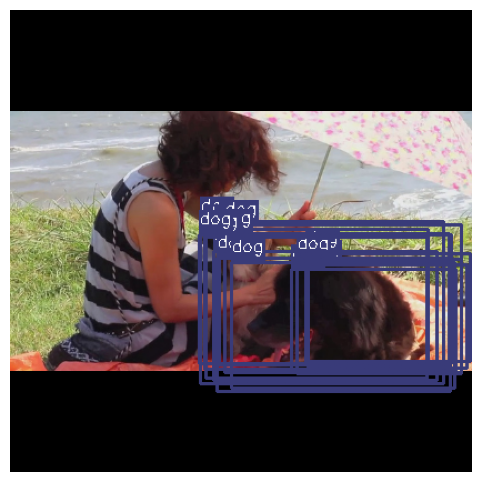

Epoch: 7


  0%|                                                                                                                                | 0/549 [00:07<?, ?it/s, loss=1.1]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:28<1:58:24, 12.99s/it, loss=1.02]

batch_idx: 1


  1%|▋                                                                                                                    | 3/549 [00:35<1:32:42, 10.19s/it, loss=1.03]

batch_idx: 2


  1%|▊                                                                                                                     | 4/549 [00:42<1:21:39,  8.99s/it, loss=1.1]

batch_idx: 3


  1%|█                                                                                                                    | 5/549 [00:49<1:13:52,  8.15s/it, loss=1.12]

batch_idx: 4


  1%|█▎                                                                                                                   | 6/549 [00:56<1:11:13,  7.87s/it, loss=1.11]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:03<1:08:42,  7.61s/it, loss=1.09]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:10<1:06:24,  7.36s/it, loss=1.09]

batch_idx: 7


  2%|█▉                                                                                                                   | 9/549 [01:16<1:02:58,  7.00s/it, loss=1.09]

batch_idx: 8


  2%|██                                                                                                                  | 10/549 [01:23<1:03:20,  7.05s/it, loss=1.08]

batch_idx: 9


  2%|██▎                                                                                                                 | 11/549 [01:31<1:04:03,  7.14s/it, loss=1.07]

batch_idx: 10


  2%|██▌                                                                                                                 | 12/549 [01:38<1:03:17,  7.07s/it, loss=1.08]

batch_idx: 11


  2%|██▋                                                                                                                 | 13/549 [01:45<1:02:49,  7.03s/it, loss=1.08]

batch_idx: 12


  3%|██▉                                                                                                                 | 14/549 [01:52<1:04:04,  7.19s/it, loss=1.09]

batch_idx: 13


  3%|███▏                                                                                                                | 15/549 [01:59<1:03:03,  7.09s/it, loss=1.08]

batch_idx: 14


  3%|████                                                                                                                | 19/549 [02:27<1:03:26,  7.18s/it, loss=1.07]

batch_idx: 18


  4%|████▏                                                                                                               | 20/549 [02:34<1:02:23,  7.08s/it, loss=1.07]

batch_idx: 19


  4%|████▍                                                                                                               | 21/549 [02:41<1:03:25,  7.21s/it, loss=1.08]

batch_idx: 20


  4%|████▋                                                                                                               | 22/549 [02:48<1:02:38,  7.13s/it, loss=1.07]

batch_idx: 21


  4%|████▊                                                                                                               | 23/549 [02:56<1:02:40,  7.15s/it, loss=1.06]

batch_idx: 22


  4%|█████                                                                                                               | 24/549 [03:02<1:00:31,  6.92s/it, loss=1.06]

batch_idx: 23


  5%|█████▎                                                                                                              | 25/549 [03:09<1:00:05,  6.88s/it, loss=1.05]

batch_idx: 24


  5%|█████▌                                                                                                                | 26/549 [03:16<59:53,  6.87s/it, loss=1.05]

batch_idx: 25


  5%|█████▋                                                                                                              | 27/549 [03:23<1:00:36,  6.97s/it, loss=1.05]

batch_idx: 26


  5%|█████▉                                                                                                              | 28/549 [03:30<1:01:55,  7.13s/it, loss=1.05]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:38<1:02:28,  7.21s/it, loss=1.05]

batch_idx: 28


  5%|██████▎                                                                                                             | 30/549 [03:45<1:02:42,  7.25s/it, loss=1.04]

batch_idx: 29


  6%|██████▌                                                                                                             | 31/549 [03:52<1:02:26,  7.23s/it, loss=1.04]

batch_idx: 30


  6%|██████▊                                                                                                             | 32/549 [03:59<1:02:00,  7.20s/it, loss=1.04]

batch_idx: 31


  6%|███████                                                                                                               | 33/549 [04:05<59:20,  6.90s/it, loss=1.04]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:13<1:00:06,  7.00s/it, loss=1.03]

batch_idx: 33


  6%|███████▌                                                                                                              | 35/549 [04:20<59:42,  6.97s/it, loss=1.03]

batch_idx: 34


  7%|███████▌                                                                                                            | 36/549 [04:27<1:00:39,  7.09s/it, loss=1.03]

batch_idx: 35


  7%|███████▊                                                                                                            | 37/549 [04:34<1:00:23,  7.08s/it, loss=1.03]

batch_idx: 36


  7%|████████▏                                                                                                             | 38/549 [04:41<59:46,  7.02s/it, loss=1.02]

batch_idx: 37


  7%|████████▍                                                                                                             | 39/549 [04:48<59:55,  7.05s/it, loss=1.02]

batch_idx: 38


  7%|████████▌                                                                                                             | 40/549 [04:55<58:59,  6.95s/it, loss=1.02]

batch_idx: 39


  7%|████████▊                                                                                                             | 41/549 [05:02<58:27,  6.90s/it, loss=1.02]

batch_idx: 40


  8%|████████▊                                                                                                           | 42/549 [05:09<1:00:21,  7.14s/it, loss=1.02]

batch_idx: 41


  8%|█████████                                                                                                           | 43/549 [05:17<1:00:32,  7.18s/it, loss=1.02]

batch_idx: 42


  8%|█████████▍                                                                                                            | 44/549 [05:23<59:22,  7.05s/it, loss=1.02]

batch_idx: 43


  8%|█████████▋                                                                                                            | 45/549 [05:30<58:42,  6.99s/it, loss=1.02]

batch_idx: 44


  8%|█████████▉                                                                                                            | 46/549 [05:37<58:27,  6.97s/it, loss=1.02]

batch_idx: 45


  9%|██████████                                                                                                            | 47/549 [05:44<57:16,  6.84s/it, loss=1.01]

batch_idx: 46


  9%|██████████▎                                                                                                           | 48/549 [05:50<57:09,  6.85s/it, loss=1.01]

batch_idx: 47


  9%|██████████▌                                                                                                           | 49/549 [05:58<57:59,  6.96s/it, loss=1.01]

batch_idx: 48


  9%|██████████▋                                                                                                           | 50/549 [06:05<58:57,  7.09s/it, loss=1.01]

batch_idx: 49


  9%|██████████▋                                                                                                           | 50/549 [06:12<58:57,  7.09s/it, loss=1.02]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                         | 52/549 [06:34<1:23:55, 10.13s/it, loss=1.01]

batch_idx: 51


 10%|███████████▏                                                                                                        | 53/549 [06:40<1:15:28,  9.13s/it, loss=1.01]

batch_idx: 52


 10%|███████████▍                                                                                                        | 54/549 [06:48<1:10:56,  8.60s/it, loss=1.01]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:55<1:07:48,  8.24s/it, loss=1.01]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:02<1:04:56,  7.90s/it, loss=1.01]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:09<1:02:28,  7.62s/it, loss=1.01]

batch_idx: 56


 11%|████████████▎                                                                                                       | 58/549 [07:17<1:01:41,  7.54s/it, loss=1.01]

batch_idx: 57


 11%|████████████▉                                                                                                         | 60/549 [07:30<58:40,  7.20s/it, loss=1.01]

batch_idx: 59


 11%|█████████████▍                                                                                                           | 61/549 [07:37<57:20,  7.05s/it, loss=1]

batch_idx: 60


 11%|█████████████▎                                                                                                        | 62/549 [07:45<59:43,  7.36s/it, loss=1.01]

batch_idx: 61


 11%|█████████████▉                                                                                                           | 63/549 [07:52<58:48,  7.26s/it, loss=1]

batch_idx: 62


 12%|██████████████                                                                                                           | 64/549 [07:58<55:26,  6.86s/it, loss=1]

batch_idx: 63


 12%|██████████████▎                                                                                                          | 65/549 [08:05<55:34,  6.89s/it, loss=1]

batch_idx: 64


 12%|██████████████▌                                                                                                          | 66/549 [08:13<57:59,  7.20s/it, loss=1]

batch_idx: 65


 12%|██████████████▊                                                                                                          | 67/549 [08:20<57:31,  7.16s/it, loss=1]

batch_idx: 66


 12%|██████████████▉                                                                                                          | 68/549 [08:27<56:41,  7.07s/it, loss=1]

batch_idx: 67


 13%|███████████████▏                                                                                                         | 69/549 [08:34<56:37,  7.08s/it, loss=1]

batch_idx: 68


 13%|███████████████▍                                                                                                         | 70/549 [08:41<57:14,  7.17s/it, loss=1]

batch_idx: 69


 13%|███████████████▎                                                                                                      | 71/549 [08:49<57:56,  7.27s/it, loss=1.01]

batch_idx: 70


 13%|███████████████▍                                                                                                      | 72/549 [08:57<58:35,  7.37s/it, loss=1.01]

batch_idx: 71


 13%|████████████████                                                                                                         | 73/549 [09:03<57:07,  7.20s/it, loss=1]

batch_idx: 72


 13%|████████████████▎                                                                                                        | 74/549 [09:11<57:09,  7.22s/it, loss=1]

batch_idx: 73


 14%|████████████████                                                                                                      | 75/549 [09:18<56:32,  7.16s/it, loss=1.01]

batch_idx: 74


 14%|████████████████▎                                                                                                     | 76/549 [09:25<56:16,  7.14s/it, loss=1.01]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:32<55:30,  7.06s/it, loss=1.01]

batch_idx: 76


 14%|████████████████▊                                                                                                     | 78/549 [09:39<55:54,  7.12s/it, loss=1.01]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:46<55:42,  7.11s/it, loss=1.01]

batch_idx: 78


 15%|█████████████████▏                                                                                                    | 80/549 [09:52<53:42,  6.87s/it, loss=1.01]

batch_idx: 79


 15%|█████████████████▍                                                                                                    | 81/549 [09:59<53:34,  6.87s/it, loss=1.01]

batch_idx: 80


 15%|██████████████████                                                                                                       | 82/549 [10:06<53:43,  6.90s/it, loss=1]

batch_idx: 81


 15%|██████████████████▎                                                                                                      | 83/549 [10:14<55:06,  7.10s/it, loss=1]

batch_idx: 82


 15%|██████████████████▌                                                                                                      | 84/549 [10:21<55:34,  7.17s/it, loss=1]

batch_idx: 83


 15%|██████████████████▋                                                                                                      | 85/549 [10:28<55:20,  7.16s/it, loss=1]

batch_idx: 84


 16%|██████████████████▉                                                                                                      | 86/549 [10:35<54:55,  7.12s/it, loss=1]

batch_idx: 85


 16%|███████████████████▏                                                                                                     | 87/549 [10:42<54:25,  7.07s/it, loss=1]

batch_idx: 86


 16%|███████████████████▍                                                                                                     | 88/549 [10:49<53:35,  6.97s/it, loss=1]

batch_idx: 87


 16%|███████████████████▌                                                                                                     | 89/549 [10:56<53:27,  6.97s/it, loss=1]

batch_idx: 88


 16%|███████████████████▏                                                                                                 | 90/549 [11:03<53:16,  6.96s/it, loss=0.999]

batch_idx: 89


 17%|████████████████████                                                                                                     | 91/549 [11:09<52:35,  6.89s/it, loss=1]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:16<51:59,  6.83s/it, loss=0.999]

batch_idx: 91


 17%|████████████████████▍                                                                                                    | 93/549 [11:24<53:18,  7.01s/it, loss=1]

batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:31<54:15,  7.15s/it, loss=0.998]

batch_idx: 93


 17%|████████████████████▏                                                                                                | 95/549 [11:38<54:35,  7.22s/it, loss=0.998]

batch_idx: 94


 17%|████████████████████▍                                                                                                | 96/549 [11:46<54:31,  7.22s/it, loss=0.996]

batch_idx: 95


 18%|████████████████████▋                                                                                                | 97/549 [11:53<54:06,  7.18s/it, loss=0.997]

batch_idx: 96


 18%|████████████████████▉                                                                                                | 98/549 [11:59<52:44,  7.02s/it, loss=0.995]

batch_idx: 97


 18%|█████████████████████                                                                                                | 99/549 [12:07<52:59,  7.07s/it, loss=0.995]

batch_idx: 98


 18%|█████████████████████▏                                                                                              | 100/549 [12:14<53:11,  7.11s/it, loss=0.996]

batch_idx: 99


 18%|█████████████████████▏                                                                                              | 100/549 [12:21<53:11,  7.11s/it, loss=0.996]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▏                                                                                            | 102/549 [12:42<1:14:24,  9.99s/it, loss=0.996]

batch_idx: 101


 19%|█████████████████████▍                                                                                            | 103/549 [12:49<1:07:48,  9.12s/it, loss=0.997]

batch_idx: 102


 19%|█████████████████████▌                                                                                            | 104/549 [12:56<1:02:04,  8.37s/it, loss=0.996]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [13:03<58:56,  7.97s/it, loss=0.996]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [13:10<57:04,  7.73s/it, loss=0.998]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:17<55:35,  7.55s/it, loss=0.998]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:24<54:28,  7.41s/it, loss=0.999]

batch_idx: 107


 20%|███████████████████████                                                                                             | 109/549 [13:31<53:33,  7.30s/it, loss=0.998]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:38<52:08,  7.13s/it, loss=0.998]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:44<50:59,  6.99s/it, loss=0.997]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:52<51:06,  7.02s/it, loss=0.995]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [13:59<51:14,  7.05s/it, loss=0.995]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [14:06<52:12,  7.20s/it, loss=0.995]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [14:13<51:33,  7.13s/it, loss=0.995]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:20<51:14,  7.10s/it, loss=0.996]

batch_idx: 115


 21%|████████████████████████▋                                                                                           | 117/549 [14:27<51:09,  7.11s/it, loss=0.996]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:34<50:57,  7.09s/it, loss=0.998]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:41<49:09,  6.86s/it, loss=0.999]

batch_idx: 118


 22%|██████████████████████████▏                                                                                             | 120/549 [14:48<48:55,  6.84s/it, loss=1]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:55<50:03,  7.02s/it, loss=0.999]

batch_idx: 120


 22%|█████████████████████████▊                                                                                          | 122/549 [15:02<50:09,  7.05s/it, loss=0.998]

batch_idx: 121


 22%|█████████████████████████▉                                                                                          | 123/549 [15:09<50:18,  7.09s/it, loss=0.997]

batch_idx: 122


 23%|██████████████████████████▏                                                                                         | 124/549 [15:17<50:53,  7.18s/it, loss=0.998]

batch_idx: 123


 23%|██████████████████████████▍                                                                                         | 125/549 [15:24<50:33,  7.15s/it, loss=0.997]

batch_idx: 124


 23%|██████████████████████████▌                                                                                         | 126/549 [15:30<49:08,  6.97s/it, loss=0.998]

batch_idx: 125


 23%|██████████████████████████▊                                                                                         | 127/549 [15:37<48:01,  6.83s/it, loss=0.997]

batch_idx: 126


 23%|███████████████████████████                                                                                         | 128/549 [15:44<49:05,  7.00s/it, loss=0.997]

batch_idx: 127


 23%|███████████████████████████▎                                                                                        | 129/549 [15:51<49:34,  7.08s/it, loss=0.997]

batch_idx: 128


 24%|███████████████████████████▍                                                                                        | 130/549 [15:58<48:52,  7.00s/it, loss=0.996]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [16:05<48:40,  6.99s/it, loss=0.997]

batch_idx: 130


 24%|███████████████████████████▉                                                                                        | 132/549 [16:13<49:43,  7.15s/it, loss=0.997]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:19<48:43,  7.03s/it, loss=0.998]

batch_idx: 132


 24%|████████████████████████████▎                                                                                       | 134/549 [16:26<47:55,  6.93s/it, loss=0.999]

batch_idx: 133


 25%|████████████████████████████▌                                                                                       | 135/549 [16:34<48:53,  7.08s/it, loss=0.999]

batch_idx: 134


 25%|████████████████████████████▋                                                                                       | 136/549 [16:40<48:03,  6.98s/it, loss=0.999]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:47<48:12,  7.02s/it, loss=0.998]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:54<47:34,  6.95s/it, loss=0.997]

batch_idx: 137


 26%|██████████████████████████████▍                                                                                     | 144/549 [17:37<47:44,  7.07s/it, loss=0.995]

batch_idx: 143


 26%|██████████████████████████████▋                                                                                     | 145/549 [17:45<48:36,  7.22s/it, loss=0.994]

batch_idx: 144


 27%|██████████████████████████████▊                                                                                     | 146/549 [17:52<48:50,  7.27s/it, loss=0.994]

batch_idx: 145


 27%|███████████████████████████████                                                                                     | 147/549 [17:59<48:02,  7.17s/it, loss=0.993]

batch_idx: 146


 27%|███████████████████████████████▎                                                                                    | 148/549 [18:05<45:53,  6.87s/it, loss=0.993]

batch_idx: 147


 27%|███████████████████████████████▍                                                                                    | 149/549 [18:12<46:39,  7.00s/it, loss=0.993]

batch_idx: 148


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:20<46:50,  7.04s/it, loss=0.993]

batch_idx: 149


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:27<46:50,  7.04s/it, loss=0.993]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▌                                                                                  | 152/549 [18:49<1:08:16, 10.32s/it, loss=0.992]

batch_idx: 151


 28%|███████████████████████████████▊                                                                                  | 153/549 [18:57<1:02:58,  9.54s/it, loss=0.993]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [19:04<57:34,  8.75s/it, loss=0.993]

batch_idx: 153


 28%|████████████████████████████████▊                                                                                   | 155/549 [19:10<53:20,  8.12s/it, loss=0.992]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [19:18<52:36,  8.03s/it, loss=0.991]

batch_idx: 155


 29%|█████████████████████████████████▏                                                                                  | 157/549 [19:26<51:16,  7.85s/it, loss=0.991]

batch_idx: 156


 29%|█████████████████████████████████▋                                                                                   | 158/549 [19:33<49:40,  7.62s/it, loss=0.99]

batch_idx: 157


 29%|█████████████████████████████████▉                                                                                   | 159/549 [19:40<48:45,  7.50s/it, loss=0.99]

batch_idx: 158


 29%|█████████████████████████████████▊                                                                                  | 160/549 [19:47<47:44,  7.36s/it, loss=0.989]

batch_idx: 159


 29%|██████████████████████████████████                                                                                  | 161/549 [19:54<47:07,  7.29s/it, loss=0.989]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [20:01<47:19,  7.34s/it, loss=0.988]

batch_idx: 161


 30%|███████████████████████████████████▎                                                                                | 167/549 [20:36<44:55,  7.06s/it, loss=0.986]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:43<44:48,  7.06s/it, loss=0.986]

batch_idx: 167


 31%|███████████████████████████████████▋                                                                                | 169/549 [20:51<45:31,  7.19s/it, loss=0.987]

batch_idx: 168


 31%|███████████████████████████████████▉                                                                                | 170/549 [20:58<45:34,  7.22s/it, loss=0.987]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [21:06<46:02,  7.31s/it, loss=0.987]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [21:13<46:29,  7.40s/it, loss=0.986]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [21:20<45:38,  7.28s/it, loss=0.985]

batch_idx: 172


 32%|████████████████████████████████████▊                                                                               | 174/549 [21:29<48:01,  7.68s/it, loss=0.985]

batch_idx: 173


 32%|████████████████████████████████████▉                                                                               | 175/549 [21:36<46:43,  7.50s/it, loss=0.986]

batch_idx: 174


 32%|█████████████████████████████████████▏                                                                              | 176/549 [21:43<45:48,  7.37s/it, loss=0.987]

batch_idx: 175


 32%|█████████████████████████████████████▍                                                                              | 177/549 [21:50<44:00,  7.10s/it, loss=0.987]

batch_idx: 176


 32%|█████████████████████████████████████▌                                                                              | 178/549 [21:57<44:11,  7.15s/it, loss=0.987]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [22:04<43:46,  7.10s/it, loss=0.986]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [22:11<44:37,  7.26s/it, loss=0.986]

batch_idx: 179


 33%|██████████████████████████████████████▏                                                                             | 181/549 [22:19<44:32,  7.26s/it, loss=0.986]

batch_idx: 180


 33%|██████████████████████████████████████▍                                                                             | 182/549 [22:25<42:57,  7.02s/it, loss=0.985]

batch_idx: 181


 33%|██████████████████████████████████████▋                                                                             | 183/549 [22:32<42:36,  6.98s/it, loss=0.984]

batch_idx: 182


 34%|██████████████████████████████████████▉                                                                             | 184/549 [22:39<42:17,  6.95s/it, loss=0.984]

batch_idx: 183


 34%|███████████████████████████████████████                                                                             | 185/549 [22:46<41:43,  6.88s/it, loss=0.984]

batch_idx: 184


 34%|███████████████████████████████████████▎                                                                            | 186/549 [22:53<42:31,  7.03s/it, loss=0.983]

batch_idx: 185


 34%|███████████████████████████████████████▌                                                                            | 187/549 [23:00<41:37,  6.90s/it, loss=0.984]

batch_idx: 186


 34%|███████████████████████████████████████▋                                                                            | 188/549 [23:06<41:23,  6.88s/it, loss=0.984]

batch_idx: 187


 34%|███████████████████████████████████████▉                                                                            | 189/549 [23:14<42:03,  7.01s/it, loss=0.983]

batch_idx: 188


 35%|████████████████████████████████████████▏                                                                           | 190/549 [23:21<41:30,  6.94s/it, loss=0.982]

batch_idx: 189


 35%|████████████████████████████████████████▎                                                                           | 191/549 [23:27<40:45,  6.83s/it, loss=0.982]

batch_idx: 190


 35%|████████████████████████████████████████▌                                                                           | 192/549 [23:34<40:52,  6.87s/it, loss=0.983]

batch_idx: 191


 35%|████████████████████████████████████████▊                                                                           | 193/549 [23:41<41:22,  6.97s/it, loss=0.984]

batch_idx: 192


 35%|████████████████████████████████████████▉                                                                           | 194/549 [23:49<42:04,  7.11s/it, loss=0.984]

batch_idx: 193


 36%|█████████████████████████████████████████▏                                                                          | 195/549 [23:55<40:44,  6.90s/it, loss=0.984]

batch_idx: 194


 36%|█████████████████████████████████████████▌                                                                          | 197/549 [24:09<41:04,  7.00s/it, loss=0.983]

batch_idx: 196


 36%|█████████████████████████████████████████▊                                                                          | 198/549 [24:16<40:55,  7.00s/it, loss=0.983]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [24:23<40:59,  7.03s/it, loss=0.983]

batch_idx: 198


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:30<40:49,  7.02s/it, loss=0.982]

batch_idx: 199


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:38<40:49,  7.02s/it, loss=0.981]

batch_idx: 200
==> Saving checkpoint


 37%|███████████████████████████████████████████                                                                          | 202/549 [24:55<52:53,  9.14s/it, loss=0.98]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [25:01<48:58,  8.49s/it, loss=0.979]

batch_idx: 202


 37%|███████████████████████████████████████████▍                                                                         | 204/549 [25:08<45:36,  7.93s/it, loss=0.98]

batch_idx: 203


 37%|███████████████████████████████████████████▋                                                                         | 205/549 [25:15<43:25,  7.58s/it, loss=0.98]

batch_idx: 204


 38%|███████████████████████████████████████████▉                                                                         | 206/549 [25:22<42:20,  7.41s/it, loss=0.98]

batch_idx: 205


 38%|███████████████████████████████████████████▋                                                                        | 207/549 [25:29<41:06,  7.21s/it, loss=0.979]

batch_idx: 206


 38%|███████████████████████████████████████████▉                                                                        | 208/549 [25:35<40:24,  7.11s/it, loss=0.978]

batch_idx: 207


 38%|████████████████████████████████████████████▏                                                                       | 209/549 [25:42<39:25,  6.96s/it, loss=0.977]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:49<39:46,  7.04s/it, loss=0.977]

batch_idx: 209


 38%|████████████████████████████████████████████▌                                                                       | 211/549 [25:56<38:58,  6.92s/it, loss=0.977]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [26:03<39:31,  7.04s/it, loss=0.977]

batch_idx: 211


 39%|█████████████████████████████████████████████                                                                       | 213/549 [26:10<39:06,  6.98s/it, loss=0.977]

batch_idx: 212


 39%|█████████████████████████████████████████████▏                                                                      | 214/549 [26:17<38:53,  6.97s/it, loss=0.977]

batch_idx: 213


 39%|█████████████████████████████████████████████▍                                                                      | 215/549 [26:24<38:47,  6.97s/it, loss=0.977]

batch_idx: 214


 39%|█████████████████████████████████████████████▋                                                                      | 216/549 [26:30<37:22,  6.73s/it, loss=0.976]

batch_idx: 215


 40%|█████████████████████████████████████████████▊                                                                      | 217/549 [26:37<37:11,  6.72s/it, loss=0.976]

batch_idx: 216


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [26:58<37:56,  6.92s/it, loss=0.976]

batch_idx: 219


 40%|██████████████████████████████████████████████▋                                                                     | 221/549 [27:05<37:37,  6.88s/it, loss=0.975]

batch_idx: 220


 40%|██████████████████████████████████████████████▉                                                                     | 222/549 [27:11<36:59,  6.79s/it, loss=0.975]

batch_idx: 221


 41%|███████████████████████████████████████████████                                                                     | 223/549 [27:19<37:30,  6.90s/it, loss=0.975]

batch_idx: 222


 41%|███████████████████████████████████████████████▎                                                                    | 224/549 [27:26<37:47,  6.98s/it, loss=0.975]

batch_idx: 223


 41%|███████████████████████████████████████████████▌                                                                    | 225/549 [27:33<38:28,  7.13s/it, loss=0.975]

batch_idx: 224


 41%|███████████████████████████████████████████████▊                                                                    | 226/549 [27:41<38:40,  7.18s/it, loss=0.975]

batch_idx: 225


 41%|███████████████████████████████████████████████▉                                                                    | 227/549 [27:48<38:48,  7.23s/it, loss=0.975]

batch_idx: 226


 42%|████████████████████████████████████████████████▏                                                                   | 228/549 [27:54<37:25,  6.99s/it, loss=0.975]

batch_idx: 227


 42%|████████████████████████████████████████████████▍                                                                   | 229/549 [28:01<36:26,  6.83s/it, loss=0.975]

batch_idx: 228


 42%|████████████████████████████████████████████████▌                                                                   | 230/549 [28:08<36:54,  6.94s/it, loss=0.975]

batch_idx: 229


 42%|████████████████████████████████████████████████▊                                                                   | 231/549 [28:15<37:03,  6.99s/it, loss=0.976]

batch_idx: 230


 42%|█████████████████████████████████████████████████                                                                   | 232/549 [28:22<37:25,  7.08s/it, loss=0.975]

batch_idx: 231


 42%|█████████████████████████████████████████████████▏                                                                  | 233/549 [28:30<37:26,  7.11s/it, loss=0.975]

batch_idx: 232


 43%|█████████████████████████████████████████████████▍                                                                  | 234/549 [28:36<36:37,  6.98s/it, loss=0.975]

batch_idx: 233


 43%|█████████████████████████████████████████████████▋                                                                  | 235/549 [28:44<37:11,  7.11s/it, loss=0.975]

batch_idx: 234


 43%|█████████████████████████████████████████████████▊                                                                  | 236/549 [28:50<36:28,  6.99s/it, loss=0.974]

batch_idx: 235


 43%|██████████████████████████████████████████████████                                                                  | 237/549 [28:58<36:45,  7.07s/it, loss=0.974]

batch_idx: 236


 43%|██████████████████████████████████████████████████▎                                                                 | 238/549 [29:04<36:09,  6.98s/it, loss=0.975]

batch_idx: 237


 44%|██████████████████████████████████████████████████▋                                                                 | 240/549 [29:18<35:59,  6.99s/it, loss=0.974]

batch_idx: 239


 44%|██████████████████████████████████████████████████▉                                                                 | 241/549 [29:25<36:01,  7.02s/it, loss=0.974]

batch_idx: 240


 44%|███████████████████████████████████████████████████▏                                                                | 242/549 [29:33<36:26,  7.12s/it, loss=0.974]

batch_idx: 241


 44%|███████████████████████████████████████████████████▎                                                                | 243/549 [29:40<35:56,  7.05s/it, loss=0.974]

batch_idx: 242


 44%|███████████████████████████████████████████████████▌                                                                | 244/549 [29:47<35:31,  6.99s/it, loss=0.974]

batch_idx: 243


 45%|███████████████████████████████████████████████████▊                                                                | 245/549 [29:53<34:55,  6.89s/it, loss=0.974]

batch_idx: 244


 45%|███████████████████████████████████████████████████▉                                                                | 246/549 [30:00<35:13,  6.97s/it, loss=0.973]

batch_idx: 245


 45%|████████████████████████████████████████████████████▏                                                               | 247/549 [30:07<35:14,  7.00s/it, loss=0.973]

batch_idx: 246


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [30:14<35:01,  6.98s/it, loss=0.972]

batch_idx: 247


 45%|████████████████████████████████████████████████████▌                                                               | 249/549 [30:21<34:57,  6.99s/it, loss=0.971]

batch_idx: 248


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:28<34:36,  6.94s/it, loss=0.972]

batch_idx: 249


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:36<34:36,  6.94s/it, loss=0.972]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▏                                                              | 252/549 [30:55<47:57,  9.69s/it, loss=0.972]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▍                                                              | 253/549 [31:03<44:35,  9.04s/it, loss=0.972]

batch_idx: 252


 46%|█████████████████████████████████████████████████████▋                                                              | 254/549 [31:10<42:04,  8.56s/it, loss=0.972]

batch_idx: 253


 46%|█████████████████████████████████████████████████████▉                                                              | 255/549 [31:17<39:17,  8.02s/it, loss=0.972]

batch_idx: 254


 47%|██████████████████████████████████████████████████████                                                              | 256/549 [31:24<37:28,  7.67s/it, loss=0.971]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▎                                                             | 257/549 [31:31<36:24,  7.48s/it, loss=0.971]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▌                                                             | 258/549 [31:38<35:28,  7.31s/it, loss=0.971]

batch_idx: 257


 47%|██████████████████████████████████████████████████████▋                                                             | 259/549 [31:45<34:35,  7.16s/it, loss=0.971]

batch_idx: 258


 47%|███████████████████████████████████████████████████████▍                                                             | 260/549 [31:52<34:25,  7.15s/it, loss=0.97]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▌                                                             | 261/549 [31:59<34:21,  7.16s/it, loss=0.97]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▊                                                             | 262/549 [32:05<33:07,  6.93s/it, loss=0.97]

batch_idx: 261


 48%|████████████████████████████████████████████████████████                                                             | 263/549 [32:12<32:59,  6.92s/it, loss=0.97]

batch_idx: 262


 48%|███████████████████████████████████████████████████████▊                                                            | 264/549 [32:19<32:47,  6.90s/it, loss=0.969]

batch_idx: 263


 48%|███████████████████████████████████████████████████████▉                                                            | 265/549 [32:26<33:03,  6.99s/it, loss=0.969]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▏                                                           | 266/549 [32:33<33:01,  7.00s/it, loss=0.969]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▍                                                           | 267/549 [32:40<33:03,  7.03s/it, loss=0.968]

batch_idx: 266


 49%|████████████████████████████████████████████████████████▋                                                           | 268/549 [32:47<32:58,  7.04s/it, loss=0.968]

batch_idx: 267


 49%|████████████████████████████████████████████████████████▊                                                           | 269/549 [32:54<32:48,  7.03s/it, loss=0.967]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████                                                           | 270/549 [33:01<32:22,  6.96s/it, loss=0.968]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▎                                                          | 271/549 [33:08<31:49,  6.87s/it, loss=0.968]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▍                                                          | 272/549 [33:15<31:44,  6.87s/it, loss=0.968]

batch_idx: 271


 50%|█████████████████████████████████████████████████████████▋                                                          | 273/549 [33:22<31:51,  6.93s/it, loss=0.968]

batch_idx: 272


 50%|█████████████████████████████████████████████████████████▉                                                          | 274/549 [33:28<30:53,  6.74s/it, loss=0.969]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████                                                          | 275/549 [33:35<30:22,  6.65s/it, loss=0.969]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▎                                                         | 276/549 [33:41<30:14,  6.64s/it, loss=0.969]

batch_idx: 275


 50%|██████████████████████████████████████████████████████████▌                                                         | 277/549 [33:48<30:39,  6.76s/it, loss=0.969]

batch_idx: 276


 51%|██████████████████████████████████████████████████████████▋                                                         | 278/549 [33:55<30:47,  6.82s/it, loss=0.969]

batch_idx: 277


 51%|██████████████████████████████████████████████████████████▉                                                         | 279/549 [34:02<31:06,  6.91s/it, loss=0.969]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▏                                                        | 280/549 [34:09<31:01,  6.92s/it, loss=0.969]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▎                                                        | 281/549 [34:17<31:24,  7.03s/it, loss=0.969]

batch_idx: 280


 51%|███████████████████████████████████████████████████████████▌                                                        | 282/549 [34:24<31:07,  6.99s/it, loss=0.969]

batch_idx: 281


 52%|████████████████████████████████████████████████████████████▎                                                        | 283/549 [34:30<30:15,  6.82s/it, loss=0.97]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████▌                                                        | 284/549 [34:37<30:44,  6.96s/it, loss=0.97]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▋                                                        | 285/549 [34:45<31:16,  7.11s/it, loss=0.97]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▉                                                        | 286/549 [34:52<31:21,  7.16s/it, loss=0.97]

batch_idx: 285


 52%|█████████████████████████████████████████████████████████████▏                                                       | 287/549 [34:59<31:19,  7.17s/it, loss=0.97]

batch_idx: 286


 52%|█████████████████████████████████████████████████████████████▍                                                       | 288/549 [35:06<30:53,  7.10s/it, loss=0.97]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████▌                                                       | 289/549 [35:13<30:23,  7.01s/it, loss=0.97]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▎                                                      | 290/549 [35:20<30:27,  7.06s/it, loss=0.971]

batch_idx: 289


 53%|█████████████████████████████████████████████████████████████▍                                                      | 291/549 [35:27<30:12,  7.03s/it, loss=0.971]

batch_idx: 290


 53%|█████████████████████████████████████████████████████████████▋                                                      | 292/549 [35:34<30:41,  7.16s/it, loss=0.971]

batch_idx: 291


 53%|█████████████████████████████████████████████████████████████▉                                                      | 293/549 [35:42<30:49,  7.22s/it, loss=0.971]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████                                                      | 294/549 [35:49<30:46,  7.24s/it, loss=0.971]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▎                                                     | 295/549 [35:56<30:13,  7.14s/it, loss=0.971]

batch_idx: 294


 54%|██████████████████████████████████████████████████████████████▊                                                     | 297/549 [36:10<30:04,  7.16s/it, loss=0.971]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:17<29:39,  7.09s/it, loss=0.97]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:24<29:26,  7.07s/it, loss=0.97]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:31<29:22,  7.08s/it, loss=0.97]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▉                                                     | 300/549 [36:38<29:22,  7.08s/it, loss=0.97]

batch_idx: 300
==> Saving checkpoint


 55%|████████████████████████████████████████████████████████████████▎                                                    | 302/549 [36:59<41:08,  9.99s/it, loss=0.97]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████▌                                                    | 303/549 [37:07<37:29,  9.14s/it, loss=0.97]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▊                                                    | 304/549 [37:13<34:29,  8.45s/it, loss=0.97]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:20<32:09,  7.91s/it, loss=0.97]

batch_idx: 304


 56%|█████████████████████████████████████████████████████████████████▏                                                   | 306/549 [37:28<31:40,  7.82s/it, loss=0.97]

batch_idx: 305


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 307/549 [37:34<29:53,  7.41s/it, loss=0.97]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████                                                   | 308/549 [37:42<29:47,  7.42s/it, loss=0.969]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▎                                                  | 309/549 [37:48<28:51,  7.22s/it, loss=0.969]

batch_idx: 308


 56%|█████████████████████████████████████████████████████████████████▌                                                  | 310/549 [37:56<28:47,  7.23s/it, loss=0.968]

batch_idx: 309


 57%|█████████████████████████████████████████████████████████████████▋                                                  | 311/549 [38:02<28:18,  7.14s/it, loss=0.968]

batch_idx: 310


 57%|█████████████████████████████████████████████████████████████████▉                                                  | 312/549 [38:10<28:05,  7.11s/it, loss=0.968]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▏                                                 | 313/549 [38:17<28:05,  7.14s/it, loss=0.968]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 314/549 [38:23<27:21,  6.99s/it, loss=0.968]

batch_idx: 313


 57%|██████████████████████████████████████████████████████████████████▌                                                 | 315/549 [38:31<27:25,  7.03s/it, loss=0.968]

batch_idx: 314


 58%|███████████████████████████████████████████████████████████████████▏                                                | 318/549 [38:51<26:28,  6.87s/it, loss=0.967]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▍                                                | 319/549 [38:58<26:43,  6.97s/it, loss=0.967]

batch_idx: 318


 58%|███████████████████████████████████████████████████████████████████▌                                                | 320/549 [39:05<26:39,  6.99s/it, loss=0.966]

batch_idx: 319


 58%|███████████████████████████████████████████████████████████████████▊                                                | 321/549 [39:12<26:08,  6.88s/it, loss=0.967]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████                                                | 322/549 [39:18<25:41,  6.79s/it, loss=0.967]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▏                                               | 323/549 [39:25<26:01,  6.91s/it, loss=0.966]

batch_idx: 322


 59%|████████████████████████████████████████████████████████████████████▍                                               | 324/549 [39:32<25:47,  6.88s/it, loss=0.967]

batch_idx: 323


 59%|████████████████████████████████████████████████████████████████████▋                                               | 325/549 [39:39<25:51,  6.93s/it, loss=0.967]

batch_idx: 324


 59%|████████████████████████████████████████████████████████████████████▉                                               | 326/549 [39:46<25:54,  6.97s/it, loss=0.969]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████                                               | 327/549 [39:53<25:52,  6.99s/it, loss=0.969]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 328/549 [40:01<25:59,  7.06s/it, loss=0.969]

batch_idx: 327


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 329/549 [40:08<25:49,  7.04s/it, loss=0.969]

batch_idx: 328


 60%|█████████████████████████████████████████████████████████████████████▋                                              | 330/549 [40:14<25:27,  6.98s/it, loss=0.969]

batch_idx: 329


 60%|█████████████████████████████████████████████████████████████████████▉                                              | 331/549 [40:21<25:21,  6.98s/it, loss=0.968]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▏                                             | 332/549 [40:28<25:12,  6.97s/it, loss=0.968]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 333/549 [40:36<25:33,  7.10s/it, loss=0.968]

batch_idx: 332


 61%|██████████████████████████████████████████████████████████████████████▌                                             | 334/549 [40:43<25:14,  7.05s/it, loss=0.968]

batch_idx: 333


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 335/549 [40:50<25:36,  7.18s/it, loss=0.967]

batch_idx: 334


 61%|██████████████████████████████████████████████████████████████████████▉                                             | 336/549 [40:57<25:00,  7.05s/it, loss=0.967]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 337/549 [41:04<24:51,  7.04s/it, loss=0.967]

batch_idx: 336


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 338/549 [41:11<24:43,  7.03s/it, loss=0.967]

batch_idx: 337


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 339/549 [41:19<25:22,  7.25s/it, loss=0.967]

batch_idx: 338


 62%|███████████████████████████████████████████████████████████████████████▊                                            | 340/549 [41:26<24:59,  7.18s/it, loss=0.967]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████                                            | 341/549 [41:33<24:41,  7.12s/it, loss=0.967]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 342/549 [41:40<24:43,  7.17s/it, loss=0.966]

batch_idx: 341


 62%|████████████████████████████████████████████████████████████████████████▍                                           | 343/549 [41:47<24:44,  7.21s/it, loss=0.966]

batch_idx: 342


 63%|████████████████████████████████████████████████████████████████████████▋                                           | 344/549 [41:54<24:21,  7.13s/it, loss=0.966]

batch_idx: 343


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 345/549 [42:00<23:17,  6.85s/it, loss=0.966]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████                                           | 346/549 [42:07<22:34,  6.67s/it, loss=0.965]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 347/549 [42:14<22:51,  6.79s/it, loss=0.965]

batch_idx: 346


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 348/549 [42:21<23:04,  6.89s/it, loss=0.965]

batch_idx: 347


 64%|█████████████████████████████████████████████████████████████████████████▋                                          | 349/549 [42:28<22:55,  6.88s/it, loss=0.965]

batch_idx: 348


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:35<23:00,  6.94s/it, loss=0.964]

batch_idx: 349


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:42<23:00,  6.94s/it, loss=0.965]

batch_idx: 350
==> Saving checkpoint


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 352/549 [43:03<33:03, 10.07s/it, loss=0.964]

batch_idx: 351


 64%|██████████████████████████████████████████████████████████████████████████▌                                         | 353/549 [43:11<30:18,  9.28s/it, loss=0.964]

batch_idx: 352


 64%|██████████████████████████████████████████████████████████████████████████▊                                         | 354/549 [43:18<28:16,  8.70s/it, loss=0.964]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████                                         | 355/549 [43:25<26:27,  8.18s/it, loss=0.964]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▏                                        | 356/549 [43:32<25:22,  7.89s/it, loss=0.963]

batch_idx: 355


 65%|███████████████████████████████████████████████████████████████████████████▍                                        | 357/549 [43:39<24:30,  7.66s/it, loss=0.963]

batch_idx: 356


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 358/549 [43:46<23:19,  7.33s/it, loss=0.963]

batch_idx: 357


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 359/549 [43:52<22:26,  7.08s/it, loss=0.962]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████                                        | 360/549 [44:00<22:18,  7.08s/it, loss=0.962]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 361/549 [44:06<21:53,  6.99s/it, loss=0.962]

batch_idx: 360


 66%|████████████████████████████████████████████████████████████████████████████▍                                       | 362/549 [44:13<21:46,  6.99s/it, loss=0.961]

batch_idx: 361


 66%|████████████████████████████████████████████████████████████████████████████▋                                       | 363/549 [44:20<21:18,  6.87s/it, loss=0.961]

batch_idx: 362


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 364/549 [44:28<21:57,  7.12s/it, loss=0.961]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████                                       | 365/549 [44:34<21:19,  6.95s/it, loss=0.961]

batch_idx: 364


 67%|██████████████████████████████████████████████████████████████████████████████                                       | 366/549 [44:41<20:47,  6.81s/it, loss=0.96]

batch_idx: 365


 67%|██████████████████████████████████████████████████████████████████████████████▏                                      | 367/549 [44:48<21:24,  7.06s/it, loss=0.96]

batch_idx: 366


 67%|██████████████████████████████████████████████████████████████████████████████▍                                      | 368/549 [44:55<21:08,  7.01s/it, loss=0.96]

batch_idx: 367


 67%|██████████████████████████████████████████████████████████████████████████████▋                                      | 369/549 [45:01<20:18,  6.77s/it, loss=0.96]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 370/549 [45:09<20:30,  6.87s/it, loss=0.96]

batch_idx: 369


 68%|███████████████████████████████████████████████████████████████████████████████                                      | 371/549 [45:16<21:02,  7.09s/it, loss=0.96]

batch_idx: 370


 68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 372/549 [45:23<20:35,  6.98s/it, loss=0.959]

batch_idx: 371


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 373/549 [45:30<20:30,  6.99s/it, loss=0.959]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 374/549 [45:37<20:53,  7.16s/it, loss=0.959]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 375/549 [45:45<21:06,  7.28s/it, loss=0.958]

batch_idx: 374


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 376/549 [45:52<20:29,  7.11s/it, loss=0.959]

batch_idx: 375


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 377/549 [45:58<19:55,  6.95s/it, loss=0.958]

batch_idx: 376


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 378/549 [46:05<19:39,  6.90s/it, loss=0.958]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 379/549 [46:13<20:11,  7.12s/it, loss=0.957]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 380/549 [46:19<19:35,  6.96s/it, loss=0.957]

batch_idx: 379


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 381/549 [46:27<19:48,  7.08s/it, loss=0.957]

batch_idx: 380


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 382/549 [46:34<19:41,  7.08s/it, loss=0.957]

batch_idx: 381


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 383/549 [46:41<19:41,  7.12s/it, loss=0.956]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 384/549 [46:48<19:29,  7.09s/it, loss=0.956]

batch_idx: 383


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 385/549 [46:55<19:46,  7.24s/it, loss=0.956]

batch_idx: 384


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 386/549 [47:03<19:50,  7.30s/it, loss=0.955]

batch_idx: 385


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                  | 387/549 [47:10<19:39,  7.28s/it, loss=0.955]

batch_idx: 386


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 388/549 [47:17<19:33,  7.29s/it, loss=0.955]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 389/549 [47:24<19:04,  7.16s/it, loss=0.955]

batch_idx: 388


 71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 390/549 [47:31<18:54,  7.14s/it, loss=0.955]

batch_idx: 389


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 391/549 [47:39<18:53,  7.17s/it, loss=0.955]

batch_idx: 390


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 392/549 [47:46<18:59,  7.26s/it, loss=0.955]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 393/549 [47:54<19:05,  7.34s/it, loss=0.955]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▏                                | 394/549 [48:01<18:36,  7.20s/it, loss=0.955]

batch_idx: 393


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 395/549 [48:08<18:23,  7.17s/it, loss=0.955]

batch_idx: 394


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 396/549 [48:15<18:27,  7.24s/it, loss=0.955]

batch_idx: 395


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 397/549 [48:22<18:13,  7.20s/it, loss=0.956]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 398/549 [48:29<17:46,  7.06s/it, loss=0.956]

batch_idx: 397


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 399/549 [48:36<17:57,  7.18s/it, loss=0.956]

batch_idx: 398


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:44<17:56,  7.23s/it, loss=0.955]

batch_idx: 399


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:51<17:56,  7.23s/it, loss=0.955]

batch_idx: 400
==> Saving checkpoint


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 402/549 [49:13<25:26, 10.38s/it, loss=0.955]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 403/549 [49:20<23:09,  9.52s/it, loss=0.955]

batch_idx: 402


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 404/549 [49:27<21:13,  8.78s/it, loss=0.955]

batch_idx: 403


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 405/549 [49:34<19:45,  8.23s/it, loss=0.955]

batch_idx: 404


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 406/549 [49:42<19:05,  8.01s/it, loss=0.954]

batch_idx: 405


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 407/549 [49:49<18:18,  7.74s/it, loss=0.955]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 408/549 [49:56<17:48,  7.57s/it, loss=0.954]

batch_idx: 407


 74%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 409/549 [50:03<17:23,  7.46s/it, loss=0.955]

batch_idx: 408


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 410/549 [50:10<16:52,  7.28s/it, loss=0.955]

batch_idx: 409


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 411/549 [50:18<16:52,  7.33s/it, loss=0.955]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 412/549 [50:25<16:22,  7.17s/it, loss=0.955]

batch_idx: 411


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 413/549 [50:32<16:16,  7.18s/it, loss=0.954]

batch_idx: 412


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 414/549 [50:39<15:57,  7.09s/it, loss=0.954]

batch_idx: 413


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 415/549 [50:46<15:57,  7.15s/it, loss=0.954]

batch_idx: 414


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 416/549 [50:53<15:30,  7.00s/it, loss=0.954]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 417/549 [50:59<15:09,  6.89s/it, loss=0.954]

batch_idx: 416


 76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 418/549 [51:07<15:25,  7.07s/it, loss=0.954]

batch_idx: 417


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 419/549 [51:14<15:22,  7.10s/it, loss=0.953]

batch_idx: 418


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 420/549 [51:21<15:07,  7.03s/it, loss=0.954]

batch_idx: 419


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 421/549 [51:28<15:01,  7.04s/it, loss=0.954]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 422/549 [51:35<15:03,  7.11s/it, loss=0.954]

batch_idx: 421


 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 423/549 [51:42<14:52,  7.08s/it, loss=0.954]

batch_idx: 422


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 424/549 [51:49<14:33,  6.99s/it, loss=0.954]

batch_idx: 423


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 425/549 [51:56<14:27,  7.00s/it, loss=0.954]

batch_idx: 424


 78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 426/549 [52:02<14:05,  6.88s/it, loss=0.954]

batch_idx: 425


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 427/549 [52:10<14:08,  6.96s/it, loss=0.954]

batch_idx: 426


 78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 428/549 [52:17<14:08,  7.01s/it, loss=0.954]

batch_idx: 427


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 429/549 [52:24<14:04,  7.04s/it, loss=0.954]

batch_idx: 428


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 430/549 [52:31<13:59,  7.06s/it, loss=0.954]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 432/549 [52:45<13:49,  7.09s/it, loss=0.953]

batch_idx: 431


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 433/549 [52:52<13:40,  7.07s/it, loss=0.953]

batch_idx: 432


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 434/549 [52:59<13:42,  7.15s/it, loss=0.953]

batch_idx: 433


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 435/549 [53:06<13:26,  7.07s/it, loss=0.953]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 436/549 [53:14<13:25,  7.13s/it, loss=0.953]

batch_idx: 435


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 437/549 [53:21<13:32,  7.25s/it, loss=0.953]

batch_idx: 436


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 438/549 [53:28<13:21,  7.22s/it, loss=0.953]

batch_idx: 437


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 439/549 [53:35<13:10,  7.19s/it, loss=0.953]

batch_idx: 438


 80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 440/549 [53:43<13:07,  7.22s/it, loss=0.953]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 441/549 [53:50<13:03,  7.25s/it, loss=0.953]

batch_idx: 440


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 442/549 [53:57<12:47,  7.17s/it, loss=0.953]

batch_idx: 441


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 443/549 [54:04<12:29,  7.07s/it, loss=0.953]

batch_idx: 442


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 444/549 [54:11<12:17,  7.03s/it, loss=0.953]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 445/549 [54:18<12:13,  7.06s/it, loss=0.952]

batch_idx: 444


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 446/549 [54:25<12:05,  7.04s/it, loss=0.952]

batch_idx: 445


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 447/549 [54:32<12:06,  7.12s/it, loss=0.953]

batch_idx: 446


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 448/549 [54:39<11:56,  7.10s/it, loss=0.953]

batch_idx: 447


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 449/549 [54:46<11:51,  7.11s/it, loss=0.952]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [54:54<12:05,  7.33s/it, loss=0.952]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [55:01<12:05,  7.33s/it, loss=0.952]

batch_idx: 450
==> Saving checkpoint


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 452/549 [55:31<19:30, 12.07s/it, loss=0.952]

batch_idx: 451


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 453/549 [55:38<16:41, 10.43s/it, loss=0.952]

batch_idx: 452


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 454/549 [55:45<14:55,  9.43s/it, loss=0.953]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 455/549 [55:52<13:45,  8.78s/it, loss=0.952]

batch_idx: 454


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 456/549 [55:59<12:47,  8.25s/it, loss=0.952]

batch_idx: 455


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 457/549 [56:07<12:11,  7.95s/it, loss=0.952]

batch_idx: 456


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 458/549 [56:14<11:34,  7.64s/it, loss=0.952]

batch_idx: 457


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 459/549 [56:21<11:32,  7.69s/it, loss=0.952]

batch_idx: 458


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 460/549 [56:29<11:10,  7.53s/it, loss=0.952]

batch_idx: 459


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 461/549 [56:36<10:52,  7.41s/it, loss=0.952]

batch_idx: 460


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 462/549 [56:43<10:45,  7.42s/it, loss=0.952]

batch_idx: 461


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 463/549 [56:51<10:45,  7.51s/it, loss=0.952]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 464/549 [56:58<10:26,  7.37s/it, loss=0.952]

batch_idx: 463


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 465/549 [57:05<09:59,  7.14s/it, loss=0.952]

batch_idx: 464


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 466/549 [57:11<09:45,  7.06s/it, loss=0.952]

batch_idx: 465


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 467/549 [57:18<09:31,  6.97s/it, loss=0.952]

batch_idx: 466


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 468/549 [57:25<09:17,  6.89s/it, loss=0.952]

batch_idx: 467


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 469/549 [57:32<09:19,  7.00s/it, loss=0.952]

batch_idx: 468


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 470/549 [57:39<09:15,  7.03s/it, loss=0.951]

batch_idx: 469


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 471/549 [57:46<09:04,  6.98s/it, loss=0.951]

batch_idx: 470


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 472/549 [57:53<09:01,  7.03s/it, loss=0.951]

batch_idx: 471


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 473/549 [58:00<08:55,  7.05s/it, loss=0.951]

batch_idx: 472


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 474/549 [58:07<08:42,  6.97s/it, loss=0.951]

batch_idx: 473


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 475/549 [58:14<08:37,  6.99s/it, loss=0.951]

batch_idx: 474


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 476/549 [58:21<08:32,  7.03s/it, loss=0.952]

batch_idx: 475


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 477/549 [58:28<08:24,  7.00s/it, loss=0.952]

batch_idx: 476


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 478/549 [58:36<08:40,  7.34s/it, loss=0.951]

batch_idx: 477


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 479/549 [58:44<08:35,  7.37s/it, loss=0.951]

batch_idx: 478


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 480/549 [58:50<08:10,  7.11s/it, loss=0.951]

batch_idx: 479


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 481/549 [58:57<08:00,  7.06s/it, loss=0.951]

batch_idx: 480


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 484/549 [59:19<07:44,  7.15s/it, loss=0.95]

batch_idx: 483


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 485/549 [59:26<07:42,  7.23s/it, loss=0.95]

batch_idx: 484


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 486/549 [59:34<07:39,  7.30s/it, loss=0.949]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 487/549 [59:41<07:32,  7.30s/it, loss=0.949]

batch_idx: 486


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 488/549 [59:48<07:26,  7.31s/it, loss=0.949]

batch_idx: 487


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 489/549 [59:55<07:13,  7.22s/it, loss=0.949]

batch_idx: 488


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:02<07:00,  7.13s/it, loss=0.949]

batch_idx: 489


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 491/549 [1:00:10<06:55,  7.17s/it, loss=0.949]

batch_idx: 490


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 492/549 [1:00:17<06:48,  7.16s/it, loss=0.949]

batch_idx: 491


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:24<06:45,  7.24s/it, loss=0.948]

batch_idx: 492


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 494/549 [1:00:31<06:32,  7.13s/it, loss=0.948]

batch_idx: 493


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 495/549 [1:00:38<06:18,  7.02s/it, loss=0.949]

batch_idx: 494


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 496/549 [1:00:45<06:15,  7.08s/it, loss=0.949]

batch_idx: 495


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 497/549 [1:00:52<06:12,  7.17s/it, loss=0.948]

batch_idx: 496


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 498/549 [1:01:00<06:08,  7.22s/it, loss=0.949]

batch_idx: 497


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 499/549 [1:01:07<06:04,  7.30s/it, loss=0.948]

batch_idx: 498
batch_idx: 499


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 504/549 [1:01:57<06:26,  8.58s/it, loss=0.947]

batch_idx: 503
batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████         | 506/549 [1:02:11<05:38,  7.88s/it, loss=0.947]

batch_idx: 505


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 507/549 [1:02:19<05:21,  7.66s/it, loss=0.947]

batch_idx: 506


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:26<05:06,  7.48s/it, loss=0.947]

batch_idx: 507


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 509/549 [1:02:33<04:56,  7.41s/it, loss=0.947]

batch_idx: 508


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 510/549 [1:02:40<04:44,  7.30s/it, loss=0.947]

batch_idx: 509


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:02:48<04:41,  7.40s/it, loss=0.946]

batch_idx: 510


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 512/549 [1:02:54<04:28,  7.25s/it, loss=0.946]

batch_idx: 511


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 513/549 [1:03:01<04:12,  7.02s/it, loss=0.946]

batch_idx: 512


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:08<04:08,  7.11s/it, loss=0.946]

batch_idx: 513


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:15<04:00,  7.08s/it, loss=0.946]

batch_idx: 514


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 516/549 [1:03:22<03:52,  7.04s/it, loss=0.946]

batch_idx: 515


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:29<03:38,  6.84s/it, loss=0.945]

batch_idx: 516


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:36<03:36,  6.98s/it, loss=0.945]

batch_idx: 517


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 519/549 [1:03:43<03:28,  6.96s/it, loss=0.945]

batch_idx: 518


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:03:49<03:18,  6.86s/it, loss=0.945]

batch_idx: 519


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:03:57<03:14,  6.93s/it, loss=0.945]

batch_idx: 520


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 522/549 [1:04:04<03:12,  7.14s/it, loss=0.945]

batch_idx: 521


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:11<03:02,  7.04s/it, loss=0.945]

batch_idx: 522


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:18<02:57,  7.09s/it, loss=0.945]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 525/549 [1:04:25<02:48,  7.01s/it, loss=0.944]

batch_idx: 524


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:32<02:39,  6.92s/it, loss=0.944]

batch_idx: 525


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:39<02:34,  7.04s/it, loss=0.944]

batch_idx: 526


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 528/549 [1:04:47<02:31,  7.20s/it, loss=0.944]

batch_idx: 527


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:04:54<02:23,  7.18s/it, loss=0.943]

batch_idx: 528


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:01<02:17,  7.22s/it, loss=0.943]

batch_idx: 529


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 531/549 [1:05:08<02:10,  7.26s/it, loss=0.943]

batch_idx: 530


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:15<02:02,  7.19s/it, loss=0.943]

batch_idx: 531


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:23<01:56,  7.29s/it, loss=0.943]

batch_idx: 532


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 534/549 [1:05:30<01:47,  7.15s/it, loss=0.943]

batch_idx: 533


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:37<01:39,  7.12s/it, loss=0.943]

batch_idx: 534


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:44<01:32,  7.14s/it, loss=0.943]

batch_idx: 535


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 537/549 [1:05:51<01:24,  7.08s/it, loss=0.942]

batch_idx: 536


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:05:58<01:17,  7.05s/it, loss=0.942]

batch_idx: 537


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:05<01:09,  6.96s/it, loss=0.942]

batch_idx: 538


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 540/549 [1:06:12<01:02,  6.99s/it, loss=0.942]

batch_idx: 539


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:19<00:56,  7.03s/it, loss=0.941]

batch_idx: 540


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:26<00:49,  7.02s/it, loss=0.941]

batch_idx: 541


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 543/549 [1:06:33<00:41,  7.00s/it, loss=0.941]

batch_idx: 542


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:40<00:35,  7.01s/it, loss=0.941]

batch_idx: 543


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:06:47<00:27,  6.93s/it, loss=0.941]

batch_idx: 544


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 546/549 [1:06:54<00:21,  7.00s/it, loss=0.941]

batch_idx: 545


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:01<00:14,  7.02s/it, loss=0.941]

batch_idx: 546


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:08<00:06,  6.99s/it, loss=0.941]

batch_idx: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:09<00:00,  7.34s/it, loss=0.942]

batch_idx: 548
==> Saving checkpoint


display and report image


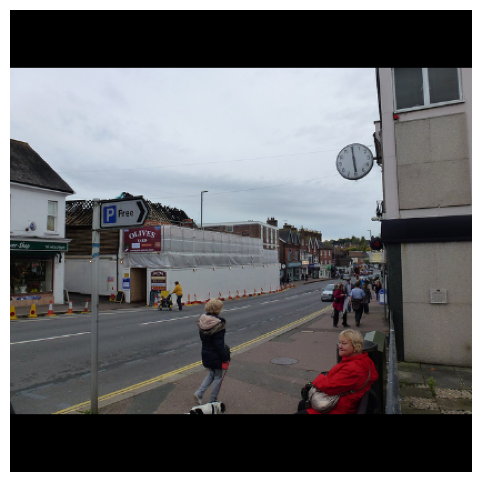

Epoch: 8


  0%|                                                                                                                               | 0/549 [00:07<?, ?it/s, loss=0.91]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                   | 2/549 [00:31<2:10:49, 14.35s/it, loss=0.912]

batch_idx: 1


  1%|▋                                                                                                                   | 3/549 [00:38<1:39:39, 10.95s/it, loss=0.845]

batch_idx: 2


  1%|▊                                                                                                                   | 4/549 [00:45<1:26:07,  9.48s/it, loss=0.836]

batch_idx: 3


  1%|█                                                                                                                   | 5/549 [00:52<1:17:54,  8.59s/it, loss=0.861]

batch_idx: 4


  1%|█▎                                                                                                                  | 6/549 [01:00<1:13:53,  8.16s/it, loss=0.849]

batch_idx: 5


  1%|█▍                                                                                                                   | 7/549 [01:07<1:10:06,  7.76s/it, loss=0.85]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:14<1:07:36,  7.50s/it, loss=0.85]

batch_idx: 7


  2%|█▉                                                                                                                  | 9/549 [01:21<1:08:23,  7.60s/it, loss=0.845]

batch_idx: 8


  2%|██                                                                                                                 | 10/549 [01:29<1:07:03,  7.47s/it, loss=0.844]

batch_idx: 9


  2%|██▎                                                                                                                | 11/549 [01:36<1:06:16,  7.39s/it, loss=0.839]

batch_idx: 10


  2%|██▌                                                                                                                | 12/549 [01:43<1:05:58,  7.37s/it, loss=0.843]

batch_idx: 11


  2%|██▋                                                                                                                | 13/549 [01:50<1:04:46,  7.25s/it, loss=0.846]

batch_idx: 12


  3%|██▉                                                                                                                | 14/549 [01:57<1:04:08,  7.19s/it, loss=0.839]

batch_idx: 13


  3%|███▏                                                                                                               | 15/549 [02:04<1:02:26,  7.02s/it, loss=0.844]

batch_idx: 14


  3%|███▎                                                                                                               | 16/549 [02:11<1:02:34,  7.04s/it, loss=0.838]

batch_idx: 15


  3%|███▌                                                                                                               | 17/549 [02:18<1:02:38,  7.06s/it, loss=0.837]

batch_idx: 16


  3%|███▊                                                                                                               | 18/549 [02:25<1:01:49,  6.99s/it, loss=0.836]

batch_idx: 17


  3%|███▉                                                                                                               | 19/549 [02:32<1:01:56,  7.01s/it, loss=0.835]

batch_idx: 18


  4%|████▏                                                                                                              | 20/549 [02:39<1:02:41,  7.11s/it, loss=0.845]

batch_idx: 19


  4%|████▍                                                                                                              | 21/549 [02:46<1:01:39,  7.01s/it, loss=0.846]

batch_idx: 20


  4%|████▌                                                                                                              | 22/549 [02:53<1:00:22,  6.87s/it, loss=0.842]

batch_idx: 21


  4%|████▊                                                                                                              | 23/549 [02:59<1:00:24,  6.89s/it, loss=0.836]

batch_idx: 22


  4%|█████                                                                                                              | 24/549 [03:06<1:00:29,  6.91s/it, loss=0.837]

batch_idx: 23


  5%|█████▏                                                                                                             | 25/549 [03:14<1:01:36,  7.05s/it, loss=0.836]

batch_idx: 24


  5%|█████▍                                                                                                             | 26/549 [03:21<1:01:42,  7.08s/it, loss=0.832]

batch_idx: 25


  5%|█████▋                                                                                                             | 27/549 [03:28<1:01:24,  7.06s/it, loss=0.839]

batch_idx: 26


  5%|█████▊                                                                                                             | 28/549 [03:35<1:00:09,  6.93s/it, loss=0.845]

batch_idx: 27


  5%|██████▏                                                                                                             | 29/549 [03:42<1:00:30,  6.98s/it, loss=0.85]

batch_idx: 28


  5%|██████▎                                                                                                            | 30/549 [03:49<1:00:39,  7.01s/it, loss=0.852]

batch_idx: 29


  6%|██████▌                                                                                                              | 31/549 [03:55<59:19,  6.87s/it, loss=0.852]

batch_idx: 30


  6%|██████▊                                                                                                              | 32/549 [04:02<59:21,  6.89s/it, loss=0.852]

batch_idx: 31


  6%|███████                                                                                                              | 33/549 [04:09<59:21,  6.90s/it, loss=0.852]

batch_idx: 32


  6%|███████▏                                                                                                            | 34/549 [04:17<1:00:54,  7.10s/it, loss=0.85]

batch_idx: 33


  6%|███████▍                                                                                                             | 35/549 [04:23<59:09,  6.91s/it, loss=0.855]

batch_idx: 34


  7%|███████▌                                                                                                           | 36/549 [04:31<1:00:12,  7.04s/it, loss=0.858]

batch_idx: 35


  7%|███████▊                                                                                                           | 37/549 [04:38<1:00:47,  7.12s/it, loss=0.855]

batch_idx: 36


  7%|███████▉                                                                                                           | 38/549 [04:45<1:00:47,  7.14s/it, loss=0.855]

batch_idx: 37


  7%|████████▏                                                                                                          | 39/549 [04:53<1:01:56,  7.29s/it, loss=0.852]

batch_idx: 38


  7%|████████▍                                                                                                          | 40/549 [05:00<1:01:25,  7.24s/it, loss=0.853]

batch_idx: 39


  7%|████████▌                                                                                                          | 41/549 [05:07<1:00:22,  7.13s/it, loss=0.855]

batch_idx: 40


  8%|████████▉                                                                                                            | 42/549 [05:14<59:32,  7.05s/it, loss=0.852]

batch_idx: 41


  8%|█████████▏                                                                                                           | 43/549 [05:21<59:19,  7.03s/it, loss=0.851]

batch_idx: 42


  8%|█████████▍                                                                                                            | 44/549 [05:27<58:12,  6.92s/it, loss=0.85]

batch_idx: 43


  8%|█████████▌                                                                                                           | 45/549 [05:34<57:34,  6.85s/it, loss=0.853]

batch_idx: 44


  9%|██████████▎                                                                                                           | 48/549 [05:55<58:23,  6.99s/it, loss=0.85]

batch_idx: 47


  9%|██████████▍                                                                                                          | 49/549 [06:03<59:22,  7.13s/it, loss=0.852]

batch_idx: 48


  9%|██████████▋                                                                                                          | 50/549 [06:10<59:46,  7.19s/it, loss=0.852]

batch_idx: 49


  9%|██████████▋                                                                                                          | 50/549 [06:18<59:46,  7.19s/it, loss=0.854]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                        | 52/549 [06:39<1:23:57, 10.14s/it, loss=0.853]

batch_idx: 51


 10%|███████████                                                                                                        | 53/549 [06:46<1:16:23,  9.24s/it, loss=0.852]

batch_idx: 52


 10%|███████████▎                                                                                                       | 54/549 [06:52<1:09:26,  8.42s/it, loss=0.852]

batch_idx: 53


 10%|███████████▌                                                                                                       | 55/549 [07:00<1:06:23,  8.06s/it, loss=0.853]

batch_idx: 54


 10%|███████████▋                                                                                                       | 56/549 [07:07<1:04:56,  7.90s/it, loss=0.853]

batch_idx: 55


 10%|███████████▉                                                                                                       | 57/549 [07:14<1:02:04,  7.57s/it, loss=0.854]

batch_idx: 56


 11%|████████████▏                                                                                                      | 58/549 [07:21<1:00:10,  7.35s/it, loss=0.853]

batch_idx: 57


 11%|████████████▌                                                                                                        | 59/549 [07:28<58:42,  7.19s/it, loss=0.851]

batch_idx: 58


 11%|████████████▊                                                                                                        | 60/549 [07:34<56:10,  6.89s/it, loss=0.849]

batch_idx: 59


 11%|█████████████                                                                                                         | 61/549 [07:41<57:23,  7.06s/it, loss=0.85]

batch_idx: 60


 11%|█████████████▏                                                                                                       | 62/549 [07:49<58:07,  7.16s/it, loss=0.848]

batch_idx: 61


 11%|█████████████▍                                                                                                       | 63/549 [07:55<57:05,  7.05s/it, loss=0.847]

batch_idx: 62


 12%|█████████████▋                                                                                                       | 64/549 [08:02<56:48,  7.03s/it, loss=0.845]

batch_idx: 63


 12%|█████████████▊                                                                                                       | 65/549 [08:10<57:07,  7.08s/it, loss=0.844]

batch_idx: 64


 12%|██████████████                                                                                                       | 66/549 [08:16<56:06,  6.97s/it, loss=0.843]

batch_idx: 65


 12%|██████████████▎                                                                                                      | 67/549 [08:23<55:10,  6.87s/it, loss=0.846]

batch_idx: 66


 12%|██████████████▍                                                                                                      | 68/549 [08:30<55:55,  6.98s/it, loss=0.846]

batch_idx: 67


 13%|██████████████▋                                                                                                      | 69/549 [08:37<55:36,  6.95s/it, loss=0.846]

batch_idx: 68


 13%|██████████████▉                                                                                                      | 70/549 [08:44<55:13,  6.92s/it, loss=0.848]

batch_idx: 69


 13%|███████████████▏                                                                                                     | 71/549 [08:51<55:04,  6.91s/it, loss=0.847]

batch_idx: 70


 13%|███████████████▎                                                                                                     | 72/549 [08:58<55:21,  6.96s/it, loss=0.848]

batch_idx: 71


 13%|███████████████▋                                                                                                      | 73/549 [09:04<53:28,  6.74s/it, loss=0.85]

batch_idx: 72


 13%|███████████████▊                                                                                                     | 74/549 [09:11<53:58,  6.82s/it, loss=0.852]

batch_idx: 73


 14%|███████████████▉                                                                                                     | 75/549 [09:19<55:33,  7.03s/it, loss=0.851]

batch_idx: 74


 14%|████████████████▏                                                                                                    | 76/549 [09:26<55:42,  7.07s/it, loss=0.851]

batch_idx: 75


 14%|████████████████▌                                                                                                     | 77/549 [09:33<55:18,  7.03s/it, loss=0.85]

batch_idx: 76


 14%|████████████████▌                                                                                                    | 78/549 [09:40<56:06,  7.15s/it, loss=0.849]

batch_idx: 77


 14%|████████████████▊                                                                                                    | 79/549 [09:47<54:53,  7.01s/it, loss=0.847]

batch_idx: 78


 15%|█████████████████                                                                                                    | 80/549 [09:54<55:43,  7.13s/it, loss=0.849]

batch_idx: 79


 15%|█████████████████▎                                                                                                   | 81/549 [10:01<55:22,  7.10s/it, loss=0.851]

batch_idx: 80


 15%|█████████████████▍                                                                                                   | 82/549 [10:08<53:53,  6.92s/it, loss=0.852]

batch_idx: 81


 15%|█████████████████▊                                                                                                    | 83/549 [10:14<52:57,  6.82s/it, loss=0.85]

batch_idx: 82


 15%|█████████████████▉                                                                                                   | 84/549 [10:22<55:03,  7.10s/it, loss=0.851]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:29<54:54,  7.10s/it, loss=0.85]

batch_idx: 84


 16%|██████████████████▎                                                                                                  | 86/549 [10:36<54:44,  7.09s/it, loss=0.849]

batch_idx: 85


 16%|██████████████████▌                                                                                                  | 87/549 [10:43<53:18,  6.92s/it, loss=0.847]

batch_idx: 86


 16%|██████████████████▊                                                                                                  | 88/549 [10:50<54:40,  7.12s/it, loss=0.847]

batch_idx: 87


 16%|██████████████████▉                                                                                                  | 89/549 [10:57<53:49,  7.02s/it, loss=0.848]

batch_idx: 88


 16%|███████████████████▏                                                                                                 | 90/549 [11:04<53:58,  7.06s/it, loss=0.849]

batch_idx: 89


 17%|███████████████████▍                                                                                                 | 91/549 [11:12<54:15,  7.11s/it, loss=0.849]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:19<54:22,  7.14s/it, loss=0.848]

batch_idx: 91


 17%|███████████████████▊                                                                                                 | 93/549 [11:26<53:29,  7.04s/it, loss=0.849]

batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:32<52:34,  6.93s/it, loss=0.852]

batch_idx: 93


 17%|████████████████████▏                                                                                                | 95/549 [11:39<52:54,  6.99s/it, loss=0.852]

batch_idx: 94


 17%|████████████████████▍                                                                                                | 96/549 [11:46<52:21,  6.94s/it, loss=0.851]

batch_idx: 95


 18%|████████████████████▋                                                                                                | 97/549 [11:54<53:10,  7.06s/it, loss=0.849]

batch_idx: 96


 18%|████████████████████▉                                                                                                | 98/549 [12:00<51:07,  6.80s/it, loss=0.847]

batch_idx: 97


 18%|█████████████████████                                                                                                | 99/549 [12:07<52:13,  6.96s/it, loss=0.847]

batch_idx: 98


 18%|█████████████████████▏                                                                                              | 100/549 [12:14<51:58,  6.95s/it, loss=0.848]

batch_idx: 99


 18%|█████████████████████▏                                                                                              | 100/549 [12:21<51:58,  6.95s/it, loss=0.846]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▏                                                                                            | 102/549 [12:38<1:08:41,  9.22s/it, loss=0.846]

batch_idx: 101


 19%|█████████████████████▍                                                                                            | 103/549 [12:46<1:04:10,  8.63s/it, loss=0.848]

batch_idx: 102


 19%|█████████████████████▉                                                                                              | 104/549 [12:52<59:25,  8.01s/it, loss=0.846]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [13:00<57:30,  7.77s/it, loss=0.847]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [13:06<54:47,  7.42s/it, loss=0.845]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:13<52:57,  7.19s/it, loss=0.844]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:20<53:30,  7.28s/it, loss=0.845]

batch_idx: 107


 20%|███████████████████████                                                                                             | 109/549 [13:27<52:42,  7.19s/it, loss=0.847]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:34<52:32,  7.18s/it, loss=0.847]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:41<51:49,  7.10s/it, loss=0.846]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:48<51:37,  7.09s/it, loss=0.846]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [13:56<52:05,  7.17s/it, loss=0.845]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [14:03<51:25,  7.09s/it, loss=0.845]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [14:10<52:15,  7.22s/it, loss=0.844]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:17<51:34,  7.15s/it, loss=0.844]

batch_idx: 115


 21%|████████████████████████▋                                                                                           | 117/549 [14:25<52:03,  7.23s/it, loss=0.844]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:32<52:12,  7.27s/it, loss=0.843]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:39<52:19,  7.30s/it, loss=0.842]

batch_idx: 118


 22%|█████████████████████████▎                                                                                          | 120/549 [14:46<51:09,  7.15s/it, loss=0.842]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:53<51:11,  7.18s/it, loss=0.842]

batch_idx: 120


 22%|█████████████████████████▊                                                                                          | 122/549 [15:00<49:51,  7.00s/it, loss=0.841]

batch_idx: 121


 22%|█████████████████████████▉                                                                                          | 123/549 [15:07<50:26,  7.11s/it, loss=0.841]

batch_idx: 122


 23%|██████████████████████████▏                                                                                         | 124/549 [15:14<50:22,  7.11s/it, loss=0.842]

batch_idx: 123


 23%|██████████████████████████▍                                                                                         | 125/549 [15:21<49:29,  7.00s/it, loss=0.842]

batch_idx: 124


 23%|██████████████████████████▌                                                                                         | 126/549 [15:28<49:19,  7.00s/it, loss=0.842]

batch_idx: 125


 23%|██████████████████████████▊                                                                                         | 127/549 [15:35<49:05,  6.98s/it, loss=0.842]

batch_idx: 126


 23%|███████████████████████████                                                                                         | 128/549 [15:42<48:53,  6.97s/it, loss=0.842]

batch_idx: 127


 23%|███████████████████████████▎                                                                                        | 129/549 [15:49<47:55,  6.85s/it, loss=0.844]

batch_idx: 128


 24%|███████████████████████████▍                                                                                        | 130/549 [15:56<48:07,  6.89s/it, loss=0.845]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [16:02<47:54,  6.88s/it, loss=0.844]

batch_idx: 130


 24%|███████████████████████████▉                                                                                        | 132/549 [16:09<48:10,  6.93s/it, loss=0.844]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:16<48:04,  6.93s/it, loss=0.847]

batch_idx: 132


 24%|████████████████████████████▎                                                                                       | 134/549 [16:23<47:38,  6.89s/it, loss=0.847]

batch_idx: 133


 25%|████████████████████████████▌                                                                                       | 135/549 [16:30<47:15,  6.85s/it, loss=0.847]

batch_idx: 134


 25%|████████████████████████████▋                                                                                       | 136/549 [16:37<47:55,  6.96s/it, loss=0.846]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:44<48:05,  7.00s/it, loss=0.847]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:52<49:02,  7.16s/it, loss=0.846]

batch_idx: 137


 25%|█████████████████████████████▎                                                                                      | 139/549 [16:59<49:19,  7.22s/it, loss=0.847]

batch_idx: 138


 26%|█████████████████████████████▌                                                                                      | 140/549 [17:06<48:36,  7.13s/it, loss=0.847]

batch_idx: 139


 26%|█████████████████████████████▊                                                                                      | 141/549 [17:14<49:21,  7.26s/it, loss=0.847]

batch_idx: 140


 26%|██████████████████████████████                                                                                      | 142/549 [17:20<47:50,  7.05s/it, loss=0.847]

batch_idx: 141


 26%|██████████████████████████████▏                                                                                     | 143/549 [17:27<48:09,  7.12s/it, loss=0.849]

batch_idx: 142


 26%|██████████████████████████████▋                                                                                      | 144/549 [17:34<47:05,  6.98s/it, loss=0.85]

batch_idx: 143


 26%|██████████████████████████████▉                                                                                      | 145/549 [17:41<47:21,  7.03s/it, loss=0.85]

batch_idx: 144


 27%|██████████████████████████████▊                                                                                     | 146/549 [17:49<47:37,  7.09s/it, loss=0.849]

batch_idx: 145


 27%|███████████████████████████████                                                                                     | 147/549 [17:55<46:48,  6.99s/it, loss=0.852]

batch_idx: 146


 27%|███████████████████████████████▎                                                                                    | 148/549 [18:02<46:05,  6.90s/it, loss=0.853]

batch_idx: 147


 27%|███████████████████████████████▍                                                                                    | 149/549 [18:09<47:00,  7.05s/it, loss=0.853]

batch_idx: 148


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:16<46:39,  7.02s/it, loss=0.854]

batch_idx: 149


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:24<46:39,  7.02s/it, loss=0.853]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▌                                                                                  | 152/549 [18:45<1:06:34, 10.06s/it, loss=0.852]

batch_idx: 151


 28%|███████████████████████████████▊                                                                                  | 153/549 [18:52<1:00:18,  9.14s/it, loss=0.852]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [18:59<56:53,  8.64s/it, loss=0.853]

batch_idx: 153


 28%|████████████████████████████████▊                                                                                   | 155/549 [19:06<53:29,  8.15s/it, loss=0.853]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [19:13<50:43,  7.75s/it, loss=0.853]

batch_idx: 155


 29%|█████████████████████████████████▌                                                                                  | 159/549 [19:35<48:35,  7.48s/it, loss=0.853]

batch_idx: 158


 29%|█████████████████████████████████▊                                                                                  | 160/549 [19:42<47:45,  7.37s/it, loss=0.852]

batch_idx: 159


 29%|██████████████████████████████████                                                                                  | 161/549 [19:49<47:00,  7.27s/it, loss=0.852]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:55<45:32,  7.06s/it, loss=0.853]

batch_idx: 161


 30%|██████████████████████████████████▍                                                                                 | 163/549 [20:02<45:09,  7.02s/it, loss=0.853]

batch_idx: 162


 30%|██████████████████████████████████▋                                                                                 | 164/549 [20:09<45:30,  7.09s/it, loss=0.853]

batch_idx: 163


 30%|██████████████████████████████████▊                                                                                 | 165/549 [20:17<46:13,  7.22s/it, loss=0.852]

batch_idx: 164


 30%|███████████████████████████████████                                                                                 | 166/549 [20:24<45:13,  7.09s/it, loss=0.853]

batch_idx: 165


 30%|███████████████████████████████████▎                                                                                | 167/549 [20:31<45:30,  7.15s/it, loss=0.853]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:39<45:59,  7.24s/it, loss=0.853]

batch_idx: 167


 31%|███████████████████████████████████▋                                                                                | 169/549 [20:46<45:25,  7.17s/it, loss=0.852]

batch_idx: 168


 31%|███████████████████████████████████▉                                                                                | 170/549 [20:53<45:24,  7.19s/it, loss=0.854]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [21:00<45:27,  7.22s/it, loss=0.854]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [21:07<43:59,  7.00s/it, loss=0.854]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [21:14<43:57,  7.02s/it, loss=0.852]

batch_idx: 172


 32%|████████████████████████████████████▊                                                                               | 174/549 [21:21<43:46,  7.00s/it, loss=0.852]

batch_idx: 173


 32%|████████████████████████████████████▉                                                                               | 175/549 [21:27<42:34,  6.83s/it, loss=0.852]

batch_idx: 174


 32%|█████████████████████████████████████▏                                                                              | 176/549 [21:34<43:04,  6.93s/it, loss=0.852]

batch_idx: 175


 32%|█████████████████████████████████████▍                                                                              | 177/549 [21:41<42:39,  6.88s/it, loss=0.851]

batch_idx: 176


 32%|█████████████████████████████████████▌                                                                              | 178/549 [21:48<42:17,  6.84s/it, loss=0.853]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [21:55<43:22,  7.03s/it, loss=0.852]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [22:02<42:46,  6.96s/it, loss=0.853]

batch_idx: 179


 33%|██████████████████████████████████████▏                                                                             | 181/549 [22:09<43:14,  7.05s/it, loss=0.853]

batch_idx: 180


 33%|██████████████████████████████████████▍                                                                             | 182/549 [22:16<42:12,  6.90s/it, loss=0.855]

batch_idx: 181


 33%|██████████████████████████████████████▋                                                                             | 183/549 [22:22<41:28,  6.80s/it, loss=0.855]

batch_idx: 182


 34%|██████████████████████████████████████▉                                                                             | 184/549 [22:29<41:12,  6.77s/it, loss=0.854]

batch_idx: 183


 34%|███████████████████████████████████████                                                                             | 185/549 [22:36<42:23,  6.99s/it, loss=0.854]

batch_idx: 184


 34%|███████████████████████████████████████▎                                                                            | 186/549 [22:44<42:48,  7.08s/it, loss=0.853]

batch_idx: 185


 34%|███████████████████████████████████████▌                                                                            | 187/549 [22:51<42:33,  7.05s/it, loss=0.854]

batch_idx: 186


 34%|███████████████████████████████████████▋                                                                            | 188/549 [22:58<41:52,  6.96s/it, loss=0.854]

batch_idx: 187


 34%|███████████████████████████████████████▉                                                                            | 189/549 [23:04<41:44,  6.96s/it, loss=0.854]

batch_idx: 188


 35%|████████████████████████████████████████▏                                                                           | 190/549 [23:11<41:19,  6.91s/it, loss=0.854]

batch_idx: 189


 35%|████████████████████████████████████████▎                                                                           | 191/549 [23:18<40:49,  6.84s/it, loss=0.854]

batch_idx: 190


 35%|████████████████████████████████████████▌                                                                           | 192/549 [23:25<41:19,  6.94s/it, loss=0.854]

batch_idx: 191


 35%|████████████████████████████████████████▊                                                                           | 193/549 [23:31<39:51,  6.72s/it, loss=0.854]

batch_idx: 192


 35%|████████████████████████████████████████▉                                                                           | 194/549 [23:39<40:45,  6.89s/it, loss=0.854]

batch_idx: 193


 36%|█████████████████████████████████████████▏                                                                          | 195/549 [23:46<41:27,  7.03s/it, loss=0.854]

batch_idx: 194


 36%|█████████████████████████████████████████▍                                                                          | 196/549 [23:53<41:17,  7.02s/it, loss=0.854]

batch_idx: 195


 36%|█████████████████████████████████████████▌                                                                          | 197/549 [24:00<40:28,  6.90s/it, loss=0.854]

batch_idx: 196


 36%|█████████████████████████████████████████▊                                                                          | 198/549 [24:07<41:46,  7.14s/it, loss=0.854]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [24:13<39:46,  6.82s/it, loss=0.854]

batch_idx: 198


 37%|██████████████████████████████████████████▋                                                                         | 202/549 [24:48<57:09,  9.88s/it, loss=0.854]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [24:55<51:40,  8.96s/it, loss=0.854]

batch_idx: 202


 37%|███████████████████████████████████████████                                                                         | 204/549 [25:02<47:29,  8.26s/it, loss=0.853]

batch_idx: 203


 37%|███████████████████████████████████████████▎                                                                        | 205/549 [25:09<45:30,  7.94s/it, loss=0.853]

batch_idx: 204


 38%|███████████████████████████████████████████▌                                                                        | 206/549 [25:16<43:41,  7.64s/it, loss=0.853]

batch_idx: 205


 38%|███████████████████████████████████████████▋                                                                        | 207/549 [25:23<42:18,  7.42s/it, loss=0.852]

batch_idx: 206


 38%|███████████████████████████████████████████▉                                                                        | 208/549 [25:30<41:49,  7.36s/it, loss=0.852]

batch_idx: 207


 38%|████████████████████████████████████████████▏                                                                       | 209/549 [25:37<40:40,  7.18s/it, loss=0.852]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:44<40:10,  7.11s/it, loss=0.852]

batch_idx: 209


 38%|████████████████████████████████████████████▌                                                                       | 211/549 [25:51<40:14,  7.14s/it, loss=0.852]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [25:58<40:09,  7.15s/it, loss=0.852]

batch_idx: 211


 39%|█████████████████████████████████████████████                                                                       | 213/549 [26:05<39:39,  7.08s/it, loss=0.852]

batch_idx: 212


 39%|█████████████████████████████████████████████▏                                                                      | 214/549 [26:12<38:22,  6.87s/it, loss=0.851]

batch_idx: 213


 39%|█████████████████████████████████████████████▍                                                                      | 215/549 [26:19<38:31,  6.92s/it, loss=0.851]

batch_idx: 214


 39%|█████████████████████████████████████████████▋                                                                      | 216/549 [26:25<37:29,  6.75s/it, loss=0.852]

batch_idx: 215


 40%|█████████████████████████████████████████████▊                                                                      | 217/549 [26:32<38:33,  6.97s/it, loss=0.852]

batch_idx: 216


 40%|██████████████████████████████████████████████                                                                      | 218/549 [26:40<38:54,  7.05s/it, loss=0.851]

batch_idx: 217


 40%|██████████████████████████████████████████████▎                                                                     | 219/549 [26:46<38:16,  6.96s/it, loss=0.852]

batch_idx: 218


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [26:54<38:23,  7.00s/it, loss=0.852]

batch_idx: 219


 40%|██████████████████████████████████████████████▋                                                                     | 221/549 [27:00<38:10,  6.98s/it, loss=0.852]

batch_idx: 220


 40%|██████████████████████████████████████████████▉                                                                     | 222/549 [27:08<38:39,  7.09s/it, loss=0.853]

batch_idx: 221


 41%|███████████████████████████████████████████████                                                                     | 223/549 [27:15<38:05,  7.01s/it, loss=0.852]

batch_idx: 222


 42%|████████████████████████████████████████████████▊                                                                    | 229/549 [27:57<37:42,  7.07s/it, loss=0.85]

batch_idx: 228


 42%|█████████████████████████████████████████████████                                                                    | 230/549 [28:03<36:30,  6.87s/it, loss=0.85]

batch_idx: 229


 42%|████████████████████████████████████████████████▊                                                                   | 231/549 [28:10<36:33,  6.90s/it, loss=0.851]

batch_idx: 230


 42%|█████████████████████████████████████████████████                                                                   | 232/549 [28:17<36:38,  6.93s/it, loss=0.851]

batch_idx: 231


 42%|█████████████████████████████████████████████████▋                                                                   | 233/549 [28:24<36:36,  6.95s/it, loss=0.85]

batch_idx: 232


 43%|█████████████████████████████████████████████████▊                                                                   | 234/549 [28:32<37:21,  7.12s/it, loss=0.85]

batch_idx: 233


 43%|██████████████████████████████████████████████████                                                                   | 235/549 [28:40<38:05,  7.28s/it, loss=0.85]

batch_idx: 234


 43%|██████████████████████████████████████████████████▎                                                                  | 236/549 [28:46<37:13,  7.14s/it, loss=0.85]

batch_idx: 235


 43%|██████████████████████████████████████████████████                                                                  | 237/549 [28:53<36:57,  7.11s/it, loss=0.851]

batch_idx: 236


 43%|██████████████████████████████████████████████████▎                                                                 | 238/549 [29:00<36:02,  6.95s/it, loss=0.852]

batch_idx: 237


 44%|██████████████████████████████████████████████████▍                                                                 | 239/549 [29:07<36:10,  7.00s/it, loss=0.851]

batch_idx: 238


 44%|██████████████████████████████████████████████████▋                                                                 | 240/549 [29:15<37:11,  7.22s/it, loss=0.851]

batch_idx: 239


 44%|██████████████████████████████████████████████████▉                                                                 | 241/549 [29:22<36:14,  7.06s/it, loss=0.851]

batch_idx: 240


 44%|███████████████████████████████████████████████████▏                                                                | 242/549 [29:29<36:00,  7.04s/it, loss=0.851]

batch_idx: 241


 45%|████████████████████████████████████████████████████▍                                                               | 248/549 [30:12<36:35,  7.29s/it, loss=0.852]

batch_idx: 247


 45%|████████████████████████████████████████████████████▌                                                               | 249/549 [30:19<35:33,  7.11s/it, loss=0.851]

batch_idx: 248


 46%|████████████████████████████████████████████████████▊                                                               | 250/549 [30:26<35:28,  7.12s/it, loss=0.851]

batch_idx: 249


 46%|█████████████████████████████████████████████████████▎                                                               | 250/549 [30:33<35:28,  7.12s/it, loss=0.85]

batch_idx: 250
==> Saving checkpoint


 46%|█████████████████████████████████████████████████████▋                                                               | 252/549 [30:54<49:46, 10.05s/it, loss=0.85]

batch_idx: 251


 46%|█████████████████████████████████████████████████████▉                                                               | 253/549 [31:01<44:52,  9.10s/it, loss=0.85]

batch_idx: 252


 46%|██████████████████████████████████████████████████████▏                                                              | 254/549 [31:08<40:36,  8.26s/it, loss=0.85]

batch_idx: 253


 46%|█████████████████████████████████████████████████████▉                                                              | 255/549 [31:15<38:45,  7.91s/it, loss=0.849]

batch_idx: 254


 47%|██████████████████████████████████████████████████████                                                              | 256/549 [31:22<37:35,  7.70s/it, loss=0.849]

batch_idx: 255


 47%|██████████████████████████████████████████████████████▎                                                             | 257/549 [31:29<36:27,  7.49s/it, loss=0.849]

batch_idx: 256


 47%|██████████████████████████████████████████████████████▌                                                             | 258/549 [31:36<35:12,  7.26s/it, loss=0.848]

batch_idx: 257


 47%|██████████████████████████████████████████████████████▋                                                             | 259/549 [31:42<34:29,  7.14s/it, loss=0.848]

batch_idx: 258


 47%|██████████████████████████████████████████████████████▉                                                             | 260/549 [31:50<34:18,  7.12s/it, loss=0.848]

batch_idx: 259


 48%|███████████████████████████████████████████████████████▏                                                            | 261/549 [31:56<33:48,  7.04s/it, loss=0.847]

batch_idx: 260


 48%|███████████████████████████████████████████████████████▎                                                            | 262/549 [32:03<33:26,  6.99s/it, loss=0.847]

batch_idx: 261


 48%|███████████████████████████████████████████████████████▌                                                            | 263/549 [32:10<32:35,  6.84s/it, loss=0.846]

batch_idx: 262


 48%|███████████████████████████████████████████████████████▊                                                            | 264/549 [32:17<32:40,  6.88s/it, loss=0.846]

batch_idx: 263


 48%|███████████████████████████████████████████████████████▉                                                            | 265/549 [32:24<32:46,  6.92s/it, loss=0.846]

batch_idx: 264


 48%|████████████████████████████████████████████████████████▏                                                           | 266/549 [32:31<32:42,  6.93s/it, loss=0.846]

batch_idx: 265


 49%|████████████████████████████████████████████████████████▍                                                           | 267/549 [32:37<32:11,  6.85s/it, loss=0.846]

batch_idx: 266


 49%|████████████████████████████████████████████████████████▋                                                           | 268/549 [32:44<32:02,  6.84s/it, loss=0.846]

batch_idx: 267


 49%|████████████████████████████████████████████████████████▊                                                           | 269/549 [32:52<32:39,  7.00s/it, loss=0.846]

batch_idx: 268


 49%|█████████████████████████████████████████████████████████                                                           | 270/549 [32:58<32:09,  6.92s/it, loss=0.845]

batch_idx: 269


 49%|█████████████████████████████████████████████████████████▎                                                          | 271/549 [33:05<32:08,  6.94s/it, loss=0.844]

batch_idx: 270


 50%|█████████████████████████████████████████████████████████▍                                                          | 272/549 [33:12<32:01,  6.94s/it, loss=0.844]

batch_idx: 271


 50%|█████████████████████████████████████████████████████████▋                                                          | 273/549 [33:20<32:59,  7.17s/it, loss=0.844]

batch_idx: 272


 50%|█████████████████████████████████████████████████████████▉                                                          | 274/549 [33:27<33:07,  7.23s/it, loss=0.844]

batch_idx: 273


 50%|██████████████████████████████████████████████████████████                                                          | 275/549 [33:34<32:40,  7.16s/it, loss=0.844]

batch_idx: 274


 50%|██████████████████████████████████████████████████████████▎                                                         | 276/549 [33:41<31:54,  7.01s/it, loss=0.844]

batch_idx: 275


 50%|██████████████████████████████████████████████████████████▌                                                         | 277/549 [33:49<32:33,  7.18s/it, loss=0.844]

batch_idx: 276


 51%|██████████████████████████████████████████████████████████▋                                                         | 278/549 [33:55<31:57,  7.08s/it, loss=0.844]

batch_idx: 277


 51%|██████████████████████████████████████████████████████████▉                                                         | 279/549 [34:02<31:30,  7.00s/it, loss=0.843]

batch_idx: 278


 51%|███████████████████████████████████████████████████████████▏                                                        | 280/549 [34:09<31:30,  7.03s/it, loss=0.844]

batch_idx: 279


 51%|███████████████████████████████████████████████████████████▎                                                        | 281/549 [34:16<31:08,  6.97s/it, loss=0.844]

batch_idx: 280


 51%|███████████████████████████████████████████████████████████▌                                                        | 282/549 [34:23<31:31,  7.08s/it, loss=0.843]

batch_idx: 281


 52%|███████████████████████████████████████████████████████████▊                                                        | 283/549 [34:31<31:21,  7.07s/it, loss=0.843]

batch_idx: 282


 52%|████████████████████████████████████████████████████████████                                                        | 284/549 [34:36<29:43,  6.73s/it, loss=0.843]

batch_idx: 283


 52%|████████████████████████████████████████████████████████████▏                                                       | 285/549 [34:43<29:18,  6.66s/it, loss=0.843]

batch_idx: 284


 52%|████████████████████████████████████████████████████████████▍                                                       | 286/549 [34:50<29:32,  6.74s/it, loss=0.843]

batch_idx: 285


 52%|████████████████████████████████████████████████████████████▋                                                       | 287/549 [34:57<29:42,  6.80s/it, loss=0.843]

batch_idx: 286


 52%|████████████████████████████████████████████████████████████▊                                                       | 288/549 [35:04<29:30,  6.78s/it, loss=0.843]

batch_idx: 287


 53%|█████████████████████████████████████████████████████████████                                                       | 289/549 [35:10<29:09,  6.73s/it, loss=0.842]

batch_idx: 288


 53%|█████████████████████████████████████████████████████████████▎                                                      | 290/549 [35:17<29:08,  6.75s/it, loss=0.842]

batch_idx: 289


 53%|█████████████████████████████████████████████████████████████▍                                                      | 291/549 [35:23<28:43,  6.68s/it, loss=0.842]

batch_idx: 290


 53%|█████████████████████████████████████████████████████████████▋                                                      | 292/549 [35:31<29:46,  6.95s/it, loss=0.841]

batch_idx: 291


 53%|█████████████████████████████████████████████████████████████▉                                                      | 293/549 [35:38<29:31,  6.92s/it, loss=0.841]

batch_idx: 292


 54%|██████████████████████████████████████████████████████████████▋                                                      | 294/549 [35:45<29:19,  6.90s/it, loss=0.84]

batch_idx: 293


 54%|██████████████████████████████████████████████████████████████▊                                                      | 295/549 [35:52<29:40,  7.01s/it, loss=0.84]

batch_idx: 294


 54%|███████████████████████████████████████████████████████████████                                                      | 296/549 [35:59<29:30,  7.00s/it, loss=0.84]

batch_idx: 295


 54%|███████████████████████████████████████████████████████████████▎                                                     | 297/549 [36:06<29:42,  7.07s/it, loss=0.84]

batch_idx: 296


 54%|███████████████████████████████████████████████████████████████▌                                                     | 298/549 [36:13<29:38,  7.08s/it, loss=0.84]

batch_idx: 297


 54%|███████████████████████████████████████████████████████████████▋                                                     | 299/549 [36:20<29:23,  7.05s/it, loss=0.84]

batch_idx: 298


 55%|███████████████████████████████████████████████████████████████▍                                                    | 300/549 [36:27<28:35,  6.89s/it, loss=0.841]

batch_idx: 299


 55%|███████████████████████████████████████████████████████████████▍                                                    | 300/549 [36:34<28:35,  6.89s/it, loss=0.841]

batch_idx: 300
==> Saving checkpoint


 55%|███████████████████████████████████████████████████████████████▊                                                    | 302/549 [36:54<40:27,  9.83s/it, loss=0.841]

batch_idx: 301


 55%|████████████████████████████████████████████████████████████████                                                    | 303/549 [37:01<36:53,  9.00s/it, loss=0.841]

batch_idx: 302


 55%|████████████████████████████████████████████████████████████████▏                                                   | 304/549 [37:08<33:57,  8.32s/it, loss=0.841]

batch_idx: 303


 56%|█████████████████████████████████████████████████████████████████                                                    | 305/549 [37:15<32:27,  7.98s/it, loss=0.84]

batch_idx: 304


 56%|████████████████████████████████████████████████████████████████▋                                                   | 306/549 [37:22<31:09,  7.70s/it, loss=0.841]

batch_idx: 305


 56%|████████████████████████████████████████████████████████████████▊                                                   | 307/549 [37:30<30:37,  7.59s/it, loss=0.841]

batch_idx: 306


 56%|█████████████████████████████████████████████████████████████████                                                   | 308/549 [37:36<29:19,  7.30s/it, loss=0.841]

batch_idx: 307


 56%|█████████████████████████████████████████████████████████████████▊                                                   | 309/549 [37:43<28:43,  7.18s/it, loss=0.84]

batch_idx: 308


 56%|██████████████████████████████████████████████████████████████████                                                   | 310/549 [37:50<28:35,  7.18s/it, loss=0.84]

batch_idx: 309


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 311/549 [37:57<28:17,  7.13s/it, loss=0.84]

batch_idx: 310


 57%|██████████████████████████████████████████████████████████████████▍                                                  | 312/549 [38:04<27:31,  6.97s/it, loss=0.84]

batch_idx: 311


 57%|██████████████████████████████████████████████████████████████████▏                                                 | 313/549 [38:11<27:36,  7.02s/it, loss=0.841]

batch_idx: 312


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 314/549 [38:18<27:44,  7.08s/it, loss=0.842]

batch_idx: 313


 57%|██████████████████████████████████████████████████████████████████▌                                                 | 315/549 [38:25<27:14,  6.99s/it, loss=0.842]

batch_idx: 314


 58%|██████████████████████████████████████████████████████████████████▊                                                 | 316/549 [38:32<27:19,  7.03s/it, loss=0.841]

batch_idx: 315


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 317/549 [38:40<27:37,  7.15s/it, loss=0.841]

batch_idx: 316


 58%|███████████████████████████████████████████████████████████████████▏                                                | 318/549 [38:47<27:18,  7.09s/it, loss=0.841]

batch_idx: 317


 58%|███████████████████████████████████████████████████████████████████▍                                                | 319/549 [38:53<26:13,  6.84s/it, loss=0.842]

batch_idx: 318


 58%|███████████████████████████████████████████████████████████████████▌                                                | 320/549 [39:00<26:44,  7.01s/it, loss=0.842]

batch_idx: 319


 58%|███████████████████████████████████████████████████████████████████▊                                                | 321/549 [39:08<26:56,  7.09s/it, loss=0.841]

batch_idx: 320


 59%|████████████████████████████████████████████████████████████████████                                                | 322/549 [39:15<26:42,  7.06s/it, loss=0.841]

batch_idx: 321


 59%|████████████████████████████████████████████████████████████████████▏                                               | 323/549 [39:21<26:19,  6.99s/it, loss=0.841]

batch_idx: 322


 59%|████████████████████████████████████████████████████████████████████▍                                               | 324/549 [39:28<25:38,  6.84s/it, loss=0.842]

batch_idx: 323


 59%|████████████████████████████████████████████████████████████████████▋                                               | 325/549 [39:35<26:06,  6.99s/it, loss=0.842]

batch_idx: 324


 59%|████████████████████████████████████████████████████████████████████▉                                               | 326/549 [39:43<26:26,  7.11s/it, loss=0.843]

batch_idx: 325


 60%|█████████████████████████████████████████████████████████████████████                                               | 327/549 [39:50<26:04,  7.05s/it, loss=0.843]

batch_idx: 326


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 328/549 [39:57<26:03,  7.07s/it, loss=0.843]

batch_idx: 327


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 329/549 [40:03<25:30,  6.96s/it, loss=0.843]

batch_idx: 328


 60%|█████████████████████████████████████████████████████████████████████▋                                              | 330/549 [40:11<25:50,  7.08s/it, loss=0.843]

batch_idx: 329


 60%|█████████████████████████████████████████████████████████████████████▉                                              | 331/549 [40:18<25:20,  6.98s/it, loss=0.842]

batch_idx: 330


 60%|██████████████████████████████████████████████████████████████████████▏                                             | 332/549 [40:24<25:11,  6.97s/it, loss=0.842]

batch_idx: 331


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 333/549 [40:31<24:51,  6.91s/it, loss=0.842]

batch_idx: 332


 61%|██████████████████████████████████████████████████████████████████████▌                                             | 334/549 [40:38<25:06,  7.01s/it, loss=0.841]

batch_idx: 333


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 335/549 [40:46<25:08,  7.05s/it, loss=0.841]

batch_idx: 334


 61%|███████████████████████████████████████████████████████████████████████▌                                             | 336/549 [40:53<24:57,  7.03s/it, loss=0.84]

batch_idx: 335


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 337/549 [40:59<24:31,  6.94s/it, loss=0.841]

batch_idx: 336


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 338/549 [41:07<25:11,  7.16s/it, loss=0.841]

batch_idx: 337


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 339/549 [41:14<24:30,  7.00s/it, loss=0.841]

batch_idx: 338


 62%|███████████████████████████████████████████████████████████████████████▊                                            | 340/549 [41:21<24:23,  7.00s/it, loss=0.841]

batch_idx: 339


 62%|████████████████████████████████████████████████████████████████████████▋                                            | 341/549 [41:28<24:22,  7.03s/it, loss=0.84]

batch_idx: 340


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 342/549 [41:35<24:12,  7.02s/it, loss=0.841]

batch_idx: 341


 62%|████████████████████████████████████████████████████████████████████████▍                                           | 343/549 [41:41<23:50,  6.94s/it, loss=0.841]

batch_idx: 342


 63%|████████████████████████████████████████████████████████████████████████▋                                           | 344/549 [41:48<23:44,  6.95s/it, loss=0.841]

batch_idx: 343


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 345/549 [41:55<23:42,  6.97s/it, loss=0.841]

batch_idx: 344


 63%|█████████████████████████████████████████████████████████████████████████▋                                           | 346/549 [42:03<24:07,  7.13s/it, loss=0.84]

batch_idx: 345


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 347/549 [42:10<24:14,  7.20s/it, loss=0.841]

batch_idx: 346


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 348/549 [42:18<24:16,  7.25s/it, loss=0.84]

batch_idx: 347


 64%|█████████████████████████████████████████████████████████████████████████▋                                          | 349/549 [42:25<24:20,  7.30s/it, loss=0.841]

batch_idx: 348


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:32<23:42,  7.15s/it, loss=0.841]

batch_idx: 349


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 350/549 [42:39<23:42,  7.15s/it, loss=0.841]

batch_idx: 350
==> Saving checkpoint


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 352/549 [43:00<32:42,  9.96s/it, loss=0.841]

batch_idx: 351
batch_idx: 352


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 354/549 [43:14<27:54,  8.59s/it, loss=0.84]

batch_idx: 353


 65%|███████████████████████████████████████████████████████████████████████████                                         | 355/549 [43:21<26:19,  8.14s/it, loss=0.841]

batch_idx: 354


 65%|███████████████████████████████████████████████████████████████████████████▊                                         | 356/549 [43:28<25:09,  7.82s/it, loss=0.84]

batch_idx: 355


 65%|████████████████████████████████████████████████████████████████████████████                                         | 357/549 [43:35<23:51,  7.45s/it, loss=0.84]

batch_idx: 356


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 358/549 [43:42<23:35,  7.41s/it, loss=0.84]

batch_idx: 357


 65%|████████████████████████████████████████████████████████████████████████████▌                                        | 359/549 [43:49<22:39,  7.16s/it, loss=0.84]

batch_idx: 358


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 360/549 [43:56<22:27,  7.13s/it, loss=0.84]

batch_idx: 359


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 361/549 [44:03<22:36,  7.21s/it, loss=0.84]

batch_idx: 360


 66%|█████████████████████████████████████████████████████████████████████████████▏                                       | 362/549 [44:10<22:14,  7.14s/it, loss=0.84]

batch_idx: 361


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 363/549 [44:18<22:20,  7.21s/it, loss=0.84]

batch_idx: 362


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 364/549 [44:25<22:03,  7.15s/it, loss=0.839]

batch_idx: 363


 66%|█████████████████████████████████████████████████████████████████████████████                                       | 365/549 [44:31<21:33,  7.03s/it, loss=0.839]

batch_idx: 364


 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 366/549 [44:39<22:00,  7.22s/it, loss=0.839]

batch_idx: 365


 67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 369/549 [45:00<20:59,  7.00s/it, loss=0.839]

batch_idx: 368


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 370/549 [45:07<20:47,  6.97s/it, loss=0.839]

batch_idx: 369


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 371/549 [45:14<21:08,  7.13s/it, loss=0.839]

batch_idx: 370


 68%|██████████████████████████████████████████████████████████████████████████████▌                                     | 372/549 [45:21<20:55,  7.09s/it, loss=0.839]

batch_idx: 371


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 373/549 [45:29<21:06,  7.20s/it, loss=0.839]

batch_idx: 372


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 374/549 [45:36<20:46,  7.12s/it, loss=0.839]

batch_idx: 373


 68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 375/549 [45:42<20:25,  7.04s/it, loss=0.839]

batch_idx: 374


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 378/549 [46:04<20:31,  7.20s/it, loss=0.839]

batch_idx: 377


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 379/549 [46:12<20:35,  7.27s/it, loss=0.839]

batch_idx: 378


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 380/549 [46:19<20:30,  7.28s/it, loss=0.839]

batch_idx: 379


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 381/549 [46:26<20:24,  7.29s/it, loss=0.839]

batch_idx: 380


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 382/549 [46:33<19:55,  7.16s/it, loss=0.839]

batch_idx: 381


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 383/549 [46:40<19:47,  7.15s/it, loss=0.838]

batch_idx: 382


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 384/549 [46:47<19:23,  7.05s/it, loss=0.838]

batch_idx: 383


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 385/549 [46:55<19:36,  7.17s/it, loss=0.838]

batch_idx: 384


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 386/549 [47:02<19:23,  7.14s/it, loss=0.838]

batch_idx: 385


 70%|█████████████████████████████████████████████████████████████████████████████████▊                                  | 387/549 [47:09<19:06,  7.07s/it, loss=0.838]

batch_idx: 386


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 388/549 [47:16<19:03,  7.10s/it, loss=0.838]

batch_idx: 387


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 389/549 [47:23<19:07,  7.17s/it, loss=0.838]

batch_idx: 388


 71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 390/549 [47:30<19:08,  7.22s/it, loss=0.837]

batch_idx: 389


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 391/549 [47:38<19:16,  7.32s/it, loss=0.837]

batch_idx: 390


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 392/549 [47:45<19:01,  7.27s/it, loss=0.837]

batch_idx: 391


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 393/549 [47:52<18:31,  7.12s/it, loss=0.837]

batch_idx: 392


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 395/549 [48:06<18:18,  7.13s/it, loss=0.838]

batch_idx: 394


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 396/549 [48:13<18:05,  7.09s/it, loss=0.839]

batch_idx: 395


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 397/549 [48:20<17:48,  7.03s/it, loss=0.838]

batch_idx: 396


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 398/549 [48:27<17:44,  7.05s/it, loss=0.838]

batch_idx: 397


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 399/549 [48:34<17:33,  7.02s/it, loss=0.839]

batch_idx: 398


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:41<17:29,  7.05s/it, loss=0.839]

batch_idx: 399


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 400/549 [48:49<17:29,  7.05s/it, loss=0.838]

batch_idx: 400
==> Saving checkpoint


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 402/549 [49:09<24:06,  9.84s/it, loss=0.838]

batch_idx: 401


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 403/549 [49:16<22:01,  9.05s/it, loss=0.839]

batch_idx: 402


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 404/549 [49:23<20:14,  8.38s/it, loss=0.839]

batch_idx: 403


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 405/549 [49:30<19:29,  8.12s/it, loss=0.839]

batch_idx: 404


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 406/549 [49:37<18:33,  7.79s/it, loss=0.839]

batch_idx: 405


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 407/549 [49:44<17:57,  7.59s/it, loss=0.839]

batch_idx: 406


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 408/549 [49:52<17:34,  7.48s/it, loss=0.838]

batch_idx: 407


 74%|██████████████████████████████████████████████████████████████████████████████████████▍                             | 409/549 [49:59<17:15,  7.39s/it, loss=0.838]

batch_idx: 408


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 410/549 [50:06<16:51,  7.28s/it, loss=0.838]

batch_idx: 409


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 411/549 [50:13<16:37,  7.23s/it, loss=0.838]

batch_idx: 410


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 412/549 [50:20<16:20,  7.16s/it, loss=0.838]

batch_idx: 411


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 413/549 [50:26<15:53,  7.01s/it, loss=0.838]

batch_idx: 412


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 414/549 [50:34<16:03,  7.14s/it, loss=0.838]

batch_idx: 413


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 415/549 [50:41<16:01,  7.17s/it, loss=0.837]

batch_idx: 414


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 416/549 [50:48<15:59,  7.21s/it, loss=0.837]

batch_idx: 415


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 417/549 [50:55<15:34,  7.08s/it, loss=0.837]

batch_idx: 416


 76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 418/549 [51:02<15:17,  7.00s/it, loss=0.837]

batch_idx: 417


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 419/549 [51:09<15:10,  7.00s/it, loss=0.837]

batch_idx: 418


 77%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 420/549 [51:16<14:55,  6.94s/it, loss=0.837]

batch_idx: 419


 77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 421/549 [51:23<14:57,  7.01s/it, loss=0.837]

batch_idx: 420


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 422/549 [51:30<14:59,  7.09s/it, loss=0.837]

batch_idx: 421


 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 423/549 [51:37<14:50,  7.06s/it, loss=0.837]

batch_idx: 422


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 424/549 [51:45<14:51,  7.13s/it, loss=0.837]

batch_idx: 423


 78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 430/549 [52:27<14:08,  7.13s/it, loss=0.837]

batch_idx: 429


 79%|███████████████████████████████████████████████████████████████████████████████████████████                         | 431/549 [52:34<14:01,  7.13s/it, loss=0.837]

batch_idx: 430


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 432/549 [52:41<13:36,  6.98s/it, loss=0.837]

batch_idx: 431


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 433/549 [52:49<13:51,  7.17s/it, loss=0.837]

batch_idx: 432


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 434/549 [52:56<13:51,  7.23s/it, loss=0.837]

batch_idx: 433


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 435/549 [53:03<13:44,  7.23s/it, loss=0.837]

batch_idx: 434


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 436/549 [53:10<13:19,  7.07s/it, loss=0.837]

batch_idx: 435


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 437/549 [53:17<13:13,  7.08s/it, loss=0.837]

batch_idx: 436


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 438/549 [53:24<13:06,  7.08s/it, loss=0.837]

batch_idx: 437


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 439/549 [53:31<13:02,  7.11s/it, loss=0.837]

batch_idx: 438


 80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 440/549 [53:38<12:55,  7.11s/it, loss=0.837]

batch_idx: 439


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 441/549 [53:45<12:33,  6.98s/it, loss=0.837]

batch_idx: 440


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 442/549 [53:52<12:40,  7.10s/it, loss=0.837]

batch_idx: 441


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 443/549 [54:00<12:35,  7.12s/it, loss=0.837]

batch_idx: 442


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 444/549 [54:07<12:28,  7.13s/it, loss=0.837]

batch_idx: 443


 81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 445/549 [54:13<11:47,  6.80s/it, loss=0.837]

batch_idx: 444


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 446/549 [54:20<11:51,  6.90s/it, loss=0.836]

batch_idx: 445


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 447/549 [54:28<12:13,  7.19s/it, loss=0.836]

batch_idx: 446


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 448/549 [54:35<12:07,  7.20s/it, loss=0.836]

batch_idx: 447


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 449/549 [54:42<11:59,  7.20s/it, loss=0.836]

batch_idx: 448


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [54:49<11:55,  7.22s/it, loss=0.836]

batch_idx: 449


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 450/549 [54:57<11:55,  7.22s/it, loss=0.835]

batch_idx: 450
==> Saving checkpoint


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 452/549 [55:19<16:58, 10.50s/it, loss=0.835]

batch_idx: 451


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 453/549 [55:28<15:49,  9.90s/it, loss=0.836]

batch_idx: 452


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 454/549 [55:36<14:46,  9.33s/it, loss=0.835]

batch_idx: 453


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 455/549 [55:44<14:04,  8.98s/it, loss=0.835]

batch_idx: 454


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 456/549 [55:53<13:50,  8.93s/it, loss=0.835]

batch_idx: 455


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 457/549 [56:01<13:30,  8.81s/it, loss=0.835]

batch_idx: 456


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 458/549 [56:11<13:33,  8.94s/it, loss=0.835]

batch_idx: 457


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 459/549 [56:20<13:38,  9.10s/it, loss=0.835]

batch_idx: 458


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 460/549 [56:29<13:18,  8.97s/it, loss=0.835]

batch_idx: 459


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 462/549 [56:49<13:44,  9.48s/it, loss=0.834]

batch_idx: 461


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 463/549 [56:57<13:00,  9.08s/it, loss=0.834]

batch_idx: 462


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 464/549 [57:05<12:39,  8.93s/it, loss=0.834]

batch_idx: 463


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 465/549 [57:13<12:00,  8.58s/it, loss=0.834]

batch_idx: 464


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 466/549 [57:21<11:29,  8.31s/it, loss=0.834]

batch_idx: 465


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 467/549 [57:28<11:04,  8.11s/it, loss=0.834]

batch_idx: 466


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 468/549 [57:37<10:55,  8.09s/it, loss=0.834]

batch_idx: 467


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 473/549 [58:13<09:25,  7.44s/it, loss=0.833]

batch_idx: 472


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 474/549 [58:20<09:11,  7.36s/it, loss=0.833]

batch_idx: 473


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 475/549 [58:28<09:09,  7.43s/it, loss=0.834]

batch_idx: 474


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 476/549 [58:34<08:39,  7.11s/it, loss=0.834]

batch_idx: 475


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 477/549 [58:41<08:33,  7.14s/it, loss=0.833]

batch_idx: 476


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 478/549 [58:48<08:25,  7.12s/it, loss=0.833]

batch_idx: 477


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 479/549 [58:56<08:19,  7.14s/it, loss=0.833]

batch_idx: 478


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 480/549 [59:03<08:13,  7.15s/it, loss=0.833]

batch_idx: 479


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 481/549 [59:10<08:07,  7.17s/it, loss=0.833]

batch_idx: 480


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 482/549 [59:17<08:03,  7.21s/it, loss=0.833]

batch_idx: 481


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 483/549 [59:25<08:00,  7.29s/it, loss=0.833]

batch_idx: 482


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 484/549 [59:32<07:55,  7.31s/it, loss=0.833]

batch_idx: 483


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 485/549 [59:39<07:46,  7.29s/it, loss=0.833]

batch_idx: 484


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 486/549 [59:46<07:32,  7.19s/it, loss=0.833]

batch_idx: 485


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 487/549 [59:53<07:20,  7.10s/it, loss=0.833]

batch_idx: 486


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 488/549 [1:00:01<07:21,  7.23s/it, loss=0.833]

batch_idx: 487


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 489/549 [1:00:08<07:12,  7.20s/it, loss=0.833]

batch_idx: 488


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 490/549 [1:00:15<07:06,  7.23s/it, loss=0.833]

batch_idx: 489


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 491/549 [1:00:22<06:58,  7.22s/it, loss=0.833]

batch_idx: 490


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 492/549 [1:00:30<06:54,  7.27s/it, loss=0.833]

batch_idx: 491


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 493/549 [1:00:37<06:53,  7.38s/it, loss=0.833]

batch_idx: 492


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 494/549 [1:00:45<06:43,  7.33s/it, loss=0.833]

batch_idx: 493


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 500/549 [1:01:27<05:49,  7.13s/it, loss=0.832]

batch_idx: 499


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 500/549 [1:01:34<05:49,  7.13s/it, loss=0.832]

batch_idx: 500
==> Saving checkpoint


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 502/549 [1:01:56<08:09, 10.40s/it, loss=0.831]

batch_idx: 501


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 503/549 [1:02:04<07:15,  9.48s/it, loss=0.831]

batch_idx: 502


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 504/549 [1:02:11<06:34,  8.77s/it, loss=0.831]

batch_idx: 503


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 505/549 [1:02:18<06:06,  8.32s/it, loss=0.831]

batch_idx: 504


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████         | 506/549 [1:02:26<05:46,  8.06s/it, loss=0.832]

batch_idx: 505


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 507/549 [1:02:33<05:31,  7.90s/it, loss=0.832]

batch_idx: 506


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 508/549 [1:02:40<05:16,  7.72s/it, loss=0.831]

batch_idx: 507


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 509/549 [1:02:47<04:59,  7.50s/it, loss=0.831]

batch_idx: 508


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 510/549 [1:02:54<04:44,  7.29s/it, loss=0.831]

batch_idx: 509


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 511/549 [1:03:01<04:37,  7.29s/it, loss=0.83]

batch_idx: 510


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 512/549 [1:03:08<04:22,  7.09s/it, loss=0.83]

batch_idx: 511


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 513/549 [1:03:15<04:11,  6.98s/it, loss=0.83]

batch_idx: 512


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 514/549 [1:03:22<04:04,  6.99s/it, loss=0.83]

batch_idx: 513


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 515/549 [1:03:29<04:02,  7.13s/it, loss=0.83]

batch_idx: 514


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 516/549 [1:03:36<03:51,  7.01s/it, loss=0.83]

batch_idx: 515


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 517/549 [1:03:43<03:41,  6.93s/it, loss=0.831]

batch_idx: 516


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 518/549 [1:03:50<03:35,  6.96s/it, loss=0.83]

batch_idx: 517


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 519/549 [1:03:57<03:30,  7.03s/it, loss=0.831]

batch_idx: 518


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 520/549 [1:04:04<03:23,  7.03s/it, loss=0.83]

batch_idx: 519


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 521/549 [1:04:11<03:17,  7.04s/it, loss=0.83]

batch_idx: 520


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 522/549 [1:04:18<03:09,  7.00s/it, loss=0.831]

batch_idx: 521


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 523/549 [1:04:25<03:02,  7.03s/it, loss=0.83]

batch_idx: 522


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 524/549 [1:04:32<02:55,  7.01s/it, loss=0.83]

batch_idx: 523


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 525/549 [1:04:39<02:46,  6.95s/it, loss=0.83]

batch_idx: 524


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 526/549 [1:04:46<02:40,  6.97s/it, loss=0.83]

batch_idx: 525


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 527/549 [1:04:53<02:31,  6.90s/it, loss=0.83]

batch_idx: 526


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 528/549 [1:04:59<02:22,  6.81s/it, loss=0.83]

batch_idx: 527


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 529/549 [1:05:06<02:19,  6.95s/it, loss=0.83]

batch_idx: 528


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 530/549 [1:05:13<02:11,  6.94s/it, loss=0.829]

batch_idx: 529


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 531/549 [1:05:21<02:07,  7.10s/it, loss=0.829]

batch_idx: 530


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 532/549 [1:05:28<02:00,  7.06s/it, loss=0.829]

batch_idx: 531


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 533/549 [1:05:35<01:53,  7.10s/it, loss=0.829]

batch_idx: 532


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 534/549 [1:05:42<01:47,  7.18s/it, loss=0.829]

batch_idx: 533


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 535/549 [1:05:50<01:40,  7.21s/it, loss=0.829]

batch_idx: 534


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 536/549 [1:05:56<01:30,  6.97s/it, loss=0.829]

batch_idx: 535


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 537/549 [1:06:04<01:25,  7.13s/it, loss=0.829]

batch_idx: 536


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 538/549 [1:06:11<01:18,  7.13s/it, loss=0.829]

batch_idx: 537


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 539/549 [1:06:18<01:11,  7.12s/it, loss=0.829]

batch_idx: 538


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 540/549 [1:06:25<01:04,  7.22s/it, loss=0.829]

batch_idx: 539


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 541/549 [1:06:32<00:57,  7.16s/it, loss=0.829]

batch_idx: 540


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 542/549 [1:06:39<00:49,  7.08s/it, loss=0.829]

batch_idx: 541


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 543/549 [1:06:46<00:41,  6.92s/it, loss=0.829]

batch_idx: 542


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 544/549 [1:06:53<00:34,  6.94s/it, loss=0.829]

batch_idx: 543


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 545/549 [1:07:00<00:28,  7.01s/it, loss=0.829]

batch_idx: 544


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 546/549 [1:07:07<00:21,  7.16s/it, loss=0.829]

batch_idx: 545


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 547/549 [1:07:15<00:14,  7.23s/it, loss=0.829]

batch_idx: 546


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 548/549 [1:07:22<00:07,  7.15s/it, loss=0.829]

batch_idx: 547


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [1:07:23<00:00,  7.36s/it, loss=0.828]

batch_idx: 548
==> Saving checkpoint


display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


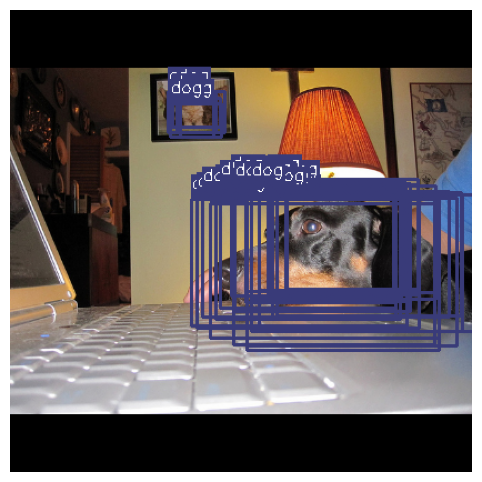

Epoch: 9


  0%|                                                                                                                              | 0/549 [00:07<?, ?it/s, loss=0.782]

batch_idx: 0
==> Saving checkpoint


  0%|▍                                                                                                                    | 2/549 [00:29<2:00:05, 13.17s/it, loss=0.85]

batch_idx: 1


  1%|▋                                                                                                                   | 3/549 [00:35<1:32:56, 10.21s/it, loss=0.828]

batch_idx: 2


  1%|▊                                                                                                                   | 4/549 [00:43<1:24:40,  9.32s/it, loss=0.826]

batch_idx: 3


  1%|█                                                                                                                   | 5/549 [00:50<1:17:32,  8.55s/it, loss=0.784]

batch_idx: 4


  1%|█▎                                                                                                                  | 6/549 [00:58<1:13:47,  8.15s/it, loss=0.807]

batch_idx: 5


  1%|█▍                                                                                                                  | 7/549 [01:05<1:10:00,  7.75s/it, loss=0.785]

batch_idx: 6


  1%|█▋                                                                                                                   | 8/549 [01:12<1:08:03,  7.55s/it, loss=0.77]

batch_idx: 7


  2%|█▉                                                                                                                  | 9/549 [01:19<1:06:43,  7.41s/it, loss=0.778]

batch_idx: 8


  2%|██                                                                                                                 | 10/549 [01:27<1:07:14,  7.49s/it, loss=0.778]

batch_idx: 9


  2%|██▎                                                                                                                | 11/549 [01:34<1:06:53,  7.46s/it, loss=0.764]

batch_idx: 10


  3%|███▌                                                                                                               | 17/549 [02:17<1:03:58,  7.21s/it, loss=0.753]

batch_idx: 16


  3%|███▊                                                                                                               | 18/549 [02:25<1:03:30,  7.18s/it, loss=0.748]

batch_idx: 17


  3%|███▉                                                                                                               | 19/549 [02:32<1:04:18,  7.28s/it, loss=0.755]

batch_idx: 18


  4%|████▏                                                                                                              | 20/549 [02:39<1:03:16,  7.18s/it, loss=0.749]

batch_idx: 19


  4%|████▍                                                                                                              | 21/549 [02:47<1:04:04,  7.28s/it, loss=0.745]

batch_idx: 20


  4%|████▌                                                                                                              | 22/549 [02:54<1:03:29,  7.23s/it, loss=0.764]

batch_idx: 21


  4%|████▊                                                                                                              | 23/549 [03:01<1:03:26,  7.24s/it, loss=0.763]

batch_idx: 22


  4%|█████                                                                                                              | 24/549 [03:07<1:01:42,  7.05s/it, loss=0.767]

batch_idx: 23


  5%|█████▏                                                                                                             | 25/549 [03:15<1:02:06,  7.11s/it, loss=0.761]

batch_idx: 24


  5%|█████▍                                                                                                             | 26/549 [03:21<1:00:35,  6.95s/it, loss=0.753]

batch_idx: 25


  5%|█████▋                                                                                                             | 27/549 [03:28<1:00:42,  6.98s/it, loss=0.755]

batch_idx: 26


  5%|█████▊                                                                                                             | 28/549 [03:35<1:00:03,  6.92s/it, loss=0.752]

batch_idx: 27


  5%|██████▏                                                                                                              | 29/549 [03:41<58:09,  6.71s/it, loss=0.753]

batch_idx: 28


  5%|██████▍                                                                                                               | 30/549 [03:48<59:05,  6.83s/it, loss=0.75]

batch_idx: 29


  6%|██████▌                                                                                                              | 31/549 [03:56<59:40,  6.91s/it, loss=0.749]

batch_idx: 30


  6%|██████▊                                                                                                              | 32/549 [04:03<59:45,  6.94s/it, loss=0.745]

batch_idx: 31


  6%|██████▉                                                                                                            | 33/549 [04:10<1:00:24,  7.02s/it, loss=0.744]

batch_idx: 32


  6%|███████▏                                                                                                             | 34/549 [04:17<59:59,  6.99s/it, loss=0.743]

batch_idx: 33


  6%|███████▍                                                                                                            | 35/549 [04:24<1:01:10,  7.14s/it, loss=0.74]

batch_idx: 34


  7%|███████▌                                                                                                           | 36/549 [04:31<1:01:17,  7.17s/it, loss=0.742]

batch_idx: 35


  7%|███████▊                                                                                                           | 37/549 [04:39<1:02:22,  7.31s/it, loss=0.744]

batch_idx: 36


  7%|███████▉                                                                                                           | 38/549 [04:46<1:01:38,  7.24s/it, loss=0.742]

batch_idx: 37


  7%|████████▏                                                                                                          | 39/549 [04:53<1:00:45,  7.15s/it, loss=0.742]

batch_idx: 38


  7%|████████▍                                                                                                          | 40/549 [05:00<1:00:58,  7.19s/it, loss=0.741]

batch_idx: 39


  7%|████████▌                                                                                                          | 41/549 [05:07<1:00:06,  7.10s/it, loss=0.739]

batch_idx: 40


  8%|████████▉                                                                                                            | 42/549 [05:14<59:33,  7.05s/it, loss=0.739]

batch_idx: 41


  8%|█████████▏                                                                                                            | 43/549 [05:21<58:17,  6.91s/it, loss=0.74]

batch_idx: 42


  8%|█████████▍                                                                                                           | 44/549 [05:28<58:08,  6.91s/it, loss=0.736]

batch_idx: 43


  8%|█████████▌                                                                                                           | 45/549 [05:35<58:27,  6.96s/it, loss=0.739]

batch_idx: 44


  8%|█████████▊                                                                                                           | 46/549 [05:41<56:56,  6.79s/it, loss=0.737]

batch_idx: 45


  9%|██████████                                                                                                           | 47/549 [05:48<56:31,  6.76s/it, loss=0.742]

batch_idx: 46


  9%|██████████▏                                                                                                          | 48/549 [05:55<57:47,  6.92s/it, loss=0.742]

batch_idx: 47


  9%|██████████▍                                                                                                          | 49/549 [06:02<57:50,  6.94s/it, loss=0.745]

batch_idx: 48


  9%|██████████▋                                                                                                          | 50/549 [06:09<57:50,  6.95s/it, loss=0.744]

batch_idx: 49


  9%|██████████▋                                                                                                          | 50/549 [06:16<57:50,  6.95s/it, loss=0.745]

batch_idx: 50
==> Saving checkpoint


  9%|██████████▉                                                                                                        | 52/549 [06:37<1:21:49,  9.88s/it, loss=0.746]

batch_idx: 51


 10%|███████████                                                                                                        | 53/549 [06:44<1:14:51,  9.06s/it, loss=0.744]

batch_idx: 52


 10%|███████████▎                                                                                                       | 54/549 [06:51<1:10:21,  8.53s/it, loss=0.749]

batch_idx: 53


 10%|███████████▌                                                                                                        | 55/549 [06:58<1:06:13,  8.04s/it, loss=0.75]

batch_idx: 54


 10%|███████████▊                                                                                                        | 56/549 [07:05<1:03:25,  7.72s/it, loss=0.75]

batch_idx: 55


 10%|████████████                                                                                                        | 57/549 [07:12<1:01:36,  7.51s/it, loss=0.75]

batch_idx: 56


 11%|████████████▎                                                                                                        | 58/549 [07:19<58:57,  7.20s/it, loss=0.749]

batch_idx: 57


 11%|████████████▌                                                                                                        | 59/549 [07:25<57:49,  7.08s/it, loss=0.747]

batch_idx: 58


 11%|████████████▊                                                                                                        | 60/549 [07:32<57:05,  7.00s/it, loss=0.748]

batch_idx: 59


 11%|█████████████                                                                                                        | 61/549 [07:39<57:20,  7.05s/it, loss=0.749]

batch_idx: 60


 11%|█████████████▏                                                                                                       | 62/549 [07:47<58:09,  7.17s/it, loss=0.749]

batch_idx: 61


 11%|█████████████▍                                                                                                       | 63/549 [07:54<56:56,  7.03s/it, loss=0.748]

batch_idx: 62


 12%|█████████████▋                                                                                                       | 64/549 [08:01<57:41,  7.14s/it, loss=0.751]

batch_idx: 63


 12%|█████████████▊                                                                                                       | 65/549 [08:08<57:22,  7.11s/it, loss=0.751]

batch_idx: 64


 12%|██████████████                                                                                                       | 66/549 [08:15<56:25,  7.01s/it, loss=0.752]

batch_idx: 65


 12%|██████████████▎                                                                                                      | 67/549 [08:21<55:14,  6.88s/it, loss=0.754]

batch_idx: 66


 12%|██████████████▍                                                                                                      | 68/549 [08:29<56:02,  6.99s/it, loss=0.753]

batch_idx: 67


 13%|██████████████▋                                                                                                      | 69/549 [08:36<57:53,  7.24s/it, loss=0.753]

batch_idx: 68


 13%|██████████████▉                                                                                                      | 70/549 [08:43<57:02,  7.15s/it, loss=0.752]

batch_idx: 69


 13%|███████████████▏                                                                                                     | 71/549 [08:50<56:39,  7.11s/it, loss=0.754]

batch_idx: 70


 13%|███████████████▎                                                                                                     | 72/549 [08:58<56:37,  7.12s/it, loss=0.753]

batch_idx: 71


 13%|███████████████▌                                                                                                     | 73/549 [09:05<57:01,  7.19s/it, loss=0.753]

batch_idx: 72


 13%|███████████████▊                                                                                                     | 74/549 [09:12<55:57,  7.07s/it, loss=0.753]

batch_idx: 73


 14%|███████████████▉                                                                                                     | 75/549 [09:18<55:08,  6.98s/it, loss=0.753]

batch_idx: 74


 14%|████████████████▏                                                                                                    | 76/549 [09:25<55:11,  7.00s/it, loss=0.756]

batch_idx: 75


 14%|████████████████▍                                                                                                    | 77/549 [09:32<55:02,  7.00s/it, loss=0.756]

batch_idx: 76


 14%|████████████████▌                                                                                                    | 78/549 [09:40<55:48,  7.11s/it, loss=0.759]

batch_idx: 77


 14%|████████████████▉                                                                                                     | 79/549 [09:46<54:30,  6.96s/it, loss=0.76]

batch_idx: 78


 15%|█████████████████                                                                                                    | 80/549 [09:53<53:53,  6.89s/it, loss=0.761]

batch_idx: 79


 15%|█████████████████▎                                                                                                   | 81/549 [10:00<53:41,  6.88s/it, loss=0.758]

batch_idx: 80


 15%|█████████████████▍                                                                                                   | 82/549 [10:07<54:33,  7.01s/it, loss=0.759]

batch_idx: 81


 15%|█████████████████▋                                                                                                   | 83/549 [10:14<54:25,  7.01s/it, loss=0.762]

batch_idx: 82


 15%|█████████████████▉                                                                                                   | 84/549 [10:22<55:41,  7.19s/it, loss=0.761]

batch_idx: 83


 15%|██████████████████▎                                                                                                   | 85/549 [10:29<55:44,  7.21s/it, loss=0.76]

batch_idx: 84


 16%|██████████████████▍                                                                                                   | 86/549 [10:37<55:54,  7.25s/it, loss=0.76]

batch_idx: 85


 16%|██████████████████▋                                                                                                   | 87/549 [10:44<55:10,  7.16s/it, loss=0.76]

batch_idx: 86


 16%|██████████████████▊                                                                                                  | 88/549 [10:51<55:17,  7.20s/it, loss=0.762]

batch_idx: 87


 16%|██████████████████▉                                                                                                  | 89/549 [10:58<54:45,  7.14s/it, loss=0.761]

batch_idx: 88


 16%|███████████████████▏                                                                                                 | 90/549 [11:05<55:35,  7.27s/it, loss=0.761]

batch_idx: 89


 17%|███████████████████▍                                                                                                 | 91/549 [11:12<54:46,  7.18s/it, loss=0.763]

batch_idx: 90


 17%|███████████████████▌                                                                                                 | 92/549 [11:19<54:25,  7.15s/it, loss=0.762]

batch_idx: 91


 17%|███████████████████▊                                                                                                 | 93/549 [11:26<52:25,  6.90s/it, loss=0.761]

batch_idx: 92


 17%|████████████████████                                                                                                 | 94/549 [11:32<52:00,  6.86s/it, loss=0.761]

batch_idx: 93


 17%|████████████████████▏                                                                                                | 95/549 [11:41<54:34,  7.21s/it, loss=0.761]

batch_idx: 94


 17%|████████████████████▍                                                                                                | 96/549 [11:47<53:25,  7.08s/it, loss=0.763]

batch_idx: 95


 18%|████████████████████▋                                                                                                | 97/549 [11:54<53:03,  7.04s/it, loss=0.762]

batch_idx: 96


 18%|████████████████████▉                                                                                                | 98/549 [12:01<52:43,  7.01s/it, loss=0.763]

batch_idx: 97


 18%|█████████████████████                                                                                                | 99/549 [12:08<52:38,  7.02s/it, loss=0.764]

batch_idx: 98


 18%|█████████████████████▏                                                                                              | 100/549 [12:15<52:52,  7.07s/it, loss=0.765]

batch_idx: 99


 18%|█████████████████████▏                                                                                              | 100/549 [12:23<52:52,  7.07s/it, loss=0.764]

batch_idx: 100
==> Saving checkpoint


 19%|█████████████████████▏                                                                                            | 102/549 [12:44<1:14:49, 10.04s/it, loss=0.764]

batch_idx: 101


 19%|█████████████████████▍                                                                                            | 103/549 [12:51<1:08:18,  9.19s/it, loss=0.765]

batch_idx: 102


 19%|█████████████████████▌                                                                                            | 104/549 [12:58<1:03:25,  8.55s/it, loss=0.765]

batch_idx: 103


 19%|██████████████████████▏                                                                                             | 105/549 [13:05<58:49,  7.95s/it, loss=0.764]

batch_idx: 104


 19%|██████████████████████▍                                                                                             | 106/549 [13:11<56:00,  7.59s/it, loss=0.765]

batch_idx: 105


 19%|██████████████████████▌                                                                                             | 107/549 [13:18<54:33,  7.41s/it, loss=0.765]

batch_idx: 106


 20%|██████████████████████▊                                                                                             | 108/549 [13:25<53:36,  7.29s/it, loss=0.765]

batch_idx: 107


 20%|███████████████████████                                                                                             | 109/549 [13:32<52:45,  7.19s/it, loss=0.765]

batch_idx: 108


 20%|███████████████████████▏                                                                                            | 110/549 [13:39<52:22,  7.16s/it, loss=0.766]

batch_idx: 109


 20%|███████████████████████▍                                                                                            | 111/549 [13:47<52:47,  7.23s/it, loss=0.768]

batch_idx: 110


 20%|███████████████████████▋                                                                                            | 112/549 [13:53<50:29,  6.93s/it, loss=0.767]

batch_idx: 111


 21%|███████████████████████▉                                                                                            | 113/549 [14:01<52:22,  7.21s/it, loss=0.766]

batch_idx: 112


 21%|████████████████████████                                                                                            | 114/549 [14:08<52:38,  7.26s/it, loss=0.768]

batch_idx: 113


 21%|████████████████████████▎                                                                                           | 115/549 [14:16<52:35,  7.27s/it, loss=0.767]

batch_idx: 114


 21%|████████████████████████▌                                                                                           | 116/549 [14:23<52:45,  7.31s/it, loss=0.767]

batch_idx: 115


 21%|████████████████████████▋                                                                                           | 117/549 [14:30<52:01,  7.23s/it, loss=0.767]

batch_idx: 116


 21%|████████████████████████▉                                                                                           | 118/549 [14:37<50:51,  7.08s/it, loss=0.766]

batch_idx: 117


 22%|█████████████████████████▏                                                                                          | 119/549 [14:44<50:32,  7.05s/it, loss=0.765]

batch_idx: 118


 22%|█████████████████████████▎                                                                                          | 120/549 [14:51<50:21,  7.04s/it, loss=0.764]

batch_idx: 119


 22%|█████████████████████████▌                                                                                          | 121/549 [14:58<49:42,  6.97s/it, loss=0.765]

batch_idx: 120


 22%|█████████████████████████▊                                                                                          | 122/549 [15:04<48:42,  6.84s/it, loss=0.763]

batch_idx: 121


 22%|█████████████████████████▉                                                                                          | 123/549 [15:11<48:19,  6.81s/it, loss=0.763]

batch_idx: 122


 23%|██████████████████████████▏                                                                                         | 124/549 [15:18<48:27,  6.84s/it, loss=0.763]

batch_idx: 123


 23%|██████████████████████████▍                                                                                         | 125/549 [15:25<48:26,  6.86s/it, loss=0.763]

batch_idx: 124


 23%|██████████████████████████▌                                                                                         | 126/549 [15:32<48:39,  6.90s/it, loss=0.762]

batch_idx: 125


 23%|██████████████████████████▊                                                                                         | 127/549 [15:38<48:01,  6.83s/it, loss=0.761]

batch_idx: 126


 23%|███████████████████████████▎                                                                                         | 128/549 [15:46<49:28,  7.05s/it, loss=0.76]

batch_idx: 127


 23%|███████████████████████████▎                                                                                        | 129/549 [15:53<49:27,  7.07s/it, loss=0.759]

batch_idx: 128


 24%|███████████████████████████▍                                                                                        | 130/549 [16:00<48:21,  6.93s/it, loss=0.759]

batch_idx: 129


 24%|███████████████████████████▋                                                                                        | 131/549 [16:07<49:02,  7.04s/it, loss=0.759]

batch_idx: 130


 24%|████████████████████████████▏                                                                                        | 132/549 [16:14<48:40,  7.00s/it, loss=0.76]

batch_idx: 131


 24%|████████████████████████████                                                                                        | 133/549 [16:21<48:07,  6.94s/it, loss=0.761]

batch_idx: 132


 24%|████████████████████████████▎                                                                                       | 134/549 [16:27<47:10,  6.82s/it, loss=0.764]

batch_idx: 133


 25%|████████████████████████████▌                                                                                       | 135/549 [16:34<47:33,  6.89s/it, loss=0.764]

batch_idx: 134


 25%|████████████████████████████▋                                                                                       | 136/549 [16:41<47:02,  6.83s/it, loss=0.764]

batch_idx: 135


 25%|████████████████████████████▉                                                                                       | 137/549 [16:48<47:17,  6.89s/it, loss=0.764]

batch_idx: 136


 25%|█████████████████████████████▏                                                                                      | 138/549 [16:55<46:45,  6.83s/it, loss=0.763]

batch_idx: 137


 25%|█████████████████████████████▎                                                                                      | 139/549 [17:02<46:55,  6.87s/it, loss=0.763]

batch_idx: 138


 26%|█████████████████████████████▌                                                                                      | 140/549 [17:09<47:07,  6.91s/it, loss=0.763]

batch_idx: 139


 26%|██████████████████████████████                                                                                      | 142/549 [17:23<47:26,  6.99s/it, loss=0.762]

batch_idx: 141


 26%|██████████████████████████████▏                                                                                     | 143/549 [17:30<48:25,  7.16s/it, loss=0.762]

batch_idx: 142


 26%|██████████████████████████████▍                                                                                     | 144/549 [17:37<48:18,  7.16s/it, loss=0.762]

batch_idx: 143


 26%|██████████████████████████████▋                                                                                     | 145/549 [17:44<47:44,  7.09s/it, loss=0.761]

batch_idx: 144


 27%|███████████████████████████████                                                                                      | 146/549 [17:52<48:10,  7.17s/it, loss=0.76]

batch_idx: 145


 27%|███████████████████████████████▎                                                                                     | 147/549 [17:59<48:04,  7.18s/it, loss=0.76]

batch_idx: 146


 27%|███████████████████████████████▌                                                                                     | 148/549 [18:06<47:10,  7.06s/it, loss=0.76]

batch_idx: 147


 27%|███████████████████████████████▊                                                                                     | 149/549 [18:13<47:49,  7.17s/it, loss=0.76]

batch_idx: 148


 27%|███████████████████████████████▉                                                                                     | 150/549 [18:20<47:26,  7.13s/it, loss=0.76]

batch_idx: 149


 27%|███████████████████████████████▋                                                                                    | 150/549 [18:27<47:26,  7.13s/it, loss=0.761]

batch_idx: 150
==> Saving checkpoint


 28%|███████████████████████████████▌                                                                                  | 152/549 [18:49<1:08:16, 10.32s/it, loss=0.759]

batch_idx: 151


 28%|████████████████████████████████                                                                                   | 153/549 [18:57<1:02:20,  9.45s/it, loss=0.76]

batch_idx: 152


 28%|████████████████████████████████▌                                                                                   | 154/549 [19:04<57:30,  8.74s/it, loss=0.759]

batch_idx: 153


 28%|█████████████████████████████████                                                                                    | 155/549 [19:11<53:32,  8.15s/it, loss=0.76]

batch_idx: 154


 28%|████████████████████████████████▉                                                                                   | 156/549 [19:18<51:29,  7.86s/it, loss=0.761]

batch_idx: 155


 29%|█████████████████████████████████▏                                                                                  | 157/549 [19:25<48:59,  7.50s/it, loss=0.761]

batch_idx: 156


 29%|█████████████████████████████████▍                                                                                  | 158/549 [19:32<48:50,  7.49s/it, loss=0.761]

batch_idx: 157


 29%|█████████████████████████████████▌                                                                                  | 159/549 [19:39<47:03,  7.24s/it, loss=0.761]

batch_idx: 158


 29%|██████████████████████████████████                                                                                   | 160/549 [19:46<46:29,  7.17s/it, loss=0.76]

batch_idx: 159


 29%|██████████████████████████████████▎                                                                                  | 161/549 [19:53<46:03,  7.12s/it, loss=0.76]

batch_idx: 160


 30%|██████████████████████████████████▏                                                                                 | 162/549 [19:59<45:00,  6.98s/it, loss=0.762]

batch_idx: 161


 30%|██████████████████████████████████▍                                                                                 | 163/549 [20:06<44:28,  6.91s/it, loss=0.762]

batch_idx: 162


 30%|██████████████████████████████████▋                                                                                 | 164/549 [20:13<44:38,  6.96s/it, loss=0.761]

batch_idx: 163


 30%|██████████████████████████████████▊                                                                                 | 165/549 [20:20<44:29,  6.95s/it, loss=0.763]

batch_idx: 164


 30%|███████████████████████████████████                                                                                 | 166/549 [20:27<44:23,  6.96s/it, loss=0.762]

batch_idx: 165


 30%|███████████████████████████████████▎                                                                                | 167/549 [20:34<43:57,  6.90s/it, loss=0.761]

batch_idx: 166


 31%|███████████████████████████████████▍                                                                                | 168/549 [20:41<43:55,  6.92s/it, loss=0.762]

batch_idx: 167


 31%|███████████████████████████████████▋                                                                                | 169/549 [20:48<44:40,  7.05s/it, loss=0.762]

batch_idx: 168


 31%|███████████████████████████████████▉                                                                                | 170/549 [20:55<43:58,  6.96s/it, loss=0.762]

batch_idx: 169


 31%|████████████████████████████████████▏                                                                               | 171/549 [21:02<43:53,  6.97s/it, loss=0.762]

batch_idx: 170


 31%|████████████████████████████████████▎                                                                               | 172/549 [21:09<43:28,  6.92s/it, loss=0.761]

batch_idx: 171


 32%|████████████████████████████████████▌                                                                               | 173/549 [21:16<43:45,  6.98s/it, loss=0.761]

batch_idx: 172


 32%|████████████████████████████████████▊                                                                               | 174/549 [21:23<43:29,  6.96s/it, loss=0.761]

batch_idx: 173


 32%|█████████████████████████████████████▎                                                                               | 175/549 [21:30<43:44,  7.02s/it, loss=0.76]

batch_idx: 174


 32%|█████████████████████████████████████▌                                                                               | 176/549 [21:36<42:33,  6.85s/it, loss=0.76]

batch_idx: 175


 32%|█████████████████████████████████████▋                                                                               | 177/549 [21:43<42:51,  6.91s/it, loss=0.76]

batch_idx: 176


 32%|█████████████████████████████████████▉                                                                               | 178/549 [21:51<43:34,  7.05s/it, loss=0.76]

batch_idx: 177


 33%|█████████████████████████████████████▊                                                                              | 179/549 [21:58<44:14,  7.17s/it, loss=0.759]

batch_idx: 178


 33%|██████████████████████████████████████                                                                              | 180/549 [22:05<43:33,  7.08s/it, loss=0.759]

batch_idx: 179


 33%|██████████████████████████████████████▏                                                                             | 181/549 [22:12<43:37,  7.11s/it, loss=0.759]

batch_idx: 180


 33%|██████████████████████████████████████▊                                                                              | 182/549 [22:20<44:03,  7.20s/it, loss=0.76]

batch_idx: 181


 33%|██████████████████████████████████████▋                                                                             | 183/549 [22:27<44:05,  7.23s/it, loss=0.759]

batch_idx: 182


 34%|██████████████████████████████████████▉                                                                             | 184/549 [22:34<42:53,  7.05s/it, loss=0.759]

batch_idx: 183


 34%|███████████████████████████████████████▍                                                                             | 185/549 [22:40<41:34,  6.85s/it, loss=0.76]

batch_idx: 184


 34%|███████████████████████████████████████▋                                                                             | 186/549 [22:47<41:08,  6.80s/it, loss=0.76]

batch_idx: 185


 34%|███████████████████████████████████████▌                                                                            | 187/549 [22:54<41:51,  6.94s/it, loss=0.759]

batch_idx: 186


 34%|███████████████████████████████████████▋                                                                            | 188/549 [23:02<42:48,  7.12s/it, loss=0.759]

batch_idx: 187


 34%|███████████████████████████████████████▉                                                                            | 189/549 [23:09<42:45,  7.13s/it, loss=0.759]

batch_idx: 188


 35%|████████████████████████████████████████▍                                                                            | 190/549 [23:15<41:41,  6.97s/it, loss=0.76]

batch_idx: 189


 35%|████████████████████████████████████████▎                                                                           | 191/549 [23:22<41:26,  6.95s/it, loss=0.759]

batch_idx: 190


 35%|████████████████████████████████████████▌                                                                           | 192/549 [23:30<42:42,  7.18s/it, loss=0.759]

batch_idx: 191


 35%|████████████████████████████████████████▊                                                                           | 193/549 [23:37<42:24,  7.15s/it, loss=0.759]

batch_idx: 192


 35%|█████████████████████████████████████████▎                                                                           | 194/549 [23:45<43:01,  7.27s/it, loss=0.76]

batch_idx: 193


 36%|█████████████████████████████████████████▏                                                                          | 195/549 [23:52<43:10,  7.32s/it, loss=0.761]

batch_idx: 194


 36%|█████████████████████████████████████████▍                                                                          | 196/549 [23:59<42:40,  7.25s/it, loss=0.762]

batch_idx: 195


 36%|█████████████████████████████████████████▌                                                                          | 197/549 [24:06<41:34,  7.09s/it, loss=0.764]

batch_idx: 196


 36%|█████████████████████████████████████████▊                                                                          | 198/549 [24:12<40:20,  6.90s/it, loss=0.764]

batch_idx: 197


 36%|██████████████████████████████████████████                                                                          | 199/549 [24:19<40:42,  6.98s/it, loss=0.764]

batch_idx: 198


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:27<40:57,  7.04s/it, loss=0.765]

batch_idx: 199


 36%|██████████████████████████████████████████▎                                                                         | 200/549 [24:33<40:57,  7.04s/it, loss=0.765]

batch_idx: 200
==> Saving checkpoint


 37%|██████████████████████████████████████████▋                                                                         | 202/549 [24:55<57:54, 10.01s/it, loss=0.765]

batch_idx: 201


 37%|██████████████████████████████████████████▉                                                                         | 203/549 [25:02<52:37,  9.13s/it, loss=0.765]

batch_idx: 202


 37%|███████████████████████████████████████████                                                                         | 204/549 [25:09<48:38,  8.46s/it, loss=0.764]

batch_idx: 203


 37%|███████████████████████████████████████████▎                                                                        | 205/549 [25:16<46:23,  8.09s/it, loss=0.765]

batch_idx: 204


 38%|███████████████████████████████████████████▌                                                                        | 206/549 [25:23<44:13,  7.74s/it, loss=0.765]

batch_idx: 205


 38%|███████████████████████████████████████████▋                                                                        | 207/549 [25:30<43:37,  7.65s/it, loss=0.764]

batch_idx: 206


 38%|███████████████████████████████████████████▉                                                                        | 208/549 [25:37<42:17,  7.44s/it, loss=0.763]

batch_idx: 207


 38%|████████████████████████████████████████████▏                                                                       | 209/549 [25:44<40:22,  7.13s/it, loss=0.764]

batch_idx: 208


 38%|████████████████████████████████████████████▎                                                                       | 210/549 [25:51<40:33,  7.18s/it, loss=0.763]

batch_idx: 209


 38%|████████████████████████████████████████████▌                                                                       | 211/549 [25:58<40:13,  7.14s/it, loss=0.764]

batch_idx: 210


 39%|████████████████████████████████████████████▊                                                                       | 212/549 [26:06<40:40,  7.24s/it, loss=0.763]

batch_idx: 211


 40%|██████████████████████████████████████████████▎                                                                     | 219/549 [26:54<38:19,  6.97s/it, loss=0.762]

batch_idx: 218


 40%|██████████████████████████████████████████████▍                                                                     | 220/549 [27:02<38:31,  7.02s/it, loss=0.763]

batch_idx: 219


In [ ]:
epochs = 1000
# Training the model 
for e in range(0, epochs+1): 
	print("Epoch:", e) 
    ################# dos
    	# Creating a progress bar 
	progress_bar = tqdm(train_loader, leave=True) 

	# Initializing a list to store the losses 
	losses = [] 

	# Iterating over the training data 
	for batch_idx, (x, y) in enumerate(progress_bar): 
		print("batch_idx:", batch_idx)
		x = x.to(device) 
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 

		# Add the loss to the list 
		losses.append(loss.item()) 

		# Reset gradients 
		optimizer.zero_grad() 

		# Backpropagate the loss 
		scaler.scale(loss).backward() 

		# Optimization step 
		scaler.step(optimizer) 

		# Update the scaler for next iteration 
		scaler.update() 

		# update progress bar with loss 
		mean_loss = sum(losses) / len(losses) 
		progress_bar.set_postfix(loss=mean_loss)
  
        # Log the loss to TensorBoard
		writer.add_scalar('Loss/train', mean_loss, e * len(train_loader) + batch_idx)

		# Log images to TensorBoard every 100 batches
		if batch_idx % 50 == 0:
			# Saving the model 
			if save_model: 
				save_checkpoint(model, optimizer, filename=model_path_base +f"b{batch_idx}_vgg16_checkpoint.pth.tar")

   
	# Saving the model 
	if save_model: 
		save_checkpoint(model, optimizer, filename=model_path_base +f"e{e}_vgg16_checkpoint.pth.tar")
        # delete batch checkpoints
		for i in range(0, batch_idx+1, 50):
			os.remove(model_path_base + f"b{i}_vgg16_checkpoint.pth.tar")
		for i in range(0,e-3):
			if os.path.exists(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar"):
				os.remove(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar")
   
	model.eval()
 
	# Getting a sample image from the test data loader 
	try:
		x, y = next(val_loader_iter)
	except StopIteration:
		val_loader_iter = iter(val_loader)
		x, y = next(val_loader_iter)
	x = x.to(device) 
	
	print("display and report image")
	with torch.no_grad():
		output = model(x)
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 
   
		writer.add_scalar('Loss/val', loss.item(), e)
  
		bboxes = [[] for _ in range(x.shape[0])]
		for i in range(3):
			batch_size, A, S, _, _ = output[i].shape
			anchor = scaled_anchors[i]
			boxes_scale_i = convert_cells_to_bboxes(output[i], anchor, s=S, is_predictions=True)
			for idx, box in enumerate(boxes_scale_i):
				bboxes[idx] += box
		i = 0
		nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
		img_with_boxes = plot_image(x[i].permute(1, 2, 0).detach().cpu(), nms_boxes, categories)
		img_with_boxes = T.ToTensor()(img_with_boxes)
		writer.add_image(f'Val/Image_{e}_{i}_before', img_with_boxes, e * len(train_loader) + batch_idx)

	model.train()


    #################
	# training_loop(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors) 
